# ResNet Model Building Pipeline for 1D Signals with DEMO
#### ResNet18, ResNet34, ResNet50, ResNet101, ResNet152

In [7]:
# import socket
# import tornado.iostream

# # Create a TCP connection to a server running on localhost at port 8000
# sock = socket.create_connection(('localhost', 8888))

# # Create an IOStream object with a large buffer size
# stream = tornado.iostream.IOStream(sock, max_buffer_size=1073741824)


In [8]:
import numpy as np
import pandas as pd
# import seaborn as sns
from numpy import interp
from itertools import cycle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from keras.layers import Input, Conv1D, MaxPooling1D, UpSampling1D, concatenate, BatchNormalization, Activation, add
from keras.layers import Conv2D, MaxPooling2D, Reshape, Flatten, Dense
from keras.models import Model, model_from_json
from keras.optimizers import Adam, RMSprop
# from tensorflow.keras.optimizers import AdamW
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import Normalizer,MinMaxScaler,StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer
# sns.set_theme(style="whitegrid")
import pywt
np.set_printoptions(suppress=True)
# Import ResNet1D Module
from ResNet_1DCNN import ResNet

In [9]:
# columns = ['Fx','Fy','Fz','Mx','My','Mz']
columns = ['Mz']
wavelet = 'db4'
max_iter = 50
iter = 0

# # Walking Dataset
# InsoleWalking1 = pd.read_csv('0310AyuRWalk5Min.txt', header=None, low_memory=False)
# InsoleWalking2 = pd.read_csv('0310HudaRWalk5Min.txt', header=None, low_memory=False)
# InsoleWalking3 = pd.read_csv('0311LalaRWalk5Min.txt', header=None, low_memory=False)
# InsoleWalking4 = pd.read_csv('0311YunitaRWalk5Min.txt', header=None, low_memory=False)
# InsoleWalking5 = pd.read_csv('0312AbelRWalk5Min.txt', header=None, low_memory=False)
# InsoleWalking6 = pd.read_csv('0312AbiRWalk5Min.txt', header=None, low_memory=False)
# InsoleWalking7 = pd.read_csv('0312AryaRWalk5Min.txt', header=None, low_memory=False)
# InsoleWalking8 = pd.read_csv('0312HawaRWalk5Min.txt', header=None, low_memory=False)
# InsoleWalking9 = pd.read_csv('0312NisaRWalk5Min.txt', header=None, low_memory=False)
# InsoleWalking10 = pd.read_csv('0313ChenChengRWalk5Min.txt', header=None, low_memory=False)
# InsoleWalking11 = pd.read_csv('0313RezaRWalk5Min.txt', header=None, low_memory=False)
# InsoleWalking12 = pd.read_csv('0313RilaniRWalk5Min.txt', header=None, low_memory=False)
# InsoleWalking13 = pd.read_csv('0313SariRWalk5Min.txt', header=None, low_memory=False)
# InsoleWalking14 = pd.read_csv('0313ShelbyRWalk5Min.txt', header=None, low_memory=False)
# InsoleWalking15 = pd.read_csv('0314HelenRWalk5Min.txt', header=None, low_memory=False)
# InsoleWalking16 = pd.read_csv('0315AyuRWalk5Min.txt', header=None, low_memory=False)
# InsoleWalking17 = pd.read_csv('0315HappyRWalk5Min.txt', header=None, low_memory=False)
# InsoleWalking18 = pd.read_csv('0317HeniRWalk5Min.txt', header=None, low_memory=False)
# InsoleWalking19 = pd.read_csv('0317NadiaRWalk5Min.txt', header=None, low_memory=False)
# InsoleWalking20 = pd.read_csv('0317VikaRWalk5Min.txt', header=None, low_memory=False)
# InsoleWalking21 = pd.read_csv('0319AlfianRWalk5Min.txt', header=None, low_memory=False)
# InsoleWalking22 = pd.read_csv('1225JakariaRWalk5Min.txt', header=None, low_memory=False)
# SIDatasWalking1 =  np.array(InsoleWalking1)
# SIDatasWalking2 =  np.array(InsoleWalking2)
# SIDatasWalking3 =  np.array(InsoleWalking3)
# SIDatasWalking4 =  np.array(InsoleWalking4)
# SIDatasWalking5 =  np.array(InsoleWalking5)
# SIDatasWalking6 =  np.array(InsoleWalking6)
# SIDatasWalking7 =  np.array(InsoleWalking7)
# SIDatasWalking8 =  np.array(InsoleWalking8)
# SIDatasWalking9 =  np.array(InsoleWalking9)
# SIDatasWalking10 =  np.array(InsoleWalking10)
# SIDatasWalking11 =  np.array(InsoleWalking11)
# SIDatasWalking12 =  np.array(InsoleWalking12)
# SIDatasWalking13 =  np.array(InsoleWalking13)
# SIDatasWalking14 =  np.array(InsoleWalking14)
# SIDatasWalking15 =  np.array(InsoleWalking15)
# SIDatasWalking16 =  np.array(InsoleWalking16)
# SIDatasWalking17 =  np.array(InsoleWalking17)
# SIDatasWalking18 =  np.array(InsoleWalking18)
# SIDatasWalking19 =  np.array(InsoleWalking19)
# SIDatasWalking20 =  np.array(InsoleWalking20)
# SIDatasWalking21 =  np.array(InsoleWalking21)
# SIDatasWalking22 =  np.array(InsoleWalking22)

# dfwalk1 = pd.read_csv('0310AyuRWalk5Min.csv', low_memory=False)
# dfwalk2 = pd.read_csv('0310HudaRWalk5Min.csv', low_memory=False)
# dfwalk3 = pd.read_csv('0311LalaRWalk5Min.csv', low_memory=False)
# dfwalk4 = pd.read_csv('0311YunitaRWalk5Min.csv', low_memory=False)
# dfwalk5 = pd.read_csv('0312AbelRWalk5Min.csv', low_memory=False)
# dfwalk6 = pd.read_csv('0312AbiRWalk5Min.csv', low_memory=False)
# dfwalk7 = pd.read_csv('0312AryaRWalk5Min.csv', low_memory=False)
# dfwalk8 = pd.read_csv('0312HawaRWalk5Min.csv', low_memory=False)
# dfwalk9 = pd.read_csv('0312NisaRWalk5Min.csv', low_memory=False)
# dfwalk10 = pd.read_csv('0313ChenChengRWalk5Min.csv', low_memory=False)
# dfwalk11 = pd.read_csv('0313RezaRWalk5Min.csv', low_memory=False)
# dfwalk12 = pd.read_csv('0313RilaniRWalk5Min.csv', low_memory=False)
# dfwalk13 = pd.read_csv('0313SariRWalk5Min.csv', low_memory=False)
# dfwalk14 = pd.read_csv('0313ShelbyRWalk5Min.csv', low_memory=False)
# dfwalk15 = pd.read_csv('0314HelenRWalk5Min.csv', low_memory=False)
# dfwalk16 = pd.read_csv('0315AyuRWalk5Min.csv', low_memory=False)
# dfwalk17 = pd.read_csv('0315HappyRWalk5Min.csv', low_memory=False)
# dfwalk18 = pd.read_csv('0317HeniRWalk5Min.csv', low_memory=False)
# dfwalk19 = pd.read_csv('0317NadiaRWalk5Min.csv', low_memory=False)
# dfwalk20 = pd.read_csv('0317VikaRWalk5Min.csv', low_memory=False)
# dfwalk21 = pd.read_csv('0319AlfianRWalk5Min.csv', low_memory=False)
# dfwalk22 = pd.read_csv('1225JakariaRWalk5Min.csv', low_memory=False)

# selected_dfwalks1 = dfwalk1[columns]
# selected_dfwalks2 = dfwalk2[columns]
# selected_dfwalks3 = dfwalk3[columns]
# selected_dfwalks4 = dfwalk4[columns]
# selected_dfwalks5 = dfwalk5[columns]
# selected_dfwalks6 = dfwalk6[columns]
# selected_dfwalks7 = dfwalk7[columns]
# selected_dfwalks8 = dfwalk8[columns]
# selected_dfwalks9 = dfwalk9[columns]
# selected_dfwalks10 = dfwalk10[columns]
# selected_dfwalks11 = dfwalk11[columns]
# selected_dfwalks12 = dfwalk12[columns]
# selected_dfwalks13 = dfwalk13[columns]
# selected_dfwalks14 = dfwalk14[columns]
# selected_dfwalks15 = dfwalk15[columns]
# selected_dfwalks16 = dfwalk16[columns]
# selected_dfwalks17 = dfwalk17[columns]
# selected_dfwalks18 = dfwalk18[columns]
# selected_dfwalks19 = dfwalk19[columns]
# selected_dfwalks20 = dfwalk20[columns]
# selected_dfwalks21 = dfwalk21[columns]
# selected_dfwalks22 = dfwalk22[columns]
# FPDatasWalking1 = selected_dfwalks1[:15000]
# FPDatasWalking2 = selected_dfwalks2[:15000]
# FPDatasWalking3 = selected_dfwalks3[:15000]
# FPDatasWalking4 = selected_dfwalks4[:15000]
# FPDatasWalking5 = selected_dfwalks5[:15000]
# FPDatasWalking6 = selected_dfwalks6[:15000]
# FPDatasWalking7 = selected_dfwalks7[:15000]
# FPDatasWalking8 = selected_dfwalks8[:15000]
# FPDatasWalking9 = selected_dfwalks9[:15000]
# FPDatasWalking10 = selected_dfwalks10[:15000]
# FPDatasWalking11 = selected_dfwalks11[:15000]
# FPDatasWalking12 = selected_dfwalks12[:15000]
# FPDatasWalking13 = selected_dfwalks13[:15000]
# FPDatasWalking14 = selected_dfwalks14[:15000]
# FPDatasWalking15 = selected_dfwalks15[:15000]
# FPDatasWalking16 = selected_dfwalks16[:15000]
# FPDatasWalking17 = selected_dfwalks17[:15000]
# FPDatasWalking18 = selected_dfwalks18[:15000]
# FPDatasWalking19 = selected_dfwalks19[:15000]
# FPDatasWalking20 = selected_dfwalks20[:15000]
# FPDatasWalking21 = selected_dfwalks21[:15000]
# FPDatasWalking22 = selected_dfwalks22[:15000]

# SIDataWalking1 = np.array(SIDatasWalking1[:15000]).astype('float32')
# SIDataWalking2 = np.array(SIDatasWalking2[:15000]).astype('float32')
# SIDataWalking3 = np.array(SIDatasWalking3[:15000]).astype('float32')
# SIDataWalking4 = np.array(SIDatasWalking4[:15000]).astype('float32')
# SIDataWalking5 = np.array(SIDatasWalking5[:15000]).astype('float32')
# SIDataWalking6 = np.array(SIDatasWalking6[:15000]).astype('float32')
# SIDataWalking7 = np.array(SIDatasWalking7[:15000]).astype('float32')
# SIDataWalking8 = np.array(SIDatasWalking8[:15000]).astype('float32')
# SIDataWalking9 = np.array(SIDatasWalking9[:15000]).astype('float32')
# SIDataWalking10 = np.array(SIDatasWalking10[:15000]).astype('float32')
# SIDataWalking11 = np.array(SIDatasWalking11[:15000]).astype('float32')
# SIDataWalking12 = np.array(SIDatasWalking12[:15000]).astype('float32')
# SIDataWalking13 = np.array(SIDatasWalking13[:15000]).astype('float32')
# SIDataWalking14 = np.array(SIDatasWalking14[:15000]).astype('float32')
# SIDataWalking15 = np.array(SIDatasWalking15[:15000]).astype('float32')
# SIDataWalking16 = np.array(SIDatasWalking16[:15000]).astype('float32')
# SIDataWalking17 = np.array(SIDatasWalking17[:15000]).astype('float32')
# SIDataWalking18 = np.array(SIDatasWalking18[:15000]).astype('float32')
# SIDataWalking19 = np.array(SIDatasWalking19[:15000]).astype('float32')
# SIDataWalking20 = np.array(SIDatasWalking20[:15000]).astype('float32')
# SIDataWalking21 = np.array(SIDatasWalking21[:15000]).astype('float32')
# SIDataWalking22 = np.array(SIDatasWalking22[:15000]).astype('float32')
# FPDataWalking1 = np.array(FPDatasWalking1).astype('float32')
# FPDataWalking2 = np.array(FPDatasWalking2).astype('float32')
# FPDataWalking3= np.array(FPDatasWalking3).astype('float32')
# FPDataWalking4= np.array(FPDatasWalking4).astype('float32')
# FPDataWalking5= np.array(FPDatasWalking5).astype('float32')
# FPDataWalking6= np.array(FPDatasWalking6).astype('float32')
# FPDataWalking7= np.array(FPDatasWalking7).astype('float32')
# FPDataWalking8= np.array(FPDatasWalking8).astype('float32')
# FPDataWalking9= np.array(FPDatasWalking9).astype('float32')
# FPDataWalking10 = np.array(FPDatasWalking10).astype('float32')
# FPDataWalking11 = np.array(FPDatasWalking11).astype('float32')
# FPDataWalking12= np.array(FPDatasWalking12).astype('float32')
# FPDataWalking13= np.array(FPDatasWalking13).astype('float32')
# FPDataWalking14= np.array(FPDatasWalking14).astype('float32')
# FPDataWalking15= np.array(FPDatasWalking15).astype('float32')
# FPDataWalking16= np.array(FPDatasWalking16).astype('float32')
# FPDataWalking17= np.array(FPDatasWalking17).astype('float32')
# FPDataWalking18= np.array(FPDatasWalking18).astype('float32')
# FPDataWalking19= np.array(FPDatasWalking19).astype('float32')
# FPDataWalking20= np.array(FPDatasWalking20).astype('float32')
# FPDataWalking21= np.array(FPDatasWalking21).astype('float32')
# FPDataWalking22= np.array(FPDatasWalking22).astype('float32')

# SIDatasetWalking = np.concatenate((SIDataWalking1, SIDataWalking2, SIDataWalking3,
#                             SIDataWalking4, SIDataWalking5, SIDataWalking6,
#                             SIDataWalking7, SIDataWalking8, SIDataWalking9,
#                             SIDataWalking10, SIDataWalking11, SIDataWalking12,
#                             SIDataWalking13, SIDataWalking14, SIDataWalking15,
#                             SIDataWalking16, SIDataWalking17, SIDataWalking18,
#                             SIDataWalking19, SIDataWalking20, SIDataWalking21,
#                             SIDataWalking22), axis=0)
                            
# FPDatasetWalking = np.concatenate((FPDataWalking1, FPDataWalking2, FPDataWalking3,
#                             FPDataWalking4, FPDataWalking5, FPDataWalking6,
#                             FPDataWalking7, FPDataWalking8, FPDataWalking9,
#                             FPDataWalking10, FPDataWalking11, FPDataWalking12,
#                             FPDataWalking13, FPDataWalking14, FPDataWalking15,
#                             FPDataWalking16, FPDataWalking17, FPDataWalking18,
#                             FPDataWalking19, FPDataWalking20, FPDataWalking21,
#                             FPDataWalking22), axis=0)

# # SIDatasetWalking = SIDataWalking1
# # FPDatasetWalking = FPDataWalking1

# # SIDatasetWalking = np.array(SIDatasetWalking).astype('float64')
# # FPDatasetWalking = np.array(FPDatasetWalking).astype('float64')

# # Standing Dataset
# InsoleStanding1 = pd.read_csv('0310AyuStand5Min2.txt', header=None, low_memory=False)
# InsoleStanding2 = pd.read_csv('0310HudaStand5Min1.txt', header=None, low_memory=False)
# InsoleStanding3 = pd.read_csv('0311LalaStand5Min1.txt', header=None, low_memory=False)
# InsoleStanding4 = pd.read_csv('0311YunitaStand5Min1.txt', header=None, low_memory=False)
# InsoleStanding5 = pd.read_csv('0312AbelStand5Min1.txt', header=None, low_memory=False)
# InsoleStanding6 = pd.read_csv('0312AbiStand5Min1.txt', header=None, low_memory=False)
# InsoleStanding7 = pd.read_csv('0312AryaStand5Min1.txt', header=None, low_memory=False)
# InsoleStanding8 = pd.read_csv('0312HawaStand5Min1.txt', header=None, low_memory=False)
# InsoleStanding9 = pd.read_csv('0312NisaStand5Min1.txt', header=None, low_memory=False)
# InsoleStanding10 = pd.read_csv('0313ChenChengStand5Min1.txt', header=None, low_memory=False)
# InsoleStanding11 = pd.read_csv('0313RezaStand5Min1.txt', header=None, low_memory=False)
# InsoleStanding12 = pd.read_csv('0313RilaniStand5Min1.txt', header=None, low_memory=False)
# InsoleStanding13 = pd.read_csv('0313SariStand5Min1.txt', header=None, low_memory=False)
# InsoleStanding14 = pd.read_csv('0313ShelbyStand5Min1.txt', header=None, low_memory=False)
# InsoleStanding15 = pd.read_csv('0314HelenStand5Min1.txt', header=None, low_memory=False)
# InsoleStanding16 = pd.read_csv('0315AyuStand5Min1.txt', header=None, low_memory=False)
# InsoleStanding17 = pd.read_csv('0315HappyStand5Min1.txt', header=None, low_memory=False)
# InsoleStanding18 = pd.read_csv('0317HeniStand5Min1.txt', header=None, low_memory=False)
# InsoleStanding19 = pd.read_csv('0317NadiaStand5Min1.txt', header=None, low_memory=False)
# InsoleStanding20 = pd.read_csv('0317VikaStand5Min1.txt', header=None, low_memory=False)
# InsoleStanding21 = pd.read_csv('0319AlfianStand5Min1.txt', header=None, low_memory=False)
# InsoleStanding22 = pd.read_csv('0310JakaStand2Min.txt', header=None, low_memory=False)
# SIDatasStanding1 =  np.array(InsoleStanding1)
# SIDatasStanding2 =  np.array(InsoleStanding2)
# SIDatasStanding3 =  np.array(InsoleStanding3)
# SIDatasStanding4 =  np.array(InsoleStanding4)
# SIDatasStanding5 =  np.array(InsoleStanding5)
# SIDatasStanding6 =  np.array(InsoleStanding6)
# SIDatasStanding7 =  np.array(InsoleStanding7)
# SIDatasStanding8 =  np.array(InsoleStanding8)
# SIDatasStanding9 =  np.array(InsoleStanding9)
# SIDatasStanding10 =  np.array(InsoleStanding10)
# SIDatasStanding11 =  np.array(InsoleStanding11)
# SIDatasStanding12 =  np.array(InsoleStanding12)
# SIDatasStanding13 =  np.array(InsoleStanding13)
# SIDatasStanding14 =  np.array(InsoleStanding14)
# SIDatasStanding15 =  np.array(InsoleStanding15)
# SIDatasStanding16 =  np.array(InsoleStanding16)
# SIDatasStanding17 =  np.array(InsoleStanding17)
# SIDatasStanding18 =  np.array(InsoleStanding18)
# SIDatasStanding19 =  np.array(InsoleStanding19)
# SIDatasStanding20 =  np.array(InsoleStanding20)
# SIDatasStanding21 =  np.array(InsoleStanding21)
# SIDatasStanding22 =  np.array(InsoleStanding22)

# dfStanding1 = pd.read_csv('0310AyuStand5Min2.csv', low_memory=False)
# dfStanding2 = pd.read_csv('0310HudaStand5Min1.csv', low_memory=False)
# dfStanding3 = pd.read_csv('0311LalaStand5Min1.csv', low_memory=False)
# dfStanding4 = pd.read_csv('0311YunitaStand5Min1.csv', low_memory=False)
# dfStanding5 = pd.read_csv('0312AbelStand5Min1.csv', low_memory=False)
# dfStanding6 = pd.read_csv('0312AbiStand5Min1.csv', low_memory=False)
# dfStanding7 = pd.read_csv('0312AryaStand5Min1.csv', low_memory=False)
# dfStanding8 = pd.read_csv('0312HawaStand5Min1.csv', low_memory=False)
# dfStanding9 = pd.read_csv('0312NisaStand5Min1.csv', low_memory=False)
# dfStanding10 = pd.read_csv('0313ChenChengStand5Min1.csv', low_memory=False)
# dfStanding11 = pd.read_csv('0313RezaStand5Min1.csv', low_memory=False)
# dfStanding12 = pd.read_csv('0313RilaniStand5Min1.csv', low_memory=False)
# dfStanding13 = pd.read_csv('0313SariStand5Min1.csv', low_memory=False)
# dfStanding14 = pd.read_csv('0313ShelbyStand5Min1.csv', low_memory=False)
# dfStanding15 = pd.read_csv('0314HelenStand5Min1.csv', low_memory=False)
# dfStanding16 = pd.read_csv('0315AyuStand5Min1.csv', low_memory=False)
# dfStanding17 = pd.read_csv('0315HappyStand5Min1.csv', low_memory=False)
# dfStanding18 = pd.read_csv('0317HeniStand5Min1.csv', low_memory=False)
# dfStanding19 = pd.read_csv('0317NadiaStand5Min1.csv', low_memory=False)
# dfStanding20 = pd.read_csv('0317VikaStand5Min1.csv', low_memory=False)
# dfStanding21 = pd.read_csv('0319AlfianStand5Min1.csv', low_memory=False)
# dfStanding22 = pd.read_csv('0310JakaStand2Min.csv', low_memory=False)

# selected_dfStandings1 = dfStanding1[columns]
# selected_dfStandings2 = dfStanding2[columns]
# selected_dfStandings3 = dfStanding3[columns]
# selected_dfStandings4 = dfStanding4[columns]
# selected_dfStandings5 = dfStanding5[columns]
# selected_dfStandings6 = dfStanding6[columns]
# selected_dfStandings7 = dfStanding7[columns]
# selected_dfStandings8 = dfStanding8[columns]
# selected_dfStandings9 = dfStanding9[columns]
# selected_dfStandings10 = dfStanding10[columns]
# selected_dfStandings11 = dfStanding11[columns]
# selected_dfStandings12 = dfStanding12[columns]
# selected_dfStandings13 = dfStanding13[columns]
# selected_dfStandings14 = dfStanding14[columns]
# selected_dfStandings15 = dfStanding15[columns]
# selected_dfStandings16 = dfStanding16[columns]
# selected_dfStandings17 = dfStanding17[columns]
# selected_dfStandings18 = dfStanding18[columns]
# selected_dfStandings19 = dfStanding19[columns]
# selected_dfStandings20 = dfStanding20[columns]
# selected_dfStandings21 = dfStanding21[columns]
# selected_dfStandings22 = dfStanding22[columns]
# FPDataStandings1 = selected_dfStandings1[:15000]
# FPDataStandings2 = selected_dfStandings2[:15000]
# FPDataStandings3 = selected_dfStandings3[:15000]
# FPDataStandings4 = selected_dfStandings4[:15000]
# FPDataStandings5 = selected_dfStandings5[:15000]
# FPDataStandings6 = selected_dfStandings6[:15000]
# FPDataStandings7 = selected_dfStandings7[:15000]
# FPDataStandings8 = selected_dfStandings8[:15000]
# FPDataStandings9 = selected_dfStandings9[:15000]
# FPDataStandings10 = selected_dfStandings10[:15000]
# FPDataStandings11 = selected_dfStandings11[:15000]
# FPDataStandings12 = selected_dfStandings12[:15000]
# FPDataStandings13 = selected_dfStandings13[:15000]
# FPDataStandings14 = selected_dfStandings14[:15000]
# FPDataStandings15 = selected_dfStandings15[:15000]
# FPDataStandings16 = selected_dfStandings16[:15000]
# FPDataStandings17 = selected_dfStandings17[:15000]
# FPDataStandings18 = selected_dfStandings18[:15000]
# FPDataStandings19 = selected_dfStandings19[:15000]
# FPDataStandings20 = selected_dfStandings20[:15000]
# FPDataStandings21 = selected_dfStandings21[:15000]
# FPDataStandings22 = selected_dfStandings22[:15000]

# SIDataStanding1 = np.array(SIDatasStanding1[:15000]).astype('float32')
# SIDataStanding2 = np.array(SIDatasStanding2[:15000]).astype('float32')
# SIDataStanding3 = np.array(SIDatasStanding3[:15000]).astype('float32')
# SIDataStanding4 = np.array(SIDatasStanding4[:15000]).astype('float32')
# SIDataStanding5 = np.array(SIDatasStanding5[:15000]).astype('float32')
# SIDataStanding6 = np.array(SIDatasStanding6[:15000]).astype('float32')
# SIDataStanding7 = np.array(SIDatasStanding7[:15000]).astype('float32')
# SIDataStanding8 = np.array(SIDatasStanding8[:15000]).astype('float32')
# SIDataStanding9 = np.array(SIDatasStanding9[:15000]).astype('float32')
# SIDataStanding10 = np.array(SIDatasStanding10[:15000]).astype('float32')
# SIDataStanding11 = np.array(SIDatasStanding11[:15000]).astype('float32')
# SIDataStanding12 = np.array(SIDatasStanding12[:15000]).astype('float32')
# SIDataStanding13 = np.array(SIDatasStanding13[:15000]).astype('float32')
# SIDataStanding14 = np.array(SIDatasStanding14[:15000]).astype('float32')
# SIDataStanding15 = np.array(SIDatasStanding15[:15000]).astype('float32')
# SIDataStanding16 = np.array(SIDatasStanding16[:15000]).astype('float32')
# SIDataStanding17 = np.array(SIDatasStanding17[:15000]).astype('float32')
# SIDataStanding18 = np.array(SIDatasStanding18[:15000]).astype('float32')
# SIDataStanding19 = np.array(SIDatasStanding19[:15000]).astype('float32')
# SIDataStanding20 = np.array(SIDatasStanding20[:15000]).astype('float32')
# SIDataStanding21 = np.array(SIDatasStanding21[:15000]).astype('float32')
# SIDataStanding22 = np.array(SIDatasStanding22[:15000]).astype('float32')
# FPDataStanding1 = np.array(FPDataStandings1).astype('float32')
# FPDataStanding2 = np.array(FPDataStandings2).astype('float32')
# FPDataStanding3= np.array(FPDataStandings3).astype('float32')
# FPDataStanding4= np.array(FPDataStandings4).astype('float32')
# FPDataStanding5= np.array(FPDataStandings5).astype('float32')
# FPDataStanding6= np.array(FPDataStandings6).astype('float32')
# FPDataStanding7= np.array(FPDataStandings7).astype('float32')
# FPDataStanding8= np.array(FPDataStandings8).astype('float32')
# FPDataStanding9= np.array(FPDataStandings9).astype('float32')
# FPDataStanding10 = np.array(FPDataStandings10).astype('float32')
# FPDataStanding11 = np.array(FPDataStandings11).astype('float32')
# FPDataStanding12= np.array(FPDataStandings12).astype('float32')
# FPDataStanding13= np.array(FPDataStandings13).astype('float32')
# FPDataStanding14= np.array(FPDataStandings14).astype('float32')
# FPDataStanding15= np.array(FPDataStandings15).astype('float32')
# FPDataStanding16= np.array(FPDataStandings16).astype('float32')
# FPDataStanding17= np.array(FPDataStandings17).astype('float32')
# FPDataStanding18= np.array(FPDataStandings18).astype('float32')
# FPDataStanding19= np.array(FPDataStandings19).astype('float32')
# FPDataStanding20= np.array(FPDataStandings20).astype('float32')
# FPDataStanding21= np.array(FPDataStandings21).astype('float32')
# FPDataStanding22= np.array(FPDataStandings22).astype('float32')

# # SIDatasetStanding = np.concatenate((SIDataStanding1, SIDataStanding2, SIDataStanding3,
# #                             SIDataStanding4, SIDataStanding5, SIDataStanding6,
# #                             SIDataStanding7, SIDataStanding8, SIDataStanding9,
# #                             SIDataStanding10, SIDataStanding11, SIDataStanding12,
# #                             SIDataStanding13, SIDataStanding14, SIDataStanding15,
# #                             SIDataStanding16, SIDataStanding17, SIDataStanding18,
# #                             SIDataStanding19, SIDataStanding20, SIDataStanding21,
# #                             SIDataStanding22), axis=0)

                        
# # FPDatasetStanding = np.concatenate((FPDataStanding1, FPDataStanding2, FPDataStanding3,
# #                             FPDataStanding4, FPDataStanding5, FPDataStanding6,
# #                             FPDataStanding7, FPDataStanding8, FPDataStanding9,
# #                             FPDataStanding10, FPDataStanding11, FPDataStanding12,
# #                             FPDataStanding13, FPDataStanding14, FPDataStanding15,
# #                             FPDataStanding16, FPDataStanding17, FPDataStanding18,
# #                             FPDataStanding19, FPDataStanding20, FPDataStanding21,
# #                             FPDataStanding22), axis=0)


# SIDatasetStanding = SIDataStanding1
# FPDatasetStanding = FPDataStanding1

# SIDatasetStanding = np.array(SIDatasetStanding).astype('float32')
# FPDatasetStanding = np.array(FPDatasetStanding).astype('float32')

# SIDataset = SIDatasetStanding
# FPDataset = FPDatasetStanding

Configurations

(10400, 89, 1) (2600, 89, 1)
(10400, 1) (2600, 1)
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 89, 1)]      0           []                               
                                                                                                  
 conv1d_51 (Conv1D)             (None, 45, 64)       512         ['input_4[0][0]']                
                                                                                                  
 activation_66 (Activation)     (None, 45, 64)       0           ['conv1d_51[0][0]']              
                                                                                                  
 max_pooling1d_3 (MaxPooling1D)  (None, 22, 64)      0           ['activation_66[0][0]']          
                                          

 conv1d_65 (Conv1D)             (None, 3, 512)       786944      ['activation_83[0][0]']          
                                                                                                  
 activation_84 (Activation)     (None, 3, 512)       0           ['conv1d_65[0][0]']              
                                                                                                  
 conv1d_66 (Conv1D)             (None, 3, 512)       786944      ['activation_84[0][0]']          
                                                                                                  
 activation_85 (Activation)     (None, 3, 512)       0           ['conv1d_66[0][0]']              
                                                                                                  
 conv1d_67 (Conv1D)             (None, 3, 512)       786944      ['activation_85[0][0]']          
                                                                                                  
 activatio

Epoch 102/500
260/260 [==============================] - 3s 10ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 103/500
260/260 [==============================] - 3s 10ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 104/500
260/260 [==============================] - 3s 10ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 105/500
260/260 [==============================] - 3s 10ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 106/500
260/260 [==============================] - 3s 10ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 107/500
260/260 [==============================] - 3s 10ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 108/500
260/260 [==============================] - 3s 10ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 109/500
260/260 [=========================

260/260 [==============================] - 3s 10ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 223/500
260/260 [==============================] - 3s 10ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 224/500
260/260 [==============================] - 3s 10ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 225/500
260/260 [==============================] - 3s 10ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 226/500
260/260 [==============================] - 3s 10ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 227/500
260/260 [==============================] - 3s 10ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 228/500
260/260 [==============================] - 3s 10ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 229/500
260/260 [==============================] - 3s 10

260/260 [==============================] - 3s 10ms/step - loss: 9.7076e-04 - mse: 9.7076e-04 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 342/500
260/260 [==============================] - 3s 11ms/step - loss: 8.0802e-04 - mse: 8.0802e-04 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 343/500
260/260 [==============================] - 3s 10ms/step - loss: 8.6558e-04 - mse: 8.6558e-04 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 344/500
260/260 [==============================] - 3s 10ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 345/500
260/260 [==============================] - 3s 10ms/step - loss: 0.0010 - mse: 0.0010 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 346/500
260/260 [==============================] - 3s 10ms/step - loss: 8.5367e-04 - mse: 8.5367e-04 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 347/500
260/260 [==============================] - 3s 10ms/step - loss: 9.6590e-04 - mse: 9.6590e-04 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 348/500
260/260 

260/260 [==============================] - 3s 10ms/step - loss: 5.5476e-04 - mse: 5.5476e-04 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 456/500
260/260 [==============================] - 3s 10ms/step - loss: 5.9133e-04 - mse: 5.9133e-04 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 457/500
260/260 [==============================] - 3s 10ms/step - loss: 7.3071e-04 - mse: 7.3071e-04 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 458/500
260/260 [==============================] - 3s 10ms/step - loss: 7.8810e-04 - mse: 7.8810e-04 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 459/500
260/260 [==============================] - 3s 10ms/step - loss: 0.0010 - mse: 0.0010 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 460/500
260/260 [==============================] - 3s 11ms/step - loss: 7.0624e-04 - mse: 7.0624e-04 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 461/500
260/260 [==============================] - 3s 10ms/step - loss: 4.4245e-04 - mse: 4.4245e-04 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 462/500


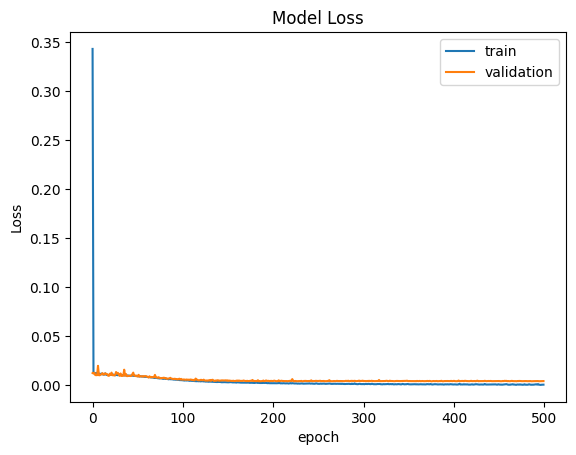

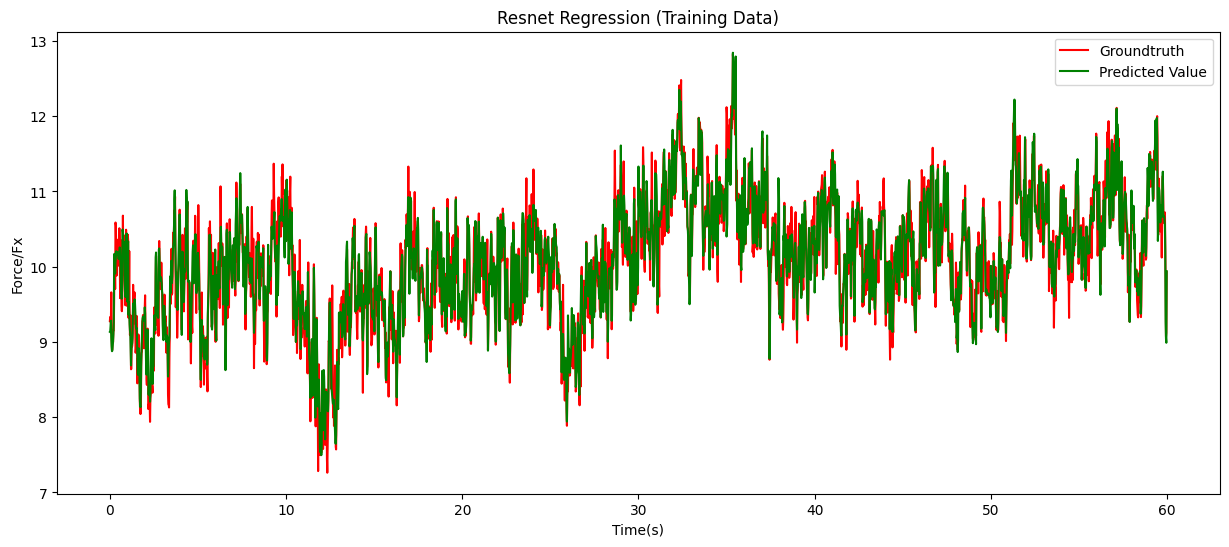

188/188 [==============================] - 1s 4ms/step


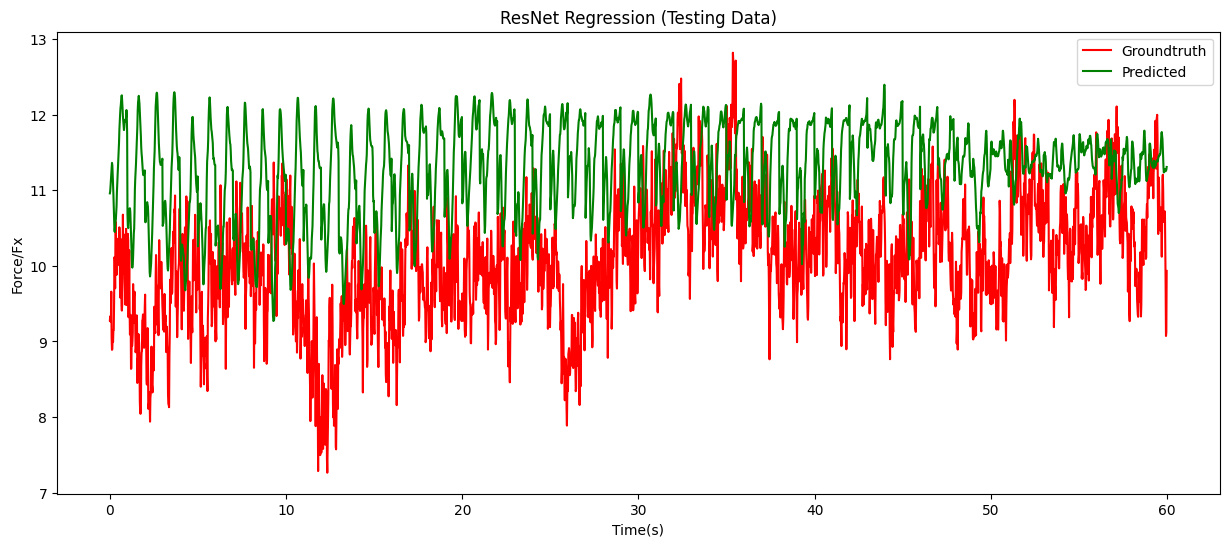

In [10]:
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error, r2_score

columns = ['Fx']
wavelet = 'db4'
max_iter = 50
iter = 0

# Training Process
Insole = pd.read_csv('0310AyuStand5Min1.txt', header=None, low_memory=False)
SIData =  np.asarray(Insole)

df = pd.read_csv('0310AyuStand5Min1.csv', low_memory=False)
selected_df = df[columns]
FPDatas = selected_df[:]

SmartInsole = np.array(SIData[:]).astype('float32')
FPData = np.array(FPDatas).astype('float32')

SIDWTcoeffs = []
for i in range(89):
    coeffs = pywt.wavedec(SmartInsole[:, i], wavelet)
    coeffs[-1] = np.zeros_like(coeffs[-1])
#     coeffs[-2] = np.zeros_like(coeffs[-2])
#     coeffs[-3] = np.zeros_like(coeffs[-3])
#     coeffs[-4] = np.zeros_like(coeffs[-4])
#     coeffs[-5] = np.zeros_like(coeffs[-5])
#     coeffs[-6] = np.zeros_like(coeffs[-6])
    SIDWTcoeffs.append(coeffs)

SIData_filtered = np.zeros(SmartInsole.shape)
for i in range(89):
    SIData_filtered[:, i] = pywt.waverec(SIDWTcoeffs[i], wavelet, mode='symmetric', axis=0)

max_iter = 50
iter = 0
for i in range(len(SIData_filtered)):
    SIData_filtered[i][0] = SIData_filtered[i][0] + (iter % max_iter) + 1
    iter += 1

# Scale the smart insole data
minInsole = SIData_filtered.min()
maxInsole = SIData_filtered.max()
smart_insole_data_scaled = (SIData_filtered - minInsole) / ( maxInsole - minInsole )

# Scale the force plate data
minForcePlate = FPData.min()
maxForcePlate = FPData.max()
force_plate_data_scaled = (FPData - minForcePlate) / ( maxForcePlate - minForcePlate )

#Spliting Data
sample_size = smart_insole_data_scaled.shape[0] # number of samples in train set
time_steps  = smart_insole_data_scaled.shape[1] # number of features in train set
input_dimension = 1               # each feature is represented by 1 number

train_data_reshaped = smart_insole_data_scaled.reshape(sample_size,time_steps,input_dimension)

X_train, X_test, y_train, y_test = train_test_split(train_data_reshaped[:13000], 
                                                    force_plate_data_scaled[:13000], 
                                                    test_size=0.20, random_state=2)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

"Configurations for ResNet in Regression Mode"
length = X_train.shape[1]   # Number of Features (or length of the signal)
model_width = 64           # Number of Filter or Kernel in the Input Layer
num_channel = 1             # Number of Input Channels
problem_type = 'Regression' # Regression or Classification
output_number = 1           # Number of Outputs in the Regression Mode

Regression_Model = ResNet(length, num_channel, model_width, problem_type=problem_type, 
                          output_nums=output_number).ResNet18()
Regression_Model.compile(loss='mse', optimizer=Adam(learning_rate=0.0001), metrics= ['mse']) # Compile Model

Regression_Model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=30, mode='min'), ModelCheckpoint('Saved_Model.h5', verbose=1, monitor='val_loss', save_best_only=True, mode='min')]
history = Regression_Model.fit(X_train, y_train, epochs=500, batch_size=32, verbose=1, validation_split=0.2, shuffle=True)

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
# plt.show()
plt.savefig('Loss Result.png')

#Evaluate Model
Regression_Model.evaluate(train_data_reshaped[:13000], force_plate_data_scaled[:13000])
ypred = Regression_Model.predict(train_data_reshaped[:13000])

print('MSE: ',mean_squared_error(force_plate_data_scaled[:13000], ypred))
print('RMSE: ',math.sqrt(mean_squared_error(force_plate_data_scaled[:13000], ypred)))
print('Coefficient of determination (r2 Score): ', r2_score(force_plate_data_scaled[:13000], ypred))

# Inverse transform the predictions and actual values
y_pred = (ypred * (maxForcePlate - minForcePlate)) + minForcePlate
y_real = (force_plate_data_scaled[:13000] * (maxForcePlate - minForcePlate)) + minForcePlate

print('MSE: ',mean_squared_error(y_real, ypred))
print('RMSE: ',math.sqrt(mean_squared_error(y_real, ypred)))
print('Coefficient of determination (r2 Score): ', r2_score(y_real, ypred))

x=[]
colors=['red','green','brown','teal','gray','black','maroon','orange','purple']
colors2=['green','red','orange','black','maroon','teal','blue','gray','brown']
x = np.arange(0,3000)*60/3000 
for i in range(0,1):
    plt.figure(figsize=(15,6))
    # plt.figure()
    plt.plot(x,y_real[0:3000,i],color='red')
    plt.plot(x,y_pred[0:3000,i], markerfacecolor='none',color='green')
    plt.title('Resnet Regression (Training Data)')
    if i < 3:
      plt.ylabel('Force/'+columns[i])
    else:
      plt.ylabel('Moment/'+columns[i])
    plt.xlabel('Time(s)')
    plt.legend(['Groundtruth', 'Predicted Value'], loc='best')
    plt.show()

tf.keras.models.save_model(Regression_Model, '1ouput.h5')
#End Training Process

# Load Model to Predict Real Data
modelCoy = tf.keras.models.load_model('1ouput.h5')

Test_Insole = pd.read_csv('0310AyuStand5Min2.txt', header=None, low_memory=False)
TestSIData =  np.asarray(Test_Insole)

Test_df = pd.read_csv('0310AyuStand5Min1.csv', low_memory=False)
Test_selected_df = Test_df[columns]
Test_FPDatas = Test_selected_df[:6000]

Test_SmartInsole = np.array(TestSIData[:6000]).astype('float32')
Test_FPData = np.array(Test_FPDatas).astype('float32')

SIDWTcoeffs = []
for i in range(89):
    coeffs = pywt.wavedec(Test_SmartInsole[:, i], wavelet)
    coeffs[-1] = np.zeros_like(coeffs[-1])
#     coeffs[-2] = np.zeros_like(coeffs[-2])
#     coeffs[-3] = np.zeros_like(coeffs[-3])
#     coeffs[-4] = np.zeros_like(coeffs[-4])
#     coeffs[-5] = np.zeros_like(coeffs[-5])
#     coeffs[-6] = np.zeros_like(coeffs[-6])
    SIDWTcoeffs.append(coeffs)

Test_SIData_filtered = np.zeros(Test_SmartInsole.shape)
for i in range(89):
    Test_SIData_filtered[:, i] = pywt.waverec(SIDWTcoeffs[i], wavelet, mode='symmetric', axis=0)


for i in range(len(Test_SIData_filtered)):
    Test_SIData_filtered[i][0] = Test_SIData_filtered[i][0] + (iter % max_iter) + 1
    iter += 1

Test_smart_insole_data_scaled = (Test_SIData_filtered - minInsole) / ( maxInsole - minInsole )
Test_force_plate_data_scaled = (Test_FPData - minForcePlate) / ( maxForcePlate - minForcePlate )

Test_sample_size = Test_smart_insole_data_scaled.shape[0]
Test_time_steps  = Test_smart_insole_data_scaled.shape[1]
Test_input_dimension = 1

Test_train_data_reshaped = Test_smart_insole_data_scaled.reshape(Test_sample_size,Test_time_steps,Test_input_dimension)

modelCoy.evaluate(Test_train_data_reshaped, Test_force_plate_data_scaled)
Test_Pred = modelCoy.predict(Test_train_data_reshaped)

predictions = (Test_Pred * (maxForcePlate - minForcePlate)) + minForcePlate
Real = (Test_force_plate_data_scaled * (maxForcePlate - minForcePlate)) + minForcePlate

x=[]
x = np.arange(0,3000)*60/3000 
for i in range(0,1):
    plt.figure(figsize=(15,6))
    # plt.figure()
    plt.plot(x,Real[0:3000,i],color='red')
    plt.plot(x,predictions[0:3000,i], markerfacecolor='none',color='green')
    plt.title('ResNet Regression (Testing Data)')
    if i < 3:
      plt.ylabel('Force/'+columns[i])
    else:
      plt.ylabel('Moment/'+columns[i])
    plt.xlabel('Time(s)')
    plt.legend(['Groundtruth', 'Predicted'], loc='best')
    plt.show()
    
# please help me make normalization process manualy dont use the sickit-learn on this process

313/313 [==============================] - 1s 4ms/step


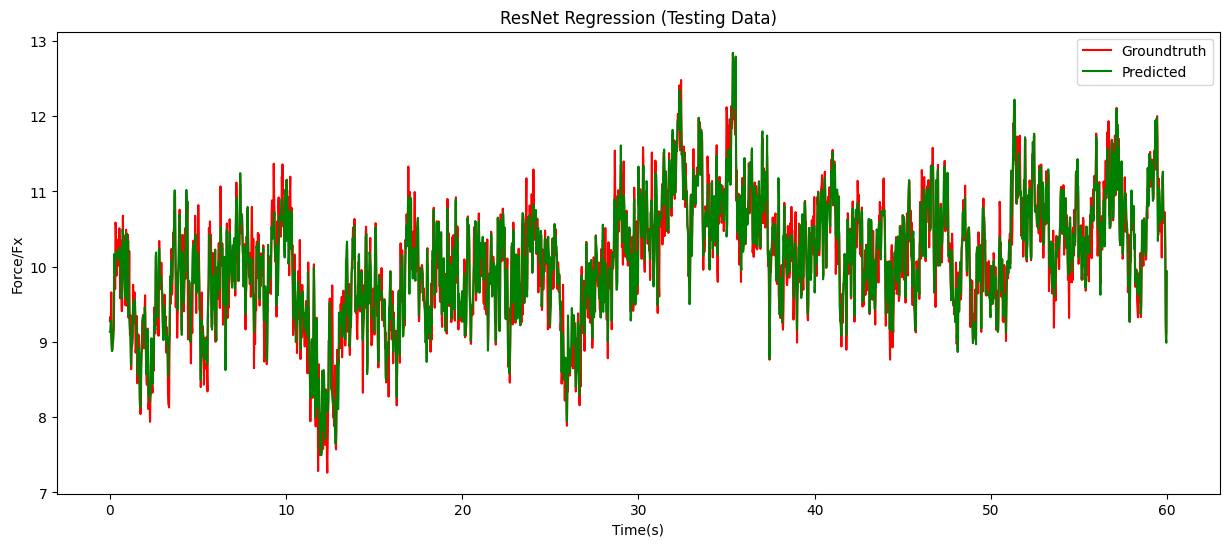

In [11]:
# Load Model to Predict Real Data
Test_Insole = pd.read_csv('0310AyuStand5Min1.txt', header=None, low_memory=False)
TestSIData =  np.asarray(Test_Insole)

Test_df = pd.read_csv('0310AyuStand5Min1.csv', low_memory=False)
Test_selected_df = Test_df[columns]
Test_FPDatas = Test_selected_df[:10000]

Test_SmartInsole = np.array(TestSIData[:10000]).astype('float32')
Test_FPData = np.array(Test_FPDatas).astype('float32')

SIDWTcoeffs = []
for i in range(89):
    coeffs = pywt.wavedec(Test_SmartInsole[:, i], wavelet)
    coeffs[-1] = np.zeros_like(coeffs[-1])
#     coeffs[-2] = np.zeros_like(coeffs[-2])
#     coeffs[-3] = np.zeros_like(coeffs[-3])
#     coeffs[-4] = np.zeros_like(coeffs[-4])
#     coeffs[-5] = np.zeros_like(coeffs[-5])
#     coeffs[-6] = np.zeros_like(coeffs[-6])
    SIDWTcoeffs.append(coeffs)

Test_SIData_filtered = np.zeros(Test_SmartInsole.shape)
for i in range(89):
    Test_SIData_filtered[:, i] = pywt.waverec(SIDWTcoeffs[i], wavelet, mode='symmetric', axis=0)

for i in range(len(Test_SIData_filtered)):
    Test_SIData_filtered[i][0] = Test_SIData_filtered[i][0] + (iter % max_iter) + 1
    iter += 1

Test_smart_insole_data_scaled = (Test_SIData_filtered - minInsole) / ( maxInsole - minInsole )
Test_force_plate_data_scaled = (Test_FPData - minForcePlate) / ( maxForcePlate - minForcePlate )

Test_sample_size = Test_smart_insole_data_scaled.shape[0]
Test_time_steps  = Test_smart_insole_data_scaled.shape[1]
Test_input_dimension = 1

Test_train_data_reshaped = Test_smart_insole_data_scaled.reshape(Test_sample_size,Test_time_steps,Test_input_dimension)

modelCoy.evaluate(Test_train_data_reshaped, Test_force_plate_data_scaled)
Test_Pred = modelCoy.predict(Test_train_data_reshaped)

predictions = (Test_Pred * (maxForcePlate - minForcePlate)) + minForcePlate
Real = (Test_force_plate_data_scaled * (maxForcePlate - minForcePlate)) + minForcePlate

x=[]
x = np.arange(0,3000)*60/3000 
for i in range(0,1):
    plt.figure(figsize=(15,6))
    # plt.figure()
    plt.plot(x,Real[0:3000,i],color='red')
    plt.plot(x,predictions[0:3000,i], markerfacecolor='none',color='green')
    plt.title('ResNet Regression (Testing Data)')
    if i < 3:
      plt.ylabel('Force/'+columns[i])
    else:
      plt.ylabel('Moment/'+columns[i])
    plt.xlabel('Time(s)')
    plt.legend(['Groundtruth', 'Predicted'], loc='best')
    plt.show()
    
# please help me make normalization process manualy dont use the sickit-learn on this process

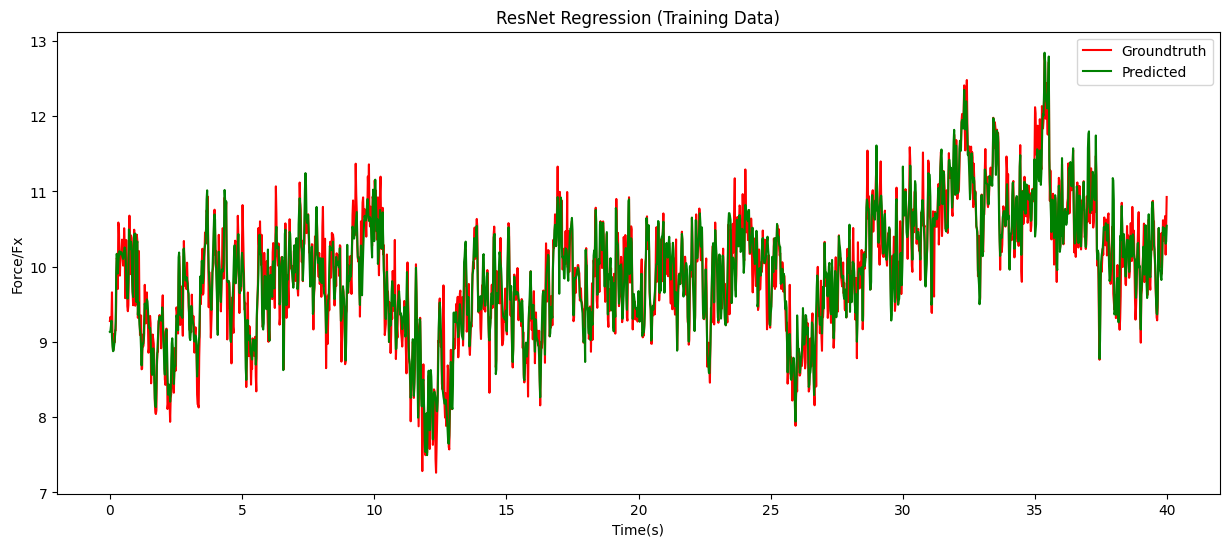

In [12]:
x=[]
x = np.arange(0,2000)*40/2000 
for i in range(0,1):
    plt.figure(figsize=(15,6))
    # plt.figure()
    plt.plot(x,Real[0:2000,i],color='red')
    plt.plot(x,predictions[0:2000,i], markerfacecolor='none',color='green')
    plt.title('ResNet Regression (Training Data)')
    if i < 3:
      plt.ylabel('Force/'+columns[i])
    else:
      plt.ylabel('Moment/'+columns[i])
    plt.xlabel('Time(s)')
    plt.legend(['Groundtruth', 'Predicted'], loc='best')
    plt.show()

63/63 [==============================] - 0s 4ms/step


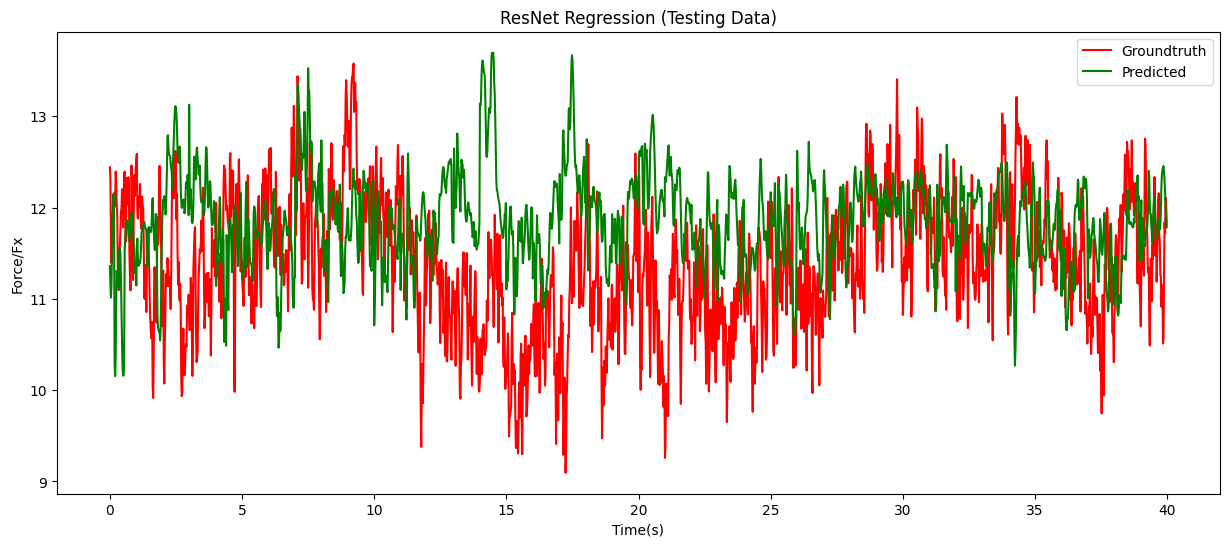

In [13]:
# Load Model to Predict Real Data
Test_Insole = pd.read_csv('0310AyuStand5Min1.txt', header=None, low_memory=False)
TestSIData =  np.asarray(Test_Insole)

Test_df = pd.read_csv('0310AyuStand5Min1.csv', low_memory=False)
Test_selected_df = Test_df[columns]
Test_FPDatas = Test_selected_df[13000:]

Test_SmartInsole = np.array(TestSIData[13000:]).astype('float32')
Test_FPData = np.array(Test_FPDatas).astype('float32')

SIDWTcoeffs = []
for i in range(89):
    coeffs = pywt.wavedec(Test_SmartInsole[:, i], wavelet)
    coeffs[-1] = np.zeros_like(coeffs[-1])
#     coeffs[-2] = np.zeros_like(coeffs[-2])
#     coeffs[-3] = np.zeros_like(coeffs[-3])
#     coeffs[-4] = np.zeros_like(coeffs[-4])
#     coeffs[-5] = np.zeros_like(coeffs[-5])
#     coeffs[-6] = np.zeros_like(coeffs[-6])
    SIDWTcoeffs.append(coeffs)

Test_SIData_filtered = np.zeros(Test_SmartInsole.shape)
for i in range(89):
    Test_SIData_filtered[:, i] = pywt.waverec(SIDWTcoeffs[i], wavelet, mode='symmetric', axis=0)

for i in range(len(Test_SIData_filtered)):
    Test_SIData_filtered[i][0] = Test_SIData_filtered[i][0] + (iter % max_iter) + 1
    iter += 1

Test_smart_insole_data_scaled = (Test_SIData_filtered - minInsole) / ( maxInsole - minInsole )
Test_force_plate_data_scaled = (Test_FPData - minForcePlate) / ( maxForcePlate - minForcePlate )

Test_sample_size = Test_smart_insole_data_scaled.shape[0]
Test_time_steps  = Test_smart_insole_data_scaled.shape[1]
Test_input_dimension = 1

Test_train_data_reshaped = Test_smart_insole_data_scaled.reshape(Test_sample_size,Test_time_steps,Test_input_dimension)

modelCoy.evaluate(Test_train_data_reshaped, Test_force_plate_data_scaled)
Test_Pred = modelCoy.predict(Test_train_data_reshaped)

predictions = (Test_Pred * (maxForcePlate - minForcePlate)) + minForcePlate
Real = (Test_force_plate_data_scaled * (maxForcePlate - minForcePlate)) + minForcePlate

x=[]
x = np.arange(0,2000)*40/2000 
for i in range(0,1):
    plt.figure(figsize=(15,6))
    # plt.figure()
    plt.plot(x,Real[0:2000,i],color='red')
    plt.plot(x,predictions[0:2000,i], markerfacecolor='none',color='green')
    plt.title('ResNet Regression (Testing Data)')
    if i < 3:
      plt.ylabel('Force/'+columns[i])
    else:
      plt.ylabel('Moment/'+columns[i])
    plt.xlabel('Time(s)')
    plt.legend(['Groundtruth', 'Predicted'], loc='best')
    plt.show()
    
# please help me make normalization process manualy dont use the sickit-learn on this process

In [14]:
# print(Finish)

#No Scaling Insole

(8000, 89, 1) (2000, 89, 1)
(8000, 1) (2000, 1)
Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 89, 1)]      0           []                               
                                                                                                  
 conv1d_68 (Conv1D)             (None, 45, 64)       512         ['input_5[0][0]']                
                                                                                                  
 activation_88 (Activation)     (None, 45, 64)       0           ['conv1d_68[0][0]']              
                                                                                                  
 max_pooling1d_4 (MaxPooling1D)  (None, 22, 64)      0           ['activation_88[0][0]']          
                                            

 conv1d_82 (Conv1D)             (None, 3, 512)       786944      ['activation_105[0][0]']         
                                                                                                  
 activation_106 (Activation)    (None, 3, 512)       0           ['conv1d_82[0][0]']              
                                                                                                  
 conv1d_83 (Conv1D)             (None, 3, 512)       786944      ['activation_106[0][0]']         
                                                                                                  
 activation_107 (Activation)    (None, 3, 512)       0           ['conv1d_83[0][0]']              
                                                                                                  
 conv1d_84 (Conv1D)             (None, 3, 512)       786944      ['activation_107[0][0]']         
                                                                                                  
 activatio

Epoch 102/500
200/200 [==============================] - 2s 11ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 103/500
200/200 [==============================] - 2s 11ms/step - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 104/500
200/200 [==============================] - 2s 10ms/step - loss: 0.0123 - mse: 0.0123 - val_loss: 0.0170 - val_mse: 0.0170
Epoch 105/500
200/200 [==============================] - 2s 10ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0096 - val_mse: 0.0096
Epoch 106/500
200/200 [==============================] - 2s 10ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 107/500
200/200 [==============================] - 2s 10ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 108/500
200/200 [==============================] - 2s 10ms/step - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 109/500
200/200 [=========================

200/200 [==============================] - 2s 11ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 223/500
200/200 [==============================] - 2s 10ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 224/500
200/200 [==============================] - 2s 11ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 225/500
200/200 [==============================] - 2s 11ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 226/500
200/200 [==============================] - 2s 11ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 227/500
200/200 [==============================] - 2s 11ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 228/500
200/200 [==============================] - 2s 11ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 229/500
200/200 [==============================] - 2s 11

200/200 [==============================] - 2s 10ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 343/500
200/200 [==============================] - 2s 10ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 344/500
200/200 [==============================] - 2s 10ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 345/500
200/200 [==============================] - 2s 10ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 346/500
200/200 [==============================] - 2s 11ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 347/500
200/200 [==============================] - 2s 11ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 348/500
200/200 [==============================] - 2s 10ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 349/500
200/200 [==============================] - 2s 10

Epoch 461/500
200/200 [==============================] - 2s 11ms/step - loss: 8.2876e-04 - mse: 8.2876e-04 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 462/500
200/200 [==============================] - 2s 10ms/step - loss: 7.4221e-04 - mse: 7.4221e-04 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 463/500
200/200 [==============================] - 2s 11ms/step - loss: 9.5753e-04 - mse: 9.5753e-04 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 464/500
200/200 [==============================] - 2s 10ms/step - loss: 8.9468e-04 - mse: 8.9468e-04 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 465/500
200/200 [==============================] - 2s 10ms/step - loss: 0.0010 - mse: 0.0010 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 466/500
200/200 [==============================] - 2s 10ms/step - loss: 8.9024e-04 - mse: 8.9024e-04 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 467/500
200/200 [==============================] - 2s 10ms/step - loss: 8.7693e-04 - mse: 8.7693e-04 - val_loss: 0.0047 - val_mse: 0.0047


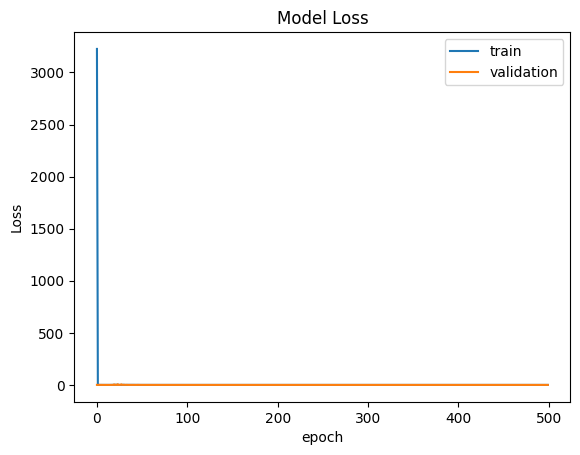

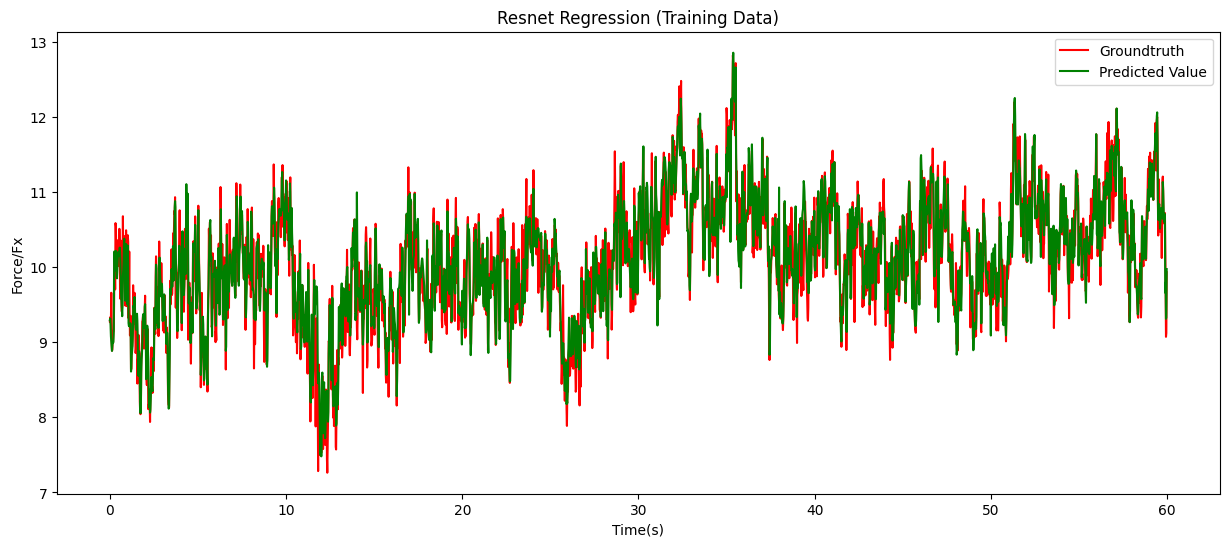

188/188 [==============================] - 1s 4ms/step


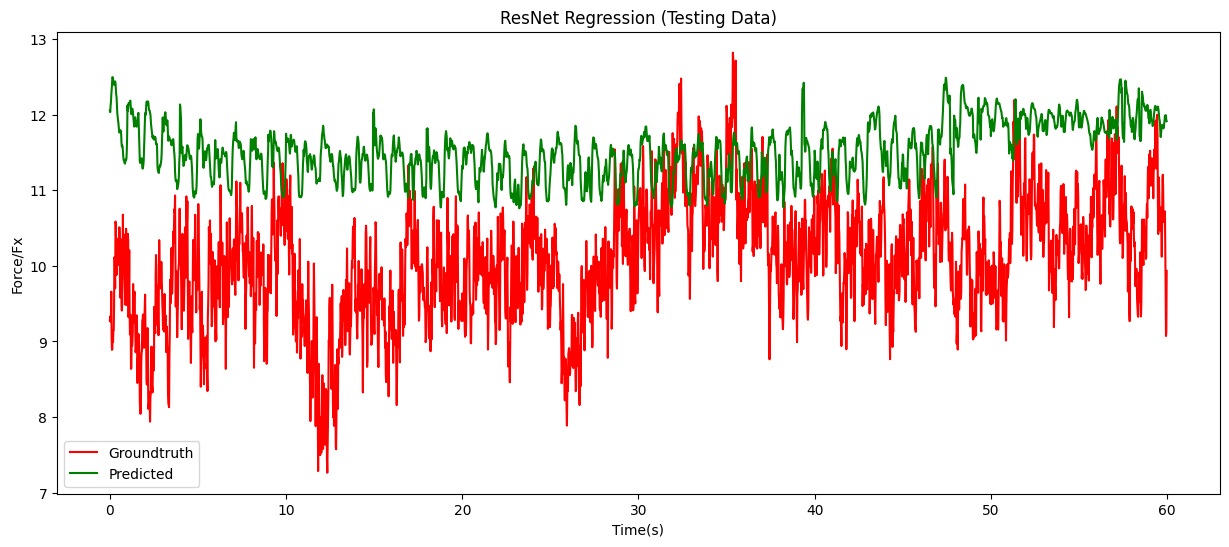

In [15]:
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error, r2_score

# Training Process
Insole = pd.read_csv('0310AyuStand5Min1.txt', header=None, low_memory=False)
SIData =  np.asarray(Insole)

df = pd.read_csv('0310AyuStand5Min1.csv', low_memory=False)
columns = ['Fx']
selected_df = df[columns]
FPDatas = selected_df[:]

SmartInsole = np.array(SIData[:]).astype('float32')
FPData = np.array(FPDatas).astype('float32')

SIDWTcoeffs = []
for i in range(89):
    coeffs = pywt.wavedec(SmartInsole[:, i], wavelet)
    coeffs[-1] = np.zeros_like(coeffs[-1])
#     coeffs[-2] = np.zeros_like(coeffs[-2])
#     coeffs[-3] = np.zeros_like(coeffs[-3])
#     coeffs[-4] = np.zeros_like(coeffs[-4])
#     coeffs[-5] = np.zeros_like(coeffs[-5])
#     coeffs[-6] = np.zeros_like(coeffs[-6])
    SIDWTcoeffs.append(coeffs)

SIData_filtered = np.zeros(SmartInsole.shape)
for i in range(89):
    SIData_filtered[:, i] = pywt.waverec(SIDWTcoeffs[i], wavelet, mode='symmetric', axis=0)

for i in range(len(SIData_filtered)):
    SIData_filtered[i][0] = SIData_filtered[i][0] + (iter % max_iter) + 1
    iter += 1

# Scale the force plate data
minForcePlate = FPData.min()
maxForcePlate = FPData.max()
force_plate_data_scaled = (FPData - minForcePlate) / ( maxForcePlate - minForcePlate )

#Spliting Data
sample_size = SIData_filtered.shape[0] # number of samples in train set
time_steps  = SIData_filtered.shape[1] # number of features in train set
input_dimension = 1               # each feature is represented by 1 number

train_data_reshaped = SIData_filtered.reshape(sample_size,time_steps,input_dimension)

X_train, X_test, y_train, y_test = train_test_split(train_data_reshaped[:10000], force_plate_data_scaled[:10000], test_size=0.20, random_state=2)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

"Configurations for ResNet in Regression Mode"
length = X_train.shape[1]   # Number of Features (or length of the signal)
model_width = 64           # Number of Filter or Kernel in the Input Layer
num_channel = 1             # Number of Input Channels
problem_type = 'Regression' # Regression or Classification
output_number = 1           # Number of Outputs in the Regression Mode

Regression_Model = ResNet(length, num_channel, model_width, problem_type=problem_type, 
                          output_nums=output_number).ResNet18()
Regression_Model.compile(loss='mse', optimizer=Adam(learning_rate=0.0001), metrics= ['mse']) # Compile Model

Regression_Model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=30, mode='min'), ModelCheckpoint('Saved_Model.h5', verbose=1, monitor='val_loss', save_best_only=True, mode='min')]
history = Regression_Model.fit(X_train, y_train, epochs=500, batch_size=32, verbose=1, validation_split=0.2, shuffle=True)

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
# plt.show()
plt.savefig('Loss Result.png')

#Evaluate Model
Regression_Model.evaluate(train_data_reshaped[:10000], force_plate_data_scaled[:10000])
ypred = Regression_Model.predict(train_data_reshaped[:10000])

print('MSE: ',mean_squared_error(force_plate_data_scaled[:10000], ypred))
print('RMSE: ',math.sqrt(mean_squared_error(force_plate_data_scaled[:10000], ypred)))
print('Coefficient of determination (r2 Score): ', r2_score(force_plate_data_scaled[:10000], ypred))

# Inverse transform the predictions and actual values
y_pred = (ypred * (maxForcePlate - minForcePlate)) + minForcePlate
y_real = (force_plate_data_scaled[:10000] * (maxForcePlate - minForcePlate)) + minForcePlate

print('MSE: ',mean_squared_error(y_real, ypred))
print('RMSE: ',math.sqrt(mean_squared_error(y_real, ypred)))
print('Coefficient of determination (r2 Score): ', r2_score(y_real, ypred))

x=[]
colors=['red','green','brown','teal','gray','black','maroon','orange','purple']
colors2=['green','red','orange','black','maroon','teal','blue','gray','brown']
x = np.arange(0,3000)*60/3000 
for i in range(0,1):
    plt.figure(figsize=(15,6))
    # plt.figure()
    plt.plot(x,y_real[0:3000,i],color='red')
    plt.plot(x,y_pred[0:3000,i], markerfacecolor='none',color='green')
    plt.title('Resnet Regression (Training Data)')
    if i < 3:
      plt.ylabel('Force/'+columns[i])
    else:
      plt.ylabel('Moment/'+columns[i])
    plt.xlabel('Time(s)')
    plt.legend(['Groundtruth', 'Predicted Value'], loc='best')
    plt.show()

tf.keras.models.save_model(Regression_Model, '1ouput.h5')
#End Training Process

# Load Model to Predict Real Data
modelCoy = tf.keras.models.load_model('1ouput.h5')

Test_Insole = pd.read_csv('0310AyuStand5Min2.txt', header=None, low_memory=False)
TestSIData =  np.asarray(Test_Insole)

Test_df = pd.read_csv('0310AyuStand5Min1.csv', low_memory=False)
Test_columns = ['Fx']
Test_selected_df = Test_df[Test_columns]
Test_FPDatas = Test_selected_df[:6000]

Test_SmartInsole = np.array(TestSIData[:6000]).astype('float32')
Test_FPData = np.array(Test_FPDatas).astype('float32')

SIDWTcoeffs = []
for i in range(89):
    coeffs = pywt.wavedec(Test_SmartInsole[:, i], wavelet)
    coeffs[-1] = np.zeros_like(coeffs[-1])
#     coeffs[-2] = np.zeros_like(coeffs[-2])
#     coeffs[-3] = np.zeros_like(coeffs[-3])
#     coeffs[-4] = np.zeros_like(coeffs[-4])
#     coeffs[-5] = np.zeros_like(coeffs[-5])
#     coeffs[-6] = np.zeros_like(coeffs[-6])
    SIDWTcoeffs.append(coeffs)

Test_SIData_filtered = np.zeros(Test_SmartInsole.shape)
for i in range(89):
    Test_SIData_filtered[:, i] = pywt.waverec(SIDWTcoeffs[i], wavelet, mode='symmetric', axis=0)


for i in range(len(Test_SIData_filtered)):
    Test_SIData_filtered[i][0] = Test_SIData_filtered[i][0] + (iter % max_iter) + 1
    iter += 1

Test_force_plate_data_scaled = (Test_FPData - minForcePlate) / ( maxForcePlate - minForcePlate )

Test_sample_size = Test_SIData_filtered.shape[0]
Test_time_steps  = Test_SIData_filtered.shape[1]
Test_input_dimension = 1

Test_train_data_reshaped = Test_SIData_filtered.reshape(Test_sample_size,Test_time_steps,Test_input_dimension)

modelCoy.evaluate(Test_train_data_reshaped, Test_force_plate_data_scaled)
Test_Pred = modelCoy.predict(Test_train_data_reshaped)

predictions = (Test_Pred * (maxForcePlate - minForcePlate)) + minForcePlate
Real = (Test_force_plate_data_scaled * (maxForcePlate - minForcePlate)) + minForcePlate

x=[]
x = np.arange(0,3000)*60/3000 
for i in range(0,1):
    plt.figure(figsize=(15,6))
    # plt.figure()
    plt.plot(x,Real[0:3000,i],color='red')
    plt.plot(x,predictions[0:3000,i], markerfacecolor='none',color='green')
    plt.title('ResNet Regression (Testing Data)')
    if i < 3:
      plt.ylabel('Force/'+columns[i])
    else:
      plt.ylabel('Moment/'+columns[i])
    plt.xlabel('Time(s)')
    plt.legend(['Groundtruth', 'Predicted'], loc='best')
    plt.show()
    
# please help me make normalization process manualy dont use the sickit-learn on this process

313/313 [==============================] - 1s 4ms/step


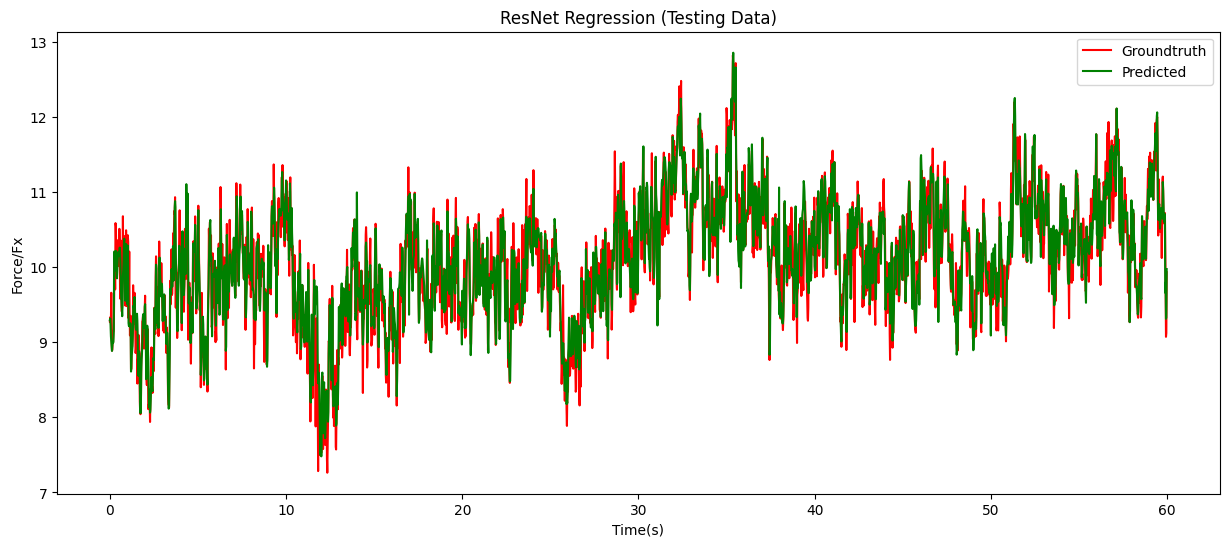

In [16]:
# Load Model to Predict Real Data
Test_Insole = pd.read_csv('0310AyuStand5Min1.txt', header=None, low_memory=False)
TestSIData =  np.asarray(Test_Insole)

Test_df = pd.read_csv('0310AyuStand5Min1.csv', low_memory=False)
Test_selected_df = Test_df[columns]
Test_FPDatas = Test_selected_df[:10000]

Test_SmartInsole = np.array(TestSIData[:10000]).astype('float32')
Test_FPData = np.array(Test_FPDatas).astype('float32')

SIDWTcoeffs = []
for i in range(89):
    coeffs = pywt.wavedec(Test_SmartInsole[:, i], wavelet)
    coeffs[-1] = np.zeros_like(coeffs[-1])
#     coeffs[-2] = np.zeros_like(coeffs[-2])
#     coeffs[-3] = np.zeros_like(coeffs[-3])
#     coeffs[-4] = np.zeros_like(coeffs[-4])
#     coeffs[-5] = np.zeros_like(coeffs[-5])
#     coeffs[-6] = np.zeros_like(coeffs[-6])
    SIDWTcoeffs.append(coeffs)

Test_SIData_filtered = np.zeros(Test_SmartInsole.shape)
for i in range(89):
    Test_SIData_filtered[:, i] = pywt.waverec(SIDWTcoeffs[i], wavelet, mode='symmetric', axis=0)

for i in range(len(Test_SIData_filtered)):
    Test_SIData_filtered[i][0] = Test_SIData_filtered[i][0] + (iter % max_iter) + 1
    iter += 1

Test_force_plate_data_scaled = (Test_FPData - minForcePlate) / ( maxForcePlate - minForcePlate )

Test_sample_size = Test_SIData_filtered.shape[0]
Test_time_steps  = Test_SIData_filtered.shape[1]
Test_input_dimension = 1

Test_train_data_reshaped = Test_SIData_filtered.reshape(Test_sample_size,Test_time_steps,Test_input_dimension)

modelCoy.evaluate(Test_train_data_reshaped, Test_force_plate_data_scaled)
Test_Pred = modelCoy.predict(Test_train_data_reshaped)

predictions = (Test_Pred * (maxForcePlate - minForcePlate)) + minForcePlate
Real = (Test_force_plate_data_scaled * (maxForcePlate - minForcePlate)) + minForcePlate

x=[]
x = np.arange(0,3000)*60/3000 
for i in range(0,1):
    plt.figure(figsize=(15,6))
    # plt.figure()
    plt.plot(x,Real[0:3000,i],color='red')
    plt.plot(x,predictions[0:3000,i], markerfacecolor='none',color='green')
    plt.title('ResNet Regression (Testing Data)')
    if i < 3:
      plt.ylabel('Force/'+columns[i])
    else:
      plt.ylabel('Moment/'+columns[i])
    plt.xlabel('Time(s)')
    plt.legend(['Groundtruth', 'Predicted'], loc='best')
    plt.show()
    
# please help me make normalization process manualy dont use the sickit-learn on this process

157/157 [==============================] - 1s 4ms/step


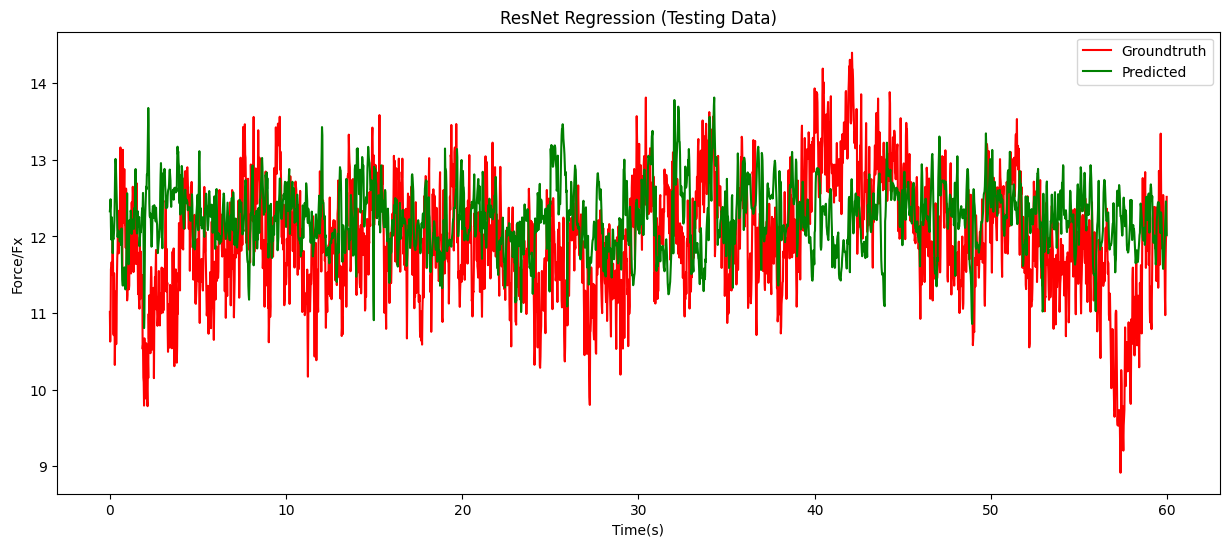

In [17]:
# Load Model to Predict Real Data
Test_Insole = pd.read_csv('0310AyuStand5Min1.txt', header=None, low_memory=False)
TestSIData =  np.asarray(Test_Insole)

Test_df = pd.read_csv('0310AyuStand5Min1.csv', low_memory=False)
Test_selected_df = Test_df[columns]
Test_FPDatas = Test_selected_df[10000:]

Test_SmartInsole = np.array(TestSIData[10000:]).astype('float32')
Test_FPData = np.array(Test_FPDatas).astype('float32')

SIDWTcoeffs = []
for i in range(89):
    coeffs = pywt.wavedec(Test_SmartInsole[:, i], wavelet)
    coeffs[-1] = np.zeros_like(coeffs[-1])
#     coeffs[-2] = np.zeros_like(coeffs[-2])
#     coeffs[-3] = np.zeros_like(coeffs[-3])
#     coeffs[-4] = np.zeros_like(coeffs[-4])
#     coeffs[-5] = np.zeros_like(coeffs[-5])
#     coeffs[-6] = np.zeros_like(coeffs[-6])
    SIDWTcoeffs.append(coeffs)

Test_SIData_filtered = np.zeros(Test_SmartInsole.shape)
for i in range(89):
    Test_SIData_filtered[:, i] = pywt.waverec(SIDWTcoeffs[i], wavelet, mode='symmetric', axis=0)

for i in range(len(Test_SIData_filtered)):
    Test_SIData_filtered[i][0] = Test_SIData_filtered[i][0] + (iter % max_iter) + 1
    iter += 1

Test_force_plate_data_scaled = (Test_FPData - minForcePlate) / ( maxForcePlate - minForcePlate )

Test_sample_size = Test_SIData_filtered.shape[0]
Test_time_steps  = Test_SIData_filtered.shape[1]
Test_input_dimension = 1

Test_train_data_reshaped = Test_SIData_filtered.reshape(Test_sample_size,Test_time_steps,Test_input_dimension)

modelCoy.evaluate(Test_train_data_reshaped, Test_force_plate_data_scaled)
Test_Pred = modelCoy.predict(Test_train_data_reshaped)

predictions = (Test_Pred * (maxForcePlate - minForcePlate)) + minForcePlate
Real = (Test_force_plate_data_scaled * (maxForcePlate - minForcePlate)) + minForcePlate

x=[]
x = np.arange(0,3000)*60/3000 
for i in range(0,1):
    plt.figure(figsize=(15,6))
    # plt.figure()
    plt.plot(x,Real[0:3000,i],color='red')
    plt.plot(x,predictions[0:3000,i], markerfacecolor='none',color='green')
    plt.title('ResNet Regression (Testing Data)')
    if i < 3:
      plt.ylabel('Force/'+columns[i])
    else:
      plt.ylabel('Moment/'+columns[i])
    plt.xlabel('Time(s)')
    plt.legend(['Groundtruth', 'Predicted'], loc='best')
    plt.show()
    
# please help me make normalization process manualy dont use the sickit-learn on this process

#All No Scaling

In [ ]:
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error, r2_score

# Training Process
Insole = pd.read_csv('0310AyuStand5Min1.txt', header=None, low_memory=False)
SIData =  np.asarray(Insole)

df = pd.read_csv('0310AyuStand5Min1.csv', low_memory=False)
columns = ['Fx']
selected_df = df[columns]
FPDatas = selected_df[:]

SmartInsole = np.array(SIData[:]).astype('float32')
FPData = np.array(FPDatas).astype('float32')

SIDWTcoeffs = []
for i in range(89):
    coeffs = pywt.wavedec(SmartInsole[:, i], wavelet)
    coeffs[-1] = np.zeros_like(coeffs[-1])
#     coeffs[-2] = np.zeros_like(coeffs[-2])
#     coeffs[-3] = np.zeros_like(coeffs[-3])
#     coeffs[-4] = np.zeros_like(coeffs[-4])
#     coeffs[-5] = np.zeros_like(coeffs[-5])
#     coeffs[-6] = np.zeros_like(coeffs[-6])
    SIDWTcoeffs.append(coeffs)

SIData_filtered = np.zeros(SmartInsole.shape)
for i in range(89):
    SIData_filtered[:, i] = pywt.waverec(SIDWTcoeffs[i], wavelet, mode='symmetric', axis=0)

for i in range(len(SIData_filtered)):
    SIData_filtered[i][0] = SIData_filtered[i][0] + (iter % max_iter) + 1
    iter += 1

#Spliting Data
sample_size = SIData_filtered.shape[0] # number of samples in train set
time_steps  = SIData_filtered.shape[1] # number of features in train set
input_dimension = 1               # each feature is represented by 1 number

train_data_reshaped = SIData_filtered.reshape(sample_size,time_steps,input_dimension)

X_train, X_test, y_train, y_test = train_test_split(train_data_reshaped[:10000], FPData[:10000], test_size=0.20, random_state=2)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

"Configurations for ResNet in Regression Mode"
length = X_train.shape[1]   # Number of Features (or length of the signal)
model_width = 64           # Number of Filter or Kernel in the Input Layer
num_channel = 1             # Number of Input Channels
problem_type = 'Regression' # Regression or Classification
output_number = 1           # Number of Outputs in the Regression Mode

Regression_Model = ResNet(length, num_channel, model_width, problem_type=problem_type, 
                          output_nums=output_number).ResNet18()
Regression_Model.compile(loss='mse', optimizer=Adam(learning_rate=0.0001), metrics= ['mse']) # Compile Model

Regression_Model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=30, mode='min'), ModelCheckpoint('Saved_Model.h5', verbose=1, monitor='val_loss', save_best_only=True, mode='min')]
history = Regression_Model.fit(X_train, y_train, epochs=500, batch_size=32, verbose=1, validation_split=0.2, shuffle=True)

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
# plt.show()
plt.savefig('Loss Result.png')

#Evaluate Model
Regression_Model.evaluate(train_data_reshaped[:10000], FPData[:10000])
ypred = Regression_Model.predict(train_data_reshaped[:10000])

print('MSE: ',mean_squared_error(FPData[:10000], ypred))
print('RMSE: ',math.sqrt(mean_squared_error(FPData[:10000], ypred)))
print('Coefficient of determination (r2 Score): ', r2_score(FPData[:10000], ypred))

x=[]
colors=['red','green','brown','teal','gray','black','maroon','orange','purple']
colors2=['green','red','orange','black','maroon','teal','blue','gray','brown']
x = np.arange(0,3000)*60/3000 
for i in range(0,1):
    plt.figure(figsize=(15,6))
    # plt.figure()
    plt.plot(x,FPData[0:3000,i],color='red')
    plt.plot(x,ypred[0:3000,i], markerfacecolor='none',color='green')
    plt.title('Resnet Regression (Training Data)')
    if i < 3:
      plt.ylabel('Force/'+columns[i])
    else:
      plt.ylabel('Moment/'+columns[i])
    plt.xlabel('Time(s)')
    plt.legend(['Groundtruth', 'Predicted Value'], loc='best')
    plt.show()

tf.keras.models.save_model(Regression_Model, '1ouput.h5')
#End Training Process

# Load Model to Predict Real Data
modelCoy = tf.keras.models.load_model('1ouput.h5')

Test_Insole = pd.read_csv('0310AyuStand5Min2.txt', header=None, low_memory=False)
TestSIData =  np.asarray(Test_Insole)

Test_df = pd.read_csv('0310AyuStand5Min1.csv', low_memory=False)
Test_columns = ['Fx']
Test_selected_df = Test_df[Test_columns]
Test_FPDatas = Test_selected_df[:6000]

Test_SmartInsole = np.array(TestSIData[:6000]).astype('float32')
Test_FPData = np.array(Test_FPDatas).astype('float32')

SIDWTcoeffs = []
for i in range(89):
    coeffs = pywt.wavedec(Test_SmartInsole[:, i], wavelet)
    coeffs[-1] = np.zeros_like(coeffs[-1])
#     coeffs[-2] = np.zeros_like(coeffs[-2])
#     coeffs[-3] = np.zeros_like(coeffs[-3])
#     coeffs[-4] = np.zeros_like(coeffs[-4])
#     coeffs[-5] = np.zeros_like(coeffs[-5])
#     coeffs[-6] = np.zeros_like(coeffs[-6])
    SIDWTcoeffs.append(coeffs)

Test_SIData_filtered = np.zeros(Test_SmartInsole.shape)
for i in range(89):
    Test_SIData_filtered[:, i] = pywt.waverec(SIDWTcoeffs[i], wavelet, mode='symmetric', axis=0)


for i in range(len(Test_SIData_filtered)):
    Test_SIData_filtered[i][0] = Test_SIData_filtered[i][0] + (iter % max_iter) + 1
    iter += 1

Test_sample_size = Test_SIData_filtered.shape[0]
Test_time_steps  = Test_SIData_filtered.shape[1]
Test_input_dimension = 1

Test_train_data_reshaped = Test_SIData_filtered.reshape(Test_sample_size,Test_time_steps,Test_input_dimension)

modelCoy.evaluate(Test_train_data_reshaped, Test_FPData)
Test_Pred = modelCoy.predict(Test_train_data_reshaped)

x=[]
x = np.arange(0,3000)*60/3000 
for i in range(0,1):
    plt.figure(figsize=(15,6))
    # plt.figure()
    plt.plot(x,Test_FPData[0:3000,i],color='red')
    plt.plot(x,Test_Pred[0:3000,i], markerfacecolor='none',color='green')
    plt.title('ResNet Regression (Testing Data)')
    if i < 3:
      plt.ylabel('Force/'+columns[i])
    else:
      plt.ylabel('Moment/'+columns[i])
    plt.xlabel('Time(s)')
    plt.legend(['Groundtruth', 'Predicted'], loc='best')
    plt.show()
    
# please help me make normalization process manualy dont use the sickit-learn on this process

(8000, 89, 1) (2000, 89, 1)
(8000, 1) (2000, 1)
Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 89, 1)]      0           []                               
                                                                                                  
 conv1d_85 (Conv1D)             (None, 45, 64)       512         ['input_6[0][0]']                
                                                                                                  
 activation_110 (Activation)    (None, 45, 64)       0           ['conv1d_85[0][0]']              
                                                                                                  
 max_pooling1d_5 (MaxPooling1D)  (None, 22, 64)      0           ['activation_110[0][0]']         
                                            

 conv1d_99 (Conv1D)             (None, 3, 512)       786944      ['activation_127[0][0]']         
                                                                                                  
 activation_128 (Activation)    (None, 3, 512)       0           ['conv1d_99[0][0]']              
                                                                                                  
 conv1d_100 (Conv1D)            (None, 3, 512)       786944      ['activation_128[0][0]']         
                                                                                                  
 activation_129 (Activation)    (None, 3, 512)       0           ['conv1d_100[0][0]']             
                                                                                                  
 conv1d_101 (Conv1D)            (None, 3, 512)       786944      ['activation_129[0][0]']         
                                                                                                  
 activatio

Epoch 102/500
200/200 [==============================] - 2s 10ms/step - loss: 0.5760 - mse: 0.5760 - val_loss: 0.5235 - val_mse: 0.5235
Epoch 103/500
200/200 [==============================] - 2s 10ms/step - loss: 0.5419 - mse: 0.5419 - val_loss: 0.4845 - val_mse: 0.4845
Epoch 104/500
200/200 [==============================] - 2s 10ms/step - loss: 0.5832 - mse: 0.5832 - val_loss: 0.5130 - val_mse: 0.5130
Epoch 105/500
200/200 [==============================] - 2s 10ms/step - loss: 0.5769 - mse: 0.5769 - val_loss: 0.5189 - val_mse: 0.5189
Epoch 106/500
200/200 [==============================] - 2s 10ms/step - loss: 0.5999 - mse: 0.5999 - val_loss: 0.5367 - val_mse: 0.5367
Epoch 107/500
200/200 [==============================] - 2s 10ms/step - loss: 0.5430 - mse: 0.5430 - val_loss: 0.5984 - val_mse: 0.5984
Epoch 108/500
200/200 [==============================] - 2s 11ms/step - loss: 0.5797 - mse: 0.5797 - val_loss: 0.5184 - val_mse: 0.5184
Epoch 109/500
200/200 [=========================

200/200 [==============================] - 2s 11ms/step - loss: 0.2284 - mse: 0.2284 - val_loss: 0.2942 - val_mse: 0.2942
Epoch 223/500
200/200 [==============================] - 2s 10ms/step - loss: 0.2184 - mse: 0.2184 - val_loss: 0.3594 - val_mse: 0.3594
Epoch 224/500
200/200 [==============================] - 2s 10ms/step - loss: 0.2151 - mse: 0.2151 - val_loss: 0.3501 - val_mse: 0.3501
Epoch 225/500
200/200 [==============================] - 2s 10ms/step - loss: 0.2273 - mse: 0.2273 - val_loss: 0.2738 - val_mse: 0.2738
Epoch 226/500
200/200 [==============================] - 2s 10ms/step - loss: 0.2363 - mse: 0.2363 - val_loss: 0.3175 - val_mse: 0.3175
Epoch 227/500
200/200 [==============================] - 2s 10ms/step - loss: 0.2195 - mse: 0.2195 - val_loss: 0.4068 - val_mse: 0.4068
Epoch 228/500
200/200 [==============================] - 2s 11ms/step - loss: 0.2288 - mse: 0.2288 - val_loss: 0.2906 - val_mse: 0.2906
Epoch 229/500
200/200 [==============================] - 2s 10

151/200 [=====================>........] - ETA: 0s - loss: 0.1045 - mse: 0.1045

In [ ]:
# Load Model to Predict Real Data
Test_Insole = pd.read_csv('0310AyuStand5Min1.txt', header=None, low_memory=False)
TestSIData =  np.asarray(Test_Insole)

Test_df = pd.read_csv('0310AyuStand5Min1.csv', low_memory=False)
Test_selected_df = Test_df[columns]
Test_FPDatas = Test_selected_df[10000:]

Test_SmartInsole = np.array(TestSIData[10000:]).astype('float32')
Test_FPData = np.array(Test_FPDatas).astype('float32')

SIDWTcoeffs = []
for i in range(89):
    coeffs = pywt.wavedec(Test_SmartInsole[:, i], wavelet)
    coeffs[-1] = np.zeros_like(coeffs[-1])
#     coeffs[-2] = np.zeros_like(coeffs[-2])
#     coeffs[-3] = np.zeros_like(coeffs[-3])
#     coeffs[-4] = np.zeros_like(coeffs[-4])
#     coeffs[-5] = np.zeros_like(coeffs[-5])
#     coeffs[-6] = np.zeros_like(coeffs[-6])
    SIDWTcoeffs.append(coeffs)

Test_SIData_filtered = np.zeros(Test_SmartInsole.shape)
for i in range(89):
    Test_SIData_filtered[:, i] = pywt.waverec(SIDWTcoeffs[i], wavelet, mode='symmetric', axis=0)

for i in range(len(Test_SIData_filtered)):
    Test_SIData_filtered[i][0] = Test_SIData_filtered[i][0] + (iter % max_iter) + 1
    iter += 1

Test_sample_size = Test_SIData_filtered.shape[0]
Test_time_steps  = Test_SIData_filtered.shape[1]
Test_input_dimension = 1

Test_train_data_reshaped = Test_SIData_filtered.reshape(Test_sample_size,Test_time_steps,Test_input_dimension)

modelCoy.evaluate(Test_train_data_reshaped, Test_FPData)
Test_Pred = modelCoy.predict(Test_train_data_reshaped)

x=[]
x = np.arange(0,3000)*60/3000 
for i in range(0,1):
    plt.figure(figsize=(15,6))
    # plt.figure()
    plt.plot(x,Test_FPData[0:3000,i],color='red')
    plt.plot(x,Test_Pred[0:3000,i], markerfacecolor='none',color='green')
    plt.title('ResNet Regression (Testing Data)')
    if i < 3:
      plt.ylabel('Force/'+columns[i])
    else:
      plt.ylabel('Moment/'+columns[i])
    plt.xlabel('Time(s)')
    plt.legend(['Groundtruth', 'Predicted'], loc='best')
    plt.show()
    
# please help me make normalization process manualy dont use the sickit-learn on this process

#NewTechnique

In [ ]:
import numpy as np
import pandas as pd
# import seaborn as sns
from numpy import interp
from itertools import cycle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from keras.layers import Input, Conv1D, MaxPooling1D, UpSampling1D, concatenate, BatchNormalization, Activation, add
from keras.layers import Conv2D, MaxPooling2D, Reshape, Flatten, Dense
from keras.models import Model, model_from_json
from keras.optimizers import Adam, RMSprop
# from tensorflow.keras.optimizers import AdamW
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import Normalizer,MinMaxScaler,StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer
# sns.set_theme(style="whitegrid")
import pywt
np.set_printoptions(suppress=True)
# Import ResNet1D Module
from ResNet_1DCNN import ResNet
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error, r2_score

columns = ['Fx']
wavelet = 'db4'
max_iter = 50
iter = 0

# Training Process
Insole = pd.read_csv('0310AyuStand5Min1.txt', header=None, low_memory=False)
SIData =  np.asarray(Insole)

df = pd.read_csv('0310AyuStand5Min1.csv', low_memory=False)
selected_df = df[columns]
FPDatas = selected_df[:]

SmartInsole = np.array(SIData[:]).astype('float32')
FPData = np.array(FPDatas).astype('float32')

SIDWTcoeffs = []
for i in range(89):
    coeffs = pywt.wavedec(SmartInsole[:, i], wavelet)
    coeffs[-1] = np.zeros_like(coeffs[-1])
    coeffs[-2] = np.zeros_like(coeffs[-2])
#     coeffs[-3] = np.zeros_like(coeffs[-3])
#     coeffs[-4] = np.zeros_like(coeffs[-4])
#     coeffs[-5] = np.zeros_like(coeffs[-5])
#     coeffs[-6] = np.zeros_like(coeffs[-6])
    SIDWTcoeffs.append(coeffs)

SIData_filtered = np.zeros(SmartInsole.shape)
for i in range(89):
    SIData_filtered[:, i] = pywt.waverec(SIDWTcoeffs[i], wavelet, mode='symmetric', axis=0)

for i in range(len(SIData_filtered)):
    SIData_filtered[i][0] = SIData_filtered[i][0] + (iter % max_iter) + 1
    iter += 1

# Adjusting the values of FPDataPre
FPDataPreAdjusted = FPData.copy()
for i in range(len(FPDataPreAdjusted)):
    FPDataPreAdjusted[i][0] = FPDataPreAdjusted[i][0] + (iter % max_iter) + 1
    iter += 1

# FPDataPreAdjusted = np.round(FPDataPreAdjusted,1)

# Scale the smart insole data
minInsole = SIData_filtered.min()
maxInsole = SIData_filtered.max()
smart_insole_data_scaled = (SIData_filtered - minInsole) / ( maxInsole - minInsole )

# Scale the force plate data
minForcePlate = FPDataPreAdjusted.min()
maxForcePlate = FPDataPreAdjusted.max()
force_plate_data_scaled = (FPDataPreAdjusted - minForcePlate) / ( maxForcePlate - minForcePlate )

#Spliting Data
sample_size = smart_insole_data_scaled.shape[0] # number of samples in train set
time_steps  = smart_insole_data_scaled.shape[1] # number of features in train set
input_dimension = 1               # each feature is represented by 1 number

train_data_reshaped = smart_insole_data_scaled.reshape(sample_size,time_steps,input_dimension)

X_train, X_test, y_train, y_test = train_test_split(train_data_reshaped[:13000], 
                                                    force_plate_data_scaled[:13000], 
                                                    test_size=0.20, random_state=2)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

"Configurations for ResNet in Regression Mode"
length = X_train.shape[1]   # Number of Features (or length of the signal)
model_width = 64           # Number of Filter or Kernel in the Input Layer
num_channel = 1             # Number of Input Channels
problem_type = 'Regression' # Regression or Classification
output_number = 1           # Number of Outputs in the Regression Mode

Regression_Model = ResNet(length, num_channel, model_width, problem_type=problem_type, 
                          output_nums=output_number).ResNet18()
Regression_Model.compile(loss='mse', optimizer=Adam(learning_rate=0.0001), metrics= ['mse']) # Compile Model

Regression_Model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=10, mode='min'), ModelCheckpoint('Saved_Model.h5', verbose=1, monitor='val_loss', save_best_only=True, mode='min')]
history = Regression_Model.fit(X_train, y_train, epochs=500, 
                               batch_size=32, verbose=1, validation_split=0.2, shuffle=True, )

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
# plt.show()
plt.savefig('Loss Result.png')

#Evaluate Model
Regression_Model.evaluate(train_data_reshaped[:13000], force_plate_data_scaled[:13000])
ypred = Regression_Model.predict(train_data_reshaped[:13000])

print('MSE: ',mean_squared_error(force_plate_data_scaled[:13000], ypred))
print('RMSE: ',math.sqrt(mean_squared_error(force_plate_data_scaled[:13000], ypred)))
print('Coefficient of determination (r2 Score): ', r2_score(force_plate_data_scaled[:13000], ypred))

# Inverse transform the predictions and actual values
y_pred = (ypred * (maxForcePlate - minForcePlate)) + minForcePlate
y_real = (force_plate_data_scaled[:13000] * (maxForcePlate - minForcePlate)) + minForcePlate

x=[]
colors=['red','green','brown','teal','gray','black','maroon','orange','purple']
colors2=['green','red','orange','black','maroon','teal','blue','gray','brown']
x = np.arange(0,3000)*60/3000 
for i in range(0,1):
    plt.figure(figsize=(15,6))
    # plt.figure()
    plt.plot(x,y_real[0:3000,i],color='red')
    plt.plot(x,y_pred[0:3000,i], markerfacecolor='none',color='green')
    plt.title('Resnet Regression (Training Data)')
    if i < 3:
      plt.ylabel('Force/'+columns[i])
    else:
      plt.ylabel('Moment/'+columns[i])
    plt.xlabel('Time(s)')
    plt.legend(['Groundtruth', 'Predicted Value'], loc='best')
    plt.show()


# Adjusting the values of FPDataBack
FPDataRealBack = y_real.copy()
for i in range(len(FPDataRealBack)):
    FPDataRealBack[i][0] = FPDataRealBack[i][0] - (iter % max_iter) - 1
    iter += 1

FPDataPredBack = y_pred.copy()
for i in range(len(FPDataPredBack)):
    FPDataPredBack[i][0] = FPDataPredBack[i][0] - (iter % max_iter) - 1
    iter += 1

# FPDataPredBack = np.round(FPDataPredBack,1)
# FPDataRealBack = np.round(FPDataRealBack,1)

print('MSE: ',mean_squared_error(FPDataRealBack, FPDataPredBack))
print('RMSE: ',math.sqrt(mean_squared_error(FPDataRealBack, FPDataPredBack)))
print('Coefficient of determination (r2 Score): ', r2_score(FPDataRealBack, FPDataPredBack))

x=[]
colors=['red','green','brown','teal','gray','black','maroon','orange','purple']
colors2=['green','red','orange','black','maroon','teal','blue','gray','brown']
x = np.arange(0,3000)*60/3000 
for i in range(0,1):
    plt.figure(figsize=(15,6))
    # plt.figure()
    plt.plot(x,FPDataRealBack[0:3000,i],color='red')
    plt.plot(x,FPDataPredBack[0:3000,i], markerfacecolor='none',color='green')
    plt.title('Resnet Regression (Training Data)')
    if i < 3:
      plt.ylabel('Force/'+columns[i])
    else:
      plt.ylabel('Moment/'+columns[i])
    plt.xlabel('Time(s)')
    plt.legend(['Groundtruth', 'Predicted Value'], loc='best')
    plt.show()

tf.keras.models.save_model(Regression_Model, '1ouput.h5')
#End Training Process

# Load Model to Predict Real Data
modelCoy = tf.keras.models.load_model('1ouput.h5')

Test_Insole = pd.read_csv('0310AyuStand5Min2.txt', header=None, low_memory=False)
TestSIData =  np.asarray(Test_Insole)

Test_df = pd.read_csv('0310AyuStand5Min1.csv', low_memory=False)
Test_selected_df = Test_df[columns]
Test_FPDatas = Test_selected_df[:6000]

Test_SmartInsole = np.array(TestSIData[:6000]).astype('float32')
Test_FPData = np.array(Test_FPDatas).astype('float32')

SIDWTcoeffs = []
for i in range(89):
    coeffs = pywt.wavedec(Test_SmartInsole[:, i], wavelet)
    coeffs[-1] = np.zeros_like(coeffs[-1])
    coeffs[-2] = np.zeros_like(coeffs[-2])
#     coeffs[-3] = np.zeros_like(coeffs[-3])
#     coeffs[-4] = np.zeros_like(coeffs[-4])
#     coeffs[-5] = np.zeros_like(coeffs[-5])
#     coeffs[-6] = np.zeros_like(coeffs[-6])
    SIDWTcoeffs.append(coeffs)

Test_SIData_filtered = np.zeros(Test_SmartInsole.shape)
for i in range(89):
    Test_SIData_filtered[:, i] = pywt.waverec(SIDWTcoeffs[i], wavelet, mode='symmetric', axis=0)


for i in range(len(Test_SIData_filtered)):
    Test_SIData_filtered[i][0] = Test_SIData_filtered[i][0] + (iter % max_iter) + 1
    iter += 1

Test_FPDataPreAdjusted = Test_FPData.copy()
for i in range(len(Test_FPDataPreAdjusted)):
    Test_FPDataPreAdjusted[i][0] = Test_FPDataPreAdjusted[i][0] + (iter % max_iter) + 1
    iter += 1

# Test_FPDataPreAdjusted = np.round(Test_FPDataPreAdjusted,1)

Test_smart_insole_data_scaled = (Test_SIData_filtered - minInsole) / ( maxInsole - minInsole )
Test_force_plate_data_scaled = (Test_FPDataPreAdjusted - minForcePlate) / ( maxForcePlate - minForcePlate )

Test_sample_size = Test_smart_insole_data_scaled.shape[0]
Test_time_steps  = Test_smart_insole_data_scaled.shape[1]
Test_input_dimension = 1

Test_train_data_reshaped = Test_smart_insole_data_scaled.reshape(Test_sample_size,Test_time_steps,Test_input_dimension)

modelCoy.evaluate(Test_train_data_reshaped, Test_force_plate_data_scaled)
Test_Pred = modelCoy.predict(Test_train_data_reshaped)

predictions = (Test_Pred * (maxForcePlate - minForcePlate)) + minForcePlate
Real = (Test_force_plate_data_scaled * (maxForcePlate - minForcePlate)) + minForcePlate

# Adjusting the values of FPDataBack
Test_FPDataRealBack = Real.copy()
for i in range(len(Test_FPDataRealBack)):
    Test_FPDataRealBack[i][0] = Test_FPDataRealBack[i][0] - (iter % max_iter) - 1
    iter += 1

Test_FPDataPredBack = predictions.copy()
for i in range(len(Test_FPDataPredBack)):
    Test_FPDataPredBack[i][0] = Test_FPDataPredBack[i][0] - (iter % max_iter) - 1
    iter += 1

# Test_FPDataPredBack = np.round(Test_FPDataPredBack,1)
# Test_FPDataRealBack = np.round(Test_FPDataRealBack,1)

x=[]
x = np.arange(0,3000)*60/3000 
for i in range(0,1):
    plt.figure(figsize=(15,6))
    # plt.figure()
    plt.plot(x,Test_FPDataRealBack[0:3000,i],color='red')
    plt.plot(x,Test_FPDataPredBack[0:3000,i], markerfacecolor='none',color='green')
    plt.title('ResNet Regression (Testing Data)')
    if i < 3:
      plt.ylabel('Force/'+columns[i])
    else:
      plt.ylabel('Moment/'+columns[i])
    plt.xlabel('Time(s)')
    plt.legend(['Groundtruth', 'Predicted'], loc='best')
    plt.show()
    
# please help me make normalization process manualy dont use the sickit-learn on this process

In [ ]:
predictions[0:10]

In [ ]:
Real[0:10]

In [ ]:
# Load Model to Predict Real Data
Test_Insole = pd.read_csv('0310AyuStand5Min1.txt', header=None, low_memory=False)
TestSIData =  np.asarray(Test_Insole)

Test_df = pd.read_csv('0310AyuStand5Min1.csv', low_memory=False)
Test_selected_df = Test_df[columns]
Test_FPDatas = Test_selected_df[:13000]

Test_SmartInsole = np.array(TestSIData[:13000]).astype('float32')
Test_FPData = np.array(Test_FPDatas).astype('float32')

SIDWTcoeffs = []
for i in range(89):
    coeffs = pywt.wavedec(Test_SmartInsole[:, i], wavelet)
    coeffs[-1] = np.zeros_like(coeffs[-1])
    coeffs[-2] = np.zeros_like(coeffs[-2])
#     coeffs[-3] = np.zeros_like(coeffs[-3])
#     coeffs[-4] = np.zeros_like(coeffs[-4])
#     coeffs[-5] = np.zeros_like(coeffs[-5])
#     coeffs[-6] = np.zeros_like(coeffs[-6])
    SIDWTcoeffs.append(coeffs)

Test_SIData_filtered = np.zeros(Test_SmartInsole.shape)
for i in range(89):
    Test_SIData_filtered[:, i] = pywt.waverec(SIDWTcoeffs[i], wavelet, mode='symmetric', axis=0)

for i in range(len(Test_SIData_filtered)):
    Test_SIData_filtered[i][0] = Test_SIData_filtered[i][0] + (iter % max_iter) + 1
    iter += 1

Test_FPDataPreAdjusted = Test_FPData.copy()
for i in range(len(Test_FPDataPreAdjusted)):
    Test_FPDataPreAdjusted[i][0] = Test_FPDataPreAdjusted[i][0] + (iter % max_iter) + 1
    iter += 1

# Test_FPDataPreAdjusted = np.round(Test_FPDataPreAdjusted,1)

Test_smart_insole_data_scaled = (Test_SIData_filtered - minInsole) / ( maxInsole - minInsole )
Test_force_plate_data_scaled = (Test_FPDataPreAdjusted - minForcePlate) / ( maxForcePlate - minForcePlate )

Test_sample_size = Test_smart_insole_data_scaled.shape[0]
Test_time_steps  = Test_smart_insole_data_scaled.shape[1]
Test_input_dimension = 1

Test_train_data_reshaped = Test_smart_insole_data_scaled.reshape(Test_sample_size,Test_time_steps,Test_input_dimension)

modelCoy.evaluate(Test_train_data_reshaped, Test_force_plate_data_scaled)
Test_Pred = modelCoy.predict(Test_train_data_reshaped)

predictions = (Test_Pred * (maxForcePlate - minForcePlate)) + minForcePlate
Real = (Test_force_plate_data_scaled * (maxForcePlate - minForcePlate)) + minForcePlate

Test_FPDataRealBack = Real.copy()
for i in range(len(Test_FPDataRealBack)):
    Test_FPDataRealBack[i][0] = Test_FPDataRealBack[i][0] - (iter % max_iter) - 1
    iter += 1

Test_FPDataPredBack = predictions.copy()
for i in range(len(Test_FPDataPredBack)):
    Test_FPDataPredBack[i][0] = Test_FPDataPredBack[i][0] - (iter % max_iter) - 1
    iter += 1

# Test_FPDataPredBack = np.round(Test_FPDataPredBack,1)
# Test_FPDataRealBack = np.round(Test_FPDataRealBack,1)

x=[]
x = np.arange(0,3000)*60/3000 
for i in range(0,1):
    plt.figure(figsize=(15,6))
    # plt.figure()
    plt.plot(x,Test_FPDataRealBack[0:3000,i],color='red')
    plt.plot(x,Test_FPDataPredBack[0:3000,i], markerfacecolor='none',color='green')
    plt.title('ResNet Regression (Testing Data)')
    if i < 3:
      plt.ylabel('Force/'+columns[i])
    else:
      plt.ylabel('Moment/'+columns[i])
    plt.xlabel('Time(s)')
    plt.legend(['Groundtruth', 'Predicted'], loc='best')
    plt.show()
    
# please help me make normalization process manualy dont use the sickit-learn on this process

In [ ]:
x = np.arange(0,2000)*40/2000 
for i in range(0,1):
    plt.figure(figsize=(15,6))
    # plt.figure()
    plt.plot(x,Test_FPDataRealBack[0:2000,i],color='red')
    plt.plot(x,Test_FPDataPredBack[0:2000,i], markerfacecolor='none',color='green')
    plt.title('ResNet Regression (Testing Data)')
    if i < 3:
      plt.ylabel('Force/'+columns[i])
    else:
      plt.ylabel('Moment/'+columns[i])
    plt.xlabel('Time(s)')
    plt.legend(['Groundtruth', 'Predicted'], loc='best')
    plt.show()

In [ ]:
# Load Model to Predict Real Data
Test_Insole = pd.read_csv('0310AyuStand5Min1.txt', header=None, low_memory=False)
TestSIData =  np.asarray(Test_Insole)

Test_df = pd.read_csv('0310AyuStand5Min1.csv', low_memory=False)
Test_selected_df = Test_df[columns]
Test_FPDatas = Test_selected_df[13000:]

Test_SmartInsole = np.array(TestSIData[13000:]).astype('float32')
Test_FPData = np.array(Test_FPDatas).astype('float32')

SIDWTcoeffs = []
for i in range(89):
    coeffs = pywt.wavedec(Test_SmartInsole[:, i], wavelet)
    coeffs[-1] = np.zeros_like(coeffs[-1])
    coeffs[-2] = np.zeros_like(coeffs[-2])
#     coeffs[-3] = np.zeros_like(coeffs[-3])
#     coeffs[-4] = np.zeros_like(coeffs[-4])
#     coeffs[-5] = np.zeros_like(coeffs[-5])
#     coeffs[-6] = np.zeros_like(coeffs[-6])
    SIDWTcoeffs.append(coeffs)

Test_SIData_filtered = np.zeros(Test_SmartInsole.shape)
for i in range(89):
    Test_SIData_filtered[:, i] = pywt.waverec(SIDWTcoeffs[i], wavelet, mode='symmetric', axis=0)

for i in range(len(Test_SIData_filtered)):
    Test_SIData_filtered[i][0] = Test_SIData_filtered[i][0] + (iter % max_iter) + 1
    iter += 1

Test_FPDataPreAdjusted = Test_FPData.copy()
for i in range(len(Test_FPDataPreAdjusted)):
    Test_FPDataPreAdjusted[i][0] = Test_FPDataPreAdjusted[i][0] + (iter % max_iter) + 1
    iter += 1

# Test_FPDataPreAdjusted = np.round(Test_FPDataPreAdjusted,2)

Test_smart_insole_data_scaled = (Test_SIData_filtered - minInsole) / ( maxInsole - minInsole )
Test_force_plate_data_scaled = (Test_FPDataPreAdjusted - minForcePlate) / ( maxForcePlate - minForcePlate )

Test_sample_size = Test_smart_insole_data_scaled.shape[0]
Test_time_steps  = Test_smart_insole_data_scaled.shape[1]
Test_input_dimension = 1

Test_train_data_reshaped = Test_smart_insole_data_scaled.reshape(Test_sample_size,Test_time_steps,Test_input_dimension)

modelCoy.evaluate(Test_train_data_reshaped, Test_force_plate_data_scaled)
Test_Pred = modelCoy.predict(Test_train_data_reshaped)

predictions = (Test_Pred * (maxForcePlate - minForcePlate)) + minForcePlate
Real = (Test_force_plate_data_scaled * (maxForcePlate - minForcePlate)) + minForcePlate

print(predictions[:10])
print(Real[:10])

Test_FPDataRealBack = Real.copy()
for i in range(len(Test_FPDataRealBack)):
    Test_FPDataRealBack[i][0] = Test_FPDataRealBack[i][0] - (iter % max_iter) - 1
    iter += 1

Test_FPDataPredBack = predictions.copy()
for i in range(len(Test_FPDataPredBack)):
    Test_FPDataPredBack[i][0] = Test_FPDataPredBack[i][0] - (iter % max_iter) - 1
    iter += 1

# Test_FPDataPredBack = np.round(Test_FPDataPredBack,2)
# Test_FPDataRealBack = np.round(Test_FPDataRealBack,2)

x=[]
x = np.arange(0,2000)*40/2000 
for i in range(0,1):
    plt.figure(figsize=(15,6))
    # plt.figure()
    plt.plot(x,Test_FPDataRealBack[0:2000,i],color='red')
    plt.plot(x,Test_FPDataPredBack[0:2000,i], markerfacecolor='none',color='green')
    plt.title('ResNet Regression (Testing Data)')
    if i < 3:
      plt.ylabel('Force/'+columns[i])
    else:
      plt.ylabel('Moment/'+columns[i])
    plt.xlabel('Time(s)')
    plt.legend(['Groundtruth', 'Predicted'], loc='best')
    plt.show()
    
# please help me make normalization process manualy dont use the sickit-learn on this process

#New Technique NoConv

In [ ]:
from tensorflow.keras import layers,models
from tensorflow.keras import callbacks
from keras.utils.vis_utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
from sklearn.metrics import mean_squared_error


def identity_block(input_tensor,units):
	"""The identity block is the block that has no conv layer at shortcut.
	# Arguments
		input_tensor: input tensor
		units:output shape
	# Returns
		Output tensor for the block.
	"""
	x = layers.Dense(units)(input_tensor)
	# x = layers.BatchNormalization()(x)
	x = layers.Activation('relu')(x)

	x = layers.Dense(units)(x)
	# x = layers.BatchNormalization()(x)
	x = layers.Activation('relu')(x)

	x = layers.Dense(units)(x)
	# x = layers.BatchNormalization()(x)

	x = layers.add([x, input_tensor])
	x = layers.Activation('relu')(x)

	return x

def dens_block(input_tensor,units):
	"""A block that has a dense layer at shortcut.
	# Arguments
		input_tensor: input tensor
		unit: output tensor shape
	# Returns
		Output tensor for the block.
	"""
	x = layers.Dense(units)(input_tensor)
	# x = layers.BatchNormalization()(x)
	x = layers.Activation('relu')(x)

	x = layers.Dense(units)(x)
	# x = layers.BatchNormalization()(x)
	x = layers.Activation('relu')(x)

	x = layers.Dense(units)(x)
	# x = layers.BatchNormalization()(x)

	shortcut = layers.Dense(units)(input_tensor)
	# shortcut = layers.BatchNormalization()(shortcut)

	x = layers.add([x, shortcut])
	x = layers.Activation('relu')(x)
	return x


def ResNet50Regression():
	"""Instantiates the ResNet50 architecture.
	# Arguments        
		input_tensor: optional Keras tensor (i.e. output of `layers.Input()`)
			to use as input for the model.        
	# Returns
		A Keras model instance.
	"""
	Res_input = layers.Input(shape=(89,))

	width = 64

	x = dens_block(Res_input,width)
	x = identity_block(x,width)
	x = identity_block(x,width)

	x = dens_block(x,width)
	x = identity_block(x,width)
	x = identity_block(x,width)
	
	x = dens_block(x,width)
	x = identity_block(x,width)
	x = identity_block(x,width)

	# x = layers.BatchNormalization()(x)
	x = layers.Dense(1, activation='linear')(x)
	model = models.Model(inputs=Res_input, outputs=x)

	return model

In [ ]:
import numpy as np
import pandas as pd
# import seaborn as sns
from numpy import interp
from itertools import cycle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from keras.layers import Input, Conv1D, MaxPooling1D, UpSampling1D, concatenate, BatchNormalization, Activation, add
from keras.layers import Conv2D, MaxPooling2D, Reshape, Flatten, Dense
from keras.models import Model, model_from_json
from keras.optimizers import Adam, RMSprop
# from tensorflow.keras.optimizers import AdamW
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import Normalizer,MinMaxScaler,StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer
# sns.set_theme(style="whitegrid")
import pywt
np.set_printoptions(suppress=True)
# Import ResNet1D Module
from ResNet_1DCNN import ResNet
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error, r2_score

columns = ['Fx']
wavelet = 'db4'
max_iter = 50
iter = 0

# Training Process
Insole = pd.read_csv('0310AyuStand5Min1.txt', header=None, low_memory=False)
SIData =  np.asarray(Insole)

df = pd.read_csv('0310AyuStand5Min1.csv', low_memory=False)
selected_df = df[columns]
FPDatas = selected_df[:]

SmartInsole = np.array(SIData[:]).astype('float32')
FPData = np.array(FPDatas).astype('float32')

SIDWTcoeffs = []
for i in range(89):
    coeffs = pywt.wavedec(SmartInsole[:, i], wavelet)
    coeffs[-1] = np.zeros_like(coeffs[-1])
#     coeffs[-2] = np.zeros_like(coeffs[-2])
#     coeffs[-3] = np.zeros_like(coeffs[-3])
#     coeffs[-4] = np.zeros_like(coeffs[-4])
#     coeffs[-5] = np.zeros_like(coeffs[-5])
#     coeffs[-6] = np.zeros_like(coeffs[-6])
    SIDWTcoeffs.append(coeffs)

SIData_filtered = np.zeros(SmartInsole.shape)
for i in range(89):
    SIData_filtered[:, i] = pywt.waverec(SIDWTcoeffs[i], wavelet, mode='symmetric', axis=0)

for i in range(len(SIData_filtered)):
    SIData_filtered[i][0] = SIData_filtered[i][0] + (iter % max_iter) + 1.2
    iter += 1

# Adjusting the values of FPDataPre
FPDataPreAdjusted = FPData.copy()
for i in range(len(FPDataPreAdjusted)):
    FPDataPreAdjusted[i][0] = FPDataPreAdjusted[i][0] + (iter % max_iter) + 1.2
    iter += 1

FPDataPreAdjusted = np.round(FPDataPreAdjusted,1)

# Scale the smart insole data
minInsole = SIData_filtered.min()
maxInsole = SIData_filtered.max()
smart_insole_data_scaled = (SIData_filtered - minInsole) / ( maxInsole - minInsole )

# Scale the force plate data
minForcePlate = FPDataPreAdjusted.min()
maxForcePlate = FPDataPreAdjusted.max()
force_plate_data_scaled = (FPDataPreAdjusted - minForcePlate) / ( maxForcePlate - minForcePlate )

#Spliting Data
X_train, X_test, y_train, y_test = train_test_split(smart_insole_data_scaled[:10000], 
                                                    force_plate_data_scaled[:10000], 
                                                    test_size=0.20, random_state=2)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

Regression_Model = ResNet50Regression()
Regression_Model.compile(loss='mse', optimizer=Adam(learning_rate=0.0001), metrics= ['mse']) # Compile Model

Regression_Model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=10, mode='min'), ModelCheckpoint('Saved_Model.h5', verbose=1, monitor='val_loss', save_best_only=True, mode='min')]
history = Regression_Model.fit(X_train, y_train, epochs=500, 
                               batch_size=32, verbose=1, validation_split=0.2, shuffle=True, )

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
# plt.show()
plt.savefig('Loss Result.png')

#Evaluate Model
Regression_Model.evaluate(smart_insole_data_scaled[:10000], force_plate_data_scaled[:10000])
ypred = Regression_Model.predict(smart_insole_data_scaled[:10000])

print('MSE: ',mean_squared_error(force_plate_data_scaled[:10000], ypred))
print('RMSE: ',math.sqrt(mean_squared_error(force_plate_data_scaled[:10000], ypred)))
print('Coefficient of determination (r2 Score): ', r2_score(force_plate_data_scaled[:10000], ypred))

# Inverse transform the predictions and actual values
y_pred = (ypred * (maxForcePlate - minForcePlate)) + minForcePlate
y_real = (force_plate_data_scaled[:10000] * (maxForcePlate - minForcePlate)) + minForcePlate

x=[]
colors=['red','green','brown','teal','gray','black','maroon','orange','purple']
colors2=['green','red','orange','black','maroon','teal','blue','gray','brown']
x = np.arange(0,3000)*60/3000 
for i in range(0,1):
    plt.figure(figsize=(15,6))
    # plt.figure()
    plt.plot(x,y_real[0:3000,i],color='red')
    plt.plot(x,y_pred[0:3000,i], markerfacecolor='none',color='green')
    plt.title('Resnet Regression (Training Data)')
    if i < 3:
      plt.ylabel('Force/'+columns[i])
    else:
      plt.ylabel('Moment/'+columns[i])
    plt.xlabel('Time(s)')
    plt.legend(['Groundtruth', 'Predicted Value'], loc='best')
    plt.show()


# Adjusting the values of FPDataBack
FPDataRealBack = y_real.copy()
for i in range(len(FPDataRealBack)):
    FPDataRealBack[i][0] = FPDataRealBack[i][0] - (iter % max_iter) - 1.2
    iter += 1

FPDataPredBack = y_pred.copy()
for i in range(len(FPDataPredBack)):
    FPDataPredBack[i][0] = FPDataPredBack[i][0] - (iter % max_iter) - 1.2
    iter += 1

FPDataPredBack = np.round(FPDataPredBack,1)
FPDataRealBack = np.round(FPDataRealBack,1)

print('MSE: ',mean_squared_error(FPDataRealBack, FPDataPredBack))
print('RMSE: ',math.sqrt(mean_squared_error(FPDataRealBack, FPDataPredBack)))
print('Coefficient of determination (r2 Score): ', r2_score(FPDataRealBack, FPDataPredBack))

x=[]
colors=['red','green','brown','teal','gray','black','maroon','orange','purple']
colors2=['green','red','orange','black','maroon','teal','blue','gray','brown']
x = np.arange(0,3000)*60/3000 
for i in range(0,1):
    plt.figure(figsize=(15,6))
    # plt.figure()
    plt.plot(x,FPDataRealBack[0:3000,i],color='red')
    plt.plot(x,FPDataPredBack[0:3000,i], markerfacecolor='none',color='green')
    plt.title('Resnet Regression (Training Data)')
    if i < 3:
      plt.ylabel('Force/'+columns[i])
    else:
      plt.ylabel('Moment/'+columns[i])
    plt.xlabel('Time(s)')
    plt.legend(['Groundtruth', 'Predicted Value'], loc='best')
    plt.show()

tf.keras.models.save_model(Regression_Model, '1ouput.h5')
#End Training Process

# Load Model to Predict Real Data
modelCoy = tf.keras.models.load_model('1ouput.h5')

Test_Insole = pd.read_csv('0310AyuStand5Min2.txt', header=None, low_memory=False)
TestSIData =  np.asarray(Test_Insole)

Test_df = pd.read_csv('0310AyuStand5Min1.csv', low_memory=False)
Test_selected_df = Test_df[columns]
Test_FPDatas = Test_selected_df[:6000]

Test_SmartInsole = np.array(TestSIData[:6000]).astype('float32')
Test_FPData = np.array(Test_FPDatas).astype('float32')

SIDWTcoeffs = []
for i in range(89):
    coeffs = pywt.wavedec(Test_SmartInsole[:, i], wavelet)
    coeffs[-1] = np.zeros_like(coeffs[-1])
#     coeffs[-2] = np.zeros_like(coeffs[-2])
#     coeffs[-3] = np.zeros_like(coeffs[-3])
#     coeffs[-4] = np.zeros_like(coeffs[-4])
#     coeffs[-5] = np.zeros_like(coeffs[-5])
#     coeffs[-6] = np.zeros_like(coeffs[-6])
    SIDWTcoeffs.append(coeffs)

Test_SIData_filtered = np.zeros(Test_SmartInsole.shape)
for i in range(89):
    Test_SIData_filtered[:, i] = pywt.waverec(SIDWTcoeffs[i], wavelet, mode='symmetric', axis=0)


for i in range(len(Test_SIData_filtered)):
    Test_SIData_filtered[i][0] = Test_SIData_filtered[i][0] + (iter % max_iter) + 1
    iter += 1

Test_FPDataPreAdjusted = Test_FPData.copy()
for i in range(len(Test_FPDataPreAdjusted)):
    Test_FPDataPreAdjusted[i][0] = Test_FPDataPreAdjusted[i][0] + (iter % max_iter) + 1
    iter += 1

Test_FPDataPreAdjusted = np.round(Test_FPDataPreAdjusted,1)

Test_smart_insole_data_scaled = (Test_SIData_filtered - minInsole) / ( maxInsole - minInsole )
Test_force_plate_data_scaled = (Test_FPDataPreAdjusted - minForcePlate) / ( maxForcePlate - minForcePlate )

modelCoy.evaluate(Test_smart_insole_data_scaled, Test_force_plate_data_scaled)
Test_Pred = modelCoy.predict(Test_smart_insole_data_scaled)

predictions = (Test_Pred * (maxForcePlate - minForcePlate)) + minForcePlate
Real = (Test_force_plate_data_scaled * (maxForcePlate - minForcePlate)) + minForcePlate

# Adjusting the values of FPDataBack
Test_FPDataRealBack = Real.copy()
for i in range(len(Test_FPDataRealBack)):
    Test_FPDataRealBack[i][0] = Test_FPDataRealBack[i][0] - (iter % max_iter) - 1
    iter += 1

Test_FPDataPredBack = predictions.copy()
for i in range(len(Test_FPDataPredBack)):
    Test_FPDataPredBack[i][0] = Test_FPDataPredBack[i][0] - (iter % max_iter) - 1
    iter += 1

Test_FPDataPredBack = np.round(Test_FPDataPredBack,1)
Test_FPDataRealBack = np.round(Test_FPDataRealBack,1)

x=[]
x = np.arange(0,3000)*60/3000 
for i in range(0,1):
    plt.figure(figsize=(15,6))
    # plt.figure()
    plt.plot(x,Test_FPDataRealBack[0:3000,i],color='red')
    plt.plot(x,Test_FPDataPredBack[0:3000,i], markerfacecolor='none',color='green')
    plt.title('ResNet Regression (Testing Data)')
    if i < 3:
      plt.ylabel('Force/'+columns[i])
    else:
      plt.ylabel('Moment/'+columns[i])
    plt.xlabel('Time(s)')
    plt.legend(['Groundtruth', 'Predicted'], loc='best')
    plt.show()
    
# please help me make normalization process manualy dont use the sickit-learn on this process

In [ ]:
# Load Model to Predict Real Data
Test_Insole = pd.read_csv('0310AyuStand5Min1.txt', header=None, low_memory=False)
TestSIData =  np.asarray(Test_Insole)

Test_df = pd.read_csv('0310AyuStand5Min1.csv', low_memory=False)
Test_selected_df = Test_df[columns]
Test_FPDatas = Test_selected_df[10000:]

Test_SmartInsole = np.array(TestSIData[10000:]).astype('float32')
Test_FPData = np.array(Test_FPDatas).astype('float32')

SIDWTcoeffs = []
for i in range(89):
    coeffs = pywt.wavedec(Test_SmartInsole[:, i], wavelet)
    coeffs[-1] = np.zeros_like(coeffs[-1])
#     coeffs[-2] = np.zeros_like(coeffs[-2])
#     coeffs[-3] = np.zeros_like(coeffs[-3])
#     coeffs[-4] = np.zeros_like(coeffs[-4])
#     coeffs[-5] = np.zeros_like(coeffs[-5])
#     coeffs[-6] = np.zeros_like(coeffs[-6])
    SIDWTcoeffs.append(coeffs)

Test_SIData_filtered = np.zeros(Test_SmartInsole.shape)
for i in range(89):
    Test_SIData_filtered[:, i] = pywt.waverec(SIDWTcoeffs[i], wavelet, mode='symmetric', axis=0)

for i in range(len(Test_SIData_filtered)):
    Test_SIData_filtered[i][0] = Test_SIData_filtered[i][0] + (iter % max_iter) + 1.2
    iter += 1

Test_FPDataPreAdjusted = Test_FPData.copy()
for i in range(len(Test_FPDataPreAdjusted)):
    Test_FPDataPreAdjusted[i][0] = Test_FPDataPreAdjusted[i][0] + (iter % max_iter) + 1.2
    iter += 1

Test_FPDataPreAdjusted = np.round(Test_FPDataPreAdjusted,2)

Test_smart_insole_data_scaled = (Test_SIData_filtered - minInsole) / ( maxInsole - minInsole )
Test_force_plate_data_scaled = (Test_FPDataPreAdjusted - minForcePlate) / ( maxForcePlate - minForcePlate )

modelCoy.evaluate(Test_smart_insole_data_scaled, Test_force_plate_data_scaled)
Test_Pred = modelCoy.predict(Test_smart_insole_data_scaled)

predictions = (Test_Pred * (maxForcePlate - minForcePlate)) + minForcePlate
Real = (Test_force_plate_data_scaled * (maxForcePlate - minForcePlate)) + minForcePlate

print(predictions[:10])
print(Real[:10])

Test_FPDataRealBack = Real.copy()
for i in range(len(Test_FPDataRealBack)):
    Test_FPDataRealBack[i][0] = Test_FPDataRealBack[i][0] - (iter % max_iter) - 1.2
    iter += 1

Test_FPDataPredBack = predictions.copy()
for i in range(len(Test_FPDataPredBack)):
    Test_FPDataPredBack[i][0] = Test_FPDataPredBack[i][0] - (iter % max_iter) - 1.2
    iter += 1

# Test_FPDataPredBack = np.round(Test_FPDataPredBack,2)
# Test_FPDataRealBack = np.round(Test_FPDataRealBack,2)

x=[]
x = np.arange(0,3000)*60/3000 
for i in range(0,1):
    plt.figure(figsize=(15,6))
    # plt.figure()
    plt.plot(x,Test_FPDataRealBack[0:3000,i],color='red')
    plt.plot(x,Test_FPDataPredBack[0:3000,i], markerfacecolor='none',color='green')
    plt.title('ResNet Regression (Testing Data)')
    if i < 3:
      plt.ylabel('Force/'+columns[i])
    else:
      plt.ylabel('Moment/'+columns[i])
    plt.xlabel('Time(s)')
    plt.legend(['Groundtruth', 'Predicted'], loc='best')
    plt.show()
    
# please help me make normalization process manualy dont use the sickit-learn on this process

#Data Preprocessing

In [ ]:
import numpy as np
from keras.models import Model
from keras.layers import Input, Dense, BatchNormalization, Activation
from keras.layers import Conv2D, MaxPooling2D, Add, Flatten
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error, r2_score

columns = ['Fx']
wavelet = 'db4'
max_iter = 50
iter = 0

# Training Process
Insole = pd.read_csv('0310AyuStand5Min1.txt', header=None, low_memory=False)
SIData =  np.asarray(Insole)

df = pd.read_csv('0310AyuStand5Min1.csv', low_memory=False)
selected_df = df[columns]
FPDatas = selected_df[:]

SmartInsole = np.array(SIData[:]).astype('float32')
FPData = np.array(FPDatas).astype('float32')

SIDWTcoeffs = []
for i in range(89):
    coeffs = pywt.wavedec(SmartInsole[:, i], wavelet)
    coeffs[-1] = np.zeros_like(coeffs[-1])
#     coeffs[-2] = np.zeros_like(coeffs[-2])
#     coeffs[-3] = np.zeros_like(coeffs[-3])
#     coeffs[-4] = np.zeros_like(coeffs[-4])
#     coeffs[-5] = np.zeros_like(coeffs[-5])
#     coeffs[-6] = np.zeros_like(coeffs[-6])
    SIDWTcoeffs.append(coeffs)

SIData_filtered = np.zeros(SmartInsole.shape)
for i in range(89):
    SIData_filtered[:, i] = pywt.waverec(SIDWTcoeffs[i], wavelet, mode='symmetric', axis=0)

for i in range(len(SIData_filtered)):
    SIData_filtered[i][0] = SIData_filtered[i][0] + (iter % max_iter) + 1.2
    iter += 1

print(FPData[0:10])

# Adjusting the values of FPDataPre
FPDataPreAdjusted = FPData.copy()
for i in range(len(FPDataPreAdjusted)):
    FPDataPreAdjusted[i][0] = FPDataPreAdjusted[i][0] + (iter % max_iter) + 1.2
    iter += 1

print(FPDataPreAdjusted[0:10])

# Adjusting the values of FPDataBack
FPDataBack = FPDataPreAdjusted.copy()
for i in range(len(FPDataBack)):
    FPDataBack[i][0] = FPDataBack[i][0] - (iter % max_iter) - 1
    iter += 1

print(np.round(FPDataBack[0:10],1))
FPDataBack=np.round(FPDataBack[:],1)

x=[]
x = np.arange(0,3000)*60/3000 
for i in range(0,1):
    plt.figure(figsize=(15,6))
    # plt.figure()
    plt.plot(x,FPDataBack[0:3000,i], color='red')
    # plt.plot(x,Test_Pred[0:3000,i], markerfacecolor='none',color='green')
    plt.title('ResNet Regression (Testing Data)')
    if i < 3:
      plt.ylabel('Force/'+columns[i])
    else:
      plt.ylabel('Moment/'+columns[i])
    plt.xlabel('Time(s)')
    plt.legend(['Groundtruth', 'Predicted'], loc='best')
    plt.show()
    

#Data Augmentation

In [ ]:
# import numpy as np
# import pandas as pd
# # import seaborn as sns
# from numpy import interp
# from itertools import cycle
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# from sklearn.metrics import mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score
# from sklearn.metrics import confusion_matrix, classification_report, auc
# from sklearn.metrics import precision_recall_curve
# from sklearn.metrics import average_precision_score
# from keras.layers import Input, Conv1D, MaxPooling1D, UpSampling1D, concatenate, BatchNormalization, Activation, add
# from keras.layers import Conv2D, MaxPooling2D, Reshape, Flatten, Dense
# from keras.models import Model, model_from_json
# from keras.optimizers import Adam, RMSprop
# # from tensorflow.keras.optimizers import AdamW
# from keras.callbacks import EarlyStopping, ModelCheckpoint
# from sklearn.preprocessing import Normalizer,MinMaxScaler,StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer
# # sns.set_theme(style="whitegrid")
# import pywt
# np.set_printoptions(suppress=True)
# # Import ResNet1D Module
# from ResNet_1DCNN import ResNet
# import tensorflow as tf
# import math
# from sklearn.metrics import mean_squared_error, r2_score

# columns = ['Fx']
# wavelet = 'db4'
# max_iter = 50
# iter = 0

# # Training Process
# Insole = pd.read_csv('0310AyuStand5Min1.txt', header=None, low_memory=False)
# SIData = np.asarray(Insole)

# df = pd.read_csv('0310AyuStand5Min1.csv', low_memory=False)
# selected_df = df[columns]
# FPDatas = selected_df[:]

# SmartInsole = np.array(SIData[:]).astype('float32')
# FPData = np.array(FPDatas).astype('float32')

# SmartInsole = SmartInsole[:13000]
# FPData = FPData[:13000]

# # Data Augmentation Techniques
# augmented_smart_insole_data = []
# augmented_force_plate_data = []

# # Technique 1: Flipping
# flipped_smart_insole_data = np.flip(SmartInsole, axis=1)
# flipped_force_plate_data = np.flip(FPData, axis=0)
# augmented_smart_insole_data.append(flipped_smart_insole_data)
# augmented_force_plate_data.append(flipped_force_plate_data)

# # Technique 2: Random Noise
# # noise_std = 0.01
# noise_std = 5
# noisy_smart_insole_data = SmartInsole + np.random.normal(loc=0.0, scale=noise_std, size=SmartInsole.shape)
# augmented_smart_insole_data.append(noisy_smart_insole_data)
# augmented_force_plate_data.append(FPData)

# # Technique 3: Scaling
# scaling_factor = 5
# # scaling_factor = 0.5
# scaled_smart_insole_data = SmartInsole * scaling_factor
# scaled_force_plate_data = FPData * scaling_factor
# augmented_smart_insole_data.append(scaled_smart_insole_data)
# augmented_force_plate_data.append(scaled_force_plate_data)

# # Combine original and augmented data
# augmented_smart_insole_data = np.concatenate((SmartInsole, *augmented_smart_insole_data), axis=0)
# augmented_force_plate_data = np.concatenate((FPData, *augmented_force_plate_data), axis=0)

# for i in range(len(augmented_smart_insole_data)):
#     augmented_smart_insole_data[i][0] = augmented_smart_insole_data[i][0] + (iter % max_iter) + 1
#     iter += 1

# # Scale the smart insole data
# minInsole = augmented_smart_insole_data.min()
# maxInsole = augmented_smart_insole_data.max()
# smart_insole_data_scaled = (augmented_smart_insole_data - minInsole) / (maxInsole - minInsole)

# # Scale the force plate data
# minForcePlate = augmented_force_plate_data.min()
# maxForcePlate = augmented_force_plate_data.max()
# force_plate_data_scaled = (augmented_force_plate_data - minForcePlate) / (maxForcePlate - minForcePlate)

# #Splitting Data
# sample_size = smart_insole_data_scaled.shape[0] # number of samples in train set
# time_steps  = smart_insole_data_scaled.shape[1] # number of features in train set
# input_dimension = 1               # each feature is represented by 1 number

# train_data_reshaped = smart_insole_data_scaled.reshape(sample_size, time_steps, input_dimension)
# train_labels_reshaped = force_plate_data_scaled.reshape(sample_size, 1)

# X_train, X_test, y_train, y_test = train_test_split(train_data_reshaped, train_labels_reshaped, 
#                                                     test_size=0.20, random_state=2)
                                                    
# print(X_train.shape, X_test.shape)
# print(y_train.shape, y_test.shape)

# # Configurations for ResNet in Regression Mode
# length = X_train.shape[1]   # Number of Features (or length of the signal)
# model_width = 64           # Number of Filter or Kernel in the Input Layer
# num_channel = 1             # Number of Input Channels
# problem_type = 'Regression' # Regression or Classification
# output_number = 1           # Number of Outputs in the Regression Mode

# Regression_Model = ResNet(length, num_channel, model_width, problem_type=problem_type, 
#                           output_nums=output_number).ResNet18()
# Regression_Model.compile(loss='mse', optimizer=Adam(learning_rate=0.0001), metrics=['mse']) # Compile Model

# Regression_Model.summary()

# callbacks = [EarlyStopping(monitor='val_loss', patience=30, mode='min'), 
#              ModelCheckpoint('Saved_Model.h5', verbose=1, monitor='val_loss', save_best_only=True, mode='min')]
# history = Regression_Model.fit(X_train, y_train, epochs=500, batch_size=32, verbose=1, 
#                                validation_split=0.2, shuffle=True, callbacks=callbacks)

# plt.figure()
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model Loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper right')
# plt.savefig('Loss_Result.png')

# # Evaluate Model
# Regression_Model.evaluate(train_data_reshaped, train_labels_reshaped)
# ypred = Regression_Model.predict(train_data_reshaped)

# print('MSE: ', mean_squared_error(train_labels_reshaped, ypred))
# print('RMSE: ', math.sqrt(mean_squared_error(train_labels_reshaped, ypred)))
# print('Coefficient of determination (r2 Score): ', r2_score(train_labels_reshaped, ypred))

# # Inverse transform the predictions and actual values
# y_pred = (ypred * (maxForcePlate - minForcePlate)) + minForcePlate
# y_real = (train_labels_reshaped * (maxForcePlate - minForcePlate)) + minForcePlate

# print('MSE: ', mean_squared_error(y_real, y_pred))
# print('RMSE: ', math.sqrt(mean_squared_error(y_real, y_pred)))
# print('Coefficient of determination (r2 Score): ', r2_score(y_real, y_pred))

# x = np.arange(0, 3000) * 60 / 3000 
# for i in range(0, 1):
#     plt.figure(figsize=(15, 6))
#     plt.plot(x, y_real[0:3000, i], color='red')
#     plt.plot(x, y_pred[0:3000, i], markerfacecolor='none', color='green')
#     plt.title('Resnet Regression (Training Data)')
#     if i < 3:
#         plt.ylabel('Force/' + columns[i])
#     else:
#         plt.ylabel('Moment/' + columns[i])
#     plt.xlabel('Time(s)')
#     plt.legend(['Groundtruth', 'Predicted Value'], loc='best')
#     plt.show()

# tf.keras.models.save_model(Regression_Model, '1ouput.h5')
# #End Training Process

# # Load Model to Predict Real Data
# modelCoy = tf.keras.models.load_model('1ouput.h5')

# Test_Insole = pd.read_csv('0310AyuStand5Min2.txt', header=None, low_memory=False)
# TestSIData = np.asarray(Test_Insole)

# Test_df = pd.read_csv('0310AyuStand5Min1.csv', low_memory=False)
# Test_selected_df = Test_df[columns]
# Test_FPDatas = Test_selected_df[:6000]

# Test_SmartInsole = np.array(TestSIData[:6000]).astype('float32')
# Test_FPData = np.array(Test_FPDatas).astype('float32')

# for i in range(len(Test_SmartInsole)):
#     Test_SmartInsole[i][0] = Test_SmartInsole[i][0] + (iter % max_iter) + 1
#     iter += 1

# Test_smart_insole_data_scaled = (Test_SmartInsole - minInsole) / (maxInsole - minInsole)
# Test_force_plate_data_scaled = (Test_FPData - minForcePlate) / (maxForcePlate - minForcePlate)

# Test_sample_size = Test_smart_insole_data_scaled.shape[0]
# Test_time_steps = Test_smart_insole_data_scaled.shape[1]
# Test_input_dimension = 1

# Test_train_data_reshaped = Test_smart_insole_data_scaled.reshape(Test_sample_size, Test_time_steps, Test_input_dimension)

# modelCoy.evaluate(Test_train_data_reshaped, Test_force_plate_data_scaled)
# Test_Pred = modelCoy.predict(Test_train_data_reshaped)

# predictions = (Test_Pred * (maxForcePlate - minForcePlate)) + minForcePlate
# Real = (Test_force_plate_data_scaled * (maxForcePlate - minForcePlate)) + minForcePlate

# x = np.arange(0, 3000) * 60 / 3000 
# for i in range(0, 1):
#     plt.figure(figsize=(15, 6))
#     plt.plot(x, Real[0:3000, i], color='red')
#     plt.plot(x, predictions[0:3000, i], markerfacecolor='none', color='green')
#     plt.title('ResNet Regression (Testing Data)')
#     if i < 3:
#         plt.ylabel('Force/' + columns[i])
#     else:
#         plt.ylabel('Moment/' + columns[i])
#     plt.xlabel('Time(s)')
#     plt.legend(['Groundtruth', 'Predicted'], loc='best')
#     plt.show()


[[[ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  ...
  [ 0.          0.          0.         ...  2.          0.
    0.        ]
  [ 0.          0.          0.         ...  2.          0.
    0.        ]
  [ 0.          0.          0.         ...  2.          0.
    0.        ]]

 [[ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  ...
  [ 0.          0.          0.02       ...  0.          0.
    0.        ]
  [ 0.          0.          0.02       ...  0.          0.
    0.        ]
  [ 0.          0.          0.02       ...  0.          0.
    0.        ]]

 [[ 0.02670806 -0.00496664  0.009944   ... -0.05905117 -0.10531237
   -0.01122879]
 

                                                                                                  
 activation_60 (Activation)     (None, 22, 256)      0           ['conv1d_45[0][0]']              
                                                                                                  
 activation_57 (Activation)     (None, 22, 256)      0           ['conv1d_42[0][0]']              
                                                                                                  
 add_15 (Add)                   (None, 22, 256)      0           ['activation_60[0][0]',          
                                                                  'activation_57[0][0]']          
                                                                                                  
 activation_61 (Activation)     (None, 22, 256)      0           ['add_15[0][0]']                 
                                                                                                  
 conv1d_46

 activation_79 (Activation)     (None, 6, 256)       0           ['conv1d_60[0][0]']              
                                                                                                  
 conv1d_61 (Conv1D)             (None, 6, 256)       196864      ['activation_79[0][0]']          
                                                                                                  
 activation_80 (Activation)     (None, 6, 256)       0           ['conv1d_61[0][0]']              
                                                                                                  
 conv1d_63 (Conv1D)             (None, 6, 256)       65792       ['activation_80[0][0]']          
                                                                                                  
 activation_82 (Activation)     (None, 6, 256)       0           ['conv1d_63[0][0]']              
                                                                                                  
 conv1d_64

 activation_96 (Activation)     (None, 6, 1024)      0           ['conv1d_74[0][0]']              
                                                                                                  
 add_22 (Add)                   (None, 6, 1024)      0           ['activation_99[0][0]',          
                                                                  'activation_96[0][0]']          
                                                                                                  
 activation_100 (Activation)    (None, 6, 1024)      0           ['add_22[0][0]']                 
                                                                                                  
 conv1d_79 (Conv1D)             (None, 6, 256)       262400      ['activation_100[0][0]']         
                                                                                                  
 activation_102 (Activation)    (None, 6, 256)       0           ['conv1d_79[0][0]']              
          

                                                                                                  
 dense_1 (Dense)                (None, 1)            2049        ['flatten[0][0]']                
                                                                                                  
Total params: 22,569,345
Trainable params: 22,569,345
Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/500
1299/1300 [============================>.] - ETA: 0s - loss: 1002.8987 - mse: 1002.8987
Epoch 1: val_loss improved from inf to 0.01685, saving model to Saved_Model.h5
1300/1300 [==============================] - 51s 37ms/step - loss: 1002.1272 - mse: 1002.1272 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 2/500
1299/1300 [============================>.] - ETA: 0s - loss: 0.0155 - mse: 0.0155
Epoch 2: val_loss improved from 0.01685 to 0.01373, saving model to Saved_Model.h5
1300/1300 [============================

1300/1300 [==============================] - 48s 37ms/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 29/500
1299/1300 [============================>.] - ETA: 0s - loss: 0.0110 - mse: 0.0110
Epoch 29: val_loss improved from 0.01091 to 0.01081, saving model to Saved_Model.h5
1300/1300 [==============================] - 48s 37ms/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 30/500
1299/1300 [============================>.] - ETA: 0s - loss: 0.0108 - mse: 0.0108
Epoch 30: val_loss did not improve from 0.01081
1300/1300 [==============================] - 48s 37ms/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 31/500
1299/1300 [============================>.] - ETA: 0s - loss: 0.0109 - mse: 0.0109
Epoch 31: val_loss improved from 0.01081 to 0.01044, saving model to Saved_Model.h5
1300/1300 [==============================] - 48s 37ms/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0104 - val_mse: 0.0104

1299/1300 [============================>.] - ETA: 0s - loss: 0.0053 - mse: 0.0053
Epoch 86: val_loss did not improve from 0.00627
1300/1300 [==============================] - 48s 37ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 87/500
1299/1300 [============================>.] - ETA: 0s - loss: 0.0053 - mse: 0.0053
Epoch 87: val_loss did not improve from 0.00627
1300/1300 [==============================] - 48s 37ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 88/500
1299/1300 [============================>.] - ETA: 0s - loss: 0.0057 - mse: 0.0057
Epoch 88: val_loss did not improve from 0.00627
1300/1300 [==============================] - 48s 37ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 89/500
1299/1300 [============================>.] - ETA: 0s - loss: 0.0052 - mse: 0.0052
Epoch 89: val_loss did not improve from 0.00627
1300/1300 [==============================] - 48s 37ms/step - loss:

Epoch 116/500
1299/1300 [============================>.] - ETA: 0s - loss: 0.0043 - mse: 0.0043
Epoch 116: val_loss improved from 0.00572 to 0.00565, saving model to Saved_Model.h5
1300/1300 [==============================] - 48s 37ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 117/500
1299/1300 [============================>.] - ETA: 0s - loss: 0.0042 - mse: 0.0042
Epoch 117: val_loss did not improve from 0.00565
1300/1300 [==============================] - 48s 37ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 118/500
1299/1300 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041
Epoch 118: val_loss did not improve from 0.00565
1300/1300 [==============================] - 48s 37ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 119/500
1299/1300 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041
Epoch 119: val_loss did not improve from 0.00565
1300/1300

Epoch 146/500
1299/1300 [============================>.] - ETA: 0s - loss: 0.0037 - mse: 0.0037
Epoch 146: val_loss did not improve from 0.00537
1300/1300 [==============================] - 48s 37ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 147/500
1299/1300 [============================>.] - ETA: 0s - loss: 0.0038 - mse: 0.0038
Epoch 147: val_loss did not improve from 0.00537
1300/1300 [==============================] - 48s 37ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 148/500
1299/1300 [============================>.] - ETA: 0s - loss: 0.0038 - mse: 0.0038
Epoch 148: val_loss did not improve from 0.00537
1300/1300 [==============================] - 48s 37ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 149/500
1299/1300 [============================>.] - ETA: 0s - loss: 0.0036 - mse: 0.0036
Epoch 149: val_loss did not improve from 0.00537
1300/1300 [==============================] - 

Epoch 176/500
1299/1300 [============================>.] - ETA: 0s - loss: 0.0038 - mse: 0.0038
Epoch 176: val_loss did not improve from 0.00495
1300/1300 [==============================] - 48s 37ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 177/500
1299/1300 [============================>.] - ETA: 0s - loss: 0.0030 - mse: 0.0030
Epoch 177: val_loss did not improve from 0.00495
1300/1300 [==============================] - 48s 37ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 178/500
1299/1300 [============================>.] - ETA: 0s - loss: 0.0032 - mse: 0.0032
Epoch 178: val_loss did not improve from 0.00495
1300/1300 [==============================] - 48s 37ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 179/500
1299/1300 [============================>.] - ETA: 0s - loss: 0.0030 - mse: 0.0030
Epoch 179: val_loss did not improve from 0.00495
1300/1300 [==============================] - 

Epoch 236/500
1299/1300 [============================>.] - ETA: 0s - loss: 0.0024 - mse: 0.0024
Epoch 236: val_loss did not improve from 0.00454
1300/1300 [==============================] - 48s 37ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 237/500
1299/1300 [============================>.] - ETA: 0s - loss: 0.0025 - mse: 0.0025
Epoch 237: val_loss did not improve from 0.00454
1300/1300 [==============================] - 48s 37ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 238/500
1299/1300 [============================>.] - ETA: 0s - loss: 0.0024 - mse: 0.0024
Epoch 238: val_loss did not improve from 0.00454
1300/1300 [==============================] - 48s 37ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 239/500
1299/1300 [============================>.] - ETA: 0s - loss: 0.0022 - mse: 0.0022
Epoch 239: val_loss did not improve from 0.00454
1300/1300 [==============================] - 

Epoch 296/500
1299/1300 [============================>.] - ETA: 0s - loss: 0.0017 - mse: 0.0017
Epoch 296: val_loss did not improve from 0.00428
1300/1300 [==============================] - 48s 37ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 297/500
1299/1300 [============================>.] - ETA: 0s - loss: 0.0023 - mse: 0.0023
Epoch 297: val_loss did not improve from 0.00428
1300/1300 [==============================] - 48s 37ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 298/500
1299/1300 [============================>.] - ETA: 0s - loss: 0.0020 - mse: 0.0020
Epoch 298: val_loss did not improve from 0.00428
1300/1300 [==============================] - 48s 37ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 299/500
1299/1300 [============================>.] - ETA: 0s - loss: 0.0018 - mse: 0.0018
Epoch 299: val_loss did not improve from 0.00428
1300/1300 [==============================] - 

Epoch 356/500
1299/1300 [============================>.] - ETA: 0s - loss: 0.0013 - mse: 0.0013
Epoch 356: val_loss did not improve from 0.00402
1300/1300 [==============================] - 48s 37ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 357/500
1299/1300 [============================>.] - ETA: 0s - loss: 0.0015 - mse: 0.0015
Epoch 357: val_loss did not improve from 0.00402
1300/1300 [==============================] - 48s 37ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 358/500
1299/1300 [============================>.] - ETA: 0s - loss: 0.0011 - mse: 0.0011
Epoch 358: val_loss did not improve from 0.00402
1300/1300 [==============================] - 48s 37ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 359/500
1299/1300 [============================>.] - ETA: 0s - loss: 0.0016 - mse: 0.0016
Epoch 359: val_loss did not improve from 0.00402
1300/1300 [==============================] - 

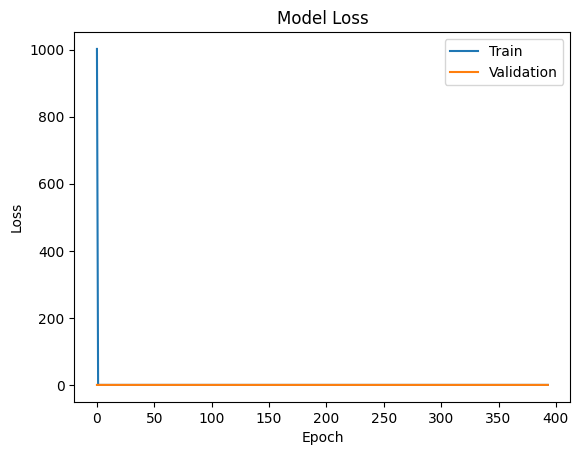

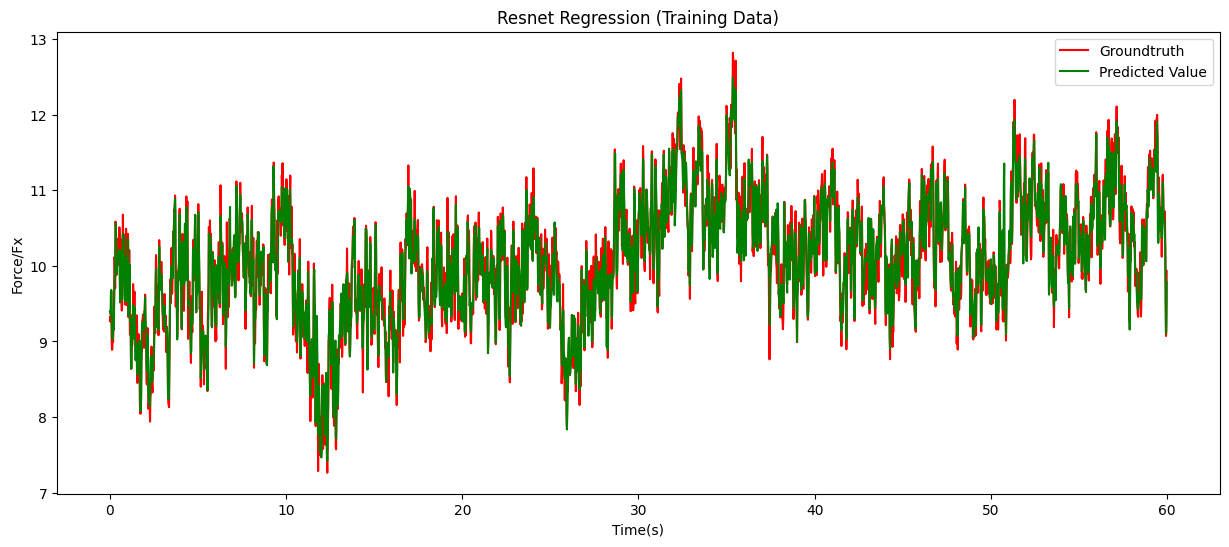

188/188 [==============================] - 3s 12ms/step


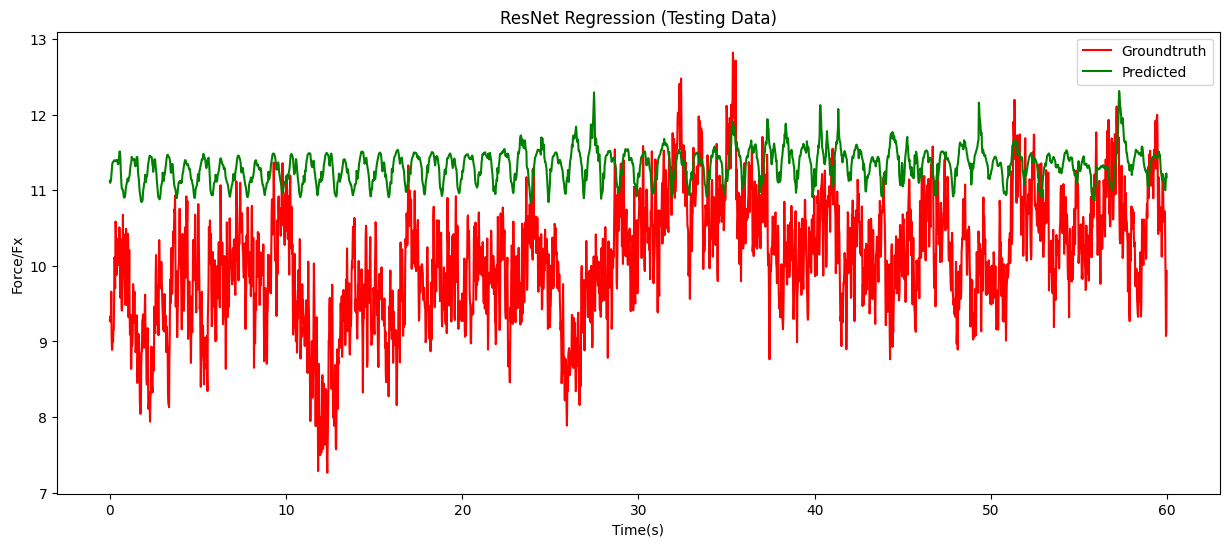

In [3]:
# import numpy as np
# import pandas as pd
# # import seaborn as sns
# from numpy import interp
# from itertools import cycle
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# from sklearn.metrics import mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score
# from sklearn.metrics import confusion_matrix, classification_report, auc
# from sklearn.metrics import precision_recall_curve
# from sklearn.metrics import average_precision_score
# from keras.layers import Input, Conv1D, MaxPooling1D, UpSampling1D, concatenate, BatchNormalization, Activation, add
# from keras.layers import Conv2D, MaxPooling2D, Reshape, Flatten, Dense
# from keras.models import Model, model_from_json
# from keras.optimizers import Adam, RMSprop
# # from tensorflow.keras.optimizers import AdamW
# from keras.callbacks import EarlyStopping, ModelCheckpoint
# from sklearn.preprocessing import Normalizer,MinMaxScaler,StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer
# # sns.set_theme(style="whitegrid")
# import pywt
# np.set_printoptions(suppress=True)
# # Import ResNet1D Module
# from ResNet_1DCNN import ResNet
# import tensorflow as tf
# import math
# from sklearn.metrics import mean_squared_error, r2_score

# columns = ['Fx']
# wavelet = 'db4'
# max_iter = 50
# iter = 0

# # Training Process
# Insole = pd.read_csv('0310AyuStand5Min1.txt', header=None, low_memory=False)
# SIData = np.asarray(Insole)

# df = pd.read_csv('0310AyuStand5Min1.csv', low_memory=False)
# selected_df = df[columns]
# FPDatas = selected_df[:]

# SmartInsole = np.array(SIData[:]).astype('float32')
# FPData = np.array(FPDatas).astype('float32')

# SmartInsole = SmartInsole[:13000]
# FPData = FPData[:13000]

# # Data Augmentation Techniques
# augmented_smart_insole_data = []

# # Technique 1: Flipping
# flipped_smart_insole_data = np.flip(SmartInsole, axis=1)
# augmented_smart_insole_data.append(flipped_smart_insole_data)

# # # Technique 2: Random Noise
# # noise_std = 0.05
# # noisy_smart_insole_data = SmartInsole + np.random.normal(loc=0.0, scale=noise_std, size=SmartInsole.shape)
# # augmented_smart_insole_data.append(noisy_smart_insole_data)

# # Technique 3: Scaling
# scaling_factor = 0.01
# scaled_smart_insole_data = SmartInsole * scaling_factor
# augmented_smart_insole_data.append(scaled_smart_insole_data)

# # Technique 4: Jitter
# jitter_std = 0.05
# jittered_smart_insole_data = SmartInsole + np.random.normal(loc=0.0, scale=jitter_std, size=SmartInsole.shape)
# augmented_smart_insole_data.append(jittered_smart_insole_data)

# # Technique 5: Window Warping
# window_width = 20
# warping_factor = 0.5
# warped_smart_insole_data = SmartInsole.copy()
# for i in range(warped_smart_insole_data.shape[0]):
#     window_start = np.random.randint(0, warped_smart_insole_data.shape[1] - window_width)
#     window_end = window_start + window_width
#     window = warped_smart_insole_data[i, window_start:window_end]
#     warped_window = np.interp(np.arange(window_width), np.arange(window_width) + np.random.uniform(-warping_factor, warping_factor), window)
#     warped_smart_insole_data[i, window_start:window_end] = warped_window
# augmented_smart_insole_data.append(warped_smart_insole_data)
# # augmented_smart_insole_data = np.array(augmented_smart_insole_data)
# # print(augmented_smart_insole_data.shape)

# # Technique 6: Window Slicing
# # Technique 6: Window Slicing
# window_width = 20
# sliced_smart_insole_data = []
# for i in range(SmartInsole.shape[0]):
#     for j in range(SmartInsole.shape[1] - window_width + 1):
#         window = SmartInsole[i, j:j+window_width]
#         sliced_smart_insole_data.append(window)
# augmented_smart_insole_data = np.array(augmented_smart_insole_data)
# print(augmented_smart_insole_data)


# # Combine original and augmented data
# augmented_smart_insole_data = np.concatenate((SmartInsole, *augmented_smart_insole_data), axis=0)

# # Adjust the target data to match the number of samples
# target_data = np.tile(FPData, (augmented_smart_insole_data.shape[0] // FPData.shape[0], 1))

# for i in range(len(augmented_smart_insole_data)):
#     augmented_smart_insole_data[i][0] = augmented_smart_insole_data[i][0] + (iter % max_iter) + 1
#     iter += 1

# # Scale the smart insole data
# minInsole = augmented_smart_insole_data.min()
# maxInsole = augmented_smart_insole_data.max()
# smart_insole_data_scaled = (augmented_smart_insole_data - minInsole) / (maxInsole - minInsole)

# # Scale the target data
# minForcePlate = target_data.min()
# maxForcePlate = target_data.max()
# target_data_scaled = (target_data - minForcePlate) / (maxForcePlate - minForcePlate)

# #Splitting Data
# sample_size = smart_insole_data_scaled.shape[0] # number of samples in train set
# time_steps  = smart_insole_data_scaled.shape[1] # number of features in train set
# input_dimension = 1               # each feature is represented by 1 number

# train_data_reshaped = smart_insole_data_scaled.reshape(sample_size, time_steps, input_dimension)

# X_train, X_test, y_train, y_test = train_test_split(train_data_reshaped, target_data_scaled, 
#                                                     test_size=0.20, random_state=2)

                                                    
# print(X_train.shape, X_test.shape)
# print(y_train.shape, y_test.shape)

# # Configurations for ResNet in Regression Mode
# length = X_train.shape[1]   # Number of Features (or length of the signal)
# model_width = 64           # Number of Filter or Kernel in the Input Layer
# num_channel = 1             # Number of Input Channels
# problem_type = 'Regression' # Regression or Classification
# output_number = 1           # Number of Outputs in the Regression Mode

# Regression_Model = ResNet(length, num_channel, model_width, problem_type=problem_type, 
#                           output_nums=output_number).ResNet50()
# Regression_Model.compile(loss='mse', optimizer=Adam(learning_rate=0.0001), metrics=['mse']) # Compile Model

# Regression_Model.summary()

# callbacks = [EarlyStopping(monitor='val_loss', patience=30, mode='min'), 
#              ModelCheckpoint('Saved_Model.h5', verbose=1, monitor='val_loss', save_best_only=True, mode='min')]
# history = Regression_Model.fit(X_train, y_train, epochs=500, batch_size=32, verbose=1, 
#                                validation_split=0.2, shuffle=True, callbacks=callbacks)

# plt.figure()
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model Loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper right')
# plt.savefig('Loss_Result.png')

# # Evaluate Model
# Regression_Model.evaluate(train_data_reshaped, target_data_scaled)
# ypred = Regression_Model.predict(train_data_reshaped)

# print('MSE: ', mean_squared_error(target_data_scaled, ypred))
# print('RMSE: ', math.sqrt(mean_squared_error(target_data_scaled, ypred)))
# print('Coefficient of determination (r2 Score): ', r2_score(target_data_scaled, ypred))

# # Inverse transform the predictions and actual values
# y_pred = (ypred * (maxForcePlate - minForcePlate)) + minForcePlate
# y_real = (target_data_scaled * (maxForcePlate - minForcePlate)) + minForcePlate

# print('MSE: ', mean_squared_error(y_real, y_pred))
# print('RMSE: ', math.sqrt(mean_squared_error(y_real, y_pred)))
# print('Coefficient of determination (r2 Score): ', r2_score(y_real, y_pred))

# x = np.arange(0, 3000) * 60 / 3000 
# for i in range(0, 1):
#     plt.figure(figsize=(15, 6))
#     plt.plot(x, y_real[0:3000, i], color='red')
#     plt.plot(x, y_pred[0:3000, i], markerfacecolor='none', color='green')
#     plt.title('Resnet Regression (Training Data)')
#     if i < 3:
#         plt.ylabel('Force/' + columns[i])
#     else:
#         plt.ylabel('Moment/' + columns[i])
#     plt.xlabel('Time(s)')
#     plt.legend(['Groundtruth', 'Predicted Value'], loc='best')
#     plt.show()

# tf.keras.models.save_model(Regression_Model, '1ouput.h5')
# #End Training Process

# # Load Model to Predict Real Data
# modelCoy = tf.keras.models.load_model('1ouput.h5')

# Test_Insole = pd.read_csv('0310AyuStand5Min2.txt', header=None, low_memory=False)
# TestSIData = np.asarray(Test_Insole)

# Test_df = pd.read_csv('0310AyuStand5Min1.csv', low_memory=False)
# Test_selected_df = Test_df[columns]
# Test_FPDatas = Test_selected_df[:6000]

# Test_SmartInsole = np.array(TestSIData[:6000]).astype('float32')
# Test_FPData = np.array(Test_FPDatas).astype('float32')

# for i in range(len(Test_SmartInsole)):
#     Test_SmartInsole[i][0] = Test_SmartInsole[i][0] + (iter % max_iter) + 1
#     iter += 1

# Test_smart_insole_data_scaled = (Test_SmartInsole - minInsole) / (maxInsole - minInsole)
# Test_force_plate_data_scaled = (Test_FPData - minForcePlate) / (maxForcePlate - minForcePlate)

# Test_sample_size = Test_smart_insole_data_scaled.shape[0]
# Test_time_steps = Test_smart_insole_data_scaled.shape[1]
# Test_input_dimension = 1

# Test_train_data_reshaped = Test_smart_insole_data_scaled.reshape(Test_sample_size, Test_time_steps, Test_input_dimension)

# modelCoy.evaluate(Test_train_data_reshaped, Test_force_plate_data_scaled)
# Test_Pred = modelCoy.predict(Test_train_data_reshaped)

# predictions = (Test_Pred * (maxForcePlate - minForcePlate)) + minForcePlate
# Real = (Test_force_plate_data_scaled * (maxForcePlate - minForcePlate)) + minForcePlate

# x = np.arange(0, 3000) * 60 / 3000 
# for i in range(0, 1):
#     plt.figure(figsize=(15, 6))
#     plt.plot(x, Real[0:3000, i], color='red')
#     plt.plot(x, predictions[0:3000, i], markerfacecolor='none', color='green')
#     plt.title('ResNet Regression (Testing Data)')
#     if i < 3:
#         plt.ylabel('Force/' + columns[i])
#     else:
#         plt.ylabel('Moment/' + columns[i])
#     plt.xlabel('Time(s)')
#     plt.legend(['Groundtruth', 'Predicted'], loc='best')
#     plt.show()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 89, 1)]      0           []                               
                                                                                                  
 conv1d_177 (Conv1D)            (None, 45, 64)       512         ['input_8[0][0]']                
                                                                                                  
 activation_228 (Activation)    (None, 45, 64)       0           ['conv1d_177[0][0]']             
                                                                                                  
 max_pooling1d_7 (MaxPooling1D)  (None, 22, 64)      0           ['activation_228[0][0]']         
                                                                                            

                                                                                                  
 conv1d_190 (Conv1D)            (None, 11, 128)      49280       ['activation_245[0][0]']         
                                                                                                  
 activation_246 (Activation)    (None, 11, 128)      0           ['conv1d_190[0][0]']             
                                                                                                  
 conv1d_191 (Conv1D)            (None, 11, 128)      49280       ['activation_246[0][0]']         
                                                                                                  
 activation_247 (Activation)    (None, 11, 128)      0           ['conv1d_191[0][0]']             
                                                                                                  
 add_56 (Add)                   (None, 11, 128)      0           ['activation_247[0][0]',         
          

                                                                  'activation_262[0][0]']         
                                                                                                  
 activation_265 (Activation)    (None, 6, 256)       0           ['add_61[0][0]']                 
                                                                                                  
 conv1d_204 (Conv1D)            (None, 3, 512)       393728      ['activation_265[0][0]']         
                                                                                                  
 activation_266 (Activation)    (None, 3, 512)       0           ['conv1d_204[0][0]']             
                                                                                                  
 conv1d_205 (Conv1D)            (None, 3, 512)       786944      ['activation_266[0][0]']         
                                                                                                  
 activatio

Epoch 26/500
390/390 [==============================] - 9s 23ms/step - loss: 0.0244 - mse: 0.0244 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 27/500
390/390 [==============================] - 9s 23ms/step - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0094 - val_mse: 0.0094
Epoch 28/500
390/390 [==============================] - 9s 23ms/step - loss: 0.0205 - mse: 0.0205 - val_loss: 0.0093 - val_mse: 0.0093
Epoch 29/500
390/390 [==============================] - 9s 23ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 30/500
390/390 [==============================] - 9s 23ms/step - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0325 - val_mse: 0.0325
Epoch 31/500
390/390 [==============================] - 9s 23ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 32/500
390/390 [==============================] - 9s 23ms/step - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0089 - val_mse: 0.0089
Epoch 33/500
390/390 [==============================] -

Epoch 87/500
390/390 [==============================] - 9s 23ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 88/500
390/390 [==============================] - 9s 23ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 89/500
390/390 [==============================] - 9s 23ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 90/500
390/390 [==============================] - 9s 23ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 91/500
390/390 [==============================] - 9s 23ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 92/500
390/390 [==============================] - 9s 23ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 93/500
390/390 [==============================] - 9s 23ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 94/500
390/390 [==============================] -

390/390 [==============================] - 9s 23ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 208/500
390/390 [==============================] - 9s 23ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 209/500
390/390 [==============================] - 9s 23ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 210/500
390/390 [==============================] - 9s 23ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 211/500
390/390 [==============================] - 9s 23ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 212/500
390/390 [==============================] - 9s 23ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 213/500
390/390 [==============================] - 9s 23ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 214/500
390/390 [==============================] - 9s 23

390/390 [==============================] - 9s 23ms/step - loss: 9.2859e-04 - mse: 9.2859e-04 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 327/500
390/390 [==============================] - 9s 23ms/step - loss: 9.6650e-04 - mse: 9.6650e-04 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 328/500
390/390 [==============================] - 9s 23ms/step - loss: 9.5872e-04 - mse: 9.5872e-04 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 329/500
390/390 [==============================] - 9s 23ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 330/500
390/390 [==============================] - 9s 23ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 331/500
390/390 [==============================] - 9s 23ms/step - loss: 8.9249e-04 - mse: 8.9249e-04 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 332/500
390/390 [==============================] - 9s 23ms/step - loss: 8.7831e-04 - mse: 8.7831e-04 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 333/500
390/390 

390/390 [==============================] - 9s 23ms/step - loss: 5.8219e-04 - mse: 5.8219e-04 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 441/500
390/390 [==============================] - 9s 23ms/step - loss: 6.1347e-04 - mse: 6.1347e-04 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 442/500
390/390 [==============================] - 9s 23ms/step - loss: 6.1964e-04 - mse: 6.1964e-04 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 443/500
390/390 [==============================] - 9s 23ms/step - loss: 5.7906e-04 - mse: 5.7906e-04 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 444/500
390/390 [==============================] - 9s 23ms/step - loss: 6.1081e-04 - mse: 6.1081e-04 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 445/500
390/390 [==============================] - 9s 23ms/step - loss: 5.7650e-04 - mse: 5.7650e-04 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 446/500
390/390 [==============================] - 9s 23ms/step - loss: 7.6351e-04 - mse: 7.6351e-04 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 

Epoch 497/500
390/390 [==============================] - 9s 23ms/step - loss: 5.5038e-04 - mse: 5.5038e-04 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 498/500
390/390 [==============================] - 9s 23ms/step - loss: 5.9968e-04 - mse: 5.9968e-04 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 499/500
390/390 [==============================] - 9s 23ms/step - loss: 8.0591e-04 - mse: 8.0591e-04 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 500/500
1219/1219 [==============================] - 8s 7ms/step
MSE:  0.001378131563293446
RMSE:  0.03712319441122283
Coefficient of determination (r2 Score):  0.9474556154931659
MSE:  0.07687941194735258
RMSE:  0.2772713687839994
Coefficient of determination (r2 Score):  0.9474556152546494


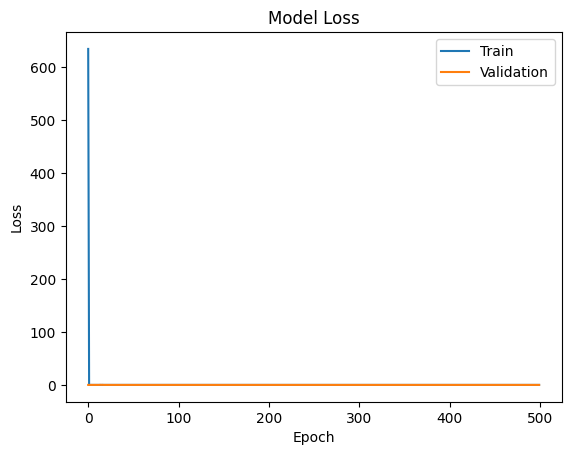

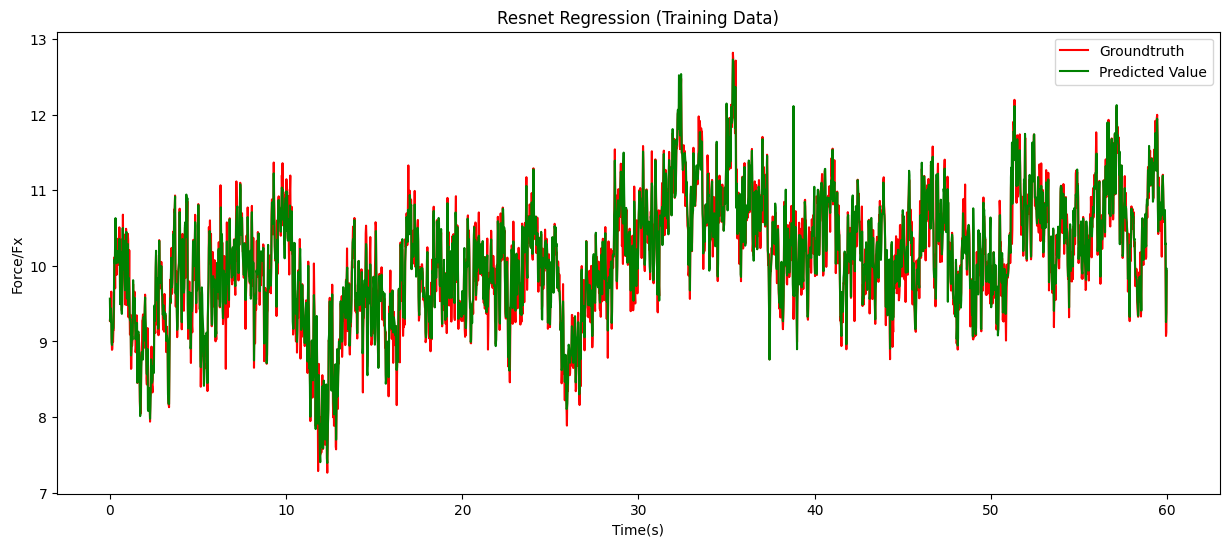

188/188 [==============================] - 1s 7ms/step


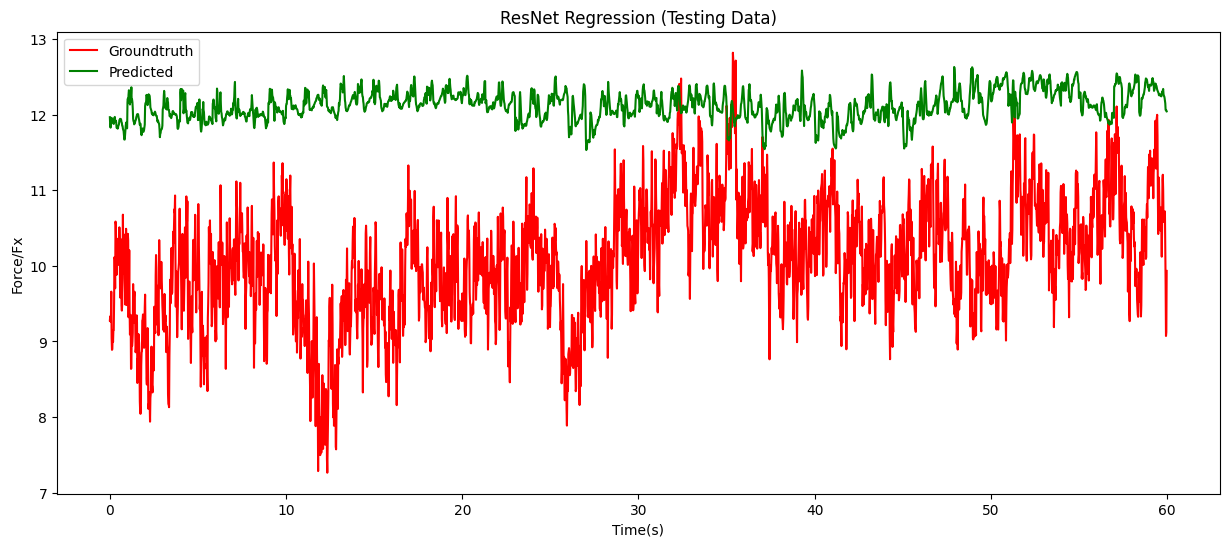

In [21]:
import numpy as np
import pandas as pd
# import seaborn as sns
from numpy import interp
from itertools import cycle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from keras.layers import Input, Conv1D, MaxPooling1D, UpSampling1D, concatenate, BatchNormalization, Activation, add
from keras.layers import Conv2D, MaxPooling2D, Reshape, Flatten, Dense
from keras.models import Model, model_from_json
from keras.optimizers import Adam, RMSprop
# from tensorflow.keras.optimizers import AdamW
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import Normalizer,MinMaxScaler,StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer
# sns.set_theme(style="whitegrid")
import pywt
np.set_printoptions(suppress=True)
# Import ResNet1D Module
from ResNet_1DCNN import ResNet
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error, r2_score

columns = ['Fx']
wavelet = 'db4'
max_iter = 50
iter = 0

# Training Process
Insole = pd.read_csv('0310AyuStand5Min1.txt', header=None, low_memory=False)
SIData = np.asarray(Insole)

df = pd.read_csv('0310AyuStand5Min1.csv', low_memory=False)
selected_df = df[columns]
FPDatas = selected_df[:]

SmartInsole = np.array(SIData[:]).astype('float32')
FPData = np.array(FPDatas).astype('float32')

SmartInsole = SmartInsole[:13000]
FPData = FPData[:13000]

# Data Augmentation Techniques
augmented_smart_insole_data = []
augmented_force_plate_data = []

# Jitter technique
jitter_std = 0.05
jittered_smart_insole_data = SmartInsole + np.random.normal(loc=0.0, scale=jitter_std, size=SmartInsole.shape)
jittered_force_plate_data = FPData + np.random.normal(loc=0.0, scale=jitter_std, size=FPData.shape)
augmented_smart_insole_data.append(jittered_smart_insole_data)
augmented_force_plate_data.append(jittered_force_plate_data)

# Permutation technique
num_segments = np.random.randint(2, 5)  # Generate a random number of segments (2 to 5)
segment_size = SmartInsole.shape[0] // num_segments

permutated_smart_insole_data = np.empty_like(SmartInsole)
permutated_force_plate_data = np.empty_like(FPData)

for i in range(num_segments):
    start_index = i * segment_size
    end_index = (i + 1) * segment_size
    segment_indices = np.random.permutation(segment_size) + start_index
    permutated_smart_insole_data[start_index:end_index] = SmartInsole[segment_indices]
    permutated_force_plate_data[start_index:end_index] = FPData[segment_indices]

augmented_smart_insole_data.append(permutated_smart_insole_data)
augmented_force_plate_data.append(permutated_force_plate_data)

# Combine original and augmented data
augmented_smart_insole_data = np.concatenate((SmartInsole, *augmented_smart_insole_data), axis=0)
augmented_force_plate_data = np.concatenate((FPData, *augmented_force_plate_data), axis=0)

for i in range(len(augmented_smart_insole_data)):
    augmented_smart_insole_data[i][0] = augmented_smart_insole_data[i][0] + (iter % max_iter) + 1
    iter += 1

# Scale the smart insole data
minInsole = augmented_smart_insole_data.min()
maxInsole = augmented_smart_insole_data.max()
smart_insole_data_scaled = (augmented_smart_insole_data - minInsole) / (maxInsole - minInsole)

# Scale the force plate data
minForcePlate = augmented_force_plate_data.min()
maxForcePlate = augmented_force_plate_data.max()
force_plate_data_scaled = (augmented_force_plate_data - minForcePlate) / (maxForcePlate - minForcePlate)

# Splitting Data
sample_size = smart_insole_data_scaled.shape[0]  # number of samples in train set
time_steps = smart_insole_data_scaled.shape[1]  # number of features in train set
input_dimension = 1  # each feature is represented by 1 number

train_data_reshaped = smart_insole_data_scaled.reshape(sample_size, time_steps, input_dimension)
train_labels_reshaped = force_plate_data_scaled.reshape(sample_size, 1)

X_train, X_test, y_train, y_test = train_test_split(train_data_reshaped, train_labels_reshaped,
                                                    test_size=0.20, random_state=2)

# Apply moving average filter to reduce noise in label data
window_size = 1  # Adjust the window size as per your requirements

def moving_average_filter(data, window_size):
    # Pad the data to handle edge cases
    padded_data = np.pad(data, (window_size//2, window_size//2), mode='edge')
    filtered_data = np.convolve(padded_data, np.ones(window_size)/window_size, mode='valid')
    return filtered_data

# Apply moving average filter to training labels
filtered_train_labels = np.apply_along_axis(moving_average_filter, axis=0, arr=y_train, window_size=window_size)

# Apply moving average filter to test labels
filtered_test_labels = np.apply_along_axis(moving_average_filter, axis=0, arr=y_test, window_size=window_size)

# Configurations for ResNet in Regression Mode
length = X_train.shape[1]   # Number of Features (or length of the signal)
model_width = 64           # Number of Filter or Kernel in the Input Layer
num_channel = 1             # Number of Input Channels
problem_type = 'Regression' # Regression or Classification
output_number = 1           # Number of Outputs in the Regression Mode

Regression_Model = ResNet(length, num_channel, model_width, problem_type=problem_type, 
                          output_nums=output_number).ResNet34()
Regression_Model.compile(loss='mse', optimizer=Adam(learning_rate=0.0001), metrics=['mse']) # Compile Model

Regression_Model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=30, mode='min'), 
             ModelCheckpoint('Saved_Model.h5', verbose=1, monitor='val_loss', save_best_only=True, mode='min')]
history = Regression_Model.fit(X_train, filtered_train_labels, epochs=500, batch_size=64, verbose=1, 
                               validation_split=0.2, shuffle=True)

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.savefig('Loss_Result.png')

# Evaluate Model
Regression_Model.evaluate(train_data_reshaped, train_labels_reshaped)
ypred = Regression_Model.predict(train_data_reshaped)

print('MSE: ', mean_squared_error(train_labels_reshaped, ypred))
print('RMSE: ', math.sqrt(mean_squared_error(train_labels_reshaped, ypred)))
print('Coefficient of determination (r2 Score): ', r2_score(train_labels_reshaped, ypred))

# Inverse transform the predictions and actual values
y_pred = (ypred * (maxForcePlate - minForcePlate)) + minForcePlate
y_real = (train_labels_reshaped * (maxForcePlate - minForcePlate)) + minForcePlate

print('MSE: ', mean_squared_error(y_real, y_pred))
print('RMSE: ', math.sqrt(mean_squared_error(y_real, y_pred)))
print('Coefficient of determination (r2 Score): ', r2_score(y_real, y_pred))

x = np.arange(0, 3000) * 60 / 3000 
for i in range(0, 1):
    plt.figure(figsize=(15, 6))
    plt.plot(x, y_real[0:3000, i], color='red')
    plt.plot(x, y_pred[0:3000, i], markerfacecolor='none', color='green')
    plt.title('Resnet Regression (Training Data)')
    if i < 3:
        plt.ylabel('Force/' + columns[i])
    else:
        plt.ylabel('Moment/' + columns[i])
    plt.xlabel('Time(s)')
    plt.legend(['Groundtruth', 'Predicted Value'], loc='best')
    plt.show()

tf.keras.models.save_model(Regression_Model, '1ouput.h5')
#End Training Process

# Load Model to Predict Real Data
modelCoy = tf.keras.models.load_model('1ouput.h5')

Test_Insole = pd.read_csv('0310AyuStand5Min2.txt', header=None, low_memory=False)
TestSIData = np.asarray(Test_Insole)

Test_df = pd.read_csv('0310AyuStand5Min1.csv', low_memory=False)
Test_selected_df = Test_df[columns]
Test_FPDatas = Test_selected_df[:6000]

Test_SmartInsole = np.array(TestSIData[:6000]).astype('float32')
Test_FPData = np.array(Test_FPDatas).astype('float32')

for i in range(len(Test_SmartInsole)):
    Test_SmartInsole[i][0] = Test_SmartInsole[i][0] + (iter % max_iter) + 1
    iter += 1

Test_smart_insole_data_scaled = (Test_SmartInsole - minInsole) / (maxInsole - minInsole)
Test_force_plate_data_scaled = (Test_FPData - minForcePlate) / (maxForcePlate - minForcePlate)

Test_sample_size = Test_smart_insole_data_scaled.shape[0]
Test_time_steps = Test_smart_insole_data_scaled.shape[1]
Test_input_dimension = 1

Test_train_data_reshaped = Test_smart_insole_data_scaled.reshape(Test_sample_size, Test_time_steps, Test_input_dimension)

modelCoy.evaluate(Test_train_data_reshaped, Test_force_plate_data_scaled)
Test_Pred = modelCoy.predict(Test_train_data_reshaped)

predictions = (Test_Pred * (maxForcePlate - minForcePlate)) + minForcePlate
Real = (Test_force_plate_data_scaled * (maxForcePlate - minForcePlate)) + minForcePlate

x = np.arange(0, 3000) * 60 / 3000 
for i in range(0, 1):
    plt.figure(figsize=(15, 6))
    plt.plot(x, Real[0:3000, i], color='red')
    plt.plot(x, predictions[0:3000, i], markerfacecolor='none', color='green')
    plt.title('ResNet Regression (Testing Data)')
    if i < 3:
        plt.ylabel('Force/' + columns[i])
    else:
        plt.ylabel('Moment/' + columns[i])
    plt.xlabel('Time(s)')
    plt.legend(['Groundtruth', 'Predicted'], loc='best')
    plt.show()


63/63 [==============================] - 0s 7ms/step


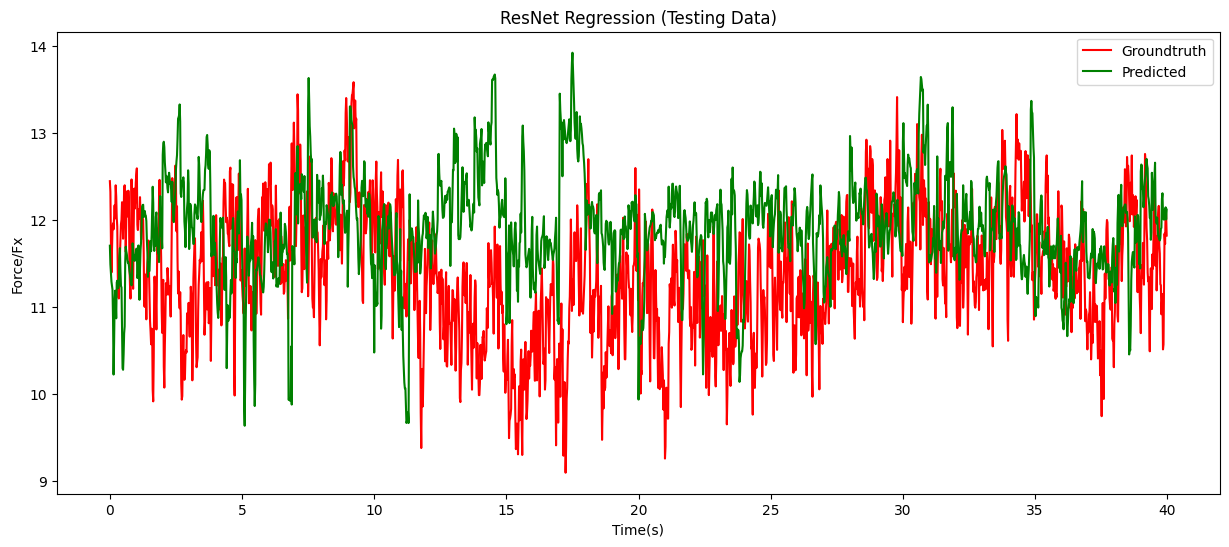

In [22]:
# Load Model to Predict Real Data
Test_Insole = pd.read_csv('0310AyuStand5Min1.txt', header=None, low_memory=False)
TestSIData =  np.asarray(Test_Insole)

Test_df = pd.read_csv('0310AyuStand5Min1.csv', low_memory=False)
Test_selected_df = Test_df[columns]
Test_FPDatas = Test_selected_df[13000:]

Test_SmartInsole = np.array(TestSIData[13000:]).astype('float32')
Test_FPData = np.array(Test_FPDatas).astype('float32')

for i in range(len(Test_SmartInsole)):
    Test_SmartInsole[i][0] = Test_SmartInsole[i][0] + (iter % max_iter) + 1
    iter += 1

Test_smart_insole_data_scaled = (Test_SmartInsole - minInsole) / ( maxInsole - minInsole )
Test_force_plate_data_scaled = (Test_FPData - minForcePlate) / ( maxForcePlate - minForcePlate )

Test_sample_size = Test_smart_insole_data_scaled.shape[0]
Test_time_steps  = Test_smart_insole_data_scaled.shape[1]
Test_input_dimension = 1

Test_train_data_reshaped = Test_smart_insole_data_scaled.reshape(Test_sample_size,Test_time_steps,Test_input_dimension)

modelCoy.evaluate(Test_train_data_reshaped, Test_force_plate_data_scaled)
Test_Pred = modelCoy.predict(Test_train_data_reshaped)

predictions = (Test_Pred * (maxForcePlate - minForcePlate)) + minForcePlate
Real = (Test_force_plate_data_scaled * (maxForcePlate - minForcePlate)) + minForcePlate

x=[]
x = np.arange(0,2000)*40/2000 
for i in range(0,1):
    plt.figure(figsize=(15,6))
    # plt.figure()
    plt.plot(x,Real[0:2000,i],color='red')
    plt.plot(x,predictions[0:2000,i], markerfacecolor='none',color='green')
    plt.title('ResNet Regression (Testing Data)')
    if i < 3:
      plt.ylabel('Force/'+columns[i])
    else:
      plt.ylabel('Moment/'+columns[i])
    plt.xlabel('Time(s)')
    plt.legend(['Groundtruth', 'Predicted'], loc='best')
    plt.show()
    
# please help me make normalization process manualy dont use the sickit-learn on this process

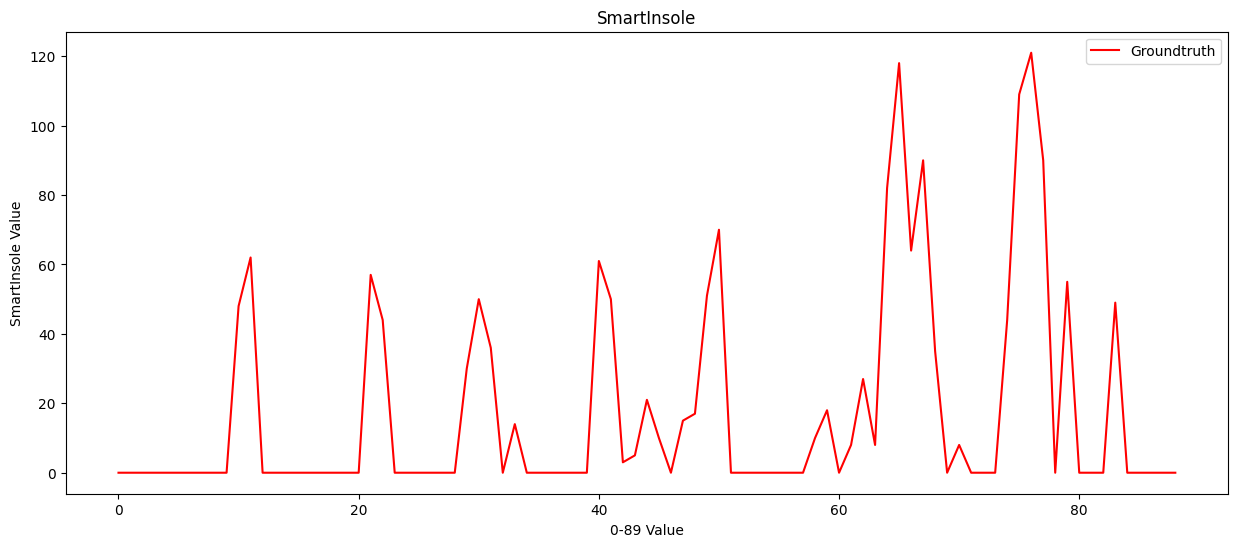

In [7]:
x=[]
x = np.arange(0,89)
for i in range(0,1):
    plt.figure(figsize=(15,6))
    # plt.figure()
    plt.plot(x,SmartInsole[1],color='red')
#     plt.plot(x,predictions[0:2000,i], markerfacecolor='none',color='green')
    plt.title('SmartInsole')
    plt.ylabel('SmartInsole Value')
    plt.xlabel('0-89 Value')
    plt.legend(['Groundtruth', 'Predicted'], loc='best')
    plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_35240\2451081116.py:139: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  regressor = KerasRegressor(build_fn=create_model, verbose=1)


Epoch 1/100
867/867 - 8s - loss: 2.0286e-04 - mse: 2.0286e-04 - 8s/epoch - 9ms/step
Epoch 2/100
867/867 - 6s - loss: 3.3702e-05 - mse: 3.3702e-05 - 6s/epoch - 7ms/step
Epoch 3/100
867/867 - 6s - loss: 2.9915e-05 - mse: 2.9915e-05 - 6s/epoch - 7ms/step
Epoch 4/100
867/867 - 6s - loss: 2.2414e-05 - mse: 2.2414e-05 - 6s/epoch - 7ms/step
Epoch 5/100
867/867 - 6s - loss: 9.5578e-06 - mse: 9.5578e-06 - 6s/epoch - 7ms/step
Epoch 6/100
867/867 - 6s - loss: 1.2056e-05 - mse: 1.2056e-05 - 6s/epoch - 7ms/step
Epoch 7/100
867/867 - 6s - loss: 2.9383e-05 - mse: 2.9383e-05 - 6s/epoch - 7ms/step
Epoch 8/100
867/867 - 6s - loss: 1.5557e-05 - mse: 1.5557e-05 - 6s/epoch - 7ms/step
Epoch 9/100
867/867 - 6s - loss: 4.3560e-07 - mse: 4.3560e-07 - 6s/epoch - 7ms/step
Epoch 10/100
867/867 - 6s - loss: 5.0393e-06 - mse: 5.0393e-06 - 6s/epoch - 7ms/step
Epoch 11/100
867/867 - 6s - loss: 4.4110e-05 - mse: 4.4110e-05 - 6s/epoch - 7ms/step
Epoch 12/100
867/867 - 6s - loss: 2.5303e-05 - mse: 2.5303e-05 - 6s/epoch 

Epoch 98/100
867/867 - 6s - loss: 6.8599e-07 - mse: 6.8599e-07 - 6s/epoch - 7ms/step
Epoch 99/100
867/867 - 6s - loss: 2.1765e-06 - mse: 2.1765e-06 - 6s/epoch - 7ms/step
Epoch 100/100
867/867 - 6s - loss: 2.1683e-06 - mse: 2.1683e-06 - 6s/epoch - 7ms/step
434/434 [==============================] - 1s 3ms/step
Epoch 1/100
867/867 - 8s - loss: 2.6738e-04 - mse: 2.6738e-04 - 8s/epoch - 9ms/step
Epoch 2/100
867/867 - 6s - loss: 3.0227e-06 - mse: 3.0227e-06 - 6s/epoch - 7ms/step
Epoch 3/100
867/867 - 6s - loss: 1.0941e-05 - mse: 1.0941e-05 - 6s/epoch - 7ms/step
Epoch 4/100
867/867 - 6s - loss: 7.8069e-06 - mse: 7.8069e-06 - 6s/epoch - 7ms/step
Epoch 5/100
867/867 - 6s - loss: 1.2572e-05 - mse: 1.2572e-05 - 6s/epoch - 7ms/step
Epoch 6/100
867/867 - 6s - loss: 3.6478e-06 - mse: 3.6478e-06 - 6s/epoch - 7ms/step
Epoch 7/100
867/867 - 6s - loss: 3.2013e-06 - mse: 3.2013e-06 - 6s/epoch - 7ms/step
Epoch 8/100
867/867 - 6s - loss: 3.1530e-06 - mse: 3.1530e-06 - 6s/epoch - 7ms/step
Epoch 9/100
867/8

Epoch 94/100
867/867 - 6s - loss: 2.0886e-09 - mse: 2.0886e-09 - 6s/epoch - 7ms/step
Epoch 95/100
867/867 - 6s - loss: 1.9112e-09 - mse: 1.9112e-09 - 6s/epoch - 7ms/step
Epoch 96/100
867/867 - 6s - loss: 1.9669e-09 - mse: 1.9669e-09 - 6s/epoch - 7ms/step
Epoch 97/100
867/867 - 6s - loss: 1.9736e-09 - mse: 1.9736e-09 - 6s/epoch - 7ms/step
Epoch 98/100
867/867 - 6s - loss: 2.0160e-09 - mse: 2.0160e-09 - 6s/epoch - 7ms/step
Epoch 99/100
867/867 - 6s - loss: 1.7691e-09 - mse: 1.7691e-09 - 6s/epoch - 7ms/step
Epoch 100/100
867/867 - 6s - loss: 1.9693e-09 - mse: 1.9693e-09 - 6s/epoch - 7ms/step
434/434 [==============================] - 1s 3ms/step
Epoch 1/100
867/867 - 8s - loss: 3.7061e-04 - mse: 3.7061e-04 - 8s/epoch - 9ms/step
Epoch 2/100
867/867 - 6s - loss: 3.6179e-05 - mse: 3.6179e-05 - 6s/epoch - 7ms/step
Epoch 3/100
867/867 - 6s - loss: 3.4726e-05 - mse: 3.4726e-05 - 6s/epoch - 7ms/step
Epoch 4/100
867/867 - 6s - loss: 3.3635e-05 - mse: 3.3635e-05 - 6s/epoch - 7ms/step
Epoch 5/100
8

Epoch 90/100
867/867 - 6s - loss: 9.1959e-07 - mse: 9.1959e-07 - 6s/epoch - 7ms/step
Epoch 91/100
867/867 - 6s - loss: 2.0054e-06 - mse: 2.0054e-06 - 6s/epoch - 7ms/step
Epoch 92/100
867/867 - 6s - loss: 2.6805e-07 - mse: 2.6805e-07 - 6s/epoch - 7ms/step
Epoch 93/100
867/867 - 6s - loss: 5.8858e-07 - mse: 5.8858e-07 - 6s/epoch - 7ms/step
Epoch 94/100
867/867 - 6s - loss: 1.2265e-06 - mse: 1.2265e-06 - 6s/epoch - 7ms/step
Epoch 95/100
867/867 - 6s - loss: 1.7225e-06 - mse: 1.7225e-06 - 6s/epoch - 7ms/step
Epoch 96/100
867/867 - 6s - loss: 1.5914e-07 - mse: 1.5914e-07 - 6s/epoch - 7ms/step
Epoch 97/100
867/867 - 6s - loss: 4.2160e-07 - mse: 4.2160e-07 - 6s/epoch - 7ms/step
Epoch 98/100
867/867 - 6s - loss: 9.6171e-07 - mse: 9.6171e-07 - 6s/epoch - 7ms/step
Epoch 99/100
867/867 - 6s - loss: 1.6698e-06 - mse: 1.6698e-06 - 6s/epoch - 7ms/step
Epoch 100/100
867/867 - 6s - loss: 1.9157e-07 - mse: 1.9157e-07 - 6s/epoch - 7ms/step
434/434 [==============================] - 1s 3ms/step
Epoch 1/1

Epoch 86/100
867/867 - 7s - loss: 9.7583e-07 - mse: 9.7583e-07 - 7s/epoch - 8ms/step
Epoch 87/100
867/867 - 7s - loss: 1.5130e-07 - mse: 1.5130e-07 - 7s/epoch - 8ms/step
Epoch 88/100
867/867 - 7s - loss: 8.0778e-07 - mse: 8.0778e-07 - 7s/epoch - 8ms/step
Epoch 89/100
867/867 - 7s - loss: 9.5340e-07 - mse: 9.5340e-07 - 7s/epoch - 8ms/step
Epoch 90/100
867/867 - 7s - loss: 1.2348e-06 - mse: 1.2348e-06 - 7s/epoch - 8ms/step
Epoch 91/100
867/867 - 7s - loss: 2.6797e-07 - mse: 2.6797e-07 - 7s/epoch - 8ms/step
Epoch 92/100
867/867 - 7s - loss: 5.1399e-07 - mse: 5.1399e-07 - 7s/epoch - 8ms/step
Epoch 93/100
867/867 - 7s - loss: 3.6204e-07 - mse: 3.6204e-07 - 7s/epoch - 8ms/step
Epoch 94/100
867/867 - 7s - loss: 7.6105e-07 - mse: 7.6105e-07 - 7s/epoch - 8ms/step
Epoch 95/100
867/867 - 7s - loss: 6.2732e-07 - mse: 6.2732e-07 - 7s/epoch - 8ms/step
Epoch 96/100
867/867 - 7s - loss: 1.1041e-06 - mse: 1.1041e-06 - 7s/epoch - 8ms/step
Epoch 97/100
867/867 - 7s - loss: 1.8389e-07 - mse: 1.8389e-07 - 

Epoch 82/100
867/867 - 7s - loss: 9.3744e-10 - mse: 9.3744e-10 - 7s/epoch - 8ms/step
Epoch 83/100
867/867 - 7s - loss: 1.2352e-09 - mse: 1.2352e-09 - 7s/epoch - 8ms/step
Epoch 84/100
867/867 - 7s - loss: 5.6934e-10 - mse: 5.6934e-10 - 7s/epoch - 8ms/step
Epoch 85/100
867/867 - 7s - loss: 7.3482e-10 - mse: 7.3482e-10 - 7s/epoch - 8ms/step
Epoch 86/100
867/867 - 7s - loss: 7.2536e-10 - mse: 7.2536e-10 - 7s/epoch - 8ms/step
Epoch 87/100
867/867 - 7s - loss: 7.0598e-10 - mse: 7.0598e-10 - 7s/epoch - 8ms/step
Epoch 88/100
867/867 - 7s - loss: 7.1526e-10 - mse: 7.1526e-10 - 7s/epoch - 8ms/step
Epoch 89/100
867/867 - 7s - loss: 6.7319e-10 - mse: 6.7319e-10 - 7s/epoch - 8ms/step
Epoch 90/100
867/867 - 7s - loss: 6.5352e-10 - mse: 6.5352e-10 - 7s/epoch - 8ms/step
Epoch 91/100
867/867 - 7s - loss: 7.0305e-10 - mse: 7.0305e-10 - 7s/epoch - 8ms/step
Epoch 92/100
867/867 - 7s - loss: 6.2392e-10 - mse: 6.2392e-10 - 7s/epoch - 8ms/step
Epoch 93/100
867/867 - 7s - loss: 6.6557e-10 - mse: 6.6557e-10 - 

Epoch 78/100
867/867 - 7s - loss: 6.2004e-07 - mse: 6.2004e-07 - 7s/epoch - 8ms/step
Epoch 79/100
867/867 - 7s - loss: 1.3832e-06 - mse: 1.3832e-06 - 7s/epoch - 8ms/step
Epoch 80/100
867/867 - 7s - loss: 7.1268e-07 - mse: 7.1268e-07 - 7s/epoch - 8ms/step
Epoch 81/100
867/867 - 7s - loss: 1.0197e-06 - mse: 1.0197e-06 - 7s/epoch - 8ms/step
Epoch 82/100
867/867 - 7s - loss: 3.7490e-07 - mse: 3.7490e-07 - 7s/epoch - 8ms/step
Epoch 83/100
867/867 - 7s - loss: 8.6222e-07 - mse: 8.6222e-07 - 7s/epoch - 8ms/step
Epoch 84/100
867/867 - 7s - loss: 8.2409e-07 - mse: 8.2409e-07 - 7s/epoch - 8ms/step
Epoch 85/100
867/867 - 7s - loss: 1.1980e-06 - mse: 1.1980e-06 - 7s/epoch - 8ms/step
Epoch 86/100
867/867 - 7s - loss: 5.2228e-07 - mse: 5.2228e-07 - 7s/epoch - 9ms/step
Epoch 87/100
867/867 - 7s - loss: 8.0049e-07 - mse: 8.0049e-07 - 7s/epoch - 8ms/step
Epoch 88/100
867/867 - 7s - loss: 4.7713e-07 - mse: 4.7713e-07 - 7s/epoch - 8ms/step
Epoch 89/100
867/867 - 7s - loss: 7.6616e-07 - mse: 7.6616e-07 - 

Epoch 72/100
867/867 - 12s - loss: 1.4838e-08 - mse: 1.4838e-08 - 12s/epoch - 13ms/step
Epoch 73/100
867/867 - 11s - loss: 3.7831e-08 - mse: 3.7831e-08 - 11s/epoch - 13ms/step
Epoch 74/100
867/867 - 12s - loss: 3.1851e-07 - mse: 3.1851e-07 - 12s/epoch - 13ms/step
Epoch 75/100
867/867 - 11s - loss: 2.8975e-06 - mse: 2.8975e-06 - 11s/epoch - 13ms/step
Epoch 76/100
867/867 - 11s - loss: 1.3813e-06 - mse: 1.3813e-06 - 11s/epoch - 13ms/step
Epoch 77/100
867/867 - 11s - loss: 1.4525e-07 - mse: 1.4525e-07 - 11s/epoch - 13ms/step
Epoch 78/100
867/867 - 11s - loss: 3.7765e-07 - mse: 3.7765e-07 - 11s/epoch - 13ms/step
Epoch 79/100
867/867 - 12s - loss: 1.2114e-06 - mse: 1.2114e-06 - 12s/epoch - 13ms/step
Epoch 80/100
867/867 - 11s - loss: 1.6702e-06 - mse: 1.6702e-06 - 11s/epoch - 13ms/step
Epoch 81/100
867/867 - 11s - loss: 6.3714e-08 - mse: 6.3714e-08 - 11s/epoch - 13ms/step
Epoch 82/100
867/867 - 11s - loss: 1.4643e-07 - mse: 1.4643e-07 - 11s/epoch - 13ms/step
Epoch 83/100
867/867 - 11s - los

Epoch 65/100
867/867 - 11s - loss: 1.7875e-09 - mse: 1.7875e-09 - 11s/epoch - 13ms/step
Epoch 66/100
867/867 - 11s - loss: 1.8020e-09 - mse: 1.8020e-09 - 11s/epoch - 13ms/step
Epoch 67/100
867/867 - 11s - loss: 1.6696e-09 - mse: 1.6696e-09 - 11s/epoch - 13ms/step
Epoch 68/100
867/867 - 11s - loss: 1.8401e-09 - mse: 1.8401e-09 - 11s/epoch - 13ms/step
Epoch 69/100
867/867 - 11s - loss: 1.5188e-09 - mse: 1.5188e-09 - 11s/epoch - 13ms/step
Epoch 70/100
867/867 - 11s - loss: 1.6140e-09 - mse: 1.6140e-09 - 11s/epoch - 13ms/step
Epoch 71/100
867/867 - 11s - loss: 1.8036e-09 - mse: 1.8036e-09 - 11s/epoch - 13ms/step
Epoch 72/100
867/867 - 11s - loss: 1.5351e-09 - mse: 1.5351e-09 - 11s/epoch - 13ms/step
Epoch 73/100
867/867 - 11s - loss: 1.6150e-09 - mse: 1.6150e-09 - 11s/epoch - 13ms/step
Epoch 74/100
867/867 - 11s - loss: 1.4751e-09 - mse: 1.4751e-09 - 11s/epoch - 13ms/step
Epoch 75/100
867/867 - 11s - loss: 1.6263e-09 - mse: 1.6263e-09 - 11s/epoch - 13ms/step
Epoch 76/100
867/867 - 11s - los

Epoch 58/100
867/867 - 12s - loss: 2.7797e-06 - mse: 2.7797e-06 - 12s/epoch - 13ms/step
Epoch 59/100
867/867 - 11s - loss: 3.9108e-07 - mse: 3.9108e-07 - 11s/epoch - 13ms/step
Epoch 60/100
867/867 - 11s - loss: 1.2100e-06 - mse: 1.2100e-06 - 11s/epoch - 13ms/step
Epoch 61/100
867/867 - 11s - loss: 7.6048e-06 - mse: 7.6048e-06 - 11s/epoch - 13ms/step
Epoch 62/100
867/867 - 11s - loss: 3.2528e-06 - mse: 3.2528e-06 - 11s/epoch - 13ms/step
Epoch 63/100
867/867 - 11s - loss: 1.0766e-08 - mse: 1.0766e-08 - 11s/epoch - 13ms/step
Epoch 64/100
867/867 - 11s - loss: 5.4321e-08 - mse: 5.4321e-08 - 11s/epoch - 13ms/step
Epoch 65/100
867/867 - 11s - loss: 3.4917e-07 - mse: 3.4917e-07 - 11s/epoch - 13ms/step
Epoch 66/100
867/867 - 11s - loss: 2.7588e-06 - mse: 2.7588e-06 - 11s/epoch - 13ms/step
Epoch 67/100
867/867 - 11s - loss: 2.4621e-06 - mse: 2.4621e-06 - 11s/epoch - 13ms/step
Epoch 68/100
867/867 - 11s - loss: 1.3634e-08 - mse: 1.3634e-08 - 11s/epoch - 13ms/step
Epoch 69/100
867/867 - 11s - los

Epoch 53/300
867/867 - 6s - loss: 2.5962e-06 - mse: 2.5962e-06 - 6s/epoch - 7ms/step
Epoch 54/300
867/867 - 6s - loss: 6.7826e-06 - mse: 6.7826e-06 - 6s/epoch - 7ms/step
Epoch 55/300
867/867 - 6s - loss: 4.8012e-06 - mse: 4.8012e-06 - 6s/epoch - 7ms/step
Epoch 56/300
867/867 - 6s - loss: 3.1934e-07 - mse: 3.1934e-07 - 6s/epoch - 7ms/step
Epoch 57/300
867/867 - 6s - loss: 5.8686e-07 - mse: 5.8686e-07 - 6s/epoch - 7ms/step
Epoch 58/300
867/867 - 6s - loss: 3.1652e-06 - mse: 3.1652e-06 - 6s/epoch - 7ms/step
Epoch 59/300
867/867 - 6s - loss: 2.9492e-06 - mse: 2.9492e-06 - 6s/epoch - 7ms/step
Epoch 60/300
867/867 - 6s - loss: 4.3854e-06 - mse: 4.3854e-06 - 6s/epoch - 7ms/step
Epoch 61/300
867/867 - 6s - loss: 3.5381e-07 - mse: 3.5381e-07 - 6s/epoch - 7ms/step
Epoch 62/300
867/867 - 6s - loss: 1.5541e-06 - mse: 1.5541e-06 - 6s/epoch - 7ms/step
Epoch 63/300
867/867 - 6s - loss: 3.8395e-06 - mse: 3.8395e-06 - 6s/epoch - 7ms/step
Epoch 64/300
867/867 - 6s - loss: 4.3012e-06 - mse: 4.3012e-06 - 

Epoch 149/300
867/867 - 6s - loss: 3.1716e-07 - mse: 3.1716e-07 - 6s/epoch - 7ms/step
Epoch 150/300
867/867 - 6s - loss: 6.4220e-07 - mse: 6.4220e-07 - 6s/epoch - 7ms/step
Epoch 151/300
867/867 - 6s - loss: 7.9228e-07 - mse: 7.9228e-07 - 6s/epoch - 7ms/step
Epoch 152/300
867/867 - 6s - loss: 4.2334e-07 - mse: 4.2334e-07 - 6s/epoch - 7ms/step
Epoch 153/300
867/867 - 6s - loss: 4.3446e-07 - mse: 4.3446e-07 - 6s/epoch - 7ms/step
Epoch 154/300
867/867 - 6s - loss: 3.0658e-07 - mse: 3.0658e-07 - 6s/epoch - 7ms/step
Epoch 155/300
867/867 - 6s - loss: 5.8085e-07 - mse: 5.8085e-07 - 6s/epoch - 7ms/step
Epoch 156/300
867/867 - 6s - loss: 5.7091e-07 - mse: 5.7091e-07 - 6s/epoch - 7ms/step
Epoch 157/300
867/867 - 6s - loss: 5.7931e-07 - mse: 5.7931e-07 - 6s/epoch - 7ms/step
Epoch 158/300
867/867 - 6s - loss: 2.9697e-07 - mse: 2.9697e-07 - 6s/epoch - 7ms/step
Epoch 159/300
867/867 - 6s - loss: 6.7826e-07 - mse: 6.7826e-07 - 6s/epoch - 7ms/step
Epoch 160/300
867/867 - 6s - loss: 1.4303e-07 - mse: 1

Epoch 245/300
867/867 - 6s - loss: 2.4231e-07 - mse: 2.4231e-07 - 6s/epoch - 7ms/step
Epoch 246/300
867/867 - 6s - loss: 8.2321e-08 - mse: 8.2321e-08 - 6s/epoch - 7ms/step
Epoch 247/300
867/867 - 6s - loss: 1.6100e-07 - mse: 1.6100e-07 - 6s/epoch - 7ms/step
Epoch 248/300
867/867 - 6s - loss: 2.2714e-07 - mse: 2.2714e-07 - 6s/epoch - 7ms/step
Epoch 249/300
867/867 - 6s - loss: 2.4928e-07 - mse: 2.4928e-07 - 6s/epoch - 7ms/step
Epoch 250/300
867/867 - 6s - loss: 5.3440e-08 - mse: 5.3440e-08 - 6s/epoch - 7ms/step
Epoch 251/300
867/867 - 6s - loss: 2.6072e-07 - mse: 2.6072e-07 - 6s/epoch - 7ms/step
Epoch 252/300
867/867 - 6s - loss: 1.2251e-07 - mse: 1.2251e-07 - 6s/epoch - 7ms/step
Epoch 253/300
867/867 - 6s - loss: 2.6660e-07 - mse: 2.6660e-07 - 6s/epoch - 7ms/step
Epoch 254/300
867/867 - 6s - loss: 2.2867e-07 - mse: 2.2867e-07 - 6s/epoch - 7ms/step
Epoch 255/300
867/867 - 6s - loss: 2.7072e-07 - mse: 2.7072e-07 - 6s/epoch - 7ms/step
Epoch 256/300
867/867 - 6s - loss: 1.4781e-07 - mse: 1

Epoch 41/300
867/867 - 6s - loss: 6.3181e-09 - mse: 6.3181e-09 - 6s/epoch - 7ms/step
Epoch 42/300
867/867 - 6s - loss: 1.4195e-08 - mse: 1.4195e-08 - 6s/epoch - 7ms/step
Epoch 43/300
867/867 - 6s - loss: 3.7129e-09 - mse: 3.7129e-09 - 6s/epoch - 7ms/step
Epoch 44/300
867/867 - 6s - loss: 6.7880e-09 - mse: 6.7880e-09 - 6s/epoch - 7ms/step
Epoch 45/300
867/867 - 6s - loss: 4.4485e-09 - mse: 4.4485e-09 - 6s/epoch - 7ms/step
Epoch 46/300
867/867 - 6s - loss: 6.1069e-09 - mse: 6.1069e-09 - 6s/epoch - 7ms/step
Epoch 47/300
867/867 - 6s - loss: 3.4020e-09 - mse: 3.4020e-09 - 6s/epoch - 7ms/step
Epoch 48/300
867/867 - 6s - loss: 6.9193e-09 - mse: 6.9193e-09 - 6s/epoch - 7ms/step
Epoch 49/300
867/867 - 6s - loss: 3.0668e-09 - mse: 3.0668e-09 - 6s/epoch - 7ms/step
Epoch 50/300
867/867 - 6s - loss: 5.1204e-09 - mse: 5.1204e-09 - 6s/epoch - 7ms/step
Epoch 51/300
867/867 - 6s - loss: 3.2547e-09 - mse: 3.2547e-09 - 6s/epoch - 7ms/step
Epoch 52/300
867/867 - 6s - loss: 3.6224e-09 - mse: 3.6224e-09 - 

Epoch 137/300
867/867 - 6s - loss: 1.1060e-09 - mse: 1.1060e-09 - 6s/epoch - 7ms/step
Epoch 138/300
867/867 - 6s - loss: 1.1330e-09 - mse: 1.1330e-09 - 6s/epoch - 7ms/step
Epoch 139/300
867/867 - 6s - loss: 1.1451e-09 - mse: 1.1451e-09 - 6s/epoch - 7ms/step
Epoch 140/300
867/867 - 6s - loss: 1.1339e-09 - mse: 1.1339e-09 - 6s/epoch - 7ms/step
Epoch 141/300
867/867 - 6s - loss: 1.0107e-09 - mse: 1.0107e-09 - 6s/epoch - 7ms/step
Epoch 142/300
867/867 - 6s - loss: 1.1020e-09 - mse: 1.1020e-09 - 6s/epoch - 7ms/step
Epoch 143/300
867/867 - 6s - loss: 1.0705e-09 - mse: 1.0705e-09 - 6s/epoch - 7ms/step
Epoch 144/300
867/867 - 6s - loss: 1.1991e-09 - mse: 1.1991e-09 - 6s/epoch - 7ms/step
Epoch 145/300
867/867 - 6s - loss: 9.1053e-10 - mse: 9.1053e-10 - 6s/epoch - 7ms/step
Epoch 146/300
867/867 - 6s - loss: 1.0719e-09 - mse: 1.0719e-09 - 6s/epoch - 7ms/step
Epoch 147/300
867/867 - 6s - loss: 1.0533e-09 - mse: 1.0533e-09 - 6s/epoch - 7ms/step
Epoch 148/300
867/867 - 6s - loss: 1.0958e-09 - mse: 1

Epoch 233/300
867/867 - 6s - loss: 7.2685e-10 - mse: 7.2685e-10 - 6s/epoch - 7ms/step
Epoch 234/300
867/867 - 6s - loss: 5.3210e-10 - mse: 5.3210e-10 - 6s/epoch - 7ms/step
Epoch 235/300
867/867 - 6s - loss: 6.1535e-10 - mse: 6.1535e-10 - 6s/epoch - 7ms/step
Epoch 236/300
867/867 - 6s - loss: 6.2162e-10 - mse: 6.2162e-10 - 6s/epoch - 7ms/step
Epoch 237/300
867/867 - 6s - loss: 5.9811e-10 - mse: 5.9811e-10 - 6s/epoch - 7ms/step
Epoch 238/300
867/867 - 6s - loss: 5.9873e-10 - mse: 5.9873e-10 - 6s/epoch - 7ms/step
Epoch 239/300
867/867 - 6s - loss: 6.3885e-10 - mse: 6.3885e-10 - 6s/epoch - 7ms/step
Epoch 240/300
867/867 - 6s - loss: 6.9529e-10 - mse: 6.9529e-10 - 6s/epoch - 7ms/step
Epoch 241/300
867/867 - 6s - loss: 5.3001e-10 - mse: 5.3001e-10 - 6s/epoch - 7ms/step
Epoch 242/300
867/867 - 6s - loss: 6.1640e-10 - mse: 6.1640e-10 - 6s/epoch - 7ms/step
Epoch 243/300
867/867 - 6s - loss: 6.3617e-10 - mse: 6.3617e-10 - 6s/epoch - 7ms/step
Epoch 244/300
867/867 - 6s - loss: 5.7685e-10 - mse: 5

867/867 - 6s - loss: 1.7049e-06 - mse: 1.7049e-06 - 6s/epoch - 7ms/step
Epoch 29/300
867/867 - 6s - loss: 7.0522e-06 - mse: 7.0522e-06 - 6s/epoch - 7ms/step
Epoch 30/300
867/867 - 6s - loss: 1.1529e-05 - mse: 1.1529e-05 - 6s/epoch - 7ms/step
Epoch 31/300
867/867 - 6s - loss: 2.0680e-06 - mse: 2.0680e-06 - 6s/epoch - 7ms/step
Epoch 32/300
867/867 - 6s - loss: 2.7165e-06 - mse: 2.7165e-06 - 6s/epoch - 7ms/step
Epoch 33/300
867/867 - 6s - loss: 7.1764e-06 - mse: 7.1764e-06 - 6s/epoch - 7ms/step
Epoch 34/300
867/867 - 6s - loss: 4.7703e-07 - mse: 4.7703e-07 - 6s/epoch - 7ms/step
Epoch 35/300
867/867 - 6s - loss: 3.6845e-06 - mse: 3.6845e-06 - 6s/epoch - 7ms/step
Epoch 36/300
867/867 - 6s - loss: 9.3181e-06 - mse: 9.3181e-06 - 6s/epoch - 7ms/step
Epoch 37/300
867/867 - 6s - loss: 7.1081e-06 - mse: 7.1081e-06 - 6s/epoch - 7ms/step
Epoch 38/300
867/867 - 6s - loss: 3.2337e-07 - mse: 3.2337e-07 - 6s/epoch - 7ms/step
Epoch 39/300
867/867 - 6s - loss: 4.9556e-07 - mse: 4.9556e-07 - 6s/epoch - 7m

Epoch 125/300
867/867 - 6s - loss: 8.5753e-07 - mse: 8.5753e-07 - 6s/epoch - 7ms/step
Epoch 126/300
867/867 - 6s - loss: 3.3005e-07 - mse: 3.3005e-07 - 6s/epoch - 7ms/step
Epoch 127/300
867/867 - 6s - loss: 9.1318e-07 - mse: 9.1318e-07 - 6s/epoch - 7ms/step
Epoch 128/300
867/867 - 6s - loss: 3.1052e-07 - mse: 3.1052e-07 - 6s/epoch - 7ms/step
Epoch 129/300
867/867 - 6s - loss: 5.3504e-07 - mse: 5.3504e-07 - 6s/epoch - 7ms/step
Epoch 130/300
867/867 - 6s - loss: 5.0923e-07 - mse: 5.0923e-07 - 6s/epoch - 7ms/step
Epoch 131/300
867/867 - 6s - loss: 1.0617e-06 - mse: 1.0617e-06 - 6s/epoch - 7ms/step
Epoch 132/300
867/867 - 6s - loss: 2.3338e-07 - mse: 2.3338e-07 - 6s/epoch - 7ms/step
Epoch 133/300
867/867 - 6s - loss: 9.3332e-07 - mse: 9.3332e-07 - 6s/epoch - 7ms/step
Epoch 134/300
867/867 - 6s - loss: 2.5979e-07 - mse: 2.5979e-07 - 6s/epoch - 7ms/step
Epoch 135/300
867/867 - 6s - loss: 8.6350e-07 - mse: 8.6350e-07 - 6s/epoch - 7ms/step
Epoch 136/300
867/867 - 6s - loss: 6.1830e-07 - mse: 6

Epoch 221/300
867/867 - 6s - loss: 1.7048e-07 - mse: 1.7048e-07 - 6s/epoch - 7ms/step
Epoch 222/300
867/867 - 6s - loss: 3.3365e-07 - mse: 3.3365e-07 - 6s/epoch - 7ms/step
Epoch 223/300
867/867 - 6s - loss: 2.2644e-07 - mse: 2.2644e-07 - 6s/epoch - 7ms/step
Epoch 224/300
867/867 - 6s - loss: 1.1993e-07 - mse: 1.1993e-07 - 6s/epoch - 7ms/step
Epoch 225/300
867/867 - 6s - loss: 2.4160e-07 - mse: 2.4160e-07 - 6s/epoch - 7ms/step
Epoch 226/300
867/867 - 6s - loss: 2.2852e-07 - mse: 2.2852e-07 - 6s/epoch - 7ms/step
Epoch 227/300
867/867 - 6s - loss: 2.0655e-07 - mse: 2.0655e-07 - 6s/epoch - 7ms/step
Epoch 228/300
867/867 - 6s - loss: 1.8244e-07 - mse: 1.8244e-07 - 6s/epoch - 7ms/step
Epoch 229/300
867/867 - 6s - loss: 1.6186e-07 - mse: 1.6186e-07 - 6s/epoch - 7ms/step
Epoch 230/300
867/867 - 6s - loss: 2.2051e-07 - mse: 2.2051e-07 - 6s/epoch - 7ms/step
Epoch 231/300
867/867 - 6s - loss: 2.2610e-07 - mse: 2.2610e-07 - 6s/epoch - 7ms/step
Epoch 232/300
867/867 - 6s - loss: 6.8085e-08 - mse: 6

Epoch 16/300
867/867 - 7s - loss: 9.5824e-05 - mse: 9.5824e-05 - 7s/epoch - 8ms/step
Epoch 17/300
867/867 - 7s - loss: 3.2604e-05 - mse: 3.2604e-05 - 7s/epoch - 8ms/step
Epoch 18/300
867/867 - 7s - loss: 2.7030e-05 - mse: 2.7030e-05 - 7s/epoch - 8ms/step
Epoch 19/300
867/867 - 7s - loss: 1.7359e-05 - mse: 1.7359e-05 - 7s/epoch - 8ms/step
Epoch 20/300
867/867 - 7s - loss: 1.4722e-06 - mse: 1.4722e-06 - 7s/epoch - 8ms/step
Epoch 21/300
867/867 - 7s - loss: 6.1005e-05 - mse: 6.1005e-05 - 7s/epoch - 8ms/step
Epoch 22/300
867/867 - 7s - loss: 2.7222e-05 - mse: 2.7222e-05 - 7s/epoch - 8ms/step
Epoch 23/300
867/867 - 7s - loss: 2.1245e-05 - mse: 2.1245e-05 - 7s/epoch - 8ms/step
Epoch 24/300
867/867 - 7s - loss: 1.2663e-05 - mse: 1.2663e-05 - 7s/epoch - 8ms/step
Epoch 25/300
867/867 - 7s - loss: 3.8739e-07 - mse: 3.8739e-07 - 7s/epoch - 8ms/step
Epoch 26/300
867/867 - 7s - loss: 3.0115e-06 - mse: 3.0115e-06 - 7s/epoch - 8ms/step
Epoch 27/300
867/867 - 7s - loss: 1.7419e-05 - mse: 1.7419e-05 - 

Epoch 113/300
867/867 - 7s - loss: 1.8789e-08 - mse: 1.8789e-08 - 7s/epoch - 8ms/step
Epoch 114/300
867/867 - 7s - loss: 5.5281e-08 - mse: 5.5281e-08 - 7s/epoch - 8ms/step
Epoch 115/300
867/867 - 7s - loss: 2.0729e-07 - mse: 2.0729e-07 - 7s/epoch - 8ms/step
Epoch 116/300
867/867 - 7s - loss: 9.0639e-07 - mse: 9.0639e-07 - 7s/epoch - 8ms/step
Epoch 117/300
867/867 - 7s - loss: 4.2285e-07 - mse: 4.2285e-07 - 7s/epoch - 8ms/step
Epoch 118/300
867/867 - 7s - loss: 4.2886e-07 - mse: 4.2886e-07 - 7s/epoch - 8ms/step
Epoch 119/300
867/867 - 7s - loss: 1.8346e-07 - mse: 1.8346e-07 - 7s/epoch - 8ms/step
Epoch 120/300
867/867 - 7s - loss: 4.9197e-07 - mse: 4.9197e-07 - 7s/epoch - 8ms/step
Epoch 121/300
867/867 - 7s - loss: 5.0142e-07 - mse: 5.0142e-07 - 7s/epoch - 8ms/step
Epoch 122/300
867/867 - 7s - loss: 5.4313e-07 - mse: 5.4313e-07 - 7s/epoch - 8ms/step
Epoch 123/300
867/867 - 7s - loss: 3.1651e-07 - mse: 3.1651e-07 - 7s/epoch - 8ms/step
Epoch 124/300
867/867 - 7s - loss: 1.5342e-06 - mse: 1

Epoch 209/300
867/867 - 7s - loss: 3.5962e-07 - mse: 3.5962e-07 - 7s/epoch - 8ms/step
Epoch 210/300
867/867 - 7s - loss: 1.3730e-07 - mse: 1.3730e-07 - 7s/epoch - 8ms/step
Epoch 211/300
867/867 - 7s - loss: 2.7699e-07 - mse: 2.7699e-07 - 7s/epoch - 8ms/step
Epoch 212/300
867/867 - 7s - loss: 3.4964e-07 - mse: 3.4964e-07 - 7s/epoch - 8ms/step
Epoch 213/300
867/867 - 7s - loss: 2.7505e-07 - mse: 2.7505e-07 - 7s/epoch - 8ms/step
Epoch 214/300
867/867 - 7s - loss: 1.8544e-07 - mse: 1.8544e-07 - 7s/epoch - 8ms/step
Epoch 215/300
867/867 - 7s - loss: 3.4658e-07 - mse: 3.4658e-07 - 7s/epoch - 8ms/step
Epoch 216/300
867/867 - 7s - loss: 2.8944e-07 - mse: 2.8944e-07 - 7s/epoch - 8ms/step
Epoch 217/300
867/867 - 7s - loss: 3.0022e-07 - mse: 3.0022e-07 - 7s/epoch - 8ms/step
Epoch 218/300
867/867 - 7s - loss: 1.5513e-07 - mse: 1.5513e-07 - 7s/epoch - 8ms/step
Epoch 219/300
867/867 - 7s - loss: 2.3827e-07 - mse: 2.3827e-07 - 7s/epoch - 8ms/step
Epoch 220/300
867/867 - 7s - loss: 2.8448e-07 - mse: 2

Epoch 4/300
867/867 - 7s - loss: 4.8781e-06 - mse: 4.8781e-06 - 7s/epoch - 8ms/step
Epoch 5/300
867/867 - 7s - loss: 3.1948e-06 - mse: 3.1948e-06 - 7s/epoch - 8ms/step
Epoch 6/300
867/867 - 7s - loss: 2.9541e-06 - mse: 2.9541e-06 - 7s/epoch - 8ms/step
Epoch 7/300
867/867 - 7s - loss: 1.3537e-06 - mse: 1.3537e-06 - 7s/epoch - 8ms/step
Epoch 8/300
867/867 - 7s - loss: 1.0866e-06 - mse: 1.0866e-06 - 7s/epoch - 8ms/step
Epoch 9/300
867/867 - 7s - loss: 7.3167e-07 - mse: 7.3167e-07 - 7s/epoch - 8ms/step
Epoch 10/300
867/867 - 7s - loss: 4.4903e-07 - mse: 4.4903e-07 - 7s/epoch - 8ms/step
Epoch 11/300
867/867 - 7s - loss: 4.5203e-07 - mse: 4.5203e-07 - 7s/epoch - 8ms/step
Epoch 12/300
867/867 - 7s - loss: 2.3136e-07 - mse: 2.3136e-07 - 7s/epoch - 8ms/step
Epoch 13/300
867/867 - 7s - loss: 1.4979e-05 - mse: 1.4979e-05 - 7s/epoch - 8ms/step
Epoch 14/300
867/867 - 7s - loss: 1.0777e-07 - mse: 1.0777e-07 - 7s/epoch - 8ms/step
Epoch 15/300
867/867 - 7s - loss: 1.0645e-08 - mse: 1.0645e-08 - 7s/epo

Epoch 101/300
867/867 - 7s - loss: 5.4523e-10 - mse: 5.4523e-10 - 7s/epoch - 8ms/step
Epoch 102/300
867/867 - 7s - loss: 5.9113e-10 - mse: 5.9113e-10 - 7s/epoch - 8ms/step
Epoch 103/300
867/867 - 7s - loss: 5.5050e-10 - mse: 5.5050e-10 - 7s/epoch - 8ms/step
Epoch 104/300
867/867 - 7s - loss: 5.9006e-10 - mse: 5.9006e-10 - 7s/epoch - 8ms/step
Epoch 105/300
867/867 - 7s - loss: 5.2406e-10 - mse: 5.2406e-10 - 7s/epoch - 8ms/step
Epoch 106/300
867/867 - 7s - loss: 5.5287e-10 - mse: 5.5287e-10 - 7s/epoch - 8ms/step
Epoch 107/300
867/867 - 7s - loss: 5.0807e-10 - mse: 5.0807e-10 - 7s/epoch - 8ms/step
Epoch 108/300
867/867 - 7s - loss: 4.8819e-10 - mse: 4.8819e-10 - 7s/epoch - 8ms/step
Epoch 109/300
867/867 - 7s - loss: 5.3512e-10 - mse: 5.3512e-10 - 7s/epoch - 8ms/step
Epoch 110/300
867/867 - 7s - loss: 4.6445e-10 - mse: 4.6445e-10 - 7s/epoch - 8ms/step
Epoch 111/300
867/867 - 7s - loss: 5.4735e-10 - mse: 5.4735e-10 - 7s/epoch - 8ms/step
Epoch 112/300
867/867 - 7s - loss: 4.7075e-10 - mse: 4

Epoch 197/300
867/867 - 7s - loss: 2.9034e-10 - mse: 2.9034e-10 - 7s/epoch - 8ms/step
Epoch 198/300
867/867 - 7s - loss: 2.9489e-10 - mse: 2.9489e-10 - 7s/epoch - 8ms/step
Epoch 199/300
867/867 - 7s - loss: 3.0893e-10 - mse: 3.0893e-10 - 7s/epoch - 8ms/step
Epoch 200/300
867/867 - 7s - loss: 3.0381e-10 - mse: 3.0381e-10 - 7s/epoch - 8ms/step
Epoch 201/300
867/867 - 7s - loss: 2.7668e-10 - mse: 2.7668e-10 - 7s/epoch - 8ms/step
Epoch 202/300
867/867 - 7s - loss: 2.9326e-10 - mse: 2.9326e-10 - 7s/epoch - 8ms/step
Epoch 203/300
867/867 - 7s - loss: 2.9708e-10 - mse: 2.9708e-10 - 7s/epoch - 8ms/step
Epoch 204/300
867/867 - 7s - loss: 2.9794e-10 - mse: 2.9794e-10 - 7s/epoch - 8ms/step
Epoch 205/300
867/867 - 7s - loss: 2.9889e-10 - mse: 2.9889e-10 - 7s/epoch - 8ms/step
Epoch 206/300
867/867 - 7s - loss: 2.8064e-10 - mse: 2.8064e-10 - 7s/epoch - 8ms/step
Epoch 207/300
867/867 - 7s - loss: 2.9624e-10 - mse: 2.9624e-10 - 7s/epoch - 8ms/step
Epoch 208/300
867/867 - 7s - loss: 2.8463e-10 - mse: 2

Epoch 293/300
867/867 - 7s - loss: 2.1953e-10 - mse: 2.1953e-10 - 7s/epoch - 8ms/step
Epoch 294/300
867/867 - 7s - loss: 2.1460e-10 - mse: 2.1460e-10 - 7s/epoch - 9ms/step
Epoch 295/300
867/867 - 7s - loss: 2.3080e-10 - mse: 2.3080e-10 - 7s/epoch - 8ms/step
Epoch 296/300
867/867 - 7s - loss: 1.9361e-10 - mse: 1.9361e-10 - 7s/epoch - 8ms/step
Epoch 297/300
867/867 - 7s - loss: 2.3553e-10 - mse: 2.3553e-10 - 7s/epoch - 8ms/step
Epoch 298/300
867/867 - 7s - loss: 2.1630e-10 - mse: 2.1630e-10 - 7s/epoch - 8ms/step
Epoch 299/300
867/867 - 7s - loss: 2.0029e-10 - mse: 2.0029e-10 - 7s/epoch - 8ms/step
Epoch 300/300
867/867 - 7s - loss: 2.1385e-10 - mse: 2.1385e-10 - 7s/epoch - 8ms/step
434/434 [==============================] - 1s 3ms/step
Epoch 1/300
867/867 - 8s - loss: 2.0943e-04 - mse: 2.0943e-04 - 8s/epoch - 9ms/step
Epoch 2/300
867/867 - 7s - loss: 3.5541e-05 - mse: 3.5541e-05 - 7s/epoch - 8ms/step
Epoch 3/300
867/867 - 7s - loss: 3.1705e-05 - mse: 3.1705e-05 - 7s/epoch - 8ms/step
Epoch

Epoch 89/300
867/867 - 7s - loss: 5.7900e-07 - mse: 5.7900e-07 - 7s/epoch - 8ms/step
Epoch 90/300
867/867 - 7s - loss: 8.0135e-07 - mse: 8.0135e-07 - 7s/epoch - 8ms/step
Epoch 91/300
867/867 - 7s - loss: 1.4723e-06 - mse: 1.4723e-06 - 7s/epoch - 8ms/step
Epoch 92/300
867/867 - 7s - loss: 2.3207e-07 - mse: 2.3207e-07 - 7s/epoch - 8ms/step
Epoch 93/300
867/867 - 7s - loss: 4.5883e-07 - mse: 4.5883e-07 - 7s/epoch - 8ms/step
Epoch 94/300
867/867 - 7s - loss: 8.9008e-07 - mse: 8.9008e-07 - 7s/epoch - 8ms/step
Epoch 95/300
867/867 - 7s - loss: 1.1903e-06 - mse: 1.1903e-06 - 7s/epoch - 8ms/step
Epoch 96/300
867/867 - 7s - loss: 2.4952e-07 - mse: 2.4952e-07 - 7s/epoch - 9ms/step
Epoch 97/300
867/867 - 7s - loss: 4.9262e-07 - mse: 4.9262e-07 - 7s/epoch - 8ms/step
Epoch 98/300
867/867 - 7s - loss: 6.5946e-07 - mse: 6.5946e-07 - 7s/epoch - 8ms/step
Epoch 99/300
867/867 - 7s - loss: 2.1137e-06 - mse: 2.1137e-06 - 7s/epoch - 8ms/step
Epoch 100/300
867/867 - 7s - loss: 1.2630e-08 - mse: 1.2630e-08 -

Epoch 185/300
867/867 - 7s - loss: 2.6800e-07 - mse: 2.6800e-07 - 7s/epoch - 8ms/step
Epoch 186/300
867/867 - 7s - loss: 2.2564e-07 - mse: 2.2564e-07 - 7s/epoch - 8ms/step
Epoch 187/300
867/867 - 7s - loss: 2.9017e-07 - mse: 2.9017e-07 - 7s/epoch - 8ms/step
Epoch 188/300
867/867 - 7s - loss: 2.0004e-07 - mse: 2.0004e-07 - 7s/epoch - 8ms/step
Epoch 189/300
867/867 - 7s - loss: 2.8735e-07 - mse: 2.8735e-07 - 7s/epoch - 8ms/step
Epoch 190/300
867/867 - 7s - loss: 3.0448e-07 - mse: 3.0448e-07 - 7s/epoch - 8ms/step
Epoch 191/300
867/867 - 7s - loss: 2.4593e-07 - mse: 2.4593e-07 - 7s/epoch - 8ms/step
Epoch 192/300
867/867 - 7s - loss: 1.7658e-07 - mse: 1.7658e-07 - 7s/epoch - 8ms/step
Epoch 193/300
867/867 - 7s - loss: 3.8286e-07 - mse: 3.8286e-07 - 7s/epoch - 8ms/step
Epoch 194/300
867/867 - 7s - loss: 2.0445e-07 - mse: 2.0445e-07 - 7s/epoch - 8ms/step
Epoch 195/300
867/867 - 7s - loss: 2.6747e-07 - mse: 2.6747e-07 - 7s/epoch - 8ms/step
Epoch 196/300
867/867 - 7s - loss: 1.4855e-07 - mse: 1

Epoch 281/300
867/867 - 7s - loss: 1.5944e-07 - mse: 1.5944e-07 - 7s/epoch - 8ms/step
Epoch 282/300
867/867 - 7s - loss: 5.8111e-08 - mse: 5.8111e-08 - 7s/epoch - 8ms/step
Epoch 283/300
867/867 - 7s - loss: 1.1050e-07 - mse: 1.1050e-07 - 7s/epoch - 8ms/step
Epoch 284/300
867/867 - 7s - loss: 1.3489e-07 - mse: 1.3489e-07 - 7s/epoch - 8ms/step
Epoch 285/300
867/867 - 7s - loss: 1.8240e-07 - mse: 1.8240e-07 - 7s/epoch - 8ms/step
Epoch 286/300
867/867 - 7s - loss: 1.3653e-07 - mse: 1.3653e-07 - 7s/epoch - 8ms/step
Epoch 287/300
867/867 - 7s - loss: 1.7991e-07 - mse: 1.7991e-07 - 7s/epoch - 8ms/step
Epoch 288/300
867/867 - 7s - loss: 1.3655e-07 - mse: 1.3655e-07 - 7s/epoch - 8ms/step
Epoch 289/300
867/867 - 7s - loss: 1.1351e-07 - mse: 1.1351e-07 - 7s/epoch - 8ms/step
Epoch 290/300
867/867 - 7s - loss: 1.0742e-07 - mse: 1.0742e-07 - 7s/epoch - 8ms/step
Epoch 291/300
867/867 - 7s - loss: 1.7737e-07 - mse: 1.7737e-07 - 7s/epoch - 8ms/step
Epoch 292/300
867/867 - 7s - loss: 1.2182e-07 - mse: 1

867/867 - 11s - loss: 1.0355e-06 - mse: 1.0355e-06 - 11s/epoch - 13ms/step
Epoch 75/300
867/867 - 11s - loss: 3.0593e-06 - mse: 3.0593e-06 - 11s/epoch - 13ms/step
Epoch 76/300
867/867 - 12s - loss: 4.5371e-08 - mse: 4.5371e-08 - 12s/epoch - 13ms/step
Epoch 77/300
867/867 - 11s - loss: 2.9998e-07 - mse: 2.9998e-07 - 11s/epoch - 13ms/step
Epoch 78/300
867/867 - 12s - loss: 2.9962e-06 - mse: 2.9962e-06 - 12s/epoch - 13ms/step
Epoch 79/300
867/867 - 11s - loss: 3.6247e-06 - mse: 3.6247e-06 - 11s/epoch - 13ms/step
Epoch 80/300
867/867 - 11s - loss: 1.0782e-07 - mse: 1.0782e-07 - 11s/epoch - 13ms/step
Epoch 81/300
867/867 - 12s - loss: 2.2154e-07 - mse: 2.2154e-07 - 12s/epoch - 13ms/step
Epoch 82/300
867/867 - 11s - loss: 7.6020e-07 - mse: 7.6020e-07 - 11s/epoch - 13ms/step
Epoch 83/300
867/867 - 12s - loss: 2.6095e-06 - mse: 2.6095e-06 - 12s/epoch - 13ms/step
Epoch 84/300
867/867 - 11s - loss: 6.1628e-07 - mse: 6.1628e-07 - 11s/epoch - 13ms/step
Epoch 85/300
867/867 - 11s - loss: 2.4597e-06

Epoch 167/300
867/867 - 11s - loss: 7.4406e-07 - mse: 7.4406e-07 - 11s/epoch - 13ms/step
Epoch 168/300
867/867 - 11s - loss: 1.8071e-07 - mse: 1.8071e-07 - 11s/epoch - 13ms/step
Epoch 169/300
867/867 - 12s - loss: 5.3213e-07 - mse: 5.3213e-07 - 12s/epoch - 13ms/step
Epoch 170/300
867/867 - 11s - loss: 1.1866e-06 - mse: 1.1866e-06 - 11s/epoch - 13ms/step
Epoch 171/300
867/867 - 11s - loss: 8.7329e-07 - mse: 8.7329e-07 - 11s/epoch - 13ms/step
Epoch 172/300
867/867 - 11s - loss: 7.2323e-08 - mse: 7.2323e-08 - 11s/epoch - 13ms/step
Epoch 173/300
867/867 - 11s - loss: 2.1960e-07 - mse: 2.1960e-07 - 11s/epoch - 13ms/step
Epoch 174/300
867/867 - 11s - loss: 9.2224e-07 - mse: 9.2224e-07 - 11s/epoch - 13ms/step
Epoch 175/300
867/867 - 11s - loss: 9.6520e-07 - mse: 9.6520e-07 - 11s/epoch - 13ms/step
Epoch 176/300
867/867 - 12s - loss: 1.4972e-07 - mse: 1.4972e-07 - 12s/epoch - 13ms/step
Epoch 177/300
867/867 - 11s - loss: 3.9482e-07 - mse: 3.9482e-07 - 11s/epoch - 13ms/step
Epoch 178/300
867/867

867/867 - 11s - loss: 3.0102e-07 - mse: 3.0102e-07 - 11s/epoch - 13ms/step
Epoch 260/300
867/867 - 11s - loss: 2.6656e-07 - mse: 2.6656e-07 - 11s/epoch - 13ms/step
Epoch 261/300
867/867 - 11s - loss: 5.5158e-07 - mse: 5.5158e-07 - 11s/epoch - 13ms/step
Epoch 262/300
867/867 - 11s - loss: 2.2295e-07 - mse: 2.2295e-07 - 11s/epoch - 13ms/step
Epoch 263/300
867/867 - 11s - loss: 5.5065e-07 - mse: 5.5065e-07 - 11s/epoch - 13ms/step
Epoch 264/300
867/867 - 12s - loss: 3.1174e-07 - mse: 3.1174e-07 - 12s/epoch - 13ms/step
Epoch 265/300
867/867 - 11s - loss: 3.7631e-07 - mse: 3.7631e-07 - 11s/epoch - 13ms/step
Epoch 266/300
867/867 - 12s - loss: 4.0580e-07 - mse: 4.0580e-07 - 12s/epoch - 13ms/step
Epoch 267/300
867/867 - 11s - loss: 4.5792e-07 - mse: 4.5792e-07 - 11s/epoch - 13ms/step
Epoch 268/300
867/867 - 11s - loss: 1.1916e-07 - mse: 1.1916e-07 - 11s/epoch - 13ms/step
Epoch 269/300
867/867 - 11s - loss: 2.5479e-07 - mse: 2.5479e-07 - 11s/epoch - 13ms/step
Epoch 270/300
867/867 - 11s - loss:

Epoch 52/300
867/867 - 11s - loss: 1.9048e-09 - mse: 1.9048e-09 - 11s/epoch - 13ms/step
Epoch 53/300
867/867 - 11s - loss: 1.7923e-09 - mse: 1.7923e-09 - 11s/epoch - 13ms/step
Epoch 54/300
867/867 - 12s - loss: 1.7648e-09 - mse: 1.7648e-09 - 12s/epoch - 13ms/step
Epoch 55/300
867/867 - 11s - loss: 1.6061e-09 - mse: 1.6061e-09 - 11s/epoch - 13ms/step
Epoch 56/300
867/867 - 12s - loss: 1.6801e-09 - mse: 1.6801e-09 - 12s/epoch - 13ms/step
Epoch 57/300
867/867 - 11s - loss: 1.5634e-09 - mse: 1.5634e-09 - 11s/epoch - 13ms/step
Epoch 58/300
867/867 - 12s - loss: 1.6608e-09 - mse: 1.6608e-09 - 12s/epoch - 13ms/step
Epoch 59/300
867/867 - 12s - loss: 1.4700e-09 - mse: 1.4700e-09 - 12s/epoch - 13ms/step
Epoch 60/300
867/867 - 11s - loss: 1.5321e-09 - mse: 1.5321e-09 - 11s/epoch - 13ms/step
Epoch 61/300
867/867 - 12s - loss: 1.5417e-09 - mse: 1.5417e-09 - 12s/epoch - 13ms/step
Epoch 62/300
867/867 - 11s - loss: 1.4568e-09 - mse: 1.4568e-09 - 11s/epoch - 13ms/step
Epoch 63/300
867/867 - 12s - los

Epoch 145/300
867/867 - 12s - loss: 6.0585e-10 - mse: 6.0585e-10 - 12s/epoch - 13ms/step
Epoch 146/300
867/867 - 11s - loss: 6.2935e-10 - mse: 6.2935e-10 - 11s/epoch - 13ms/step
Epoch 147/300
867/867 - 11s - loss: 5.8179e-10 - mse: 5.8179e-10 - 11s/epoch - 13ms/step
Epoch 148/300
867/867 - 11s - loss: 6.3907e-10 - mse: 6.3907e-10 - 11s/epoch - 13ms/step
Epoch 149/300
867/867 - 11s - loss: 5.8777e-10 - mse: 5.8777e-10 - 11s/epoch - 13ms/step
Epoch 150/300
867/867 - 12s - loss: 5.9784e-10 - mse: 5.9784e-10 - 12s/epoch - 13ms/step
Epoch 151/300
867/867 - 11s - loss: 6.1642e-10 - mse: 6.1642e-10 - 11s/epoch - 13ms/step
Epoch 152/300
867/867 - 11s - loss: 5.5005e-10 - mse: 5.5005e-10 - 11s/epoch - 13ms/step
Epoch 153/300
867/867 - 11s - loss: 5.8176e-10 - mse: 5.8176e-10 - 11s/epoch - 13ms/step
Epoch 154/300
867/867 - 11s - loss: 5.8783e-10 - mse: 5.8783e-10 - 11s/epoch - 13ms/step
Epoch 155/300
867/867 - 11s - loss: 6.3773e-10 - mse: 6.3773e-10 - 11s/epoch - 13ms/step
Epoch 156/300
867/867

867/867 - 11s - loss: 3.3188e-10 - mse: 3.3188e-10 - 11s/epoch - 13ms/step
Epoch 238/300
867/867 - 11s - loss: 3.2383e-10 - mse: 3.2383e-10 - 11s/epoch - 13ms/step
Epoch 239/300
867/867 - 11s - loss: 3.2380e-10 - mse: 3.2380e-10 - 11s/epoch - 13ms/step
Epoch 240/300
867/867 - 11s - loss: 2.9408e-10 - mse: 2.9408e-10 - 11s/epoch - 13ms/step
Epoch 241/300
867/867 - 11s - loss: 3.3204e-10 - mse: 3.3204e-10 - 11s/epoch - 13ms/step
Epoch 242/300
867/867 - 11s - loss: 2.9273e-10 - mse: 2.9273e-10 - 11s/epoch - 13ms/step
Epoch 243/300
867/867 - 12s - loss: 3.0737e-10 - mse: 3.0737e-10 - 12s/epoch - 13ms/step
Epoch 244/300
867/867 - 11s - loss: 3.1264e-10 - mse: 3.1264e-10 - 11s/epoch - 13ms/step
Epoch 245/300
867/867 - 12s - loss: 2.9302e-10 - mse: 2.9302e-10 - 12s/epoch - 13ms/step
Epoch 246/300
867/867 - 12s - loss: 3.2230e-10 - mse: 3.2230e-10 - 12s/epoch - 13ms/step
Epoch 247/300
867/867 - 11s - loss: 2.8936e-10 - mse: 2.8936e-10 - 11s/epoch - 13ms/step
Epoch 248/300
867/867 - 11s - loss:

867/867 - 11s - loss: 7.7008e-06 - mse: 7.7008e-06 - 11s/epoch - 13ms/step
Epoch 30/300
867/867 - 11s - loss: 1.1500e-06 - mse: 1.1500e-06 - 11s/epoch - 13ms/step
Epoch 31/300
867/867 - 11s - loss: 9.7221e-06 - mse: 9.7221e-06 - 11s/epoch - 13ms/step
Epoch 32/300
867/867 - 11s - loss: 3.9096e-07 - mse: 3.9096e-07 - 11s/epoch - 13ms/step
Epoch 33/300
867/867 - 11s - loss: 5.2336e-06 - mse: 5.2336e-06 - 11s/epoch - 13ms/step
Epoch 34/300
867/867 - 11s - loss: 1.2129e-05 - mse: 1.2129e-05 - 11s/epoch - 13ms/step
Epoch 35/300
867/867 - 11s - loss: 1.1170e-05 - mse: 1.1170e-05 - 11s/epoch - 13ms/step
Epoch 36/300
867/867 - 11s - loss: 3.2418e-06 - mse: 3.2418e-06 - 11s/epoch - 13ms/step
Epoch 37/300
867/867 - 11s - loss: 2.9768e-07 - mse: 2.9768e-07 - 11s/epoch - 13ms/step
Epoch 38/300
867/867 - 11s - loss: 3.1036e-06 - mse: 3.1036e-06 - 11s/epoch - 13ms/step
Epoch 39/300
867/867 - 11s - loss: 2.9589e-06 - mse: 2.9589e-06 - 11s/epoch - 13ms/step
Epoch 40/300
867/867 - 11s - loss: 9.6136e-06

Epoch 122/300
867/867 - 11s - loss: 4.9493e-07 - mse: 4.9493e-07 - 11s/epoch - 13ms/step
Epoch 123/300
867/867 - 11s - loss: 1.2390e-06 - mse: 1.2390e-06 - 11s/epoch - 13ms/step
Epoch 124/300
867/867 - 11s - loss: 4.5315e-07 - mse: 4.5315e-07 - 11s/epoch - 13ms/step
Epoch 125/300
867/867 - 11s - loss: 8.2556e-07 - mse: 8.2556e-07 - 11s/epoch - 13ms/step
Epoch 126/300
867/867 - 11s - loss: 4.4341e-07 - mse: 4.4341e-07 - 11s/epoch - 13ms/step
Epoch 127/300
867/867 - 11s - loss: 1.0304e-06 - mse: 1.0304e-06 - 11s/epoch - 13ms/step
Epoch 128/300
867/867 - 11s - loss: 3.1680e-07 - mse: 3.1680e-07 - 11s/epoch - 13ms/step
Epoch 129/300
867/867 - 11s - loss: 5.3392e-07 - mse: 5.3392e-07 - 11s/epoch - 13ms/step
Epoch 130/300
867/867 - 11s - loss: 6.0417e-07 - mse: 6.0417e-07 - 11s/epoch - 13ms/step
Epoch 131/300
867/867 - 11s - loss: 1.2078e-06 - mse: 1.2078e-06 - 11s/epoch - 13ms/step
Epoch 132/300
867/867 - 11s - loss: 3.3201e-07 - mse: 3.3201e-07 - 11s/epoch - 13ms/step
Epoch 133/300
867/867

867/867 - 11s - loss: 2.4117e-07 - mse: 2.4117e-07 - 11s/epoch - 13ms/step
Epoch 215/300
867/867 - 11s - loss: 3.0695e-07 - mse: 3.0695e-07 - 11s/epoch - 13ms/step
Epoch 216/300
867/867 - 11s - loss: 1.8377e-07 - mse: 1.8377e-07 - 11s/epoch - 13ms/step
Epoch 217/300
867/867 - 11s - loss: 2.2466e-07 - mse: 2.2466e-07 - 11s/epoch - 13ms/step
Epoch 218/300
867/867 - 11s - loss: 1.8235e-07 - mse: 1.8235e-07 - 11s/epoch - 13ms/step
Epoch 219/300
867/867 - 11s - loss: 3.0986e-07 - mse: 3.0986e-07 - 11s/epoch - 13ms/step
Epoch 220/300
867/867 - 11s - loss: 1.9886e-07 - mse: 1.9886e-07 - 11s/epoch - 13ms/step
Epoch 221/300
867/867 - 11s - loss: 1.4655e-07 - mse: 1.4655e-07 - 11s/epoch - 13ms/step
Epoch 222/300
867/867 - 11s - loss: 1.7897e-07 - mse: 1.7897e-07 - 11s/epoch - 13ms/step
Epoch 223/300
867/867 - 11s - loss: 2.3273e-07 - mse: 2.3273e-07 - 11s/epoch - 13ms/step
Epoch 224/300
867/867 - 11s - loss: 2.1496e-07 - mse: 2.1496e-07 - 11s/epoch - 13ms/step
Epoch 225/300
867/867 - 11s - loss:

Epoch 6/500
867/867 - 6s - loss: 1.2361e-05 - mse: 1.2361e-05 - 6s/epoch - 7ms/step
Epoch 7/500
867/867 - 6s - loss: 2.8392e-05 - mse: 2.8392e-05 - 6s/epoch - 7ms/step
Epoch 8/500
867/867 - 6s - loss: 1.4242e-05 - mse: 1.4242e-05 - 6s/epoch - 7ms/step
Epoch 9/500
867/867 - 6s - loss: 5.4743e-07 - mse: 5.4743e-07 - 6s/epoch - 7ms/step
Epoch 10/500
867/867 - 6s - loss: 6.7751e-07 - mse: 6.7751e-07 - 6s/epoch - 7ms/step
Epoch 11/500
867/867 - 6s - loss: 1.0095e-05 - mse: 1.0095e-05 - 6s/epoch - 7ms/step
Epoch 12/500
867/867 - 6s - loss: 1.9835e-05 - mse: 1.9835e-05 - 6s/epoch - 7ms/step
Epoch 13/500
867/867 - 6s - loss: 2.2994e-05 - mse: 2.2994e-05 - 6s/epoch - 7ms/step
Epoch 14/500
867/867 - 6s - loss: 1.0861e-05 - mse: 1.0861e-05 - 6s/epoch - 7ms/step
Epoch 15/500
867/867 - 6s - loss: 2.9666e-07 - mse: 2.9666e-07 - 6s/epoch - 7ms/step
Epoch 16/500
867/867 - 6s - loss: 4.8758e-06 - mse: 4.8758e-06 - 6s/epoch - 7ms/step
Epoch 17/500
867/867 - 6s - loss: 3.8978e-05 - mse: 3.8978e-05 - 6s/e

Epoch 103/500
867/867 - 6s - loss: 9.2428e-07 - mse: 9.2428e-07 - 6s/epoch - 7ms/step
Epoch 104/500
867/867 - 6s - loss: 1.4537e-06 - mse: 1.4537e-06 - 6s/epoch - 7ms/step
Epoch 105/500
867/867 - 6s - loss: 1.7531e-07 - mse: 1.7531e-07 - 6s/epoch - 7ms/step
Epoch 106/500
867/867 - 6s - loss: 9.1708e-07 - mse: 9.1708e-07 - 6s/epoch - 7ms/step
Epoch 107/500
867/867 - 6s - loss: 1.2859e-06 - mse: 1.2859e-06 - 6s/epoch - 7ms/step
Epoch 108/500
867/867 - 6s - loss: 1.3660e-06 - mse: 1.3660e-06 - 6s/epoch - 7ms/step
Epoch 109/500
867/867 - 6s - loss: 1.9142e-07 - mse: 1.9142e-07 - 6s/epoch - 7ms/step
Epoch 110/500
867/867 - 6s - loss: 5.1613e-07 - mse: 5.1613e-07 - 6s/epoch - 7ms/step
Epoch 111/500
867/867 - 6s - loss: 1.1092e-06 - mse: 1.1092e-06 - 6s/epoch - 7ms/step
Epoch 112/500
867/867 - 6s - loss: 1.4303e-06 - mse: 1.4303e-06 - 6s/epoch - 7ms/step
Epoch 113/500
867/867 - 6s - loss: 3.7969e-09 - mse: 3.7969e-09 - 6s/epoch - 7ms/step
Epoch 114/500
867/867 - 6s - loss: 9.7494e-09 - mse: 9

Epoch 199/500
867/867 - 6s - loss: 2.6973e-07 - mse: 2.6973e-07 - 6s/epoch - 7ms/step
Epoch 200/500
867/867 - 6s - loss: 2.1229e-07 - mse: 2.1229e-07 - 6s/epoch - 7ms/step
Epoch 201/500
867/867 - 6s - loss: 1.4876e-07 - mse: 1.4876e-07 - 6s/epoch - 7ms/step
Epoch 202/500
867/867 - 6s - loss: 3.1461e-07 - mse: 3.1461e-07 - 6s/epoch - 7ms/step
Epoch 203/500
867/867 - 6s - loss: 3.3690e-07 - mse: 3.3690e-07 - 6s/epoch - 7ms/step
Epoch 204/500
867/867 - 6s - loss: 3.4352e-07 - mse: 3.4352e-07 - 6s/epoch - 7ms/step
Epoch 205/500
867/867 - 6s - loss: 9.1811e-08 - mse: 9.1811e-08 - 6s/epoch - 7ms/step
Epoch 206/500
867/867 - 6s - loss: 1.9269e-07 - mse: 1.9269e-07 - 6s/epoch - 7ms/step
Epoch 207/500
867/867 - 6s - loss: 3.0687e-07 - mse: 3.0687e-07 - 6s/epoch - 7ms/step
Epoch 208/500
867/867 - 6s - loss: 3.7194e-07 - mse: 3.7194e-07 - 6s/epoch - 7ms/step
Epoch 209/500
867/867 - 6s - loss: 1.1944e-07 - mse: 1.1944e-07 - 6s/epoch - 7ms/step
Epoch 210/500
867/867 - 6s - loss: 1.4871e-07 - mse: 1

Epoch 295/500
867/867 - 6s - loss: 1.4693e-07 - mse: 1.4693e-07 - 6s/epoch - 7ms/step
Epoch 296/500
867/867 - 6s - loss: 1.6836e-07 - mse: 1.6836e-07 - 6s/epoch - 7ms/step
Epoch 297/500
867/867 - 6s - loss: 7.8741e-08 - mse: 7.8741e-08 - 6s/epoch - 7ms/step
Epoch 298/500
867/867 - 6s - loss: 1.7628e-07 - mse: 1.7628e-07 - 6s/epoch - 7ms/step
Epoch 299/500
867/867 - 6s - loss: 1.2455e-07 - mse: 1.2455e-07 - 6s/epoch - 7ms/step
Epoch 300/500
867/867 - 6s - loss: 2.1093e-07 - mse: 2.1093e-07 - 6s/epoch - 7ms/step
Epoch 301/500
867/867 - 6s - loss: 1.0104e-07 - mse: 1.0104e-07 - 6s/epoch - 7ms/step
Epoch 302/500
867/867 - 6s - loss: 1.4805e-07 - mse: 1.4805e-07 - 6s/epoch - 7ms/step
Epoch 303/500
867/867 - 6s - loss: 1.5655e-07 - mse: 1.5655e-07 - 6s/epoch - 7ms/step
Epoch 304/500
867/867 - 6s - loss: 2.9235e-07 - mse: 2.9235e-07 - 6s/epoch - 7ms/step
Epoch 305/500
867/867 - 6s - loss: 9.2218e-08 - mse: 9.2218e-08 - 6s/epoch - 7ms/step
Epoch 306/500
867/867 - 6s - loss: 1.5091e-07 - mse: 1

Epoch 391/500
867/867 - 6s - loss: 1.2508e-07 - mse: 1.2508e-07 - 6s/epoch - 7ms/step
Epoch 392/500
867/867 - 6s - loss: 1.1215e-07 - mse: 1.1215e-07 - 6s/epoch - 7ms/step
Epoch 393/500
867/867 - 6s - loss: 1.2545e-07 - mse: 1.2545e-07 - 6s/epoch - 7ms/step
Epoch 394/500
867/867 - 6s - loss: 1.1091e-07 - mse: 1.1091e-07 - 6s/epoch - 7ms/step
Epoch 395/500
867/867 - 6s - loss: 1.2985e-07 - mse: 1.2985e-07 - 6s/epoch - 7ms/step
Epoch 396/500
867/867 - 6s - loss: 1.3225e-07 - mse: 1.3225e-07 - 6s/epoch - 7ms/step
Epoch 397/500
867/867 - 6s - loss: 7.8069e-08 - mse: 7.8069e-08 - 6s/epoch - 7ms/step
Epoch 398/500
867/867 - 6s - loss: 9.2543e-08 - mse: 9.2543e-08 - 6s/epoch - 7ms/step
Epoch 399/500
867/867 - 6s - loss: 1.0142e-07 - mse: 1.0142e-07 - 6s/epoch - 7ms/step
Epoch 400/500
867/867 - 6s - loss: 1.1396e-07 - mse: 1.1396e-07 - 6s/epoch - 7ms/step
Epoch 401/500
867/867 - 6s - loss: 1.5756e-07 - mse: 1.5756e-07 - 6s/epoch - 7ms/step
Epoch 402/500
867/867 - 6s - loss: 1.0281e-07 - mse: 1

Epoch 487/500
867/867 - 6s - loss: 1.0387e-07 - mse: 1.0387e-07 - 6s/epoch - 7ms/step
Epoch 488/500
867/867 - 6s - loss: 9.0688e-08 - mse: 9.0688e-08 - 6s/epoch - 7ms/step
Epoch 489/500
867/867 - 6s - loss: 7.4332e-08 - mse: 7.4332e-08 - 6s/epoch - 7ms/step
Epoch 490/500
867/867 - 6s - loss: 1.0094e-07 - mse: 1.0094e-07 - 6s/epoch - 7ms/step
Epoch 491/500
867/867 - 6s - loss: 5.6779e-08 - mse: 5.6779e-08 - 6s/epoch - 7ms/step
Epoch 492/500
867/867 - 6s - loss: 7.9871e-08 - mse: 7.9871e-08 - 6s/epoch - 7ms/step
Epoch 493/500
867/867 - 6s - loss: 9.5383e-08 - mse: 9.5383e-08 - 6s/epoch - 7ms/step
Epoch 494/500
867/867 - 6s - loss: 1.2441e-07 - mse: 1.2441e-07 - 6s/epoch - 7ms/step
Epoch 495/500
867/867 - 6s - loss: 6.1681e-08 - mse: 6.1681e-08 - 6s/epoch - 7ms/step
Epoch 496/500
867/867 - 6s - loss: 7.9572e-08 - mse: 7.9572e-08 - 6s/epoch - 7ms/step
Epoch 497/500
867/867 - 6s - loss: 7.9711e-08 - mse: 7.9711e-08 - 6s/epoch - 7ms/step
Epoch 498/500
867/867 - 6s - loss: 9.9665e-08 - mse: 9

Epoch 83/500
867/867 - 6s - loss: 1.9777e-09 - mse: 1.9777e-09 - 6s/epoch - 7ms/step
Epoch 84/500
867/867 - 6s - loss: 1.8894e-09 - mse: 1.8894e-09 - 6s/epoch - 7ms/step
Epoch 85/500
867/867 - 6s - loss: 1.9148e-09 - mse: 1.9148e-09 - 6s/epoch - 7ms/step
Epoch 86/500
867/867 - 6s - loss: 1.9039e-09 - mse: 1.9039e-09 - 6s/epoch - 7ms/step
Epoch 87/500
867/867 - 6s - loss: 1.6944e-09 - mse: 1.6944e-09 - 6s/epoch - 7ms/step
Epoch 88/500
867/867 - 6s - loss: 1.9982e-09 - mse: 1.9982e-09 - 6s/epoch - 7ms/step
Epoch 89/500
867/867 - 6s - loss: 1.6364e-09 - mse: 1.6364e-09 - 6s/epoch - 7ms/step
Epoch 90/500
867/867 - 6s - loss: 1.8438e-09 - mse: 1.8438e-09 - 6s/epoch - 7ms/step
Epoch 91/500
867/867 - 6s - loss: 1.8268e-09 - mse: 1.8268e-09 - 6s/epoch - 7ms/step
Epoch 92/500
867/867 - 6s - loss: 1.7755e-09 - mse: 1.7755e-09 - 6s/epoch - 7ms/step
Epoch 93/500
867/867 - 6s - loss: 1.7298e-09 - mse: 1.7298e-09 - 6s/epoch - 7ms/step
Epoch 94/500
867/867 - 6s - loss: 1.7219e-09 - mse: 1.7219e-09 - 

Epoch 179/500
867/867 - 6s - loss: 1.0848e-09 - mse: 1.0848e-09 - 6s/epoch - 7ms/step
Epoch 180/500
867/867 - 6s - loss: 1.0652e-09 - mse: 1.0652e-09 - 6s/epoch - 7ms/step
Epoch 181/500
867/867 - 6s - loss: 1.0423e-09 - mse: 1.0423e-09 - 6s/epoch - 7ms/step
Epoch 182/500
867/867 - 6s - loss: 1.1020e-09 - mse: 1.1020e-09 - 6s/epoch - 7ms/step
Epoch 183/500
867/867 - 6s - loss: 9.4962e-10 - mse: 9.4962e-10 - 6s/epoch - 7ms/step
Epoch 184/500
867/867 - 6s - loss: 1.0486e-09 - mse: 1.0486e-09 - 6s/epoch - 7ms/step
Epoch 185/500
867/867 - 6s - loss: 1.1256e-09 - mse: 1.1256e-09 - 6s/epoch - 7ms/step
Epoch 186/500
867/867 - 6s - loss: 1.0143e-09 - mse: 1.0143e-09 - 6s/epoch - 7ms/step
Epoch 187/500
867/867 - 6s - loss: 1.0841e-09 - mse: 1.0841e-09 - 6s/epoch - 7ms/step
Epoch 188/500
867/867 - 6s - loss: 9.7425e-10 - mse: 9.7425e-10 - 6s/epoch - 7ms/step
Epoch 189/500
867/867 - 6s - loss: 1.0352e-09 - mse: 1.0352e-09 - 6s/epoch - 7ms/step
Epoch 190/500
867/867 - 6s - loss: 1.0067e-09 - mse: 1

Epoch 275/500
867/867 - 6s - loss: 7.4988e-10 - mse: 7.4988e-10 - 6s/epoch - 7ms/step
Epoch 276/500
867/867 - 6s - loss: 7.2388e-10 - mse: 7.2388e-10 - 6s/epoch - 7ms/step
Epoch 277/500
867/867 - 6s - loss: 6.6885e-10 - mse: 6.6885e-10 - 6s/epoch - 7ms/step
Epoch 278/500
867/867 - 6s - loss: 6.3603e-10 - mse: 6.3603e-10 - 6s/epoch - 7ms/step
Epoch 279/500
867/867 - 6s - loss: 6.5095e-10 - mse: 6.5095e-10 - 6s/epoch - 7ms/step
Epoch 280/500
867/867 - 6s - loss: 6.6651e-10 - mse: 6.6651e-10 - 6s/epoch - 7ms/step
Epoch 281/500
867/867 - 6s - loss: 6.4806e-10 - mse: 6.4806e-10 - 6s/epoch - 7ms/step
Epoch 282/500
867/867 - 6s - loss: 6.1395e-10 - mse: 6.1395e-10 - 6s/epoch - 7ms/step
Epoch 283/500
867/867 - 6s - loss: 7.1957e-10 - mse: 7.1957e-10 - 6s/epoch - 7ms/step
Epoch 284/500
867/867 - 6s - loss: 6.1223e-10 - mse: 6.1223e-10 - 6s/epoch - 7ms/step
Epoch 285/500
867/867 - 6s - loss: 7.5097e-10 - mse: 7.5097e-10 - 6s/epoch - 7ms/step
Epoch 286/500
867/867 - 6s - loss: 5.5939e-10 - mse: 5

Epoch 371/500
867/867 - 6s - loss: 4.0855e-10 - mse: 4.0855e-10 - 6s/epoch - 7ms/step
Epoch 372/500
867/867 - 6s - loss: 4.2727e-10 - mse: 4.2727e-10 - 6s/epoch - 7ms/step
Epoch 373/500
867/867 - 6s - loss: 4.4369e-10 - mse: 4.4369e-10 - 6s/epoch - 7ms/step
Epoch 374/500
867/867 - 6s - loss: 4.6513e-10 - mse: 4.6513e-10 - 6s/epoch - 7ms/step
Epoch 375/500
867/867 - 6s - loss: 3.8697e-10 - mse: 3.8697e-10 - 6s/epoch - 7ms/step
Epoch 376/500
867/867 - 6s - loss: 4.3900e-10 - mse: 4.3900e-10 - 6s/epoch - 7ms/step
Epoch 377/500
867/867 - 6s - loss: 4.4961e-10 - mse: 4.4961e-10 - 6s/epoch - 7ms/step
Epoch 378/500
867/867 - 6s - loss: 4.1470e-10 - mse: 4.1470e-10 - 6s/epoch - 7ms/step
Epoch 379/500
867/867 - 6s - loss: 4.1722e-10 - mse: 4.1722e-10 - 6s/epoch - 7ms/step
Epoch 380/500
867/867 - 6s - loss: 4.4278e-10 - mse: 4.4278e-10 - 6s/epoch - 7ms/step
Epoch 381/500
867/867 - 6s - loss: 4.1026e-10 - mse: 4.1026e-10 - 6s/epoch - 7ms/step
Epoch 382/500
867/867 - 6s - loss: 4.1151e-10 - mse: 4

Epoch 467/500
867/867 - 6s - loss: 2.8098e-10 - mse: 2.8098e-10 - 6s/epoch - 7ms/step
Epoch 468/500
867/867 - 6s - loss: 3.1360e-10 - mse: 3.1360e-10 - 6s/epoch - 7ms/step
Epoch 469/500
867/867 - 6s - loss: 3.0166e-10 - mse: 3.0166e-10 - 6s/epoch - 7ms/step
Epoch 470/500
867/867 - 6s - loss: 3.1647e-10 - mse: 3.1647e-10 - 6s/epoch - 7ms/step
Epoch 471/500
867/867 - 6s - loss: 2.7176e-10 - mse: 2.7176e-10 - 6s/epoch - 7ms/step
Epoch 472/500
867/867 - 6s - loss: 3.1639e-10 - mse: 3.1639e-10 - 6s/epoch - 7ms/step
Epoch 473/500
867/867 - 6s - loss: 2.9880e-10 - mse: 2.9880e-10 - 6s/epoch - 7ms/step
Epoch 474/500
867/867 - 6s - loss: 2.9539e-10 - mse: 2.9539e-10 - 6s/epoch - 7ms/step
Epoch 475/500
867/867 - 6s - loss: 3.0233e-10 - mse: 3.0233e-10 - 6s/epoch - 7ms/step
Epoch 476/500
867/867 - 6s - loss: 3.0273e-10 - mse: 3.0273e-10 - 6s/epoch - 7ms/step
Epoch 477/500
867/867 - 6s - loss: 2.8616e-10 - mse: 2.8616e-10 - 6s/epoch - 7ms/step
Epoch 478/500
867/867 - 6s - loss: 2.8963e-10 - mse: 2

Epoch 63/500
867/867 - 6s - loss: 3.7258e-07 - mse: 3.7258e-07 - 6s/epoch - 7ms/step
Epoch 64/500
867/867 - 6s - loss: 3.1797e-06 - mse: 3.1797e-06 - 6s/epoch - 7ms/step
Epoch 65/500
867/867 - 6s - loss: 4.3396e-06 - mse: 4.3396e-06 - 6s/epoch - 7ms/step
Epoch 66/500
867/867 - 6s - loss: 4.0301e-08 - mse: 4.0301e-08 - 6s/epoch - 7ms/step
Epoch 67/500
867/867 - 6s - loss: 4.0033e-07 - mse: 4.0033e-07 - 6s/epoch - 7ms/step
Epoch 68/500
867/867 - 6s - loss: 4.9061e-06 - mse: 4.9061e-06 - 6s/epoch - 7ms/step
Epoch 69/500
867/867 - 6s - loss: 3.7451e-06 - mse: 3.7451e-06 - 6s/epoch - 7ms/step
Epoch 70/500
867/867 - 6s - loss: 1.6756e-08 - mse: 1.6756e-08 - 6s/epoch - 7ms/step
Epoch 71/500
867/867 - 6s - loss: 6.3889e-08 - mse: 6.3889e-08 - 6s/epoch - 7ms/step
Epoch 72/500
867/867 - 6s - loss: 7.9217e-07 - mse: 7.9217e-07 - 6s/epoch - 7ms/step
Epoch 73/500
867/867 - 6s - loss: 4.1947e-06 - mse: 4.1947e-06 - 6s/epoch - 7ms/step
Epoch 74/500
867/867 - 6s - loss: 5.7717e-07 - mse: 5.7717e-07 - 

Epoch 159/500
867/867 - 6s - loss: 4.4253e-07 - mse: 4.4253e-07 - 6s/epoch - 7ms/step
Epoch 160/500
867/867 - 6s - loss: 2.4760e-07 - mse: 2.4760e-07 - 6s/epoch - 7ms/step
Epoch 161/500
867/867 - 6s - loss: 3.3949e-07 - mse: 3.3949e-07 - 6s/epoch - 7ms/step
Epoch 162/500
867/867 - 6s - loss: 2.5642e-07 - mse: 2.5642e-07 - 6s/epoch - 7ms/step
Epoch 163/500
867/867 - 6s - loss: 4.5326e-07 - mse: 4.5326e-07 - 6s/epoch - 7ms/step
Epoch 164/500
867/867 - 6s - loss: 2.5473e-07 - mse: 2.5473e-07 - 6s/epoch - 7ms/step
Epoch 165/500
867/867 - 6s - loss: 5.0038e-07 - mse: 5.0038e-07 - 6s/epoch - 7ms/step
Epoch 166/500
867/867 - 6s - loss: 2.7396e-07 - mse: 2.7396e-07 - 6s/epoch - 7ms/step
Epoch 167/500
867/867 - 6s - loss: 3.9974e-07 - mse: 3.9974e-07 - 6s/epoch - 7ms/step
Epoch 168/500
867/867 - 6s - loss: 3.6191e-07 - mse: 3.6191e-07 - 6s/epoch - 7ms/step
Epoch 169/500
867/867 - 6s - loss: 4.5898e-07 - mse: 4.5898e-07 - 6s/epoch - 7ms/step
Epoch 170/500
867/867 - 6s - loss: 1.4578e-07 - mse: 1

Epoch 255/500
867/867 - 6s - loss: 2.4201e-07 - mse: 2.4201e-07 - 6s/epoch - 7ms/step
Epoch 256/500
867/867 - 6s - loss: 9.9231e-08 - mse: 9.9231e-08 - 6s/epoch - 7ms/step
Epoch 257/500
867/867 - 6s - loss: 1.5253e-07 - mse: 1.5253e-07 - 6s/epoch - 7ms/step
Epoch 258/500
867/867 - 6s - loss: 1.4078e-07 - mse: 1.4078e-07 - 6s/epoch - 7ms/step
Epoch 259/500
867/867 - 6s - loss: 2.5836e-07 - mse: 2.5836e-07 - 6s/epoch - 7ms/step
Epoch 260/500
867/867 - 6s - loss: 1.2786e-07 - mse: 1.2786e-07 - 6s/epoch - 7ms/step
Epoch 261/500
867/867 - 6s - loss: 1.5689e-07 - mse: 1.5689e-07 - 6s/epoch - 7ms/step
Epoch 262/500
867/867 - 6s - loss: 1.0457e-07 - mse: 1.0457e-07 - 6s/epoch - 7ms/step
Epoch 263/500
867/867 - 6s - loss: 1.7134e-07 - mse: 1.7134e-07 - 6s/epoch - 7ms/step
Epoch 264/500
867/867 - 6s - loss: 1.9536e-07 - mse: 1.9536e-07 - 6s/epoch - 7ms/step
Epoch 265/500
867/867 - 6s - loss: 1.4982e-07 - mse: 1.4982e-07 - 6s/epoch - 7ms/step
Epoch 266/500
867/867 - 6s - loss: 1.1936e-07 - mse: 1

Epoch 351/500
867/867 - 6s - loss: 1.2718e-07 - mse: 1.2718e-07 - 6s/epoch - 7ms/step
Epoch 352/500
867/867 - 6s - loss: 1.2135e-07 - mse: 1.2135e-07 - 6s/epoch - 7ms/step
Epoch 353/500
867/867 - 6s - loss: 1.1015e-07 - mse: 1.1015e-07 - 6s/epoch - 7ms/step
Epoch 354/500
867/867 - 6s - loss: 1.6756e-07 - mse: 1.6756e-07 - 6s/epoch - 7ms/step
Epoch 355/500
867/867 - 6s - loss: 1.1869e-07 - mse: 1.1869e-07 - 6s/epoch - 7ms/step
Epoch 356/500
867/867 - 6s - loss: 1.2658e-07 - mse: 1.2658e-07 - 6s/epoch - 7ms/step
Epoch 357/500
867/867 - 6s - loss: 1.3265e-07 - mse: 1.3265e-07 - 6s/epoch - 7ms/step
Epoch 358/500
867/867 - 6s - loss: 1.6072e-07 - mse: 1.6072e-07 - 6s/epoch - 7ms/step
Epoch 359/500
867/867 - 6s - loss: 9.8960e-08 - mse: 9.8960e-08 - 6s/epoch - 7ms/step
Epoch 360/500
867/867 - 6s - loss: 1.4108e-07 - mse: 1.4108e-07 - 6s/epoch - 7ms/step
Epoch 361/500
867/867 - 6s - loss: 1.4023e-07 - mse: 1.4023e-07 - 6s/epoch - 7ms/step
Epoch 362/500
867/867 - 6s - loss: 1.5229e-07 - mse: 1

Epoch 447/500
867/867 - 6s - loss: 1.0647e-07 - mse: 1.0647e-07 - 6s/epoch - 7ms/step
Epoch 448/500
867/867 - 6s - loss: 9.7901e-08 - mse: 9.7901e-08 - 6s/epoch - 7ms/step
Epoch 449/500
867/867 - 6s - loss: 5.7593e-08 - mse: 5.7593e-08 - 6s/epoch - 7ms/step
Epoch 450/500
867/867 - 6s - loss: 9.9021e-08 - mse: 9.9021e-08 - 6s/epoch - 7ms/step
Epoch 451/500
867/867 - 6s - loss: 7.1064e-08 - mse: 7.1064e-08 - 6s/epoch - 7ms/step
Epoch 452/500
867/867 - 6s - loss: 1.9682e-07 - mse: 1.9682e-07 - 6s/epoch - 7ms/step
Epoch 453/500
867/867 - 6s - loss: 9.0191e-08 - mse: 9.0191e-08 - 6s/epoch - 7ms/step
Epoch 454/500
867/867 - 6s - loss: 1.2006e-07 - mse: 1.2006e-07 - 6s/epoch - 7ms/step
Epoch 455/500
867/867 - 6s - loss: 8.2488e-08 - mse: 8.2488e-08 - 6s/epoch - 7ms/step
Epoch 456/500
867/867 - 6s - loss: 1.1646e-07 - mse: 1.1646e-07 - 6s/epoch - 7ms/step
Epoch 457/500
867/867 - 6s - loss: 1.0066e-07 - mse: 1.0066e-07 - 6s/epoch - 7ms/step
Epoch 458/500
867/867 - 6s - loss: 8.1731e-08 - mse: 8

Epoch 43/500
867/867 - 7s - loss: 6.4216e-07 - mse: 6.4216e-07 - 7s/epoch - 8ms/step
Epoch 44/500
867/867 - 7s - loss: 2.7779e-06 - mse: 2.7779e-06 - 7s/epoch - 8ms/step
Epoch 45/500
867/867 - 7s - loss: 8.1259e-06 - mse: 8.1259e-06 - 7s/epoch - 8ms/step
Epoch 46/500
867/867 - 7s - loss: 7.7625e-07 - mse: 7.7625e-07 - 7s/epoch - 8ms/step
Epoch 47/500
867/867 - 7s - loss: 2.1410e-06 - mse: 2.1410e-06 - 7s/epoch - 8ms/step
Epoch 48/500
867/867 - 7s - loss: 5.4121e-06 - mse: 5.4121e-06 - 7s/epoch - 8ms/step
Epoch 49/500
867/867 - 7s - loss: 1.8266e-08 - mse: 1.8266e-08 - 7s/epoch - 8ms/step
Epoch 50/500
867/867 - 7s - loss: 1.7124e-07 - mse: 1.7124e-07 - 7s/epoch - 8ms/step
Epoch 51/500
867/867 - 7s - loss: 2.3627e-06 - mse: 2.3627e-06 - 7s/epoch - 8ms/step
Epoch 52/500
867/867 - 7s - loss: 5.5499e-06 - mse: 5.5499e-06 - 7s/epoch - 8ms/step
Epoch 53/500
867/867 - 7s - loss: 1.3536e-07 - mse: 1.3536e-07 - 7s/epoch - 8ms/step
Epoch 54/500
867/867 - 7s - loss: 1.7328e-06 - mse: 1.7328e-06 - 

Epoch 139/500
867/867 - 7s - loss: 4.3930e-07 - mse: 4.3930e-07 - 7s/epoch - 8ms/step
Epoch 140/500
867/867 - 7s - loss: 2.1854e-07 - mse: 2.1854e-07 - 7s/epoch - 8ms/step
Epoch 141/500
867/867 - 7s - loss: 4.6944e-07 - mse: 4.6944e-07 - 7s/epoch - 8ms/step
Epoch 142/500
867/867 - 7s - loss: 2.5802e-07 - mse: 2.5802e-07 - 7s/epoch - 8ms/step
Epoch 143/500
867/867 - 7s - loss: 3.9493e-07 - mse: 3.9493e-07 - 7s/epoch - 8ms/step
Epoch 144/500
867/867 - 7s - loss: 2.0068e-07 - mse: 2.0068e-07 - 7s/epoch - 8ms/step
Epoch 145/500
867/867 - 7s - loss: 3.4047e-07 - mse: 3.4047e-07 - 7s/epoch - 8ms/step
Epoch 146/500
867/867 - 7s - loss: 2.4976e-07 - mse: 2.4976e-07 - 7s/epoch - 8ms/step
Epoch 147/500
867/867 - 7s - loss: 3.8135e-07 - mse: 3.8135e-07 - 7s/epoch - 8ms/step
Epoch 148/500
867/867 - 7s - loss: 1.4300e-07 - mse: 1.4300e-07 - 7s/epoch - 8ms/step
Epoch 149/500
867/867 - 7s - loss: 2.5461e-07 - mse: 2.5461e-07 - 7s/epoch - 8ms/step
Epoch 150/500
867/867 - 7s - loss: 2.5964e-07 - mse: 2

Epoch 235/500
867/867 - 7s - loss: 2.5909e-07 - mse: 2.5909e-07 - 7s/epoch - 8ms/step
Epoch 236/500
867/867 - 7s - loss: 1.3206e-07 - mse: 1.3206e-07 - 7s/epoch - 8ms/step
Epoch 237/500
867/867 - 7s - loss: 1.8240e-07 - mse: 1.8240e-07 - 7s/epoch - 8ms/step
Epoch 238/500
867/867 - 7s - loss: 2.0482e-07 - mse: 2.0482e-07 - 7s/epoch - 8ms/step
Epoch 239/500
867/867 - 7s - loss: 1.9698e-07 - mse: 1.9698e-07 - 7s/epoch - 8ms/step
Epoch 240/500
867/867 - 7s - loss: 1.0134e-07 - mse: 1.0134e-07 - 7s/epoch - 8ms/step
Epoch 241/500
867/867 - 7s - loss: 1.9828e-07 - mse: 1.9828e-07 - 7s/epoch - 8ms/step
Epoch 242/500
867/867 - 7s - loss: 1.3129e-07 - mse: 1.3129e-07 - 7s/epoch - 8ms/step
Epoch 243/500
867/867 - 7s - loss: 1.9368e-07 - mse: 1.9368e-07 - 7s/epoch - 8ms/step
Epoch 244/500
867/867 - 7s - loss: 2.2303e-07 - mse: 2.2303e-07 - 7s/epoch - 8ms/step
Epoch 245/500
867/867 - 7s - loss: 1.8484e-07 - mse: 1.8484e-07 - 7s/epoch - 8ms/step
Epoch 246/500
867/867 - 7s - loss: 9.3703e-08 - mse: 9

Epoch 331/500
867/867 - 7s - loss: 1.0563e-07 - mse: 1.0563e-07 - 7s/epoch - 8ms/step
Epoch 332/500
867/867 - 7s - loss: 1.3512e-07 - mse: 1.3512e-07 - 7s/epoch - 8ms/step
Epoch 333/500
867/867 - 7s - loss: 1.8144e-07 - mse: 1.8144e-07 - 7s/epoch - 8ms/step
Epoch 334/500
867/867 - 7s - loss: 1.1209e-07 - mse: 1.1209e-07 - 7s/epoch - 8ms/step
Epoch 335/500
867/867 - 7s - loss: 1.2858e-07 - mse: 1.2858e-07 - 7s/epoch - 8ms/step
Epoch 336/500
867/867 - 7s - loss: 1.0153e-07 - mse: 1.0153e-07 - 7s/epoch - 8ms/step
Epoch 337/500
867/867 - 7s - loss: 1.7167e-07 - mse: 1.7167e-07 - 7s/epoch - 8ms/step
Epoch 338/500
867/867 - 7s - loss: 9.3942e-08 - mse: 9.3942e-08 - 7s/epoch - 8ms/step
Epoch 339/500
867/867 - 7s - loss: 1.3100e-07 - mse: 1.3100e-07 - 7s/epoch - 8ms/step
Epoch 340/500
867/867 - 7s - loss: 1.2855e-07 - mse: 1.2855e-07 - 7s/epoch - 8ms/step
Epoch 341/500
867/867 - 7s - loss: 1.4658e-07 - mse: 1.4658e-07 - 7s/epoch - 8ms/step
Epoch 342/500
867/867 - 7s - loss: 1.0647e-07 - mse: 1

Epoch 427/500
867/867 - 7s - loss: 8.9226e-08 - mse: 8.9226e-08 - 7s/epoch - 8ms/step
Epoch 428/500
867/867 - 7s - loss: 1.6438e-07 - mse: 1.6438e-07 - 7s/epoch - 8ms/step
Epoch 429/500
867/867 - 7s - loss: 1.3957e-07 - mse: 1.3957e-07 - 7s/epoch - 8ms/step
Epoch 430/500
867/867 - 7s - loss: 9.3061e-08 - mse: 9.3061e-08 - 7s/epoch - 8ms/step
Epoch 431/500
867/867 - 7s - loss: 8.7978e-08 - mse: 8.7978e-08 - 7s/epoch - 8ms/step
Epoch 432/500
867/867 - 7s - loss: 9.2069e-08 - mse: 9.2069e-08 - 7s/epoch - 8ms/step
Epoch 433/500
867/867 - 7s - loss: 1.3446e-07 - mse: 1.3446e-07 - 7s/epoch - 8ms/step
Epoch 434/500
867/867 - 7s - loss: 1.0456e-07 - mse: 1.0456e-07 - 7s/epoch - 8ms/step
Epoch 435/500
867/867 - 7s - loss: 7.4614e-08 - mse: 7.4614e-08 - 7s/epoch - 8ms/step
Epoch 436/500
867/867 - 7s - loss: 7.7512e-08 - mse: 7.7512e-08 - 7s/epoch - 8ms/step
Epoch 437/500
867/867 - 7s - loss: 1.2606e-07 - mse: 1.2606e-07 - 7s/epoch - 8ms/step
Epoch 438/500
867/867 - 7s - loss: 7.8027e-08 - mse: 7

Epoch 22/500
867/867 - 7s - loss: 2.7136e-08 - mse: 2.7136e-08 - 7s/epoch - 8ms/step
Epoch 23/500
867/867 - 7s - loss: 2.4787e-08 - mse: 2.4787e-08 - 7s/epoch - 8ms/step
Epoch 24/500
867/867 - 7s - loss: 1.3751e-08 - mse: 1.3751e-08 - 7s/epoch - 8ms/step
Epoch 25/500
867/867 - 7s - loss: 1.6196e-08 - mse: 1.6196e-08 - 7s/epoch - 8ms/step
Epoch 26/500
867/867 - 7s - loss: 1.4415e-08 - mse: 1.4415e-08 - 7s/epoch - 8ms/step
Epoch 27/500
867/867 - 7s - loss: 8.1789e-09 - mse: 8.1789e-09 - 7s/epoch - 8ms/step
Epoch 28/500
867/867 - 7s - loss: 1.3589e-08 - mse: 1.3589e-08 - 7s/epoch - 8ms/step
Epoch 29/500
867/867 - 7s - loss: 7.0834e-09 - mse: 7.0834e-09 - 7s/epoch - 8ms/step
Epoch 30/500
867/867 - 7s - loss: 6.4539e-09 - mse: 6.4539e-09 - 7s/epoch - 8ms/step
Epoch 31/500
867/867 - 7s - loss: 5.7532e-09 - mse: 5.7532e-09 - 7s/epoch - 8ms/step
Epoch 32/500
867/867 - 7s - loss: 7.5554e-09 - mse: 7.5554e-09 - 7s/epoch - 8ms/step
Epoch 33/500
867/867 - 7s - loss: 3.7703e-09 - mse: 3.7703e-09 - 

Epoch 119/500
867/867 - 7s - loss: 7.8353e-10 - mse: 7.8353e-10 - 7s/epoch - 8ms/step
Epoch 120/500
867/867 - 7s - loss: 8.1223e-10 - mse: 8.1223e-10 - 7s/epoch - 8ms/step
Epoch 121/500
867/867 - 7s - loss: 7.6357e-10 - mse: 7.6357e-10 - 7s/epoch - 8ms/step
Epoch 122/500
867/867 - 7s - loss: 8.0573e-10 - mse: 8.0573e-10 - 7s/epoch - 8ms/step
Epoch 123/500
867/867 - 7s - loss: 7.7263e-10 - mse: 7.7263e-10 - 7s/epoch - 8ms/step
Epoch 124/500
867/867 - 7s - loss: 7.9429e-10 - mse: 7.9429e-10 - 7s/epoch - 8ms/step
Epoch 125/500
867/867 - 7s - loss: 7.4858e-10 - mse: 7.4858e-10 - 7s/epoch - 8ms/step
Epoch 126/500
867/867 - 7s - loss: 7.3234e-10 - mse: 7.3234e-10 - 7s/epoch - 8ms/step
Epoch 127/500
867/867 - 7s - loss: 7.2679e-10 - mse: 7.2679e-10 - 7s/epoch - 8ms/step
Epoch 128/500
867/867 - 7s - loss: 7.8590e-10 - mse: 7.8590e-10 - 7s/epoch - 8ms/step
Epoch 129/500
867/867 - 7s - loss: 6.9428e-10 - mse: 6.9428e-10 - 7s/epoch - 8ms/step
Epoch 130/500
867/867 - 7s - loss: 7.3711e-10 - mse: 7

Epoch 215/500
867/867 - 7s - loss: 3.8329e-10 - mse: 3.8329e-10 - 7s/epoch - 9ms/step
Epoch 216/500
867/867 - 7s - loss: 3.7803e-10 - mse: 3.7803e-10 - 7s/epoch - 8ms/step
Epoch 217/500
867/867 - 7s - loss: 3.6818e-10 - mse: 3.6818e-10 - 7s/epoch - 8ms/step
Epoch 218/500
867/867 - 7s - loss: 3.6366e-10 - mse: 3.6366e-10 - 7s/epoch - 8ms/step
Epoch 219/500
867/867 - 7s - loss: 3.9139e-10 - mse: 3.9139e-10 - 7s/epoch - 8ms/step
Epoch 220/500
867/867 - 7s - loss: 3.5445e-10 - mse: 3.5445e-10 - 7s/epoch - 8ms/step
Epoch 221/500
867/867 - 7s - loss: 3.7813e-10 - mse: 3.7813e-10 - 7s/epoch - 8ms/step
Epoch 222/500
867/867 - 7s - loss: 3.3853e-10 - mse: 3.3853e-10 - 7s/epoch - 8ms/step
Epoch 223/500
867/867 - 7s - loss: 3.4958e-10 - mse: 3.4958e-10 - 7s/epoch - 8ms/step
Epoch 224/500
867/867 - 7s - loss: 3.6684e-10 - mse: 3.6684e-10 - 7s/epoch - 8ms/step
Epoch 225/500
867/867 - 7s - loss: 3.4772e-10 - mse: 3.4772e-10 - 7s/epoch - 8ms/step
Epoch 226/500
867/867 - 7s - loss: 3.8752e-10 - mse: 3

Epoch 311/500
867/867 - 7s - loss: 2.2969e-10 - mse: 2.2969e-10 - 7s/epoch - 8ms/step
Epoch 312/500
867/867 - 7s - loss: 2.4042e-10 - mse: 2.4042e-10 - 7s/epoch - 8ms/step
Epoch 313/500
867/867 - 7s - loss: 2.4441e-10 - mse: 2.4441e-10 - 7s/epoch - 8ms/step
Epoch 314/500
867/867 - 7s - loss: 2.2317e-10 - mse: 2.2317e-10 - 7s/epoch - 8ms/step
Epoch 315/500
867/867 - 7s - loss: 2.3238e-10 - mse: 2.3238e-10 - 7s/epoch - 8ms/step
Epoch 316/500
867/867 - 7s - loss: 2.2709e-10 - mse: 2.2709e-10 - 7s/epoch - 8ms/step
Epoch 317/500
867/867 - 7s - loss: 2.4100e-10 - mse: 2.4100e-10 - 7s/epoch - 8ms/step
Epoch 318/500
867/867 - 7s - loss: 2.3559e-10 - mse: 2.3559e-10 - 7s/epoch - 8ms/step
Epoch 319/500
867/867 - 7s - loss: 2.2628e-10 - mse: 2.2628e-10 - 7s/epoch - 8ms/step
Epoch 320/500
867/867 - 7s - loss: 2.3881e-10 - mse: 2.3881e-10 - 7s/epoch - 8ms/step
Epoch 321/500
867/867 - 7s - loss: 2.2714e-10 - mse: 2.2714e-10 - 7s/epoch - 8ms/step
Epoch 322/500
867/867 - 7s - loss: 2.2433e-10 - mse: 2

Epoch 407/500
867/867 - 7s - loss: 1.6753e-10 - mse: 1.6753e-10 - 7s/epoch - 8ms/step
Epoch 408/500
867/867 - 7s - loss: 1.7872e-10 - mse: 1.7872e-10 - 7s/epoch - 8ms/step
Epoch 409/500
867/867 - 7s - loss: 1.6295e-10 - mse: 1.6295e-10 - 7s/epoch - 8ms/step
Epoch 410/500
867/867 - 7s - loss: 1.7575e-10 - mse: 1.7575e-10 - 7s/epoch - 8ms/step
Epoch 411/500
867/867 - 7s - loss: 1.6673e-10 - mse: 1.6673e-10 - 7s/epoch - 8ms/step
Epoch 412/500
867/867 - 7s - loss: 1.7218e-10 - mse: 1.7218e-10 - 7s/epoch - 8ms/step
Epoch 413/500
867/867 - 7s - loss: 1.7158e-10 - mse: 1.7158e-10 - 7s/epoch - 8ms/step
Epoch 414/500
867/867 - 7s - loss: 1.6851e-10 - mse: 1.6851e-10 - 7s/epoch - 8ms/step
Epoch 415/500
867/867 - 7s - loss: 1.6441e-10 - mse: 1.6441e-10 - 7s/epoch - 8ms/step
Epoch 416/500
867/867 - 7s - loss: 1.6415e-10 - mse: 1.6415e-10 - 7s/epoch - 8ms/step
Epoch 417/500
867/867 - 7s - loss: 1.6628e-10 - mse: 1.6628e-10 - 7s/epoch - 8ms/step
Epoch 418/500
867/867 - 7s - loss: 1.6851e-10 - mse: 1

Epoch 2/500
867/867 - 7s - loss: 2.9199e-05 - mse: 2.9199e-05 - 7s/epoch - 8ms/step
Epoch 3/500
867/867 - 7s - loss: 2.5594e-05 - mse: 2.5594e-05 - 7s/epoch - 8ms/step
Epoch 4/500
867/867 - 7s - loss: 1.5488e-05 - mse: 1.5488e-05 - 7s/epoch - 8ms/step
Epoch 5/500
867/867 - 7s - loss: 3.6697e-05 - mse: 3.6697e-05 - 7s/epoch - 8ms/step
Epoch 6/500
867/867 - 7s - loss: 1.8564e-05 - mse: 1.8564e-05 - 7s/epoch - 8ms/step
Epoch 7/500
867/867 - 7s - loss: 4.1915e-06 - mse: 4.1915e-06 - 7s/epoch - 8ms/step
Epoch 8/500
867/867 - 7s - loss: 2.7903e-05 - mse: 2.7903e-05 - 7s/epoch - 8ms/step
Epoch 9/500
867/867 - 7s - loss: 5.9335e-06 - mse: 5.9335e-06 - 7s/epoch - 8ms/step
Epoch 10/500
867/867 - 7s - loss: 6.1613e-05 - mse: 6.1613e-05 - 7s/epoch - 8ms/step
Epoch 11/500
867/867 - 7s - loss: 3.2871e-05 - mse: 3.2871e-05 - 7s/epoch - 8ms/step
Epoch 12/500
867/867 - 7s - loss: 2.6937e-05 - mse: 2.6937e-05 - 7s/epoch - 8ms/step
Epoch 13/500
867/867 - 7s - loss: 1.9156e-05 - mse: 1.9156e-05 - 7s/epoch

Epoch 99/500
867/867 - 7s - loss: 1.0345e-06 - mse: 1.0345e-06 - 7s/epoch - 8ms/step
Epoch 100/500
867/867 - 7s - loss: 9.7153e-07 - mse: 9.7153e-07 - 7s/epoch - 8ms/step
Epoch 101/500
867/867 - 7s - loss: 5.3087e-08 - mse: 5.3087e-08 - 7s/epoch - 8ms/step
Epoch 102/500
867/867 - 7s - loss: 1.0665e-07 - mse: 1.0665e-07 - 7s/epoch - 8ms/step
Epoch 103/500
867/867 - 7s - loss: 7.5160e-07 - mse: 7.5160e-07 - 7s/epoch - 8ms/step
Epoch 104/500
867/867 - 7s - loss: 1.2754e-06 - mse: 1.2754e-06 - 7s/epoch - 8ms/step
Epoch 105/500
867/867 - 7s - loss: 3.6567e-07 - mse: 3.6567e-07 - 7s/epoch - 8ms/step
Epoch 106/500
867/867 - 7s - loss: 6.3092e-07 - mse: 6.3092e-07 - 7s/epoch - 8ms/step
Epoch 107/500
867/867 - 7s - loss: 3.6777e-07 - mse: 3.6777e-07 - 7s/epoch - 8ms/step
Epoch 108/500
867/867 - 7s - loss: 7.3770e-07 - mse: 7.3770e-07 - 7s/epoch - 8ms/step
Epoch 109/500
867/867 - 7s - loss: 5.6348e-07 - mse: 5.6348e-07 - 7s/epoch - 8ms/step
Epoch 110/500
867/867 - 7s - loss: 6.2809e-07 - mse: 6.

Epoch 195/500
867/867 - 7s - loss: 4.8262e-07 - mse: 4.8262e-07 - 7s/epoch - 8ms/step
Epoch 196/500
867/867 - 7s - loss: 1.5427e-07 - mse: 1.5427e-07 - 7s/epoch - 8ms/step
Epoch 197/500
867/867 - 7s - loss: 9.5860e-08 - mse: 9.5860e-08 - 7s/epoch - 8ms/step
Epoch 198/500
867/867 - 7s - loss: 1.4669e-07 - mse: 1.4669e-07 - 7s/epoch - 8ms/step
Epoch 199/500
867/867 - 7s - loss: 1.5681e-07 - mse: 1.5681e-07 - 7s/epoch - 8ms/step
Epoch 200/500
867/867 - 7s - loss: 2.8687e-07 - mse: 2.8687e-07 - 7s/epoch - 8ms/step
Epoch 201/500
867/867 - 7s - loss: 1.9629e-07 - mse: 1.9629e-07 - 7s/epoch - 8ms/step
Epoch 202/500
867/867 - 7s - loss: 2.0446e-07 - mse: 2.0446e-07 - 7s/epoch - 8ms/step
Epoch 203/500
867/867 - 7s - loss: 1.6979e-07 - mse: 1.6979e-07 - 7s/epoch - 8ms/step
Epoch 204/500
867/867 - 7s - loss: 2.9301e-07 - mse: 2.9301e-07 - 7s/epoch - 8ms/step
Epoch 205/500
867/867 - 7s - loss: 3.3161e-07 - mse: 3.3161e-07 - 7s/epoch - 8ms/step
Epoch 206/500
867/867 - 7s - loss: 2.2656e-07 - mse: 2

Epoch 291/500
867/867 - 7s - loss: 1.4958e-07 - mse: 1.4958e-07 - 7s/epoch - 8ms/step
Epoch 292/500
867/867 - 7s - loss: 1.5247e-07 - mse: 1.5247e-07 - 7s/epoch - 8ms/step
Epoch 293/500
867/867 - 7s - loss: 1.3833e-07 - mse: 1.3833e-07 - 7s/epoch - 8ms/step
Epoch 294/500
867/867 - 7s - loss: 1.6028e-07 - mse: 1.6028e-07 - 7s/epoch - 8ms/step
Epoch 295/500
867/867 - 7s - loss: 9.9500e-08 - mse: 9.9500e-08 - 7s/epoch - 8ms/step
Epoch 296/500
867/867 - 7s - loss: 1.2111e-07 - mse: 1.2111e-07 - 7s/epoch - 8ms/step
Epoch 297/500
867/867 - 7s - loss: 9.7986e-08 - mse: 9.7986e-08 - 7s/epoch - 8ms/step
Epoch 298/500
867/867 - 7s - loss: 1.8913e-07 - mse: 1.8913e-07 - 7s/epoch - 8ms/step
Epoch 299/500
867/867 - 7s - loss: 1.0720e-07 - mse: 1.0720e-07 - 7s/epoch - 8ms/step
Epoch 300/500
867/867 - 7s - loss: 1.5288e-07 - mse: 1.5288e-07 - 7s/epoch - 8ms/step
Epoch 301/500
867/867 - 7s - loss: 7.6913e-08 - mse: 7.6913e-08 - 7s/epoch - 8ms/step
Epoch 302/500
867/867 - 7s - loss: 1.2418e-07 - mse: 1

Epoch 387/500
867/867 - 7s - loss: 9.7444e-08 - mse: 9.7444e-08 - 7s/epoch - 8ms/step
Epoch 388/500
867/867 - 7s - loss: 1.1537e-07 - mse: 1.1537e-07 - 7s/epoch - 8ms/step
Epoch 389/500
867/867 - 7s - loss: 7.7230e-08 - mse: 7.7230e-08 - 7s/epoch - 8ms/step
Epoch 390/500
867/867 - 7s - loss: 1.3080e-07 - mse: 1.3080e-07 - 7s/epoch - 8ms/step
Epoch 391/500
867/867 - 7s - loss: 9.8029e-08 - mse: 9.8029e-08 - 7s/epoch - 9ms/step
Epoch 392/500
867/867 - 7s - loss: 8.4627e-08 - mse: 8.4627e-08 - 7s/epoch - 8ms/step
Epoch 393/500
867/867 - 7s - loss: 7.1621e-08 - mse: 7.1621e-08 - 7s/epoch - 8ms/step
Epoch 394/500
867/867 - 7s - loss: 9.3715e-08 - mse: 9.3715e-08 - 7s/epoch - 8ms/step
Epoch 395/500
867/867 - 7s - loss: 9.4845e-08 - mse: 9.4845e-08 - 7s/epoch - 8ms/step
Epoch 396/500
867/867 - 7s - loss: 1.1312e-07 - mse: 1.1312e-07 - 7s/epoch - 8ms/step
Epoch 397/500
867/867 - 7s - loss: 1.3391e-07 - mse: 1.3391e-07 - 7s/epoch - 8ms/step
Epoch 398/500
867/867 - 7s - loss: 8.8469e-08 - mse: 8

Epoch 483/500
867/867 - 7s - loss: 5.4473e-08 - mse: 5.4473e-08 - 7s/epoch - 8ms/step
Epoch 484/500
867/867 - 7s - loss: 8.4959e-08 - mse: 8.4959e-08 - 7s/epoch - 8ms/step
Epoch 485/500
867/867 - 7s - loss: 8.4847e-08 - mse: 8.4847e-08 - 7s/epoch - 8ms/step
Epoch 486/500
867/867 - 7s - loss: 1.0265e-07 - mse: 1.0265e-07 - 7s/epoch - 8ms/step
Epoch 487/500
867/867 - 7s - loss: 7.9130e-08 - mse: 7.9130e-08 - 7s/epoch - 8ms/step
Epoch 488/500
867/867 - 7s - loss: 7.2408e-08 - mse: 7.2408e-08 - 7s/epoch - 8ms/step
Epoch 489/500
867/867 - 7s - loss: 8.0361e-08 - mse: 8.0361e-08 - 7s/epoch - 8ms/step
Epoch 490/500
867/867 - 7s - loss: 8.2596e-08 - mse: 8.2596e-08 - 7s/epoch - 8ms/step
Epoch 491/500
867/867 - 7s - loss: 8.5166e-08 - mse: 8.5166e-08 - 7s/epoch - 8ms/step
Epoch 492/500
867/867 - 7s - loss: 1.0094e-07 - mse: 1.0094e-07 - 7s/epoch - 8ms/step
Epoch 493/500
867/867 - 7s - loss: 5.6942e-08 - mse: 5.6942e-08 - 7s/epoch - 8ms/step
Epoch 494/500
867/867 - 7s - loss: 6.5238e-08 - mse: 6

Epoch 77/500
867/867 - 11s - loss: 9.0324e-08 - mse: 9.0324e-08 - 11s/epoch - 13ms/step
Epoch 78/500
867/867 - 11s - loss: 4.9053e-07 - mse: 4.9053e-07 - 11s/epoch - 13ms/step
Epoch 79/500
867/867 - 11s - loss: 3.2080e-06 - mse: 3.2080e-06 - 11s/epoch - 13ms/step
Epoch 80/500
867/867 - 11s - loss: 1.9146e-06 - mse: 1.9146e-06 - 11s/epoch - 13ms/step
Epoch 81/500
867/867 - 12s - loss: 1.2515e-08 - mse: 1.2515e-08 - 12s/epoch - 13ms/step
Epoch 82/500
867/867 - 12s - loss: 2.4980e-08 - mse: 2.4980e-08 - 12s/epoch - 13ms/step
Epoch 83/500
867/867 - 12s - loss: 1.6604e-06 - mse: 1.6604e-06 - 12s/epoch - 13ms/step
Epoch 84/500
867/867 - 11s - loss: 2.2195e-07 - mse: 2.2195e-07 - 11s/epoch - 13ms/step
Epoch 85/500
867/867 - 11s - loss: 2.5983e-06 - mse: 2.5983e-06 - 11s/epoch - 13ms/step
Epoch 86/500
867/867 - 12s - loss: 8.9517e-07 - mse: 8.9517e-07 - 12s/epoch - 13ms/step
Epoch 87/500
867/867 - 11s - loss: 1.3794e-06 - mse: 1.3794e-06 - 11s/epoch - 13ms/step
Epoch 88/500
867/867 - 11s - los

Epoch 170/500
867/867 - 11s - loss: 3.6283e-07 - mse: 3.6283e-07 - 11s/epoch - 13ms/step
Epoch 171/500
867/867 - 11s - loss: 3.4853e-07 - mse: 3.4853e-07 - 11s/epoch - 13ms/step
Epoch 172/500
867/867 - 11s - loss: 1.5083e-07 - mse: 1.5083e-07 - 11s/epoch - 13ms/step
Epoch 173/500
867/867 - 11s - loss: 2.7096e-07 - mse: 2.7096e-07 - 11s/epoch - 13ms/step
Epoch 174/500
867/867 - 12s - loss: 3.6321e-07 - mse: 3.6321e-07 - 12s/epoch - 13ms/step
Epoch 175/500
867/867 - 11s - loss: 3.0560e-07 - mse: 3.0560e-07 - 11s/epoch - 13ms/step
Epoch 176/500
867/867 - 11s - loss: 1.3741e-07 - mse: 1.3741e-07 - 11s/epoch - 13ms/step
Epoch 177/500
867/867 - 11s - loss: 2.5742e-07 - mse: 2.5742e-07 - 11s/epoch - 13ms/step
Epoch 178/500
867/867 - 11s - loss: 3.3446e-07 - mse: 3.3446e-07 - 11s/epoch - 13ms/step
Epoch 179/500
867/867 - 11s - loss: 3.3637e-07 - mse: 3.3637e-07 - 11s/epoch - 13ms/step
Epoch 180/500
867/867 - 11s - loss: 2.2682e-07 - mse: 2.2682e-07 - 11s/epoch - 13ms/step
Epoch 181/500
867/867

867/867 - 12s - loss: 1.2468e-07 - mse: 1.2468e-07 - 12s/epoch - 13ms/step
Epoch 263/500
867/867 - 11s - loss: 2.3580e-07 - mse: 2.3580e-07 - 11s/epoch - 13ms/step
Epoch 264/500
867/867 - 11s - loss: 2.1871e-07 - mse: 2.1871e-07 - 11s/epoch - 13ms/step
Epoch 265/500
867/867 - 12s - loss: 2.0239e-07 - mse: 2.0239e-07 - 12s/epoch - 13ms/step
Epoch 266/500
867/867 - 11s - loss: 2.2572e-07 - mse: 2.2572e-07 - 11s/epoch - 13ms/step
Epoch 267/500
867/867 - 11s - loss: 2.3370e-07 - mse: 2.3370e-07 - 11s/epoch - 13ms/step
Epoch 268/500
867/867 - 11s - loss: 1.0280e-07 - mse: 1.0280e-07 - 11s/epoch - 13ms/step
Epoch 269/500
867/867 - 12s - loss: 1.7784e-07 - mse: 1.7784e-07 - 12s/epoch - 13ms/step
Epoch 270/500
867/867 - 12s - loss: 2.0048e-07 - mse: 2.0048e-07 - 12s/epoch - 13ms/step
Epoch 271/500
867/867 - 11s - loss: 2.5540e-07 - mse: 2.5540e-07 - 11s/epoch - 13ms/step
Epoch 272/500
867/867 - 12s - loss: 2.3608e-07 - mse: 2.3608e-07 - 12s/epoch - 13ms/step
Epoch 273/500
867/867 - 11s - loss:

Epoch 355/500
867/867 - 11s - loss: 1.9276e-07 - mse: 1.9276e-07 - 11s/epoch - 13ms/step
Epoch 356/500
867/867 - 12s - loss: 1.6380e-07 - mse: 1.6380e-07 - 12s/epoch - 13ms/step
Epoch 357/500
867/867 - 11s - loss: 1.7067e-07 - mse: 1.7067e-07 - 11s/epoch - 13ms/step
Epoch 358/500
867/867 - 11s - loss: 1.9930e-07 - mse: 1.9930e-07 - 11s/epoch - 13ms/step
Epoch 359/500
867/867 - 11s - loss: 1.8446e-07 - mse: 1.8446e-07 - 11s/epoch - 13ms/step
Epoch 360/500
867/867 - 12s - loss: 1.3698e-07 - mse: 1.3698e-07 - 12s/epoch - 13ms/step
Epoch 361/500
867/867 - 11s - loss: 1.3754e-07 - mse: 1.3754e-07 - 11s/epoch - 13ms/step
Epoch 362/500
867/867 - 11s - loss: 1.9666e-07 - mse: 1.9666e-07 - 11s/epoch - 13ms/step
Epoch 363/500
867/867 - 12s - loss: 2.6723e-07 - mse: 2.6723e-07 - 12s/epoch - 13ms/step
Epoch 364/500
867/867 - 11s - loss: 1.0461e-07 - mse: 1.0461e-07 - 11s/epoch - 13ms/step
Epoch 365/500
867/867 - 11s - loss: 1.6659e-07 - mse: 1.6659e-07 - 11s/epoch - 13ms/step
Epoch 366/500
867/867

867/867 - 12s - loss: 1.1791e-07 - mse: 1.1791e-07 - 12s/epoch - 13ms/step
Epoch 448/500
867/867 - 11s - loss: 1.1928e-07 - mse: 1.1928e-07 - 11s/epoch - 13ms/step
Epoch 449/500
867/867 - 11s - loss: 1.9225e-07 - mse: 1.9225e-07 - 11s/epoch - 13ms/step
Epoch 450/500
867/867 - 11s - loss: 1.1138e-07 - mse: 1.1138e-07 - 11s/epoch - 13ms/step
Epoch 451/500
867/867 - 12s - loss: 1.3950e-07 - mse: 1.3950e-07 - 12s/epoch - 13ms/step
Epoch 452/500
867/867 - 11s - loss: 1.5783e-07 - mse: 1.5783e-07 - 11s/epoch - 13ms/step
Epoch 453/500
867/867 - 11s - loss: 1.3414e-07 - mse: 1.3414e-07 - 11s/epoch - 13ms/step
Epoch 454/500
867/867 - 11s - loss: 1.1835e-07 - mse: 1.1835e-07 - 11s/epoch - 13ms/step
Epoch 455/500
867/867 - 11s - loss: 1.5550e-07 - mse: 1.5550e-07 - 11s/epoch - 13ms/step
Epoch 456/500
867/867 - 11s - loss: 1.4006e-07 - mse: 1.4006e-07 - 11s/epoch - 13ms/step
Epoch 457/500
867/867 - 11s - loss: 1.6780e-07 - mse: 1.6780e-07 - 11s/epoch - 13ms/step
Epoch 458/500
867/867 - 12s - loss:

Epoch 40/500
867/867 - 11s - loss: 2.5531e-09 - mse: 2.5531e-09 - 11s/epoch - 13ms/step
Epoch 41/500
867/867 - 11s - loss: 2.5297e-09 - mse: 2.5297e-09 - 11s/epoch - 13ms/step
Epoch 42/500
867/867 - 11s - loss: 2.3905e-09 - mse: 2.3905e-09 - 11s/epoch - 13ms/step
Epoch 43/500
867/867 - 11s - loss: 2.6613e-09 - mse: 2.6613e-09 - 11s/epoch - 13ms/step
Epoch 44/500
867/867 - 11s - loss: 1.6525e-09 - mse: 1.6525e-09 - 11s/epoch - 13ms/step
Epoch 45/500
867/867 - 11s - loss: 2.0414e-09 - mse: 2.0414e-09 - 11s/epoch - 13ms/step
Epoch 46/500
867/867 - 11s - loss: 1.8424e-09 - mse: 1.8424e-09 - 11s/epoch - 13ms/step
Epoch 47/500
867/867 - 11s - loss: 1.8812e-09 - mse: 1.8812e-09 - 11s/epoch - 13ms/step
Epoch 48/500
867/867 - 11s - loss: 1.6963e-09 - mse: 1.6963e-09 - 11s/epoch - 13ms/step
Epoch 49/500
867/867 - 11s - loss: 1.6698e-09 - mse: 1.6698e-09 - 11s/epoch - 13ms/step
Epoch 50/500
867/867 - 11s - loss: 1.6592e-09 - mse: 1.6592e-09 - 11s/epoch - 13ms/step
Epoch 51/500
867/867 - 11s - los

Epoch 133/500
867/867 - 11s - loss: 5.9974e-10 - mse: 5.9974e-10 - 11s/epoch - 13ms/step
Epoch 134/500
867/867 - 11s - loss: 6.1399e-10 - mse: 6.1399e-10 - 11s/epoch - 13ms/step
Epoch 135/500
867/867 - 11s - loss: 5.4400e-10 - mse: 5.4400e-10 - 11s/epoch - 13ms/step
Epoch 136/500
867/867 - 11s - loss: 5.6485e-10 - mse: 5.6485e-10 - 11s/epoch - 13ms/step
Epoch 137/500
867/867 - 11s - loss: 5.6375e-10 - mse: 5.6375e-10 - 11s/epoch - 13ms/step
Epoch 138/500
867/867 - 11s - loss: 5.8711e-10 - mse: 5.8711e-10 - 11s/epoch - 13ms/step
Epoch 139/500
867/867 - 11s - loss: 5.5846e-10 - mse: 5.5846e-10 - 11s/epoch - 13ms/step
Epoch 140/500
867/867 - 11s - loss: 5.3929e-10 - mse: 5.3929e-10 - 11s/epoch - 13ms/step
Epoch 141/500
867/867 - 11s - loss: 5.5471e-10 - mse: 5.5471e-10 - 11s/epoch - 13ms/step
Epoch 142/500
867/867 - 11s - loss: 5.1526e-10 - mse: 5.1526e-10 - 11s/epoch - 13ms/step
Epoch 143/500
867/867 - 11s - loss: 5.2557e-10 - mse: 5.2557e-10 - 11s/epoch - 13ms/step
Epoch 144/500
867/867

867/867 - 11s - loss: 2.2927e-10 - mse: 2.2927e-10 - 11s/epoch - 13ms/step
Epoch 226/500
867/867 - 11s - loss: 2.5315e-10 - mse: 2.5315e-10 - 11s/epoch - 13ms/step
Epoch 227/500
867/867 - 11s - loss: 2.6316e-10 - mse: 2.6316e-10 - 11s/epoch - 13ms/step
Epoch 228/500
867/867 - 11s - loss: 2.5478e-10 - mse: 2.5478e-10 - 11s/epoch - 13ms/step
Epoch 229/500
867/867 - 11s - loss: 2.4788e-10 - mse: 2.4788e-10 - 11s/epoch - 13ms/step
Epoch 230/500
867/867 - 11s - loss: 2.5864e-10 - mse: 2.5864e-10 - 11s/epoch - 13ms/step
Epoch 231/500
867/867 - 11s - loss: 2.5874e-10 - mse: 2.5874e-10 - 11s/epoch - 13ms/step
Epoch 232/500
867/867 - 11s - loss: 2.5744e-10 - mse: 2.5744e-10 - 11s/epoch - 13ms/step
Epoch 233/500
867/867 - 11s - loss: 2.3304e-10 - mse: 2.3304e-10 - 11s/epoch - 13ms/step
Epoch 234/500
867/867 - 11s - loss: 2.3605e-10 - mse: 2.3605e-10 - 11s/epoch - 13ms/step
Epoch 235/500
867/867 - 11s - loss: 2.3513e-10 - mse: 2.3513e-10 - 11s/epoch - 13ms/step
Epoch 236/500
867/867 - 11s - loss:

Epoch 318/500
867/867 - 11s - loss: 1.6356e-10 - mse: 1.6356e-10 - 11s/epoch - 13ms/step
Epoch 319/500
867/867 - 11s - loss: 1.5243e-10 - mse: 1.5243e-10 - 11s/epoch - 13ms/step
Epoch 320/500
867/867 - 11s - loss: 1.4799e-10 - mse: 1.4799e-10 - 11s/epoch - 13ms/step
Epoch 321/500
867/867 - 11s - loss: 1.5234e-10 - mse: 1.5234e-10 - 11s/epoch - 13ms/step
Epoch 322/500
867/867 - 11s - loss: 1.5030e-10 - mse: 1.5030e-10 - 11s/epoch - 13ms/step
Epoch 323/500
867/867 - 11s - loss: 1.6349e-10 - mse: 1.6349e-10 - 11s/epoch - 13ms/step
Epoch 324/500
867/867 - 11s - loss: 1.5441e-10 - mse: 1.5441e-10 - 11s/epoch - 13ms/step
Epoch 325/500
867/867 - 11s - loss: 1.3528e-10 - mse: 1.3528e-10 - 11s/epoch - 13ms/step
Epoch 326/500
867/867 - 11s - loss: 1.5313e-10 - mse: 1.5313e-10 - 11s/epoch - 13ms/step
Epoch 327/500
867/867 - 11s - loss: 1.5229e-10 - mse: 1.5229e-10 - 11s/epoch - 13ms/step
Epoch 328/500
867/867 - 12s - loss: 1.4340e-10 - mse: 1.4340e-10 - 12s/epoch - 13ms/step
Epoch 329/500
867/867

867/867 - 11s - loss: 1.0492e-10 - mse: 1.0492e-10 - 11s/epoch - 13ms/step
Epoch 411/500
867/867 - 11s - loss: 1.0001e-10 - mse: 1.0001e-10 - 11s/epoch - 13ms/step
Epoch 412/500
867/867 - 11s - loss: 9.3470e-11 - mse: 9.3470e-11 - 11s/epoch - 13ms/step
Epoch 413/500
867/867 - 11s - loss: 1.0250e-10 - mse: 1.0250e-10 - 11s/epoch - 13ms/step
Epoch 414/500
867/867 - 11s - loss: 1.0541e-10 - mse: 1.0541e-10 - 11s/epoch - 13ms/step
Epoch 415/500
867/867 - 11s - loss: 9.7934e-11 - mse: 9.7934e-11 - 11s/epoch - 13ms/step
Epoch 416/500
867/867 - 11s - loss: 9.6388e-11 - mse: 9.6388e-11 - 11s/epoch - 13ms/step
Epoch 417/500
867/867 - 11s - loss: 1.0351e-10 - mse: 1.0351e-10 - 11s/epoch - 13ms/step
Epoch 418/500
867/867 - 11s - loss: 9.2863e-11 - mse: 9.2863e-11 - 11s/epoch - 13ms/step
Epoch 419/500
867/867 - 11s - loss: 1.0298e-10 - mse: 1.0298e-10 - 11s/epoch - 13ms/step
Epoch 420/500
867/867 - 11s - loss: 9.3965e-11 - mse: 9.3965e-11 - 11s/epoch - 13ms/step
Epoch 421/500
867/867 - 11s - loss:

Epoch 2/500
867/867 - 11s - loss: 3.3663e-05 - mse: 3.3663e-05 - 11s/epoch - 13ms/step
Epoch 3/500
867/867 - 11s - loss: 2.9553e-05 - mse: 2.9553e-05 - 11s/epoch - 13ms/step
Epoch 4/500
867/867 - 11s - loss: 2.6143e-05 - mse: 2.6143e-05 - 11s/epoch - 13ms/step
Epoch 5/500
867/867 - 11s - loss: 3.9327e-05 - mse: 3.9327e-05 - 11s/epoch - 13ms/step
Epoch 6/500
867/867 - 11s - loss: 3.6638e-05 - mse: 3.6638e-05 - 11s/epoch - 13ms/step
Epoch 7/500
867/867 - 11s - loss: 3.4011e-05 - mse: 3.4011e-05 - 11s/epoch - 13ms/step
Epoch 8/500
867/867 - 11s - loss: 4.4680e-05 - mse: 4.4680e-05 - 11s/epoch - 13ms/step
Epoch 9/500
867/867 - 11s - loss: 9.5728e-07 - mse: 9.5728e-07 - 11s/epoch - 13ms/step
Epoch 10/500
867/867 - 11s - loss: 5.1511e-04 - mse: 5.1511e-04 - 11s/epoch - 13ms/step
Epoch 11/500
867/867 - 11s - loss: 3.6252e-05 - mse: 3.6252e-05 - 11s/epoch - 13ms/step
Epoch 12/500
867/867 - 11s - loss: 3.3353e-05 - mse: 3.3353e-05 - 11s/epoch - 13ms/step
Epoch 13/500
867/867 - 11s - loss: 3.081

Epoch 96/500
867/867 - 11s - loss: 2.6484e-07 - mse: 2.6484e-07 - 11s/epoch - 13ms/step
Epoch 97/500
867/867 - 11s - loss: 6.9244e-07 - mse: 6.9244e-07 - 11s/epoch - 13ms/step
Epoch 98/500
867/867 - 11s - loss: 1.3478e-06 - mse: 1.3478e-06 - 11s/epoch - 13ms/step
Epoch 99/500
867/867 - 11s - loss: 1.8440e-06 - mse: 1.8440e-06 - 11s/epoch - 13ms/step
Epoch 100/500
867/867 - 11s - loss: 2.9743e-07 - mse: 2.9743e-07 - 11s/epoch - 13ms/step
Epoch 101/500
867/867 - 11s - loss: 5.3178e-07 - mse: 5.3178e-07 - 11s/epoch - 13ms/step
Epoch 102/500
867/867 - 11s - loss: 6.8444e-07 - mse: 6.8444e-07 - 11s/epoch - 13ms/step
Epoch 103/500
867/867 - 11s - loss: 5.5581e-06 - mse: 5.5581e-06 - 11s/epoch - 13ms/step
Epoch 104/500
867/867 - 11s - loss: 1.0558e-08 - mse: 1.0558e-08 - 11s/epoch - 13ms/step
Epoch 105/500
867/867 - 11s - loss: 1.2984e-07 - mse: 1.2984e-07 - 11s/epoch - 13ms/step
Epoch 106/500
867/867 - 11s - loss: 1.0618e-06 - mse: 1.0618e-06 - 11s/epoch - 13ms/step
Epoch 107/500
867/867 - 1

867/867 - 11s - loss: 6.4998e-07 - mse: 6.4998e-07 - 11s/epoch - 13ms/step
Epoch 189/500
867/867 - 11s - loss: 4.4001e-07 - mse: 4.4001e-07 - 11s/epoch - 13ms/step
Epoch 190/500
867/867 - 11s - loss: 9.9416e-07 - mse: 9.9416e-07 - 11s/epoch - 13ms/step
Epoch 191/500
867/867 - 11s - loss: 3.2990e-07 - mse: 3.2990e-07 - 11s/epoch - 13ms/step
Epoch 192/500
867/867 - 11s - loss: 6.0543e-07 - mse: 6.0543e-07 - 11s/epoch - 13ms/step
Epoch 193/500
867/867 - 11s - loss: 8.7826e-07 - mse: 8.7826e-07 - 11s/epoch - 13ms/step
Epoch 194/500
867/867 - 11s - loss: 7.7697e-07 - mse: 7.7697e-07 - 11s/epoch - 13ms/step
Epoch 195/500
867/867 - 11s - loss: 2.6740e-07 - mse: 2.6740e-07 - 11s/epoch - 13ms/step
Epoch 196/500
867/867 - 11s - loss: 3.7626e-07 - mse: 3.7626e-07 - 11s/epoch - 13ms/step
Epoch 197/500
867/867 - 11s - loss: 5.8845e-07 - mse: 5.8845e-07 - 11s/epoch - 13ms/step
Epoch 198/500
867/867 - 11s - loss: 7.9256e-07 - mse: 7.9256e-07 - 11s/epoch - 13ms/step
Epoch 199/500
867/867 - 11s - loss:

Epoch 281/500
867/867 - 11s - loss: 1.8053e-07 - mse: 1.8053e-07 - 11s/epoch - 13ms/step
Epoch 282/500
867/867 - 11s - loss: 1.6847e-07 - mse: 1.6847e-07 - 11s/epoch - 13ms/step
Epoch 283/500
867/867 - 11s - loss: 2.9541e-07 - mse: 2.9541e-07 - 11s/epoch - 13ms/step
Epoch 284/500
867/867 - 11s - loss: 4.3785e-07 - mse: 4.3785e-07 - 11s/epoch - 13ms/step
Epoch 285/500
867/867 - 12s - loss: 2.4636e-07 - mse: 2.4636e-07 - 12s/epoch - 13ms/step
Epoch 286/500
867/867 - 11s - loss: 3.8449e-07 - mse: 3.8449e-07 - 11s/epoch - 13ms/step
Epoch 287/500
867/867 - 11s - loss: 3.8056e-07 - mse: 3.8056e-07 - 11s/epoch - 13ms/step
Epoch 288/500
867/867 - 11s - loss: 4.4960e-07 - mse: 4.4960e-07 - 11s/epoch - 13ms/step
Epoch 289/500
867/867 - 11s - loss: 9.4028e-08 - mse: 9.4028e-08 - 11s/epoch - 13ms/step
Epoch 290/500
867/867 - 11s - loss: 1.8678e-07 - mse: 1.8678e-07 - 11s/epoch - 13ms/step
Epoch 291/500
867/867 - 11s - loss: 4.5959e-07 - mse: 4.5959e-07 - 11s/epoch - 13ms/step
Epoch 292/500
867/867

867/867 - 11s - loss: 1.7780e-07 - mse: 1.7780e-07 - 11s/epoch - 13ms/step
Epoch 374/500
867/867 - 11s - loss: 2.5020e-07 - mse: 2.5020e-07 - 11s/epoch - 13ms/step
Epoch 375/500
867/867 - 12s - loss: 1.7344e-07 - mse: 1.7344e-07 - 12s/epoch - 13ms/step
Epoch 376/500
867/867 - 11s - loss: 2.3486e-07 - mse: 2.3486e-07 - 11s/epoch - 13ms/step
Epoch 377/500
867/867 - 11s - loss: 1.3408e-07 - mse: 1.3408e-07 - 11s/epoch - 13ms/step
Epoch 378/500
867/867 - 11s - loss: 1.6485e-07 - mse: 1.6485e-07 - 11s/epoch - 13ms/step
Epoch 379/500
867/867 - 11s - loss: 1.4375e-07 - mse: 1.4375e-07 - 11s/epoch - 13ms/step
Epoch 380/500
867/867 - 11s - loss: 2.5297e-07 - mse: 2.5297e-07 - 11s/epoch - 13ms/step
Epoch 381/500
867/867 - 11s - loss: 1.7359e-07 - mse: 1.7359e-07 - 11s/epoch - 13ms/step
Epoch 382/500
867/867 - 11s - loss: 2.1981e-07 - mse: 2.1981e-07 - 11s/epoch - 13ms/step
Epoch 383/500
867/867 - 11s - loss: 9.3649e-08 - mse: 9.3649e-08 - 11s/epoch - 13ms/step
Epoch 384/500
867/867 - 11s - loss:

Epoch 466/500
867/867 - 11s - loss: 1.4385e-07 - mse: 1.4385e-07 - 11s/epoch - 13ms/step
Epoch 467/500
867/867 - 11s - loss: 9.6049e-08 - mse: 9.6049e-08 - 11s/epoch - 13ms/step
Epoch 468/500
867/867 - 11s - loss: 1.4269e-07 - mse: 1.4269e-07 - 11s/epoch - 13ms/step
Epoch 469/500
867/867 - 11s - loss: 1.4203e-07 - mse: 1.4203e-07 - 11s/epoch - 13ms/step
Epoch 470/500
867/867 - 11s - loss: 1.4210e-07 - mse: 1.4210e-07 - 11s/epoch - 13ms/step
Epoch 471/500
867/867 - 11s - loss: 5.4332e-08 - mse: 5.4332e-08 - 11s/epoch - 13ms/step
Epoch 472/500
867/867 - 11s - loss: 1.3367e-07 - mse: 1.3367e-07 - 11s/epoch - 13ms/step
Epoch 473/500
867/867 - 11s - loss: 9.1889e-08 - mse: 9.1889e-08 - 11s/epoch - 13ms/step
Epoch 474/500
867/867 - 11s - loss: 2.0922e-07 - mse: 2.0922e-07 - 11s/epoch - 13ms/step
Epoch 475/500
867/867 - 11s - loss: 6.6928e-08 - mse: 6.6928e-08 - 11s/epoch - 13ms/step
Epoch 476/500
867/867 - 11s - loss: 7.0293e-08 - mse: 7.0293e-08 - 11s/epoch - 13ms/step
Epoch 477/500
867/867

Epoch 61/100
434/434 - 3s - loss: 1.5585e-06 - mse: 1.5585e-06 - 3s/epoch - 7ms/step
Epoch 62/100
434/434 - 3s - loss: 2.8759e-06 - mse: 2.8759e-06 - 3s/epoch - 7ms/step
Epoch 63/100
434/434 - 3s - loss: 6.5296e-06 - mse: 6.5296e-06 - 3s/epoch - 7ms/step
Epoch 64/100
434/434 - 3s - loss: 4.5317e-08 - mse: 4.5317e-08 - 3s/epoch - 7ms/step
Epoch 65/100
434/434 - 3s - loss: 1.3580e-07 - mse: 1.3580e-07 - 3s/epoch - 7ms/step
Epoch 66/100
434/434 - 3s - loss: 5.7927e-07 - mse: 5.7927e-07 - 3s/epoch - 7ms/step
Epoch 67/100
434/434 - 3s - loss: 2.8573e-06 - mse: 2.8573e-06 - 3s/epoch - 7ms/step
Epoch 68/100
434/434 - 3s - loss: 4.0213e-06 - mse: 4.0213e-06 - 3s/epoch - 7ms/step
Epoch 69/100
434/434 - 3s - loss: 6.9437e-06 - mse: 6.9437e-06 - 3s/epoch - 7ms/step
Epoch 70/100
434/434 - 3s - loss: 2.2292e-07 - mse: 2.2292e-07 - 3s/epoch - 7ms/step
Epoch 71/100
434/434 - 3s - loss: 2.8999e-07 - mse: 2.8999e-07 - 3s/epoch - 7ms/step
Epoch 72/100
434/434 - 3s - loss: 1.0429e-06 - mse: 1.0429e-06 - 

Epoch 57/100
434/434 - 3s - loss: 2.6486e-08 - mse: 2.6486e-08 - 3s/epoch - 7ms/step
Epoch 58/100
434/434 - 3s - loss: 2.8747e-08 - mse: 2.8747e-08 - 3s/epoch - 7ms/step
Epoch 59/100
434/434 - 3s - loss: 3.0644e-08 - mse: 3.0644e-08 - 3s/epoch - 7ms/step
Epoch 60/100
434/434 - 3s - loss: 3.2589e-08 - mse: 3.2589e-08 - 3s/epoch - 7ms/step
Epoch 61/100
434/434 - 3s - loss: 1.7024e-08 - mse: 1.7024e-08 - 3s/epoch - 7ms/step
Epoch 62/100
434/434 - 3s - loss: 2.4192e-08 - mse: 2.4192e-08 - 3s/epoch - 7ms/step
Epoch 63/100
434/434 - 3s - loss: 3.0625e-08 - mse: 3.0625e-08 - 3s/epoch - 7ms/step
Epoch 64/100
434/434 - 3s - loss: 1.8628e-08 - mse: 1.8628e-08 - 3s/epoch - 7ms/step
Epoch 65/100
434/434 - 3s - loss: 1.6115e-08 - mse: 1.6115e-08 - 3s/epoch - 7ms/step
Epoch 66/100
434/434 - 3s - loss: 1.8190e-08 - mse: 1.8190e-08 - 3s/epoch - 7ms/step
Epoch 67/100
434/434 - 3s - loss: 1.8337e-08 - mse: 1.8337e-08 - 3s/epoch - 7ms/step
Epoch 68/100
434/434 - 3s - loss: 2.0615e-08 - mse: 2.0615e-08 - 

Epoch 53/100
434/434 - 3s - loss: 7.1223e-06 - mse: 7.1223e-06 - 3s/epoch - 7ms/step
Epoch 54/100
434/434 - 3s - loss: 4.9375e-07 - mse: 4.9375e-07 - 3s/epoch - 7ms/step
Epoch 55/100
434/434 - 3s - loss: 3.1337e-06 - mse: 3.1337e-06 - 3s/epoch - 7ms/step
Epoch 56/100
434/434 - 3s - loss: 4.9940e-06 - mse: 4.9940e-06 - 3s/epoch - 7ms/step
Epoch 57/100
434/434 - 3s - loss: 8.9866e-06 - mse: 8.9866e-06 - 3s/epoch - 7ms/step
Epoch 58/100
434/434 - 3s - loss: 7.6459e-07 - mse: 7.6459e-07 - 3s/epoch - 7ms/step
Epoch 59/100
434/434 - 3s - loss: 1.2090e-06 - mse: 1.2090e-06 - 3s/epoch - 7ms/step
Epoch 60/100
434/434 - 3s - loss: 4.0725e-06 - mse: 4.0725e-06 - 3s/epoch - 7ms/step
Epoch 61/100
434/434 - 3s - loss: 9.0418e-07 - mse: 9.0418e-07 - 3s/epoch - 7ms/step
Epoch 62/100
434/434 - 3s - loss: 3.8760e-06 - mse: 3.8760e-06 - 3s/epoch - 7ms/step
Epoch 63/100
434/434 - 3s - loss: 9.7965e-07 - mse: 9.7965e-07 - 3s/epoch - 7ms/step
Epoch 64/100
434/434 - 3s - loss: 3.9047e-06 - mse: 3.9047e-06 - 

Epoch 49/100
434/434 - 4s - loss: 1.1413e-06 - mse: 1.1413e-06 - 4s/epoch - 8ms/step
Epoch 50/100
434/434 - 4s - loss: 1.7461e-06 - mse: 1.7461e-06 - 4s/epoch - 8ms/step
Epoch 51/100
434/434 - 4s - loss: 5.4564e-06 - mse: 5.4564e-06 - 4s/epoch - 8ms/step
Epoch 52/100
434/434 - 4s - loss: 5.4766e-08 - mse: 5.4766e-08 - 4s/epoch - 8ms/step
Epoch 53/100
434/434 - 4s - loss: 6.9029e-08 - mse: 6.9029e-08 - 4s/epoch - 8ms/step
Epoch 54/100
434/434 - 4s - loss: 7.3232e-08 - mse: 7.3232e-08 - 4s/epoch - 8ms/step
Epoch 55/100
434/434 - 4s - loss: 1.6625e-07 - mse: 1.6625e-07 - 4s/epoch - 8ms/step
Epoch 56/100
434/434 - 4s - loss: 1.9106e-06 - mse: 1.9106e-06 - 4s/epoch - 8ms/step
Epoch 57/100
434/434 - 4s - loss: 8.6142e-06 - mse: 8.6142e-06 - 4s/epoch - 8ms/step
Epoch 58/100
434/434 - 4s - loss: 5.7650e-07 - mse: 5.7650e-07 - 4s/epoch - 8ms/step
Epoch 59/100
434/434 - 4s - loss: 2.5692e-06 - mse: 2.5692e-06 - 4s/epoch - 8ms/step
Epoch 60/100
434/434 - 4s - loss: 7.2626e-06 - mse: 7.2626e-06 - 

Epoch 45/100
434/434 - 4s - loss: 7.6844e-08 - mse: 7.6844e-08 - 4s/epoch - 8ms/step
Epoch 46/100
434/434 - 4s - loss: 5.2112e-08 - mse: 5.2112e-08 - 4s/epoch - 8ms/step
Epoch 47/100
434/434 - 4s - loss: 1.2803e-07 - mse: 1.2803e-07 - 4s/epoch - 8ms/step
Epoch 48/100
434/434 - 4s - loss: 8.9390e-09 - mse: 8.9390e-09 - 4s/epoch - 8ms/step
Epoch 49/100
434/434 - 4s - loss: 2.0803e-08 - mse: 2.0803e-08 - 4s/epoch - 8ms/step
Epoch 50/100
434/434 - 4s - loss: 3.6879e-08 - mse: 3.6879e-08 - 4s/epoch - 8ms/step
Epoch 51/100
434/434 - 4s - loss: 4.1231e-08 - mse: 4.1231e-08 - 4s/epoch - 8ms/step
Epoch 52/100
434/434 - 4s - loss: 3.2102e-08 - mse: 3.2102e-08 - 4s/epoch - 8ms/step
Epoch 53/100
434/434 - 4s - loss: 2.2099e-08 - mse: 2.2099e-08 - 4s/epoch - 8ms/step
Epoch 54/100
434/434 - 4s - loss: 2.1200e-08 - mse: 2.1200e-08 - 4s/epoch - 8ms/step
Epoch 55/100
434/434 - 4s - loss: 2.0581e-08 - mse: 2.0581e-08 - 4s/epoch - 8ms/step
Epoch 56/100
434/434 - 4s - loss: 2.1777e-08 - mse: 2.1777e-08 - 

Epoch 41/100
434/434 - 4s - loss: 6.7180e-06 - mse: 6.7180e-06 - 4s/epoch - 8ms/step
Epoch 42/100
434/434 - 4s - loss: 1.3589e-05 - mse: 1.3589e-05 - 4s/epoch - 8ms/step
Epoch 43/100
434/434 - 4s - loss: 4.9998e-06 - mse: 4.9998e-06 - 4s/epoch - 8ms/step
Epoch 44/100
434/434 - 4s - loss: 3.2004e-07 - mse: 3.2004e-07 - 4s/epoch - 8ms/step
Epoch 45/100
434/434 - 4s - loss: 2.4378e-06 - mse: 2.4378e-06 - 4s/epoch - 8ms/step
Epoch 46/100
434/434 - 4s - loss: 5.9437e-06 - mse: 5.9437e-06 - 4s/epoch - 8ms/step
Epoch 47/100
434/434 - 4s - loss: 1.0465e-05 - mse: 1.0465e-05 - 4s/epoch - 8ms/step
Epoch 48/100
434/434 - 4s - loss: 3.0206e-06 - mse: 3.0206e-06 - 4s/epoch - 8ms/step
Epoch 49/100
434/434 - 4s - loss: 3.3738e-07 - mse: 3.3738e-07 - 4s/epoch - 8ms/step
Epoch 50/100
434/434 - 4s - loss: 1.4390e-06 - mse: 1.4390e-06 - 4s/epoch - 8ms/step
Epoch 51/100
434/434 - 4s - loss: 2.3505e-06 - mse: 2.3505e-06 - 4s/epoch - 8ms/step
Epoch 52/100
434/434 - 4s - loss: 7.2689e-06 - mse: 7.2689e-06 - 

Epoch 37/100
434/434 - 6s - loss: 2.3466e-05 - mse: 2.3466e-05 - 6s/epoch - 13ms/step
Epoch 38/100
434/434 - 6s - loss: 2.0328e-05 - mse: 2.0328e-05 - 6s/epoch - 13ms/step
Epoch 39/100
434/434 - 6s - loss: 1.6251e-05 - mse: 1.6251e-05 - 6s/epoch - 13ms/step
Epoch 40/100
434/434 - 6s - loss: 9.9859e-06 - mse: 9.9859e-06 - 6s/epoch - 13ms/step
Epoch 41/100
434/434 - 6s - loss: 3.5059e-07 - mse: 3.5059e-07 - 6s/epoch - 13ms/step
Epoch 42/100
434/434 - 6s - loss: 6.9729e-06 - mse: 6.9729e-06 - 6s/epoch - 13ms/step
Epoch 43/100
434/434 - 6s - loss: 6.0101e-06 - mse: 6.0101e-06 - 6s/epoch - 13ms/step
Epoch 44/100
434/434 - 6s - loss: 1.4613e-05 - mse: 1.4613e-05 - 6s/epoch - 13ms/step
Epoch 45/100
434/434 - 6s - loss: 7.0483e-06 - mse: 7.0483e-06 - 6s/epoch - 13ms/step
Epoch 46/100
434/434 - 6s - loss: 8.7505e-07 - mse: 8.7505e-07 - 6s/epoch - 13ms/step
Epoch 47/100
434/434 - 6s - loss: 1.5549e-06 - mse: 1.5549e-06 - 6s/epoch - 13ms/step
Epoch 48/100
434/434 - 6s - loss: 6.7003e-06 - mse: 6.

Epoch 32/100
434/434 - 6s - loss: 2.8569e-09 - mse: 2.8569e-09 - 6s/epoch - 13ms/step
Epoch 33/100
434/434 - 6s - loss: 3.7733e-09 - mse: 3.7733e-09 - 6s/epoch - 13ms/step
Epoch 34/100
434/434 - 6s - loss: 2.7884e-08 - mse: 2.7884e-08 - 6s/epoch - 13ms/step
Epoch 35/100
434/434 - 6s - loss: 1.6049e-07 - mse: 1.6049e-07 - 6s/epoch - 13ms/step
Epoch 36/100
434/434 - 6s - loss: 1.2257e-07 - mse: 1.2257e-07 - 6s/epoch - 13ms/step
Epoch 37/100
434/434 - 6s - loss: 1.4471e-07 - mse: 1.4471e-07 - 6s/epoch - 13ms/step
Epoch 38/100
434/434 - 6s - loss: 1.5878e-08 - mse: 1.5878e-08 - 6s/epoch - 13ms/step
Epoch 39/100
434/434 - 6s - loss: 7.2065e-08 - mse: 7.2065e-08 - 6s/epoch - 13ms/step
Epoch 40/100
434/434 - 6s - loss: 1.9026e-07 - mse: 1.9026e-07 - 6s/epoch - 13ms/step
Epoch 41/100
434/434 - 6s - loss: 5.2163e-09 - mse: 5.2163e-09 - 6s/epoch - 13ms/step
Epoch 42/100
434/434 - 6s - loss: 1.1396e-08 - mse: 1.1396e-08 - 6s/epoch - 13ms/step
Epoch 43/100
434/434 - 6s - loss: 5.0836e-08 - mse: 5.

Epoch 27/100
434/434 - 6s - loss: 2.6186e-05 - mse: 2.6186e-05 - 6s/epoch - 13ms/step
Epoch 28/100
434/434 - 6s - loss: 2.0082e-05 - mse: 2.0082e-05 - 6s/epoch - 13ms/step
Epoch 29/100
434/434 - 6s - loss: 4.0279e-06 - mse: 4.0279e-06 - 6s/epoch - 13ms/step
Epoch 30/100
434/434 - 6s - loss: 1.1603e-04 - mse: 1.1603e-04 - 6s/epoch - 13ms/step
Epoch 31/100
434/434 - 6s - loss: 3.1257e-05 - mse: 3.1257e-05 - 6s/epoch - 13ms/step
Epoch 32/100
434/434 - 6s - loss: 2.6365e-05 - mse: 2.6365e-05 - 6s/epoch - 13ms/step
Epoch 33/100
434/434 - 6s - loss: 2.2365e-05 - mse: 2.2365e-05 - 6s/epoch - 13ms/step
Epoch 34/100
434/434 - 6s - loss: 1.5631e-05 - mse: 1.5631e-05 - 6s/epoch - 13ms/step
Epoch 35/100
434/434 - 6s - loss: 3.2667e-06 - mse: 3.2667e-06 - 6s/epoch - 13ms/step
Epoch 36/100
434/434 - 6s - loss: 6.8834e-05 - mse: 6.8834e-05 - 6s/epoch - 13ms/step
Epoch 37/100
434/434 - 6s - loss: 2.6483e-05 - mse: 2.6483e-05 - 6s/epoch - 13ms/step
Epoch 38/100
434/434 - 6s - loss: 2.2121e-05 - mse: 2.

434/434 - 3s - loss: 2.3980e-06 - mse: 2.3980e-06 - 3s/epoch - 7ms/step
Epoch 23/300
434/434 - 3s - loss: 8.2738e-06 - mse: 8.2738e-06 - 3s/epoch - 7ms/step
Epoch 24/300
434/434 - 3s - loss: 5.0537e-06 - mse: 5.0537e-06 - 3s/epoch - 7ms/step
Epoch 25/300
434/434 - 3s - loss: 1.5614e-05 - mse: 1.5614e-05 - 3s/epoch - 7ms/step
Epoch 26/300
434/434 - 3s - loss: 1.4370e-06 - mse: 1.4370e-06 - 3s/epoch - 7ms/step
Epoch 27/300
434/434 - 3s - loss: 3.9103e-06 - mse: 3.9103e-06 - 3s/epoch - 7ms/step
Epoch 28/300
434/434 - 3s - loss: 1.5904e-05 - mse: 1.5904e-05 - 3s/epoch - 7ms/step
Epoch 29/300
434/434 - 3s - loss: 1.0360e-06 - mse: 1.0360e-06 - 3s/epoch - 7ms/step
Epoch 30/300
434/434 - 3s - loss: 3.9550e-06 - mse: 3.9550e-06 - 3s/epoch - 7ms/step
Epoch 31/300
434/434 - 3s - loss: 1.3099e-05 - mse: 1.3099e-05 - 3s/epoch - 7ms/step
Epoch 32/300
434/434 - 3s - loss: 1.4259e-07 - mse: 1.4259e-07 - 3s/epoch - 7ms/step
Epoch 33/300
434/434 - 3s - loss: 7.2951e-07 - mse: 7.2951e-07 - 3s/epoch - 7m

Epoch 119/300
434/434 - 3s - loss: 6.2398e-07 - mse: 6.2398e-07 - 3s/epoch - 7ms/step
Epoch 120/300
434/434 - 3s - loss: 1.7255e-06 - mse: 1.7255e-06 - 3s/epoch - 7ms/step
Epoch 121/300
434/434 - 3s - loss: 7.0332e-07 - mse: 7.0332e-07 - 3s/epoch - 7ms/step
Epoch 122/300
434/434 - 3s - loss: 1.4330e-06 - mse: 1.4330e-06 - 3s/epoch - 7ms/step
Epoch 123/300
434/434 - 3s - loss: 6.4803e-07 - mse: 6.4803e-07 - 3s/epoch - 7ms/step
Epoch 124/300
434/434 - 3s - loss: 1.4438e-06 - mse: 1.4438e-06 - 3s/epoch - 7ms/step
Epoch 125/300
434/434 - 3s - loss: 4.1838e-07 - mse: 4.1838e-07 - 3s/epoch - 7ms/step
Epoch 126/300
434/434 - 3s - loss: 1.0535e-06 - mse: 1.0535e-06 - 3s/epoch - 7ms/step
Epoch 127/300
434/434 - 3s - loss: 6.2289e-07 - mse: 6.2289e-07 - 3s/epoch - 7ms/step
Epoch 128/300
434/434 - 3s - loss: 1.6647e-06 - mse: 1.6647e-06 - 3s/epoch - 7ms/step
Epoch 129/300
434/434 - 3s - loss: 4.4077e-07 - mse: 4.4077e-07 - 3s/epoch - 7ms/step
Epoch 130/300
434/434 - 3s - loss: 1.0614e-06 - mse: 1

Epoch 215/300
434/434 - 3s - loss: 2.4479e-07 - mse: 2.4479e-07 - 3s/epoch - 7ms/step
Epoch 216/300
434/434 - 3s - loss: 3.8793e-07 - mse: 3.8793e-07 - 3s/epoch - 7ms/step
Epoch 217/300
434/434 - 3s - loss: 1.7335e-07 - mse: 1.7335e-07 - 3s/epoch - 7ms/step
Epoch 218/300
434/434 - 3s - loss: 2.2407e-07 - mse: 2.2407e-07 - 3s/epoch - 7ms/step
Epoch 219/300
434/434 - 3s - loss: 1.5054e-07 - mse: 1.5054e-07 - 3s/epoch - 7ms/step
Epoch 220/300
434/434 - 3s - loss: 2.9993e-07 - mse: 2.9993e-07 - 3s/epoch - 7ms/step
Epoch 221/300
434/434 - 3s - loss: 2.1055e-07 - mse: 2.1055e-07 - 3s/epoch - 7ms/step
Epoch 222/300
434/434 - 3s - loss: 2.8434e-07 - mse: 2.8434e-07 - 3s/epoch - 7ms/step
Epoch 223/300
434/434 - 3s - loss: 2.5053e-07 - mse: 2.5053e-07 - 3s/epoch - 7ms/step
Epoch 224/300
434/434 - 3s - loss: 2.8119e-07 - mse: 2.8119e-07 - 3s/epoch - 7ms/step
Epoch 225/300
434/434 - 3s - loss: 1.8218e-07 - mse: 1.8218e-07 - 3s/epoch - 7ms/step
Epoch 226/300
434/434 - 3s - loss: 2.3898e-07 - mse: 2

Epoch 10/300
434/434 - 3s - loss: 1.8647e-07 - mse: 1.8647e-07 - 3s/epoch - 7ms/step
Epoch 11/300
434/434 - 3s - loss: 3.8875e-07 - mse: 3.8875e-07 - 3s/epoch - 7ms/step
Epoch 12/300
434/434 - 3s - loss: 1.0689e-06 - mse: 1.0689e-06 - 3s/epoch - 7ms/step
Epoch 13/300
434/434 - 3s - loss: 2.5457e-06 - mse: 2.5457e-06 - 3s/epoch - 7ms/step
Epoch 14/300
434/434 - 3s - loss: 2.9886e-06 - mse: 2.9886e-06 - 3s/epoch - 7ms/step
Epoch 15/300
434/434 - 3s - loss: 1.4266e-06 - mse: 1.4266e-06 - 3s/epoch - 7ms/step
Epoch 16/300
434/434 - 3s - loss: 2.7437e-06 - mse: 2.7437e-06 - 3s/epoch - 7ms/step
Epoch 17/300
434/434 - 3s - loss: 1.3360e-06 - mse: 1.3360e-06 - 3s/epoch - 7ms/step
Epoch 18/300
434/434 - 3s - loss: 1.6713e-06 - mse: 1.6713e-06 - 3s/epoch - 7ms/step
Epoch 19/300
434/434 - 3s - loss: 1.7462e-06 - mse: 1.7462e-06 - 3s/epoch - 7ms/step
Epoch 20/300
434/434 - 3s - loss: 6.5759e-07 - mse: 6.5759e-07 - 3s/epoch - 7ms/step
Epoch 21/300
434/434 - 3s - loss: 1.2953e-06 - mse: 1.2953e-06 - 

Epoch 107/300
434/434 - 3s - loss: 6.4775e-09 - mse: 6.4775e-09 - 3s/epoch - 7ms/step
Epoch 108/300
434/434 - 3s - loss: 1.0155e-08 - mse: 1.0155e-08 - 3s/epoch - 7ms/step
Epoch 109/300
434/434 - 3s - loss: 5.4100e-09 - mse: 5.4100e-09 - 3s/epoch - 7ms/step
Epoch 110/300
434/434 - 3s - loss: 5.7587e-09 - mse: 5.7587e-09 - 3s/epoch - 7ms/step
Epoch 111/300
434/434 - 3s - loss: 6.4545e-09 - mse: 6.4545e-09 - 3s/epoch - 7ms/step
Epoch 112/300
434/434 - 3s - loss: 4.4437e-09 - mse: 4.4437e-09 - 3s/epoch - 7ms/step
Epoch 113/300
434/434 - 3s - loss: 6.2338e-09 - mse: 6.2338e-09 - 3s/epoch - 7ms/step
Epoch 114/300
434/434 - 3s - loss: 7.5233e-09 - mse: 7.5233e-09 - 3s/epoch - 7ms/step
Epoch 115/300
434/434 - 3s - loss: 3.8587e-09 - mse: 3.8587e-09 - 3s/epoch - 7ms/step
Epoch 116/300
434/434 - 3s - loss: 4.7996e-09 - mse: 4.7996e-09 - 3s/epoch - 7ms/step
Epoch 117/300
434/434 - 3s - loss: 4.0113e-09 - mse: 4.0113e-09 - 3s/epoch - 7ms/step
Epoch 118/300
434/434 - 3s - loss: 4.6835e-09 - mse: 4

Epoch 203/300
434/434 - 3s - loss: 1.7983e-09 - mse: 1.7983e-09 - 3s/epoch - 7ms/step
Epoch 204/300
434/434 - 3s - loss: 1.6001e-09 - mse: 1.6001e-09 - 3s/epoch - 7ms/step
Epoch 205/300
434/434 - 3s - loss: 1.9386e-09 - mse: 1.9386e-09 - 3s/epoch - 7ms/step
Epoch 206/300
434/434 - 3s - loss: 1.4386e-09 - mse: 1.4386e-09 - 3s/epoch - 7ms/step
Epoch 207/300
434/434 - 3s - loss: 1.4727e-09 - mse: 1.4727e-09 - 3s/epoch - 7ms/step
Epoch 208/300
434/434 - 3s - loss: 1.7457e-09 - mse: 1.7457e-09 - 3s/epoch - 7ms/step
Epoch 209/300
434/434 - 3s - loss: 1.8092e-09 - mse: 1.8092e-09 - 3s/epoch - 7ms/step
Epoch 210/300
434/434 - 3s - loss: 1.8587e-09 - mse: 1.8587e-09 - 3s/epoch - 7ms/step
Epoch 211/300
434/434 - 3s - loss: 1.3201e-09 - mse: 1.3201e-09 - 3s/epoch - 7ms/step
Epoch 212/300
434/434 - 3s - loss: 1.4812e-09 - mse: 1.4812e-09 - 3s/epoch - 7ms/step
Epoch 213/300
434/434 - 3s - loss: 1.2855e-09 - mse: 1.2855e-09 - 3s/epoch - 7ms/step
Epoch 214/300
434/434 - 3s - loss: 1.7722e-09 - mse: 1

Epoch 299/300
434/434 - 3s - loss: 1.1260e-09 - mse: 1.1260e-09 - 3s/epoch - 7ms/step
Epoch 300/300
434/434 - 3s - loss: 1.1201e-09 - mse: 1.1201e-09 - 3s/epoch - 7ms/step
217/217 [==============================] - 1s 3ms/step
Epoch 1/300
434/434 - 4s - loss: 4.6475e-04 - mse: 4.6475e-04 - 4s/epoch - 10ms/step
Epoch 2/300
434/434 - 3s - loss: 3.4542e-05 - mse: 3.4542e-05 - 3s/epoch - 7ms/step
Epoch 3/300
434/434 - 3s - loss: 3.1081e-05 - mse: 3.1081e-05 - 3s/epoch - 7ms/step
Epoch 4/300
434/434 - 3s - loss: 2.6191e-05 - mse: 2.6191e-05 - 3s/epoch - 7ms/step
Epoch 5/300
434/434 - 3s - loss: 1.7975e-05 - mse: 1.7975e-05 - 3s/epoch - 7ms/step
Epoch 6/300
434/434 - 3s - loss: 6.8618e-06 - mse: 6.8618e-06 - 3s/epoch - 7ms/step
Epoch 7/300
434/434 - 3s - loss: 7.2852e-07 - mse: 7.2852e-07 - 3s/epoch - 7ms/step
Epoch 8/300
434/434 - 3s - loss: 3.0446e-06 - mse: 3.0446e-06 - 3s/epoch - 7ms/step
Epoch 9/300
434/434 - 3s - loss: 1.0101e-05 - mse: 1.0101e-05 - 3s/epoch - 7ms/step
Epoch 10/300
434

Epoch 95/300
434/434 - 3s - loss: 7.3598e-07 - mse: 7.3598e-07 - 3s/epoch - 7ms/step
Epoch 96/300
434/434 - 3s - loss: 9.5606e-07 - mse: 9.5606e-07 - 3s/epoch - 7ms/step
Epoch 97/300
434/434 - 3s - loss: 2.0181e-06 - mse: 2.0181e-06 - 3s/epoch - 7ms/step
Epoch 98/300
434/434 - 3s - loss: 3.8051e-07 - mse: 3.8051e-07 - 3s/epoch - 7ms/step
Epoch 99/300
434/434 - 3s - loss: 1.0517e-06 - mse: 1.0517e-06 - 3s/epoch - 7ms/step
Epoch 100/300
434/434 - 3s - loss: 9.4291e-07 - mse: 9.4291e-07 - 3s/epoch - 7ms/step
Epoch 101/300
434/434 - 3s - loss: 1.6360e-06 - mse: 1.6360e-06 - 3s/epoch - 7ms/step
Epoch 102/300
434/434 - 3s - loss: 1.6383e-07 - mse: 1.6383e-07 - 3s/epoch - 7ms/step
Epoch 103/300
434/434 - 3s - loss: 3.7805e-07 - mse: 3.7805e-07 - 3s/epoch - 7ms/step
Epoch 104/300
434/434 - 3s - loss: 7.2282e-07 - mse: 7.2282e-07 - 3s/epoch - 7ms/step
Epoch 105/300
434/434 - 3s - loss: 1.8158e-06 - mse: 1.8158e-06 - 3s/epoch - 7ms/step
Epoch 106/300
434/434 - 3s - loss: 2.9637e-07 - mse: 2.9637

Epoch 191/300
434/434 - 3s - loss: 3.5619e-07 - mse: 3.5619e-07 - 3s/epoch - 7ms/step
Epoch 192/300
434/434 - 3s - loss: 2.3645e-07 - mse: 2.3645e-07 - 3s/epoch - 7ms/step
Epoch 193/300
434/434 - 3s - loss: 1.3336e-07 - mse: 1.3336e-07 - 3s/epoch - 7ms/step
Epoch 194/300
434/434 - 3s - loss: 2.1128e-07 - mse: 2.1128e-07 - 3s/epoch - 7ms/step
Epoch 195/300
434/434 - 3s - loss: 1.8699e-07 - mse: 1.8699e-07 - 3s/epoch - 7ms/step
Epoch 196/300
434/434 - 3s - loss: 3.0784e-07 - mse: 3.0784e-07 - 3s/epoch - 7ms/step
Epoch 197/300
434/434 - 3s - loss: 2.4166e-07 - mse: 2.4166e-07 - 3s/epoch - 7ms/step
Epoch 198/300
434/434 - 3s - loss: 3.6102e-07 - mse: 3.6102e-07 - 3s/epoch - 7ms/step
Epoch 199/300
434/434 - 3s - loss: 1.6666e-07 - mse: 1.6666e-07 - 3s/epoch - 7ms/step
Epoch 200/300
434/434 - 3s - loss: 2.3294e-07 - mse: 2.3294e-07 - 3s/epoch - 7ms/step
Epoch 201/300
434/434 - 3s - loss: 2.1501e-07 - mse: 2.1501e-07 - 3s/epoch - 7ms/step
Epoch 202/300
434/434 - 3s - loss: 3.2858e-07 - mse: 3

Epoch 287/300
434/434 - 3s - loss: 1.6298e-07 - mse: 1.6298e-07 - 3s/epoch - 7ms/step
Epoch 288/300
434/434 - 3s - loss: 1.9683e-07 - mse: 1.9683e-07 - 3s/epoch - 7ms/step
Epoch 289/300
434/434 - 3s - loss: 8.6801e-08 - mse: 8.6801e-08 - 3s/epoch - 7ms/step
Epoch 290/300
434/434 - 3s - loss: 1.0676e-07 - mse: 1.0676e-07 - 3s/epoch - 7ms/step
Epoch 291/300
434/434 - 3s - loss: 1.2407e-07 - mse: 1.2407e-07 - 3s/epoch - 7ms/step
Epoch 292/300
434/434 - 3s - loss: 2.3333e-07 - mse: 2.3333e-07 - 3s/epoch - 7ms/step
Epoch 293/300
434/434 - 3s - loss: 1.5431e-07 - mse: 1.5431e-07 - 3s/epoch - 7ms/step
Epoch 294/300
434/434 - 3s - loss: 3.1285e-07 - mse: 3.1285e-07 - 3s/epoch - 7ms/step
Epoch 295/300
434/434 - 3s - loss: 1.7834e-07 - mse: 1.7834e-07 - 3s/epoch - 7ms/step
Epoch 296/300
434/434 - 3s - loss: 1.3231e-07 - mse: 1.3231e-07 - 3s/epoch - 7ms/step
Epoch 297/300
434/434 - 3s - loss: 6.7940e-08 - mse: 6.7940e-08 - 3s/epoch - 7ms/step
Epoch 298/300
434/434 - 3s - loss: 7.7073e-08 - mse: 7

Epoch 83/300
434/434 - 4s - loss: 4.4453e-08 - mse: 4.4453e-08 - 4s/epoch - 8ms/step
Epoch 84/300
434/434 - 4s - loss: 2.0453e-07 - mse: 2.0453e-07 - 4s/epoch - 8ms/step
Epoch 85/300
434/434 - 4s - loss: 1.5685e-06 - mse: 1.5685e-06 - 4s/epoch - 8ms/step
Epoch 86/300
434/434 - 4s - loss: 1.5740e-06 - mse: 1.5740e-06 - 4s/epoch - 8ms/step
Epoch 87/300
434/434 - 4s - loss: 2.2004e-06 - mse: 2.2004e-06 - 4s/epoch - 8ms/step
Epoch 88/300
434/434 - 4s - loss: 1.8854e-08 - mse: 1.8854e-08 - 4s/epoch - 8ms/step
Epoch 89/300
434/434 - 4s - loss: 5.1297e-08 - mse: 5.1297e-08 - 4s/epoch - 8ms/step
Epoch 90/300
434/434 - 4s - loss: 1.9598e-07 - mse: 1.9598e-07 - 4s/epoch - 8ms/step
Epoch 91/300
434/434 - 4s - loss: 5.1595e-06 - mse: 5.1595e-06 - 4s/epoch - 8ms/step
Epoch 92/300
434/434 - 4s - loss: 5.7928e-09 - mse: 5.7928e-09 - 4s/epoch - 8ms/step
Epoch 93/300
434/434 - 4s - loss: 1.2337e-07 - mse: 1.2337e-07 - 4s/epoch - 8ms/step
Epoch 94/300
434/434 - 4s - loss: 2.3544e-06 - mse: 2.3544e-06 - 

Epoch 179/300
434/434 - 4s - loss: 2.5490e-07 - mse: 2.5490e-07 - 4s/epoch - 8ms/step
Epoch 180/300
434/434 - 4s - loss: 3.5783e-07 - mse: 3.5783e-07 - 4s/epoch - 8ms/step
Epoch 181/300
434/434 - 4s - loss: 2.5394e-07 - mse: 2.5394e-07 - 4s/epoch - 8ms/step
Epoch 182/300
434/434 - 4s - loss: 3.6613e-07 - mse: 3.6613e-07 - 4s/epoch - 8ms/step
Epoch 183/300
434/434 - 4s - loss: 2.0651e-07 - mse: 2.0651e-07 - 4s/epoch - 8ms/step
Epoch 184/300
434/434 - 4s - loss: 2.7472e-07 - mse: 2.7472e-07 - 4s/epoch - 8ms/step
Epoch 185/300
434/434 - 4s - loss: 1.5546e-07 - mse: 1.5546e-07 - 4s/epoch - 8ms/step
Epoch 186/300
434/434 - 4s - loss: 3.0212e-07 - mse: 3.0212e-07 - 4s/epoch - 8ms/step
Epoch 187/300
434/434 - 4s - loss: 3.3099e-07 - mse: 3.3099e-07 - 4s/epoch - 8ms/step
Epoch 188/300
434/434 - 4s - loss: 4.1273e-07 - mse: 4.1273e-07 - 4s/epoch - 8ms/step
Epoch 189/300
434/434 - 4s - loss: 1.5552e-07 - mse: 1.5552e-07 - 4s/epoch - 8ms/step
Epoch 190/300
434/434 - 4s - loss: 2.2067e-07 - mse: 2

Epoch 275/300
434/434 - 4s - loss: 1.5086e-07 - mse: 1.5086e-07 - 4s/epoch - 8ms/step
Epoch 276/300
434/434 - 4s - loss: 1.6474e-07 - mse: 1.6474e-07 - 4s/epoch - 8ms/step
Epoch 277/300
434/434 - 4s - loss: 1.3347e-07 - mse: 1.3347e-07 - 4s/epoch - 8ms/step
Epoch 278/300
434/434 - 4s - loss: 1.1234e-07 - mse: 1.1234e-07 - 4s/epoch - 8ms/step
Epoch 279/300
434/434 - 4s - loss: 1.0924e-07 - mse: 1.0924e-07 - 4s/epoch - 8ms/step
Epoch 280/300
434/434 - 4s - loss: 1.9841e-07 - mse: 1.9841e-07 - 4s/epoch - 8ms/step
Epoch 281/300
434/434 - 4s - loss: 1.8394e-07 - mse: 1.8394e-07 - 4s/epoch - 8ms/step
Epoch 282/300
434/434 - 4s - loss: 2.5301e-07 - mse: 2.5301e-07 - 4s/epoch - 8ms/step
Epoch 283/300
434/434 - 4s - loss: 1.4407e-07 - mse: 1.4407e-07 - 4s/epoch - 8ms/step
Epoch 284/300
434/434 - 4s - loss: 1.5805e-07 - mse: 1.5805e-07 - 4s/epoch - 8ms/step
Epoch 285/300
434/434 - 4s - loss: 1.1130e-07 - mse: 1.1130e-07 - 4s/epoch - 8ms/step
Epoch 286/300
434/434 - 4s - loss: 1.2693e-07 - mse: 1

Epoch 71/300
434/434 - 4s - loss: 5.1603e-09 - mse: 5.1603e-09 - 4s/epoch - 8ms/step
Epoch 72/300
434/434 - 4s - loss: 4.8723e-09 - mse: 4.8723e-09 - 4s/epoch - 8ms/step
Epoch 73/300
434/434 - 4s - loss: 4.2870e-09 - mse: 4.2870e-09 - 4s/epoch - 8ms/step
Epoch 74/300
434/434 - 4s - loss: 5.2688e-09 - mse: 5.2688e-09 - 4s/epoch - 8ms/step
Epoch 75/300
434/434 - 4s - loss: 4.5199e-09 - mse: 4.5199e-09 - 4s/epoch - 8ms/step
Epoch 76/300
434/434 - 4s - loss: 6.3063e-09 - mse: 6.3063e-09 - 4s/epoch - 8ms/step
Epoch 77/300
434/434 - 4s - loss: 4.5156e-09 - mse: 4.5156e-09 - 4s/epoch - 8ms/step
Epoch 78/300
434/434 - 4s - loss: 3.2998e-09 - mse: 3.2998e-09 - 4s/epoch - 8ms/step
Epoch 79/300
434/434 - 4s - loss: 3.8577e-09 - mse: 3.8577e-09 - 4s/epoch - 8ms/step
Epoch 80/300
434/434 - 4s - loss: 4.0830e-09 - mse: 4.0830e-09 - 4s/epoch - 8ms/step
Epoch 81/300
434/434 - 4s - loss: 4.5078e-09 - mse: 4.5078e-09 - 4s/epoch - 8ms/step
Epoch 82/300
434/434 - 4s - loss: 3.1663e-09 - mse: 3.1663e-09 - 

Epoch 167/300
434/434 - 4s - loss: 1.4900e-09 - mse: 1.4900e-09 - 4s/epoch - 8ms/step
Epoch 168/300
434/434 - 4s - loss: 1.4430e-09 - mse: 1.4430e-09 - 4s/epoch - 8ms/step
Epoch 169/300
434/434 - 4s - loss: 1.3335e-09 - mse: 1.3335e-09 - 4s/epoch - 8ms/step
Epoch 170/300
434/434 - 4s - loss: 1.4855e-09 - mse: 1.4855e-09 - 4s/epoch - 8ms/step
Epoch 171/300
434/434 - 4s - loss: 1.3067e-09 - mse: 1.3067e-09 - 4s/epoch - 8ms/step
Epoch 172/300
434/434 - 4s - loss: 1.5456e-09 - mse: 1.5456e-09 - 4s/epoch - 8ms/step
Epoch 173/300
434/434 - 4s - loss: 1.3092e-09 - mse: 1.3092e-09 - 4s/epoch - 8ms/step
Epoch 174/300
434/434 - 4s - loss: 1.6192e-09 - mse: 1.6192e-09 - 4s/epoch - 8ms/step
Epoch 175/300
434/434 - 4s - loss: 1.2564e-09 - mse: 1.2564e-09 - 4s/epoch - 8ms/step
Epoch 176/300
434/434 - 4s - loss: 1.3159e-09 - mse: 1.3159e-09 - 4s/epoch - 8ms/step
Epoch 177/300
434/434 - 4s - loss: 1.2501e-09 - mse: 1.2501e-09 - 4s/epoch - 8ms/step
Epoch 178/300
434/434 - 4s - loss: 1.2563e-09 - mse: 1

Epoch 263/300
434/434 - 4s - loss: 1.0750e-09 - mse: 1.0750e-09 - 4s/epoch - 8ms/step
Epoch 264/300
434/434 - 4s - loss: 7.3754e-10 - mse: 7.3754e-10 - 4s/epoch - 8ms/step
Epoch 265/300
434/434 - 4s - loss: 8.6683e-10 - mse: 8.6683e-10 - 4s/epoch - 8ms/step
Epoch 266/300
434/434 - 4s - loss: 8.9640e-10 - mse: 8.9640e-10 - 4s/epoch - 8ms/step
Epoch 267/300
434/434 - 4s - loss: 8.6174e-10 - mse: 8.6174e-10 - 4s/epoch - 8ms/step
Epoch 268/300
434/434 - 4s - loss: 1.0531e-09 - mse: 1.0531e-09 - 4s/epoch - 8ms/step
Epoch 269/300
434/434 - 4s - loss: 8.4270e-10 - mse: 8.4270e-10 - 4s/epoch - 8ms/step
Epoch 270/300
434/434 - 4s - loss: 9.2164e-10 - mse: 9.2164e-10 - 4s/epoch - 8ms/step
Epoch 271/300
434/434 - 4s - loss: 8.7509e-10 - mse: 8.7509e-10 - 4s/epoch - 8ms/step
Epoch 272/300
434/434 - 4s - loss: 9.7845e-10 - mse: 9.7845e-10 - 4s/epoch - 8ms/step
Epoch 273/300
434/434 - 4s - loss: 7.7451e-10 - mse: 7.7451e-10 - 4s/epoch - 8ms/step
Epoch 274/300
434/434 - 4s - loss: 9.2082e-10 - mse: 9

Epoch 59/300
434/434 - 4s - loss: 6.8626e-06 - mse: 6.8626e-06 - 4s/epoch - 8ms/step
Epoch 60/300
434/434 - 4s - loss: 7.1270e-07 - mse: 7.1270e-07 - 4s/epoch - 8ms/step
Epoch 61/300
434/434 - 4s - loss: 4.3391e-07 - mse: 4.3391e-07 - 4s/epoch - 8ms/step
Epoch 62/300
434/434 - 4s - loss: 1.6873e-06 - mse: 1.6873e-06 - 4s/epoch - 8ms/step
Epoch 63/300
434/434 - 4s - loss: 1.1836e-06 - mse: 1.1836e-06 - 4s/epoch - 8ms/step
Epoch 64/300
434/434 - 4s - loss: 3.6419e-06 - mse: 3.6419e-06 - 4s/epoch - 8ms/step
Epoch 65/300
434/434 - 4s - loss: 8.2363e-08 - mse: 8.2363e-08 - 4s/epoch - 8ms/step
Epoch 66/300
434/434 - 4s - loss: 3.7022e-07 - mse: 3.7022e-07 - 4s/epoch - 8ms/step
Epoch 67/300
434/434 - 4s - loss: 1.8142e-06 - mse: 1.8142e-06 - 4s/epoch - 8ms/step
Epoch 68/300
434/434 - 4s - loss: 1.5292e-05 - mse: 1.5292e-05 - 4s/epoch - 8ms/step
Epoch 69/300
434/434 - 4s - loss: 1.5072e-06 - mse: 1.5072e-06 - 4s/epoch - 8ms/step
Epoch 70/300
434/434 - 4s - loss: 2.0510e-06 - mse: 2.0510e-06 - 

Epoch 155/300
434/434 - 4s - loss: 3.0708e-07 - mse: 3.0708e-07 - 4s/epoch - 8ms/step
Epoch 156/300
434/434 - 4s - loss: 2.2271e-07 - mse: 2.2271e-07 - 4s/epoch - 8ms/step
Epoch 157/300
434/434 - 4s - loss: 4.1872e-07 - mse: 4.1872e-07 - 4s/epoch - 8ms/step
Epoch 158/300
434/434 - 4s - loss: 2.3376e-07 - mse: 2.3376e-07 - 4s/epoch - 8ms/step
Epoch 159/300
434/434 - 4s - loss: 3.5014e-07 - mse: 3.5014e-07 - 4s/epoch - 8ms/step
Epoch 160/300
434/434 - 4s - loss: 1.8692e-07 - mse: 1.8692e-07 - 4s/epoch - 8ms/step
Epoch 161/300
434/434 - 4s - loss: 2.2370e-07 - mse: 2.2370e-07 - 4s/epoch - 8ms/step
Epoch 162/300
434/434 - 4s - loss: 1.7880e-07 - mse: 1.7880e-07 - 4s/epoch - 8ms/step
Epoch 163/300
434/434 - 4s - loss: 2.5654e-07 - mse: 2.5654e-07 - 4s/epoch - 8ms/step
Epoch 164/300
434/434 - 4s - loss: 2.2856e-07 - mse: 2.2856e-07 - 4s/epoch - 8ms/step
Epoch 165/300
434/434 - 4s - loss: 3.4244e-07 - mse: 3.4244e-07 - 4s/epoch - 8ms/step
Epoch 166/300
434/434 - 4s - loss: 2.3741e-07 - mse: 2

Epoch 251/300
434/434 - 4s - loss: 2.1461e-07 - mse: 2.1461e-07 - 4s/epoch - 8ms/step
Epoch 252/300
434/434 - 4s - loss: 1.3822e-07 - mse: 1.3822e-07 - 4s/epoch - 8ms/step
Epoch 253/300
434/434 - 4s - loss: 1.7624e-07 - mse: 1.7624e-07 - 4s/epoch - 8ms/step
Epoch 254/300
434/434 - 4s - loss: 1.3544e-07 - mse: 1.3544e-07 - 4s/epoch - 8ms/step
Epoch 255/300
434/434 - 4s - loss: 1.8627e-07 - mse: 1.8627e-07 - 4s/epoch - 8ms/step
Epoch 256/300
434/434 - 4s - loss: 1.2303e-07 - mse: 1.2303e-07 - 4s/epoch - 8ms/step
Epoch 257/300
434/434 - 4s - loss: 1.3948e-07 - mse: 1.3948e-07 - 4s/epoch - 8ms/step
Epoch 258/300
434/434 - 4s - loss: 1.0960e-07 - mse: 1.0960e-07 - 4s/epoch - 8ms/step
Epoch 259/300
434/434 - 4s - loss: 1.5321e-07 - mse: 1.5321e-07 - 4s/epoch - 8ms/step
Epoch 260/300
434/434 - 4s - loss: 1.5945e-07 - mse: 1.5945e-07 - 4s/epoch - 8ms/step
Epoch 261/300
434/434 - 4s - loss: 1.5684e-07 - mse: 1.5684e-07 - 4s/epoch - 8ms/step
Epoch 262/300
434/434 - 4s - loss: 8.8599e-08 - mse: 8

Epoch 46/300
434/434 - 6s - loss: 1.0740e-05 - mse: 1.0740e-05 - 6s/epoch - 13ms/step
Epoch 47/300
434/434 - 6s - loss: 3.7226e-06 - mse: 3.7226e-06 - 6s/epoch - 13ms/step
Epoch 48/300
434/434 - 6s - loss: 1.0006e-07 - mse: 1.0006e-07 - 6s/epoch - 13ms/step
Epoch 49/300
434/434 - 6s - loss: 3.9515e-07 - mse: 3.9515e-07 - 6s/epoch - 13ms/step
Epoch 50/300
434/434 - 6s - loss: 9.5878e-07 - mse: 9.5878e-07 - 6s/epoch - 13ms/step
Epoch 51/300
434/434 - 6s - loss: 9.8017e-06 - mse: 9.8017e-06 - 6s/epoch - 13ms/step
Epoch 52/300
434/434 - 6s - loss: 3.2420e-09 - mse: 3.2420e-09 - 6s/epoch - 13ms/step
Epoch 53/300
434/434 - 6s - loss: 3.7257e-09 - mse: 3.7257e-09 - 6s/epoch - 13ms/step
Epoch 54/300
434/434 - 6s - loss: 3.7762e-08 - mse: 3.7762e-08 - 6s/epoch - 13ms/step
Epoch 55/300
434/434 - 6s - loss: 8.1364e-07 - mse: 8.1364e-07 - 6s/epoch - 13ms/step
Epoch 56/300
434/434 - 6s - loss: 1.0714e-05 - mse: 1.0714e-05 - 6s/epoch - 13ms/step
Epoch 57/300
434/434 - 6s - loss: 7.6193e-06 - mse: 7.

Epoch 141/300
434/434 - 6s - loss: 4.4879e-07 - mse: 4.4879e-07 - 6s/epoch - 13ms/step
Epoch 142/300
434/434 - 6s - loss: 7.5316e-07 - mse: 7.5316e-07 - 6s/epoch - 13ms/step
Epoch 143/300
434/434 - 6s - loss: 5.7818e-07 - mse: 5.7818e-07 - 6s/epoch - 13ms/step
Epoch 144/300
434/434 - 6s - loss: 9.5400e-07 - mse: 9.5400e-07 - 6s/epoch - 13ms/step
Epoch 145/300
434/434 - 6s - loss: 4.8184e-07 - mse: 4.8184e-07 - 6s/epoch - 13ms/step
Epoch 146/300
434/434 - 6s - loss: 7.2628e-07 - mse: 7.2628e-07 - 6s/epoch - 13ms/step
Epoch 147/300
434/434 - 6s - loss: 4.9916e-07 - mse: 4.9916e-07 - 6s/epoch - 13ms/step
Epoch 148/300
434/434 - 6s - loss: 3.9987e-06 - mse: 3.9987e-06 - 6s/epoch - 13ms/step
Epoch 149/300
434/434 - 6s - loss: 8.3131e-09 - mse: 8.3131e-09 - 6s/epoch - 13ms/step
Epoch 150/300
434/434 - 6s - loss: 1.7728e-07 - mse: 1.7728e-07 - 6s/epoch - 13ms/step
Epoch 151/300
434/434 - 6s - loss: 8.1198e-07 - mse: 8.1198e-07 - 6s/epoch - 13ms/step
Epoch 152/300
434/434 - 6s - loss: 1.9209e-

Epoch 236/300
434/434 - 6s - loss: 3.2953e-07 - mse: 3.2953e-07 - 6s/epoch - 13ms/step
Epoch 237/300
434/434 - 6s - loss: 3.9901e-07 - mse: 3.9901e-07 - 6s/epoch - 13ms/step
Epoch 238/300
434/434 - 6s - loss: 2.5680e-07 - mse: 2.5680e-07 - 6s/epoch - 13ms/step
Epoch 239/300
434/434 - 6s - loss: 3.5417e-07 - mse: 3.5417e-07 - 6s/epoch - 13ms/step
Epoch 240/300
434/434 - 6s - loss: 1.8552e-07 - mse: 1.8552e-07 - 6s/epoch - 13ms/step
Epoch 241/300
434/434 - 6s - loss: 3.2556e-07 - mse: 3.2556e-07 - 6s/epoch - 13ms/step
Epoch 242/300
434/434 - 6s - loss: 2.2493e-07 - mse: 2.2493e-07 - 6s/epoch - 13ms/step
Epoch 243/300
434/434 - 6s - loss: 3.1258e-07 - mse: 3.1258e-07 - 6s/epoch - 13ms/step
Epoch 244/300
434/434 - 6s - loss: 3.7128e-07 - mse: 3.7128e-07 - 6s/epoch - 13ms/step
Epoch 245/300
434/434 - 6s - loss: 4.6898e-07 - mse: 4.6898e-07 - 6s/epoch - 13ms/step
Epoch 246/300
434/434 - 6s - loss: 1.5884e-07 - mse: 1.5884e-07 - 6s/epoch - 13ms/step
Epoch 247/300
434/434 - 6s - loss: 2.3440e-

434/434 - 6s - loss: 4.4248e-09 - mse: 4.4248e-09 - 6s/epoch - 13ms/step
Epoch 31/300
434/434 - 6s - loss: 7.5642e-09 - mse: 7.5642e-09 - 6s/epoch - 13ms/step
Epoch 32/300
434/434 - 6s - loss: 6.2592e-08 - mse: 6.2592e-08 - 6s/epoch - 13ms/step
Epoch 33/300
434/434 - 6s - loss: 9.9064e-08 - mse: 9.9064e-08 - 6s/epoch - 13ms/step
Epoch 34/300
434/434 - 6s - loss: 1.1992e-07 - mse: 1.1992e-07 - 6s/epoch - 13ms/step
Epoch 35/300
434/434 - 6s - loss: 9.5861e-08 - mse: 9.5861e-08 - 6s/epoch - 13ms/step
Epoch 36/300
434/434 - 6s - loss: 9.0578e-08 - mse: 9.0578e-08 - 6s/epoch - 13ms/step
Epoch 37/300
434/434 - 6s - loss: 7.6917e-08 - mse: 7.6917e-08 - 6s/epoch - 13ms/step
Epoch 38/300
434/434 - 6s - loss: 1.1072e-07 - mse: 1.1072e-07 - 6s/epoch - 13ms/step
Epoch 39/300
434/434 - 6s - loss: 3.2903e-08 - mse: 3.2903e-08 - 6s/epoch - 13ms/step
Epoch 40/300
434/434 - 6s - loss: 5.5291e-08 - mse: 5.5291e-08 - 6s/epoch - 13ms/step
Epoch 41/300
434/434 - 6s - loss: 1.0013e-07 - mse: 1.0013e-07 - 6s

434/434 - 6s - loss: 1.3983e-09 - mse: 1.3983e-09 - 6s/epoch - 13ms/step
Epoch 126/300
434/434 - 6s - loss: 1.5750e-09 - mse: 1.5750e-09 - 6s/epoch - 13ms/step
Epoch 127/300
434/434 - 6s - loss: 1.8694e-09 - mse: 1.8694e-09 - 6s/epoch - 13ms/step
Epoch 128/300
434/434 - 6s - loss: 1.3851e-09 - mse: 1.3851e-09 - 6s/epoch - 13ms/step
Epoch 129/300
434/434 - 6s - loss: 1.3808e-09 - mse: 1.3808e-09 - 6s/epoch - 13ms/step
Epoch 130/300
434/434 - 6s - loss: 1.7365e-09 - mse: 1.7365e-09 - 6s/epoch - 13ms/step
Epoch 131/300
434/434 - 6s - loss: 1.4183e-09 - mse: 1.4183e-09 - 6s/epoch - 13ms/step
Epoch 132/300
434/434 - 6s - loss: 1.7955e-09 - mse: 1.7955e-09 - 6s/epoch - 13ms/step
Epoch 133/300
434/434 - 6s - loss: 1.4454e-09 - mse: 1.4454e-09 - 6s/epoch - 13ms/step
Epoch 134/300
434/434 - 6s - loss: 1.4818e-09 - mse: 1.4818e-09 - 6s/epoch - 13ms/step
Epoch 135/300
434/434 - 6s - loss: 1.5172e-09 - mse: 1.5172e-09 - 6s/epoch - 13ms/step
Epoch 136/300
434/434 - 6s - loss: 1.4238e-09 - mse: 1.42

Epoch 220/300
434/434 - 6s - loss: 1.0476e-09 - mse: 1.0476e-09 - 6s/epoch - 13ms/step
Epoch 221/300
434/434 - 6s - loss: 6.9484e-10 - mse: 6.9484e-10 - 6s/epoch - 13ms/step
Epoch 222/300
434/434 - 6s - loss: 9.1392e-10 - mse: 9.1392e-10 - 6s/epoch - 13ms/step
Epoch 223/300
434/434 - 6s - loss: 9.1606e-10 - mse: 9.1606e-10 - 6s/epoch - 13ms/step
Epoch 224/300
434/434 - 6s - loss: 8.2024e-10 - mse: 8.2024e-10 - 6s/epoch - 13ms/step
Epoch 225/300
434/434 - 6s - loss: 8.8387e-10 - mse: 8.8387e-10 - 6s/epoch - 13ms/step
Epoch 226/300
434/434 - 6s - loss: 9.2502e-10 - mse: 9.2502e-10 - 6s/epoch - 13ms/step
Epoch 227/300
434/434 - 6s - loss: 8.2258e-10 - mse: 8.2258e-10 - 6s/epoch - 13ms/step
Epoch 228/300
434/434 - 6s - loss: 8.8621e-10 - mse: 8.8621e-10 - 6s/epoch - 13ms/step
Epoch 229/300
434/434 - 6s - loss: 9.1799e-10 - mse: 9.1799e-10 - 6s/epoch - 13ms/step
Epoch 230/300
434/434 - 6s - loss: 9.0185e-10 - mse: 9.0185e-10 - 6s/epoch - 13ms/step
Epoch 231/300
434/434 - 6s - loss: 7.8893e-

Epoch 14/300
434/434 - 6s - loss: 2.7505e-05 - mse: 2.7505e-05 - 6s/epoch - 13ms/step
Epoch 15/300
434/434 - 6s - loss: 8.2062e-06 - mse: 8.2062e-06 - 6s/epoch - 13ms/step
Epoch 16/300
434/434 - 6s - loss: 3.7273e-05 - mse: 3.7273e-05 - 6s/epoch - 13ms/step
Epoch 17/300
434/434 - 6s - loss: 3.3938e-05 - mse: 3.3938e-05 - 6s/epoch - 13ms/step
Epoch 18/300
434/434 - 6s - loss: 2.9552e-05 - mse: 2.9552e-05 - 6s/epoch - 13ms/step
Epoch 19/300
434/434 - 6s - loss: 2.2963e-05 - mse: 2.2963e-05 - 6s/epoch - 13ms/step
Epoch 20/300
434/434 - 6s - loss: 6.8940e-06 - mse: 6.8940e-06 - 6s/epoch - 13ms/step
Epoch 21/300
434/434 - 6s - loss: 1.4285e-04 - mse: 1.4285e-04 - 6s/epoch - 13ms/step
Epoch 22/300
434/434 - 6s - loss: 3.3910e-05 - mse: 3.3910e-05 - 6s/epoch - 13ms/step
Epoch 23/300
434/434 - 6s - loss: 3.1353e-05 - mse: 3.1353e-05 - 6s/epoch - 13ms/step
Epoch 24/300
434/434 - 6s - loss: 2.8267e-05 - mse: 2.8267e-05 - 6s/epoch - 13ms/step
Epoch 25/300
434/434 - 6s - loss: 2.3178e-05 - mse: 2.

434/434 - 6s - loss: 4.2182e-07 - mse: 4.2182e-07 - 6s/epoch - 13ms/step
Epoch 110/300
434/434 - 6s - loss: 9.4969e-07 - mse: 9.4969e-07 - 6s/epoch - 13ms/step
Epoch 111/300
434/434 - 6s - loss: 5.3110e-07 - mse: 5.3110e-07 - 6s/epoch - 13ms/step
Epoch 112/300
434/434 - 6s - loss: 9.0626e-07 - mse: 9.0626e-07 - 6s/epoch - 13ms/step
Epoch 113/300
434/434 - 6s - loss: 5.3948e-07 - mse: 5.3948e-07 - 6s/epoch - 13ms/step
Epoch 114/300
434/434 - 6s - loss: 7.4786e-07 - mse: 7.4786e-07 - 6s/epoch - 13ms/step
Epoch 115/300
434/434 - 6s - loss: 3.9785e-07 - mse: 3.9785e-07 - 6s/epoch - 13ms/step
Epoch 116/300
434/434 - 6s - loss: 6.9408e-07 - mse: 6.9408e-07 - 6s/epoch - 13ms/step
Epoch 117/300
434/434 - 6s - loss: 3.6300e-07 - mse: 3.6300e-07 - 6s/epoch - 13ms/step
Epoch 118/300
434/434 - 6s - loss: 7.7531e-07 - mse: 7.7531e-07 - 6s/epoch - 13ms/step
Epoch 119/300
434/434 - 6s - loss: 5.0134e-07 - mse: 5.0134e-07 - 6s/epoch - 13ms/step
Epoch 120/300
434/434 - 6s - loss: 7.9957e-07 - mse: 7.99

Epoch 204/300
434/434 - 6s - loss: 2.7440e-07 - mse: 2.7440e-07 - 6s/epoch - 13ms/step
Epoch 205/300
434/434 - 6s - loss: 1.7766e-07 - mse: 1.7766e-07 - 6s/epoch - 13ms/step
Epoch 206/300
434/434 - 6s - loss: 2.3848e-07 - mse: 2.3848e-07 - 6s/epoch - 13ms/step
Epoch 207/300
434/434 - 6s - loss: 1.6103e-07 - mse: 1.6103e-07 - 6s/epoch - 13ms/step
Epoch 208/300
434/434 - 6s - loss: 2.4332e-07 - mse: 2.4332e-07 - 6s/epoch - 13ms/step
Epoch 209/300
434/434 - 6s - loss: 2.1617e-07 - mse: 2.1617e-07 - 6s/epoch - 13ms/step
Epoch 210/300
434/434 - 6s - loss: 1.9472e-07 - mse: 1.9472e-07 - 6s/epoch - 13ms/step
Epoch 211/300
434/434 - 6s - loss: 1.5860e-07 - mse: 1.5860e-07 - 6s/epoch - 13ms/step
Epoch 212/300
434/434 - 6s - loss: 2.0818e-07 - mse: 2.0818e-07 - 6s/epoch - 13ms/step
Epoch 213/300
434/434 - 6s - loss: 1.7030e-07 - mse: 1.7030e-07 - 6s/epoch - 13ms/step
Epoch 214/300
434/434 - 6s - loss: 2.4482e-07 - mse: 2.4482e-07 - 6s/epoch - 13ms/step
Epoch 215/300
434/434 - 6s - loss: 2.2901e-

Epoch 299/300
434/434 - 6s - loss: 1.1883e-07 - mse: 1.1883e-07 - 6s/epoch - 13ms/step
Epoch 300/300
434/434 - 6s - loss: 1.7239e-07 - mse: 1.7239e-07 - 6s/epoch - 13ms/step
217/217 [==============================] - 1s 4ms/step
Epoch 1/500
434/434 - 4s - loss: 0.0017 - mse: 0.0017 - 4s/epoch - 9ms/step
Epoch 2/500
434/434 - 3s - loss: 3.4772e-05 - mse: 3.4772e-05 - 3s/epoch - 7ms/step
Epoch 3/500
434/434 - 3s - loss: 3.2412e-05 - mse: 3.2412e-05 - 3s/epoch - 7ms/step
Epoch 4/500
434/434 - 3s - loss: 2.9754e-05 - mse: 2.9754e-05 - 3s/epoch - 7ms/step
Epoch 5/500
434/434 - 3s - loss: 2.4266e-05 - mse: 2.4266e-05 - 3s/epoch - 7ms/step
Epoch 6/500
434/434 - 3s - loss: 1.4982e-05 - mse: 1.4982e-05 - 3s/epoch - 7ms/step
Epoch 7/500
434/434 - 3s - loss: 2.6826e-06 - mse: 2.6826e-06 - 3s/epoch - 7ms/step
Epoch 8/500
434/434 - 3s - loss: 2.8849e-06 - mse: 2.8849e-06 - 3s/epoch - 7ms/step
Epoch 9/500
434/434 - 3s - loss: 8.3509e-06 - mse: 8.3509e-06 - 3s/epoch - 7ms/step
Epoch 10/500
434/434 - 

Epoch 95/500
434/434 - 3s - loss: 2.6341e-06 - mse: 2.6341e-06 - 3s/epoch - 7ms/step
Epoch 96/500
434/434 - 3s - loss: 6.5777e-07 - mse: 6.5777e-07 - 3s/epoch - 7ms/step
Epoch 97/500
434/434 - 3s - loss: 1.2079e-06 - mse: 1.2079e-06 - 3s/epoch - 7ms/step
Epoch 98/500
434/434 - 3s - loss: 6.1852e-07 - mse: 6.1852e-07 - 3s/epoch - 7ms/step
Epoch 99/500
434/434 - 3s - loss: 1.6732e-06 - mse: 1.6732e-06 - 3s/epoch - 7ms/step
Epoch 100/500
434/434 - 3s - loss: 8.0509e-07 - mse: 8.0509e-07 - 3s/epoch - 7ms/step
Epoch 101/500
434/434 - 3s - loss: 1.8094e-06 - mse: 1.8094e-06 - 3s/epoch - 7ms/step
Epoch 102/500
434/434 - 3s - loss: 2.5251e-07 - mse: 2.5251e-07 - 3s/epoch - 7ms/step
Epoch 103/500
434/434 - 3s - loss: 6.5160e-07 - mse: 6.5160e-07 - 3s/epoch - 7ms/step
Epoch 104/500
434/434 - 3s - loss: 8.2961e-07 - mse: 8.2961e-07 - 3s/epoch - 7ms/step
Epoch 105/500
434/434 - 3s - loss: 1.6785e-06 - mse: 1.6785e-06 - 3s/epoch - 7ms/step
Epoch 106/500
434/434 - 3s - loss: 6.5310e-07 - mse: 6.5310

Epoch 191/500
434/434 - 3s - loss: 3.4604e-07 - mse: 3.4604e-07 - 3s/epoch - 7ms/step
Epoch 192/500
434/434 - 3s - loss: 5.2810e-07 - mse: 5.2810e-07 - 3s/epoch - 7ms/step
Epoch 193/500
434/434 - 3s - loss: 2.0966e-07 - mse: 2.0966e-07 - 3s/epoch - 7ms/step
Epoch 194/500
434/434 - 3s - loss: 2.9856e-07 - mse: 2.9856e-07 - 3s/epoch - 7ms/step
Epoch 195/500
434/434 - 3s - loss: 2.5076e-07 - mse: 2.5076e-07 - 3s/epoch - 7ms/step
Epoch 196/500
434/434 - 3s - loss: 4.2448e-07 - mse: 4.2448e-07 - 3s/epoch - 7ms/step
Epoch 197/500
434/434 - 3s - loss: 2.6616e-07 - mse: 2.6616e-07 - 3s/epoch - 7ms/step
Epoch 198/500
434/434 - 3s - loss: 4.0940e-07 - mse: 4.0940e-07 - 3s/epoch - 7ms/step
Epoch 199/500
434/434 - 3s - loss: 2.6270e-07 - mse: 2.6270e-07 - 3s/epoch - 7ms/step
Epoch 200/500
434/434 - 3s - loss: 2.7638e-07 - mse: 2.7638e-07 - 3s/epoch - 7ms/step
Epoch 201/500
434/434 - 3s - loss: 1.6429e-07 - mse: 1.6429e-07 - 3s/epoch - 7ms/step
Epoch 202/500
434/434 - 3s - loss: 3.2678e-07 - mse: 3

Epoch 287/500
434/434 - 3s - loss: 1.2535e-07 - mse: 1.2535e-07 - 3s/epoch - 7ms/step
Epoch 288/500
434/434 - 3s - loss: 1.9331e-07 - mse: 1.9331e-07 - 3s/epoch - 7ms/step
Epoch 289/500
434/434 - 3s - loss: 2.2699e-07 - mse: 2.2699e-07 - 3s/epoch - 7ms/step
Epoch 290/500
434/434 - 3s - loss: 2.1952e-07 - mse: 2.1952e-07 - 3s/epoch - 7ms/step
Epoch 291/500
434/434 - 3s - loss: 1.2222e-07 - mse: 1.2222e-07 - 3s/epoch - 7ms/step
Epoch 292/500
434/434 - 3s - loss: 1.8240e-07 - mse: 1.8240e-07 - 3s/epoch - 7ms/step
Epoch 293/500
434/434 - 3s - loss: 1.6636e-07 - mse: 1.6636e-07 - 3s/epoch - 7ms/step
Epoch 294/500
434/434 - 3s - loss: 1.9124e-07 - mse: 1.9124e-07 - 3s/epoch - 7ms/step
Epoch 295/500
434/434 - 3s - loss: 1.6061e-07 - mse: 1.6061e-07 - 3s/epoch - 7ms/step
Epoch 296/500
434/434 - 3s - loss: 2.0145e-07 - mse: 2.0145e-07 - 3s/epoch - 7ms/step
Epoch 297/500
434/434 - 3s - loss: 1.0960e-07 - mse: 1.0960e-07 - 3s/epoch - 7ms/step
Epoch 298/500
434/434 - 3s - loss: 1.5345e-07 - mse: 1

Epoch 383/500
434/434 - 3s - loss: 1.0455e-07 - mse: 1.0455e-07 - 3s/epoch - 7ms/step
Epoch 384/500
434/434 - 3s - loss: 1.0739e-07 - mse: 1.0739e-07 - 3s/epoch - 7ms/step
Epoch 385/500
434/434 - 3s - loss: 1.0307e-07 - mse: 1.0307e-07 - 3s/epoch - 7ms/step
Epoch 386/500
434/434 - 3s - loss: 1.4729e-07 - mse: 1.4729e-07 - 3s/epoch - 7ms/step
Epoch 387/500
434/434 - 3s - loss: 8.9443e-08 - mse: 8.9443e-08 - 3s/epoch - 7ms/step
Epoch 388/500
434/434 - 3s - loss: 1.1651e-07 - mse: 1.1651e-07 - 3s/epoch - 7ms/step
Epoch 389/500
434/434 - 3s - loss: 1.0031e-07 - mse: 1.0031e-07 - 3s/epoch - 7ms/step
Epoch 390/500
434/434 - 3s - loss: 1.3286e-07 - mse: 1.3286e-07 - 3s/epoch - 7ms/step
Epoch 391/500
434/434 - 3s - loss: 1.1774e-07 - mse: 1.1774e-07 - 3s/epoch - 7ms/step
Epoch 392/500
434/434 - 3s - loss: 1.3751e-07 - mse: 1.3751e-07 - 3s/epoch - 7ms/step
Epoch 393/500
434/434 - 3s - loss: 1.1636e-07 - mse: 1.1636e-07 - 3s/epoch - 7ms/step
Epoch 394/500
434/434 - 3s - loss: 1.3477e-07 - mse: 1

Epoch 479/500
434/434 - 3s - loss: 9.6843e-08 - mse: 9.6843e-08 - 3s/epoch - 7ms/step
Epoch 480/500
434/434 - 3s - loss: 1.2272e-07 - mse: 1.2272e-07 - 3s/epoch - 7ms/step
Epoch 481/500
434/434 - 3s - loss: 7.3923e-08 - mse: 7.3923e-08 - 3s/epoch - 7ms/step
Epoch 482/500
434/434 - 3s - loss: 8.0498e-08 - mse: 8.0498e-08 - 3s/epoch - 7ms/step
Epoch 483/500
434/434 - 3s - loss: 7.1052e-08 - mse: 7.1052e-08 - 3s/epoch - 7ms/step
Epoch 484/500
434/434 - 3s - loss: 8.8429e-08 - mse: 8.8429e-08 - 3s/epoch - 7ms/step
Epoch 485/500
434/434 - 3s - loss: 7.6513e-08 - mse: 7.6513e-08 - 3s/epoch - 7ms/step
Epoch 486/500
434/434 - 3s - loss: 1.1536e-07 - mse: 1.1536e-07 - 3s/epoch - 7ms/step
Epoch 487/500
434/434 - 3s - loss: 1.0384e-07 - mse: 1.0384e-07 - 3s/epoch - 7ms/step
Epoch 488/500
434/434 - 3s - loss: 1.0849e-07 - mse: 1.0849e-07 - 3s/epoch - 7ms/step
Epoch 489/500
434/434 - 3s - loss: 8.3588e-08 - mse: 8.3588e-08 - 3s/epoch - 7ms/step
Epoch 490/500
434/434 - 3s - loss: 1.0287e-07 - mse: 1

Epoch 75/500
434/434 - 3s - loss: 5.7813e-09 - mse: 5.7813e-09 - 3s/epoch - 7ms/step
Epoch 76/500
434/434 - 3s - loss: 4.5431e-09 - mse: 4.5431e-09 - 3s/epoch - 7ms/step
Epoch 77/500
434/434 - 3s - loss: 5.1299e-09 - mse: 5.1299e-09 - 3s/epoch - 7ms/step
Epoch 78/500
434/434 - 3s - loss: 6.0857e-09 - mse: 6.0857e-09 - 3s/epoch - 7ms/step
Epoch 79/500
434/434 - 3s - loss: 5.4493e-09 - mse: 5.4493e-09 - 3s/epoch - 7ms/step
Epoch 80/500
434/434 - 3s - loss: 4.0295e-09 - mse: 4.0295e-09 - 3s/epoch - 7ms/step
Epoch 81/500
434/434 - 3s - loss: 4.5473e-09 - mse: 4.5473e-09 - 3s/epoch - 7ms/step
Epoch 82/500
434/434 - 3s - loss: 4.5518e-09 - mse: 4.5518e-09 - 3s/epoch - 7ms/step
Epoch 83/500
434/434 - 3s - loss: 6.0478e-09 - mse: 6.0478e-09 - 3s/epoch - 7ms/step
Epoch 84/500
434/434 - 3s - loss: 3.0163e-09 - mse: 3.0163e-09 - 3s/epoch - 7ms/step
Epoch 85/500
434/434 - 3s - loss: 3.2031e-09 - mse: 3.2031e-09 - 3s/epoch - 7ms/step
Epoch 86/500
434/434 - 3s - loss: 4.6077e-09 - mse: 4.6077e-09 - 

Epoch 171/500
434/434 - 3s - loss: 1.6353e-09 - mse: 1.6353e-09 - 3s/epoch - 7ms/step
Epoch 172/500
434/434 - 3s - loss: 1.4799e-09 - mse: 1.4799e-09 - 3s/epoch - 7ms/step
Epoch 173/500
434/434 - 3s - loss: 2.2554e-09 - mse: 2.2554e-09 - 3s/epoch - 7ms/step
Epoch 174/500
434/434 - 3s - loss: 8.4552e-10 - mse: 8.4552e-10 - 3s/epoch - 7ms/step
Epoch 175/500
434/434 - 3s - loss: 1.2994e-09 - mse: 1.2994e-09 - 3s/epoch - 7ms/step
Epoch 176/500
434/434 - 3s - loss: 1.7150e-09 - mse: 1.7150e-09 - 3s/epoch - 7ms/step
Epoch 177/500
434/434 - 3s - loss: 1.1776e-09 - mse: 1.1776e-09 - 3s/epoch - 7ms/step
Epoch 178/500
434/434 - 3s - loss: 1.9208e-09 - mse: 1.9208e-09 - 3s/epoch - 7ms/step
Epoch 179/500
434/434 - 3s - loss: 1.2697e-09 - mse: 1.2697e-09 - 3s/epoch - 7ms/step
Epoch 180/500
434/434 - 3s - loss: 1.0999e-09 - mse: 1.0999e-09 - 3s/epoch - 7ms/step
Epoch 181/500
434/434 - 3s - loss: 1.5815e-09 - mse: 1.5815e-09 - 3s/epoch - 7ms/step
Epoch 182/500
434/434 - 3s - loss: 1.2598e-09 - mse: 1

Epoch 267/500
434/434 - 3s - loss: 9.2364e-10 - mse: 9.2364e-10 - 3s/epoch - 7ms/step
Epoch 268/500
434/434 - 3s - loss: 9.9324e-10 - mse: 9.9324e-10 - 3s/epoch - 7ms/step
Epoch 269/500
434/434 - 3s - loss: 9.5462e-10 - mse: 9.5462e-10 - 3s/epoch - 7ms/step
Epoch 270/500
434/434 - 3s - loss: 1.1786e-09 - mse: 1.1786e-09 - 3s/epoch - 7ms/step
Epoch 271/500
434/434 - 3s - loss: 8.4744e-10 - mse: 8.4744e-10 - 3s/epoch - 7ms/step
Epoch 272/500
434/434 - 3s - loss: 7.5647e-10 - mse: 7.5647e-10 - 3s/epoch - 7ms/step
Epoch 273/500
434/434 - 3s - loss: 9.8313e-10 - mse: 9.8313e-10 - 3s/epoch - 7ms/step
Epoch 274/500
434/434 - 3s - loss: 1.0675e-09 - mse: 1.0675e-09 - 3s/epoch - 7ms/step
Epoch 275/500
434/434 - 3s - loss: 8.6678e-10 - mse: 8.6678e-10 - 3s/epoch - 7ms/step
Epoch 276/500
434/434 - 3s - loss: 1.0795e-09 - mse: 1.0795e-09 - 3s/epoch - 7ms/step
Epoch 277/500
434/434 - 3s - loss: 8.2525e-10 - mse: 8.2525e-10 - 3s/epoch - 7ms/step
Epoch 278/500
434/434 - 3s - loss: 8.6985e-10 - mse: 8

Epoch 363/500
434/434 - 3s - loss: 7.2581e-10 - mse: 7.2581e-10 - 3s/epoch - 7ms/step
Epoch 364/500
434/434 - 3s - loss: 1.0910e-09 - mse: 1.0910e-09 - 3s/epoch - 7ms/step
Epoch 365/500
434/434 - 3s - loss: 4.2197e-10 - mse: 4.2197e-10 - 3s/epoch - 7ms/step
Epoch 366/500
434/434 - 3s - loss: 6.1983e-10 - mse: 6.1983e-10 - 3s/epoch - 7ms/step
Epoch 367/500
434/434 - 3s - loss: 7.7768e-10 - mse: 7.7768e-10 - 3s/epoch - 7ms/step
Epoch 368/500
434/434 - 3s - loss: 6.5246e-10 - mse: 6.5246e-10 - 3s/epoch - 7ms/step
Epoch 369/500
434/434 - 3s - loss: 7.9179e-10 - mse: 7.9179e-10 - 3s/epoch - 7ms/step
Epoch 370/500
434/434 - 3s - loss: 7.8337e-10 - mse: 7.8337e-10 - 3s/epoch - 7ms/step
Epoch 371/500
434/434 - 3s - loss: 5.5693e-10 - mse: 5.5693e-10 - 3s/epoch - 7ms/step
Epoch 372/500
434/434 - 3s - loss: 6.9440e-10 - mse: 6.9440e-10 - 3s/epoch - 7ms/step
Epoch 373/500
434/434 - 3s - loss: 6.9172e-10 - mse: 6.9172e-10 - 3s/epoch - 7ms/step
Epoch 374/500
434/434 - 3s - loss: 7.7532e-10 - mse: 7

Epoch 459/500
434/434 - 3s - loss: 6.3890e-10 - mse: 6.3890e-10 - 3s/epoch - 7ms/step
Epoch 460/500
434/434 - 3s - loss: 5.5804e-10 - mse: 5.5804e-10 - 3s/epoch - 7ms/step
Epoch 461/500
434/434 - 3s - loss: 5.8900e-10 - mse: 5.8900e-10 - 3s/epoch - 7ms/step
Epoch 462/500
434/434 - 3s - loss: 5.8129e-10 - mse: 5.8129e-10 - 3s/epoch - 7ms/step
Epoch 463/500
434/434 - 3s - loss: 6.0261e-10 - mse: 6.0261e-10 - 3s/epoch - 7ms/step
Epoch 464/500
434/434 - 3s - loss: 5.2817e-10 - mse: 5.2817e-10 - 3s/epoch - 7ms/step
Epoch 465/500
434/434 - 3s - loss: 9.0979e-10 - mse: 9.0979e-10 - 3s/epoch - 7ms/step
Epoch 466/500
434/434 - 3s - loss: 3.4123e-10 - mse: 3.4123e-10 - 3s/epoch - 7ms/step
Epoch 467/500
434/434 - 3s - loss: 5.8601e-10 - mse: 5.8601e-10 - 3s/epoch - 7ms/step
Epoch 468/500
434/434 - 3s - loss: 5.9617e-10 - mse: 5.9617e-10 - 3s/epoch - 7ms/step
Epoch 469/500
434/434 - 3s - loss: 5.0324e-10 - mse: 5.0324e-10 - 3s/epoch - 7ms/step
Epoch 470/500
434/434 - 3s - loss: 5.8161e-10 - mse: 5

Epoch 55/500
434/434 - 3s - loss: 2.9051e-07 - mse: 2.9051e-07 - 3s/epoch - 7ms/step
Epoch 56/500
434/434 - 3s - loss: 2.1135e-06 - mse: 2.1135e-06 - 3s/epoch - 7ms/step
Epoch 57/500
434/434 - 3s - loss: 8.6333e-06 - mse: 8.6333e-06 - 3s/epoch - 7ms/step
Epoch 58/500
434/434 - 3s - loss: 1.0278e-07 - mse: 1.0278e-07 - 3s/epoch - 7ms/step
Epoch 59/500
434/434 - 3s - loss: 6.6276e-07 - mse: 6.6276e-07 - 3s/epoch - 7ms/step
Epoch 60/500
434/434 - 3s - loss: 3.8895e-06 - mse: 3.8895e-06 - 3s/epoch - 7ms/step
Epoch 61/500
434/434 - 3s - loss: 7.8757e-06 - mse: 7.8757e-06 - 3s/epoch - 7ms/step
Epoch 62/500
434/434 - 3s - loss: 1.2363e-07 - mse: 1.2363e-07 - 3s/epoch - 7ms/step
Epoch 63/500
434/434 - 3s - loss: 2.4437e-07 - mse: 2.4437e-07 - 3s/epoch - 7ms/step
Epoch 64/500
434/434 - 3s - loss: 1.2357e-06 - mse: 1.2357e-06 - 3s/epoch - 7ms/step
Epoch 65/500
434/434 - 3s - loss: 2.5668e-06 - mse: 2.5668e-06 - 3s/epoch - 7ms/step
Epoch 66/500
434/434 - 3s - loss: 6.5435e-06 - mse: 6.5435e-06 - 

Epoch 151/500
434/434 - 3s - loss: 9.6301e-07 - mse: 9.6301e-07 - 3s/epoch - 7ms/step
Epoch 152/500
434/434 - 3s - loss: 4.9340e-07 - mse: 4.9340e-07 - 3s/epoch - 7ms/step
Epoch 153/500
434/434 - 3s - loss: 7.1738e-07 - mse: 7.1738e-07 - 3s/epoch - 7ms/step
Epoch 154/500
434/434 - 3s - loss: 3.5734e-07 - mse: 3.5734e-07 - 3s/epoch - 7ms/step
Epoch 155/500
434/434 - 3s - loss: 6.3182e-07 - mse: 6.3182e-07 - 3s/epoch - 7ms/step
Epoch 156/500
434/434 - 3s - loss: 3.5124e-07 - mse: 3.5124e-07 - 3s/epoch - 7ms/step
Epoch 157/500
434/434 - 3s - loss: 7.4558e-07 - mse: 7.4558e-07 - 3s/epoch - 7ms/step
Epoch 158/500
434/434 - 3s - loss: 3.6544e-07 - mse: 3.6544e-07 - 3s/epoch - 7ms/step
Epoch 159/500
434/434 - 3s - loss: 6.8169e-07 - mse: 6.8169e-07 - 3s/epoch - 7ms/step
Epoch 160/500
434/434 - 3s - loss: 2.7862e-07 - mse: 2.7862e-07 - 3s/epoch - 7ms/step
Epoch 161/500
434/434 - 3s - loss: 4.2048e-07 - mse: 4.2048e-07 - 3s/epoch - 7ms/step
Epoch 162/500
434/434 - 3s - loss: 2.9849e-07 - mse: 2

Epoch 247/500
434/434 - 3s - loss: 1.7252e-07 - mse: 1.7252e-07 - 3s/epoch - 7ms/step
Epoch 248/500
434/434 - 3s - loss: 9.8693e-08 - mse: 9.8693e-08 - 3s/epoch - 7ms/step
Epoch 249/500
434/434 - 3s - loss: 1.8941e-07 - mse: 1.8941e-07 - 3s/epoch - 7ms/step
Epoch 250/500
434/434 - 3s - loss: 2.2150e-07 - mse: 2.2150e-07 - 3s/epoch - 7ms/step
Epoch 251/500
434/434 - 3s - loss: 2.6810e-07 - mse: 2.6810e-07 - 3s/epoch - 7ms/step
Epoch 252/500
434/434 - 3s - loss: 1.2317e-07 - mse: 1.2317e-07 - 3s/epoch - 7ms/step
Epoch 253/500
434/434 - 3s - loss: 1.7900e-07 - mse: 1.7900e-07 - 3s/epoch - 7ms/step
Epoch 254/500
434/434 - 3s - loss: 1.5106e-07 - mse: 1.5106e-07 - 3s/epoch - 7ms/step
Epoch 255/500
434/434 - 3s - loss: 2.7147e-07 - mse: 2.7147e-07 - 3s/epoch - 7ms/step
Epoch 256/500
434/434 - 3s - loss: 1.5849e-07 - mse: 1.5849e-07 - 3s/epoch - 7ms/step
Epoch 257/500
434/434 - 3s - loss: 2.1686e-07 - mse: 2.1686e-07 - 3s/epoch - 7ms/step
Epoch 258/500
434/434 - 3s - loss: 1.3975e-07 - mse: 1

Epoch 343/500
434/434 - 3s - loss: 1.3436e-07 - mse: 1.3436e-07 - 3s/epoch - 7ms/step
Epoch 344/500
434/434 - 3s - loss: 6.4444e-08 - mse: 6.4444e-08 - 3s/epoch - 7ms/step
Epoch 345/500
434/434 - 3s - loss: 6.9895e-08 - mse: 6.9895e-08 - 3s/epoch - 7ms/step
Epoch 346/500
434/434 - 3s - loss: 6.2259e-08 - mse: 6.2259e-08 - 3s/epoch - 7ms/step
Epoch 347/500
434/434 - 3s - loss: 1.1131e-07 - mse: 1.1131e-07 - 3s/epoch - 7ms/step
Epoch 348/500
434/434 - 3s - loss: 1.3393e-07 - mse: 1.3393e-07 - 3s/epoch - 7ms/step
Epoch 349/500
434/434 - 3s - loss: 1.6989e-07 - mse: 1.6989e-07 - 3s/epoch - 7ms/step
Epoch 350/500
434/434 - 3s - loss: 9.9629e-08 - mse: 9.9629e-08 - 3s/epoch - 7ms/step
Epoch 351/500
434/434 - 3s - loss: 1.1927e-07 - mse: 1.1927e-07 - 3s/epoch - 7ms/step
Epoch 352/500
434/434 - 3s - loss: 8.3192e-08 - mse: 8.3192e-08 - 3s/epoch - 7ms/step
Epoch 353/500
434/434 - 3s - loss: 9.6758e-08 - mse: 9.6758e-08 - 3s/epoch - 7ms/step
Epoch 354/500
434/434 - 3s - loss: 1.0590e-07 - mse: 1

Epoch 439/500
434/434 - 3s - loss: 9.5884e-08 - mse: 9.5884e-08 - 3s/epoch - 7ms/step
Epoch 440/500
434/434 - 3s - loss: 7.6786e-08 - mse: 7.6786e-08 - 3s/epoch - 7ms/step
Epoch 441/500
434/434 - 3s - loss: 8.5010e-08 - mse: 8.5010e-08 - 3s/epoch - 7ms/step
Epoch 442/500
434/434 - 3s - loss: 6.3926e-08 - mse: 6.3926e-08 - 3s/epoch - 7ms/step
Epoch 443/500
434/434 - 3s - loss: 8.2095e-08 - mse: 8.2095e-08 - 3s/epoch - 7ms/step
Epoch 444/500
434/434 - 3s - loss: 6.6745e-08 - mse: 6.6745e-08 - 3s/epoch - 7ms/step
Epoch 445/500
434/434 - 3s - loss: 9.0624e-08 - mse: 9.0624e-08 - 3s/epoch - 7ms/step
Epoch 446/500
434/434 - 3s - loss: 8.1853e-08 - mse: 8.1853e-08 - 3s/epoch - 7ms/step
Epoch 447/500
434/434 - 3s - loss: 1.0496e-07 - mse: 1.0496e-07 - 3s/epoch - 7ms/step
Epoch 448/500
434/434 - 3s - loss: 7.6289e-08 - mse: 7.6289e-08 - 3s/epoch - 7ms/step
Epoch 449/500
434/434 - 3s - loss: 7.0500e-08 - mse: 7.0500e-08 - 3s/epoch - 7ms/step
Epoch 450/500
434/434 - 3s - loss: 4.3961e-08 - mse: 4

434/434 - 4s - loss: 2.1815e-05 - mse: 2.1815e-05 - 4s/epoch - 8ms/step
Epoch 35/500
434/434 - 4s - loss: 1.1715e-05 - mse: 1.1715e-05 - 4s/epoch - 8ms/step
Epoch 36/500
434/434 - 4s - loss: 9.9173e-07 - mse: 9.9173e-07 - 4s/epoch - 8ms/step
Epoch 37/500
434/434 - 4s - loss: 5.6513e-06 - mse: 5.6513e-06 - 4s/epoch - 8ms/step
Epoch 38/500
434/434 - 4s - loss: 1.6773e-05 - mse: 1.6773e-05 - 4s/epoch - 8ms/step
Epoch 39/500
434/434 - 4s - loss: 5.2194e-06 - mse: 5.2194e-06 - 4s/epoch - 8ms/step
Epoch 40/500
434/434 - 4s - loss: 3.7547e-06 - mse: 3.7547e-06 - 4s/epoch - 8ms/step
Epoch 41/500
434/434 - 4s - loss: 1.4032e-05 - mse: 1.4032e-05 - 4s/epoch - 8ms/step
Epoch 42/500
434/434 - 4s - loss: 2.9695e-06 - mse: 2.9695e-06 - 4s/epoch - 8ms/step
Epoch 43/500
434/434 - 4s - loss: 2.9522e-06 - mse: 2.9522e-06 - 4s/epoch - 8ms/step
Epoch 44/500
434/434 - 4s - loss: 1.0988e-05 - mse: 1.0988e-05 - 4s/epoch - 8ms/step
Epoch 45/500
434/434 - 4s - loss: 2.4007e-07 - mse: 2.4007e-07 - 4s/epoch - 8m

Epoch 131/500
434/434 - 4s - loss: 4.9921e-07 - mse: 4.9921e-07 - 4s/epoch - 8ms/step
Epoch 132/500
434/434 - 4s - loss: 4.5456e-07 - mse: 4.5456e-07 - 4s/epoch - 8ms/step
Epoch 133/500
434/434 - 4s - loss: 6.8721e-07 - mse: 6.8721e-07 - 4s/epoch - 8ms/step
Epoch 134/500
434/434 - 4s - loss: 2.5314e-07 - mse: 2.5314e-07 - 4s/epoch - 8ms/step
Epoch 135/500
434/434 - 4s - loss: 4.8597e-07 - mse: 4.8597e-07 - 4s/epoch - 8ms/step
Epoch 136/500
434/434 - 4s - loss: 4.3093e-07 - mse: 4.3093e-07 - 4s/epoch - 8ms/step
Epoch 137/500
434/434 - 4s - loss: 4.5880e-07 - mse: 4.5880e-07 - 4s/epoch - 8ms/step
Epoch 138/500
434/434 - 4s - loss: 1.7794e-07 - mse: 1.7794e-07 - 4s/epoch - 8ms/step
Epoch 139/500
434/434 - 4s - loss: 3.3929e-07 - mse: 3.3929e-07 - 4s/epoch - 8ms/step
Epoch 140/500
434/434 - 4s - loss: 2.8993e-07 - mse: 2.8993e-07 - 4s/epoch - 8ms/step
Epoch 141/500
434/434 - 4s - loss: 5.8603e-07 - mse: 5.8603e-07 - 4s/epoch - 8ms/step
Epoch 142/500
434/434 - 4s - loss: 3.6986e-07 - mse: 3

Epoch 227/500
434/434 - 4s - loss: 1.9211e-07 - mse: 1.9211e-07 - 4s/epoch - 8ms/step
Epoch 228/500
434/434 - 4s - loss: 1.7248e-07 - mse: 1.7248e-07 - 4s/epoch - 8ms/step
Epoch 229/500
434/434 - 4s - loss: 2.2444e-07 - mse: 2.2444e-07 - 4s/epoch - 8ms/step
Epoch 230/500
434/434 - 4s - loss: 1.6377e-07 - mse: 1.6377e-07 - 4s/epoch - 8ms/step
Epoch 231/500
434/434 - 4s - loss: 1.7317e-07 - mse: 1.7317e-07 - 4s/epoch - 8ms/step
Epoch 232/500
434/434 - 4s - loss: 1.3469e-07 - mse: 1.3469e-07 - 4s/epoch - 8ms/step
Epoch 233/500
434/434 - 4s - loss: 1.3732e-07 - mse: 1.3732e-07 - 4s/epoch - 8ms/step
Epoch 234/500
434/434 - 4s - loss: 1.2533e-07 - mse: 1.2533e-07 - 4s/epoch - 8ms/step
Epoch 235/500
434/434 - 4s - loss: 2.0902e-07 - mse: 2.0902e-07 - 4s/epoch - 8ms/step
Epoch 236/500
434/434 - 4s - loss: 1.8147e-07 - mse: 1.8147e-07 - 4s/epoch - 8ms/step
Epoch 237/500
434/434 - 4s - loss: 2.1512e-07 - mse: 2.1512e-07 - 4s/epoch - 8ms/step
Epoch 238/500
434/434 - 4s - loss: 1.5742e-07 - mse: 1

Epoch 323/500
434/434 - 4s - loss: 1.3486e-07 - mse: 1.3486e-07 - 4s/epoch - 8ms/step
Epoch 324/500
434/434 - 4s - loss: 1.2127e-07 - mse: 1.2127e-07 - 4s/epoch - 8ms/step
Epoch 325/500
434/434 - 4s - loss: 1.3899e-07 - mse: 1.3899e-07 - 4s/epoch - 8ms/step
Epoch 326/500
434/434 - 4s - loss: 1.0059e-07 - mse: 1.0059e-07 - 4s/epoch - 8ms/step
Epoch 327/500
434/434 - 4s - loss: 1.0803e-07 - mse: 1.0803e-07 - 4s/epoch - 8ms/step
Epoch 328/500
434/434 - 4s - loss: 1.0898e-07 - mse: 1.0898e-07 - 4s/epoch - 8ms/step
Epoch 329/500
434/434 - 4s - loss: 1.1356e-07 - mse: 1.1356e-07 - 4s/epoch - 8ms/step
Epoch 330/500
434/434 - 4s - loss: 7.0465e-08 - mse: 7.0465e-08 - 4s/epoch - 8ms/step
Epoch 331/500
434/434 - 4s - loss: 8.5366e-08 - mse: 8.5366e-08 - 4s/epoch - 8ms/step
Epoch 332/500
434/434 - 4s - loss: 8.0008e-08 - mse: 8.0008e-08 - 4s/epoch - 8ms/step
Epoch 333/500
434/434 - 4s - loss: 1.2328e-07 - mse: 1.2328e-07 - 4s/epoch - 8ms/step
Epoch 334/500
434/434 - 4s - loss: 1.3023e-07 - mse: 1

Epoch 419/500
434/434 - 4s - loss: 1.0539e-07 - mse: 1.0539e-07 - 4s/epoch - 8ms/step
Epoch 420/500
434/434 - 4s - loss: 7.4487e-08 - mse: 7.4487e-08 - 4s/epoch - 8ms/step
Epoch 421/500
434/434 - 4s - loss: 7.8671e-08 - mse: 7.8671e-08 - 4s/epoch - 8ms/step
Epoch 422/500
434/434 - 4s - loss: 6.9293e-08 - mse: 6.9293e-08 - 4s/epoch - 8ms/step
Epoch 423/500
434/434 - 4s - loss: 8.7187e-08 - mse: 8.7187e-08 - 4s/epoch - 8ms/step
Epoch 424/500
434/434 - 4s - loss: 9.0555e-08 - mse: 9.0555e-08 - 4s/epoch - 8ms/step
Epoch 425/500
434/434 - 4s - loss: 9.1730e-08 - mse: 9.1730e-08 - 4s/epoch - 8ms/step
Epoch 426/500
434/434 - 4s - loss: 8.0728e-08 - mse: 8.0728e-08 - 4s/epoch - 8ms/step
Epoch 427/500
434/434 - 4s - loss: 7.7341e-08 - mse: 7.7341e-08 - 4s/epoch - 8ms/step
Epoch 428/500
434/434 - 4s - loss: 6.9273e-08 - mse: 6.9273e-08 - 4s/epoch - 8ms/step
Epoch 429/500
434/434 - 4s - loss: 9.7239e-08 - mse: 9.7239e-08 - 4s/epoch - 8ms/step
Epoch 430/500
434/434 - 4s - loss: 9.1573e-08 - mse: 9

Epoch 14/500
434/434 - 4s - loss: 1.2244e-06 - mse: 1.2244e-06 - 4s/epoch - 8ms/step
Epoch 15/500
434/434 - 4s - loss: 4.9772e-07 - mse: 4.9772e-07 - 4s/epoch - 8ms/step
Epoch 16/500
434/434 - 4s - loss: 9.9715e-07 - mse: 9.9715e-07 - 4s/epoch - 8ms/step
Epoch 17/500
434/434 - 4s - loss: 2.1000e-07 - mse: 2.1000e-07 - 4s/epoch - 8ms/step
Epoch 18/500
434/434 - 4s - loss: 6.0950e-07 - mse: 6.0950e-07 - 4s/epoch - 8ms/step
Epoch 19/500
434/434 - 4s - loss: 3.0650e-07 - mse: 3.0650e-07 - 4s/epoch - 8ms/step
Epoch 20/500
434/434 - 4s - loss: 1.7085e-07 - mse: 1.7085e-07 - 4s/epoch - 8ms/step
Epoch 21/500
434/434 - 4s - loss: 2.9770e-07 - mse: 2.9770e-07 - 4s/epoch - 8ms/step
Epoch 22/500
434/434 - 4s - loss: 2.0655e-07 - mse: 2.0655e-07 - 4s/epoch - 8ms/step
Epoch 23/500
434/434 - 4s - loss: 2.0794e-07 - mse: 2.0794e-07 - 4s/epoch - 8ms/step
Epoch 24/500
434/434 - 4s - loss: 1.0607e-07 - mse: 1.0607e-07 - 4s/epoch - 8ms/step
Epoch 25/500
434/434 - 4s - loss: 1.4509e-07 - mse: 1.4509e-07 - 

Epoch 111/500
434/434 - 4s - loss: 2.0261e-09 - mse: 2.0261e-09 - 4s/epoch - 8ms/step
Epoch 112/500
434/434 - 4s - loss: 1.2870e-09 - mse: 1.2870e-09 - 4s/epoch - 8ms/step
Epoch 113/500
434/434 - 4s - loss: 2.1629e-09 - mse: 2.1629e-09 - 4s/epoch - 8ms/step
Epoch 114/500
434/434 - 4s - loss: 2.1376e-09 - mse: 2.1376e-09 - 4s/epoch - 8ms/step
Epoch 115/500
434/434 - 4s - loss: 1.9516e-09 - mse: 1.9516e-09 - 4s/epoch - 8ms/step
Epoch 116/500
434/434 - 4s - loss: 1.9681e-09 - mse: 1.9681e-09 - 4s/epoch - 8ms/step
Epoch 117/500
434/434 - 4s - loss: 1.7124e-09 - mse: 1.7124e-09 - 4s/epoch - 8ms/step
Epoch 118/500
434/434 - 4s - loss: 1.4601e-09 - mse: 1.4601e-09 - 4s/epoch - 8ms/step
Epoch 119/500
434/434 - 4s - loss: 1.9927e-09 - mse: 1.9927e-09 - 4s/epoch - 8ms/step
Epoch 120/500
434/434 - 4s - loss: 2.0535e-09 - mse: 2.0535e-09 - 4s/epoch - 8ms/step
Epoch 121/500
434/434 - 4s - loss: 1.9208e-09 - mse: 1.9208e-09 - 4s/epoch - 8ms/step
Epoch 122/500
434/434 - 4s - loss: 1.6965e-09 - mse: 1

Epoch 207/500
434/434 - 4s - loss: 7.8323e-10 - mse: 7.8323e-10 - 4s/epoch - 8ms/step
Epoch 208/500
434/434 - 4s - loss: 1.0981e-09 - mse: 1.0981e-09 - 4s/epoch - 8ms/step
Epoch 209/500
434/434 - 4s - loss: 8.3529e-10 - mse: 8.3529e-10 - 4s/epoch - 8ms/step
Epoch 210/500
434/434 - 4s - loss: 1.0435e-09 - mse: 1.0435e-09 - 4s/epoch - 8ms/step
Epoch 211/500
434/434 - 4s - loss: 7.9102e-10 - mse: 7.9102e-10 - 4s/epoch - 8ms/step
Epoch 212/500
434/434 - 4s - loss: 8.9256e-10 - mse: 8.9256e-10 - 4s/epoch - 8ms/step
Epoch 213/500
434/434 - 4s - loss: 1.0605e-09 - mse: 1.0605e-09 - 4s/epoch - 8ms/step
Epoch 214/500
434/434 - 4s - loss: 1.0084e-09 - mse: 1.0084e-09 - 4s/epoch - 8ms/step
Epoch 215/500
434/434 - 4s - loss: 1.0225e-09 - mse: 1.0225e-09 - 4s/epoch - 8ms/step
Epoch 216/500
434/434 - 4s - loss: 8.0505e-10 - mse: 8.0505e-10 - 4s/epoch - 8ms/step
Epoch 217/500
434/434 - 4s - loss: 1.0167e-09 - mse: 1.0167e-09 - 4s/epoch - 8ms/step
Epoch 218/500
434/434 - 4s - loss: 8.4626e-10 - mse: 8

Epoch 303/500
434/434 - 4s - loss: 7.9914e-10 - mse: 7.9914e-10 - 4s/epoch - 8ms/step
Epoch 304/500
434/434 - 4s - loss: 7.6043e-10 - mse: 7.6043e-10 - 4s/epoch - 8ms/step
Epoch 305/500
434/434 - 4s - loss: 6.5768e-10 - mse: 6.5768e-10 - 4s/epoch - 8ms/step
Epoch 306/500
434/434 - 4s - loss: 6.6080e-10 - mse: 6.6080e-10 - 4s/epoch - 8ms/step
Epoch 307/500
434/434 - 4s - loss: 7.8833e-10 - mse: 7.8833e-10 - 4s/epoch - 8ms/step
Epoch 308/500
434/434 - 4s - loss: 7.6389e-10 - mse: 7.6389e-10 - 4s/epoch - 8ms/step
Epoch 309/500
434/434 - 4s - loss: 6.5422e-10 - mse: 6.5422e-10 - 4s/epoch - 8ms/step
Epoch 310/500
434/434 - 4s - loss: 9.1805e-10 - mse: 9.1805e-10 - 4s/epoch - 8ms/step
Epoch 311/500
434/434 - 4s - loss: 5.0870e-10 - mse: 5.0870e-10 - 4s/epoch - 8ms/step
Epoch 312/500
434/434 - 4s - loss: 7.5676e-10 - mse: 7.5676e-10 - 4s/epoch - 8ms/step
Epoch 313/500
434/434 - 4s - loss: 6.7169e-10 - mse: 6.7169e-10 - 4s/epoch - 8ms/step
Epoch 314/500
434/434 - 4s - loss: 6.8114e-10 - mse: 6

Epoch 399/500
434/434 - 4s - loss: 5.5407e-10 - mse: 5.5407e-10 - 4s/epoch - 8ms/step
Epoch 400/500
434/434 - 4s - loss: 5.1644e-10 - mse: 5.1644e-10 - 4s/epoch - 8ms/step
Epoch 401/500
434/434 - 4s - loss: 5.9386e-10 - mse: 5.9386e-10 - 4s/epoch - 8ms/step
Epoch 402/500
434/434 - 4s - loss: 5.5567e-10 - mse: 5.5567e-10 - 4s/epoch - 8ms/step
Epoch 403/500
434/434 - 4s - loss: 6.2644e-10 - mse: 6.2644e-10 - 4s/epoch - 8ms/step
Epoch 404/500
434/434 - 4s - loss: 4.9928e-10 - mse: 4.9928e-10 - 4s/epoch - 8ms/step
Epoch 405/500
434/434 - 4s - loss: 5.8897e-10 - mse: 5.8897e-10 - 4s/epoch - 8ms/step
Epoch 406/500
434/434 - 4s - loss: 5.8061e-10 - mse: 5.8061e-10 - 4s/epoch - 8ms/step
Epoch 407/500
434/434 - 4s - loss: 4.8833e-10 - mse: 4.8833e-10 - 4s/epoch - 8ms/step
Epoch 408/500
434/434 - 4s - loss: 5.1495e-10 - mse: 5.1495e-10 - 4s/epoch - 8ms/step
Epoch 409/500
434/434 - 4s - loss: 5.1272e-10 - mse: 5.1272e-10 - 4s/epoch - 8ms/step
Epoch 410/500
434/434 - 4s - loss: 5.5635e-10 - mse: 5

Epoch 495/500
434/434 - 4s - loss: 4.4362e-10 - mse: 4.4362e-10 - 4s/epoch - 8ms/step
Epoch 496/500
434/434 - 4s - loss: 4.8236e-10 - mse: 4.8236e-10 - 4s/epoch - 8ms/step
Epoch 497/500
434/434 - 4s - loss: 4.0422e-10 - mse: 4.0422e-10 - 4s/epoch - 8ms/step
Epoch 498/500
434/434 - 4s - loss: 3.9497e-10 - mse: 3.9497e-10 - 4s/epoch - 8ms/step
Epoch 499/500
434/434 - 4s - loss: 3.9389e-10 - mse: 3.9389e-10 - 4s/epoch - 8ms/step
Epoch 500/500
434/434 - 4s - loss: 4.3628e-10 - mse: 4.3628e-10 - 4s/epoch - 8ms/step
217/217 [==============================] - 1s 3ms/step
Epoch 1/500
434/434 - 4s - loss: 9.5082e-04 - mse: 9.5082e-04 - 4s/epoch - 10ms/step
Epoch 2/500
434/434 - 4s - loss: 3.2704e-05 - mse: 3.2704e-05 - 4s/epoch - 8ms/step
Epoch 3/500
434/434 - 4s - loss: 2.6361e-05 - mse: 2.6361e-05 - 4s/epoch - 8ms/step
Epoch 4/500
434/434 - 4s - loss: 1.3713e-05 - mse: 1.3713e-05 - 4s/epoch - 8ms/step
Epoch 5/500
434/434 - 4s - loss: 1.3023e-06 - mse: 1.3023e-06 - 4s/epoch - 8ms/step
Epoch 6/

Epoch 91/500
434/434 - 4s - loss: 2.0697e-06 - mse: 2.0697e-06 - 4s/epoch - 8ms/step
Epoch 92/500
434/434 - 4s - loss: 2.7867e-06 - mse: 2.7867e-06 - 4s/epoch - 8ms/step
Epoch 93/500
434/434 - 4s - loss: 4.9230e-08 - mse: 4.9230e-08 - 4s/epoch - 8ms/step
Epoch 94/500
434/434 - 4s - loss: 7.0506e-08 - mse: 7.0506e-08 - 4s/epoch - 8ms/step
Epoch 95/500
434/434 - 4s - loss: 2.2717e-07 - mse: 2.2717e-07 - 4s/epoch - 8ms/step
Epoch 96/500
434/434 - 4s - loss: 3.8943e-07 - mse: 3.8943e-07 - 4s/epoch - 8ms/step
Epoch 97/500
434/434 - 4s - loss: 1.3423e-06 - mse: 1.3423e-06 - 4s/epoch - 8ms/step
Epoch 98/500
434/434 - 4s - loss: 8.2699e-07 - mse: 8.2699e-07 - 4s/epoch - 8ms/step
Epoch 99/500
434/434 - 4s - loss: 1.7648e-06 - mse: 1.7648e-06 - 4s/epoch - 8ms/step
Epoch 100/500
434/434 - 4s - loss: 2.3887e-07 - mse: 2.3887e-07 - 4s/epoch - 8ms/step
Epoch 101/500
434/434 - 4s - loss: 4.1741e-07 - mse: 4.1741e-07 - 4s/epoch - 8ms/step
Epoch 102/500
434/434 - 4s - loss: 3.5376e-07 - mse: 3.5376e-07

Epoch 187/500
434/434 - 4s - loss: 2.3422e-07 - mse: 2.3422e-07 - 4s/epoch - 8ms/step
Epoch 188/500
434/434 - 4s - loss: 2.7723e-07 - mse: 2.7723e-07 - 4s/epoch - 8ms/step
Epoch 189/500
434/434 - 4s - loss: 1.7084e-07 - mse: 1.7084e-07 - 4s/epoch - 8ms/step
Epoch 190/500
434/434 - 4s - loss: 2.2980e-07 - mse: 2.2980e-07 - 4s/epoch - 8ms/step
Epoch 191/500
434/434 - 4s - loss: 1.5693e-07 - mse: 1.5693e-07 - 4s/epoch - 8ms/step
Epoch 192/500
434/434 - 4s - loss: 2.4172e-07 - mse: 2.4172e-07 - 4s/epoch - 8ms/step
Epoch 193/500
434/434 - 4s - loss: 2.6718e-07 - mse: 2.6718e-07 - 4s/epoch - 8ms/step
Epoch 194/500
434/434 - 4s - loss: 3.6046e-07 - mse: 3.6046e-07 - 4s/epoch - 8ms/step
Epoch 195/500
434/434 - 4s - loss: 1.8057e-07 - mse: 1.8057e-07 - 4s/epoch - 8ms/step
Epoch 196/500
434/434 - 4s - loss: 1.7655e-07 - mse: 1.7655e-07 - 4s/epoch - 8ms/step
Epoch 197/500
434/434 - 4s - loss: 1.5267e-07 - mse: 1.5267e-07 - 4s/epoch - 8ms/step
Epoch 198/500
434/434 - 4s - loss: 1.9828e-07 - mse: 1

Epoch 283/500
434/434 - 4s - loss: 1.0063e-07 - mse: 1.0063e-07 - 4s/epoch - 8ms/step
Epoch 284/500
434/434 - 4s - loss: 1.1024e-07 - mse: 1.1024e-07 - 4s/epoch - 8ms/step
Epoch 285/500
434/434 - 4s - loss: 1.0609e-07 - mse: 1.0609e-07 - 4s/epoch - 8ms/step
Epoch 286/500
434/434 - 4s - loss: 1.4501e-07 - mse: 1.4501e-07 - 4s/epoch - 8ms/step
Epoch 287/500
434/434 - 4s - loss: 1.7076e-07 - mse: 1.7076e-07 - 4s/epoch - 8ms/step
Epoch 288/500
434/434 - 4s - loss: 2.1392e-07 - mse: 2.1392e-07 - 4s/epoch - 8ms/step
Epoch 289/500
434/434 - 4s - loss: 9.8339e-08 - mse: 9.8339e-08 - 4s/epoch - 8ms/step
Epoch 290/500
434/434 - 4s - loss: 1.0548e-07 - mse: 1.0548e-07 - 4s/epoch - 8ms/step
Epoch 291/500
434/434 - 4s - loss: 1.0550e-07 - mse: 1.0550e-07 - 4s/epoch - 8ms/step
Epoch 292/500
434/434 - 4s - loss: 1.3988e-07 - mse: 1.3988e-07 - 4s/epoch - 8ms/step
Epoch 293/500
434/434 - 4s - loss: 1.4232e-07 - mse: 1.4232e-07 - 4s/epoch - 8ms/step
Epoch 294/500
434/434 - 4s - loss: 2.0262e-07 - mse: 2

Epoch 379/500
434/434 - 4s - loss: 7.2563e-08 - mse: 7.2563e-08 - 4s/epoch - 8ms/step
Epoch 380/500
434/434 - 4s - loss: 9.1873e-08 - mse: 9.1873e-08 - 4s/epoch - 8ms/step
Epoch 381/500
434/434 - 4s - loss: 1.1977e-07 - mse: 1.1977e-07 - 4s/epoch - 8ms/step
Epoch 382/500
434/434 - 4s - loss: 1.3267e-07 - mse: 1.3267e-07 - 4s/epoch - 8ms/step
Epoch 383/500
434/434 - 4s - loss: 7.1603e-08 - mse: 7.1603e-08 - 4s/epoch - 8ms/step
Epoch 384/500
434/434 - 4s - loss: 9.5630e-08 - mse: 9.5630e-08 - 4s/epoch - 8ms/step
Epoch 385/500
434/434 - 4s - loss: 9.2732e-08 - mse: 9.2732e-08 - 4s/epoch - 8ms/step
Epoch 386/500
434/434 - 4s - loss: 8.8705e-08 - mse: 8.8705e-08 - 4s/epoch - 8ms/step
Epoch 387/500
434/434 - 4s - loss: 8.6122e-08 - mse: 8.6122e-08 - 4s/epoch - 8ms/step
Epoch 388/500
434/434 - 4s - loss: 1.1207e-07 - mse: 1.1207e-07 - 4s/epoch - 8ms/step
Epoch 389/500
434/434 - 4s - loss: 9.4939e-08 - mse: 9.4939e-08 - 4s/epoch - 8ms/step
Epoch 390/500
434/434 - 4s - loss: 1.2617e-07 - mse: 1

Epoch 475/500
434/434 - 4s - loss: 8.4188e-08 - mse: 8.4188e-08 - 4s/epoch - 8ms/step
Epoch 476/500
434/434 - 4s - loss: 7.3874e-08 - mse: 7.3874e-08 - 4s/epoch - 8ms/step
Epoch 477/500
434/434 - 4s - loss: 7.4577e-08 - mse: 7.4577e-08 - 4s/epoch - 8ms/step
Epoch 478/500
434/434 - 4s - loss: 9.0630e-08 - mse: 9.0630e-08 - 4s/epoch - 8ms/step
Epoch 479/500
434/434 - 4s - loss: 8.3937e-08 - mse: 8.3937e-08 - 4s/epoch - 8ms/step
Epoch 480/500
434/434 - 4s - loss: 8.4819e-08 - mse: 8.4819e-08 - 4s/epoch - 8ms/step
Epoch 481/500
434/434 - 4s - loss: 6.5457e-08 - mse: 6.5457e-08 - 4s/epoch - 8ms/step
Epoch 482/500
434/434 - 4s - loss: 7.5271e-08 - mse: 7.5271e-08 - 4s/epoch - 8ms/step
Epoch 483/500
434/434 - 4s - loss: 5.7402e-08 - mse: 5.7402e-08 - 4s/epoch - 8ms/step
Epoch 484/500
434/434 - 4s - loss: 7.3851e-08 - mse: 7.3851e-08 - 4s/epoch - 8ms/step
Epoch 485/500
434/434 - 4s - loss: 8.0010e-08 - mse: 8.0010e-08 - 4s/epoch - 8ms/step
Epoch 486/500
434/434 - 4s - loss: 1.3637e-07 - mse: 1

Epoch 70/500
434/434 - 6s - loss: 9.3280e-05 - mse: 9.3280e-05 - 6s/epoch - 13ms/step
Epoch 71/500
434/434 - 6s - loss: 1.4436e-05 - mse: 1.4436e-05 - 6s/epoch - 13ms/step
Epoch 72/500
434/434 - 6s - loss: 1.7825e-06 - mse: 1.7825e-06 - 6s/epoch - 13ms/step
Epoch 73/500
434/434 - 6s - loss: 5.9504e-08 - mse: 5.9504e-08 - 6s/epoch - 13ms/step
Epoch 74/500
434/434 - 6s - loss: 2.3047e-07 - mse: 2.3047e-07 - 6s/epoch - 13ms/step
Epoch 75/500
434/434 - 6s - loss: 1.7203e-07 - mse: 1.7203e-07 - 6s/epoch - 13ms/step
Epoch 76/500
434/434 - 6s - loss: 2.1318e-07 - mse: 2.1318e-07 - 6s/epoch - 13ms/step
Epoch 77/500
434/434 - 6s - loss: 4.6288e-07 - mse: 4.6288e-07 - 6s/epoch - 13ms/step
Epoch 78/500
434/434 - 6s - loss: 1.2397e-06 - mse: 1.2397e-06 - 6s/epoch - 13ms/step
Epoch 79/500
434/434 - 6s - loss: 6.8487e-07 - mse: 6.8487e-07 - 6s/epoch - 13ms/step
Epoch 80/500
434/434 - 6s - loss: 1.6907e-06 - mse: 1.6907e-06 - 6s/epoch - 13ms/step
Epoch 81/500
434/434 - 6s - loss: 2.2828e-07 - mse: 2.

Epoch 165/500
434/434 - 6s - loss: 3.0855e-07 - mse: 3.0855e-07 - 6s/epoch - 13ms/step
Epoch 166/500
434/434 - 6s - loss: 4.8290e-07 - mse: 4.8290e-07 - 6s/epoch - 13ms/step
Epoch 167/500
434/434 - 6s - loss: 1.9644e-07 - mse: 1.9644e-07 - 6s/epoch - 13ms/step
Epoch 168/500
434/434 - 6s - loss: 2.6324e-07 - mse: 2.6324e-07 - 6s/epoch - 13ms/step
Epoch 169/500
434/434 - 6s - loss: 2.7573e-07 - mse: 2.7573e-07 - 6s/epoch - 13ms/step
Epoch 170/500
434/434 - 6s - loss: 5.8056e-07 - mse: 5.8056e-07 - 6s/epoch - 13ms/step
Epoch 171/500
434/434 - 6s - loss: 3.2887e-07 - mse: 3.2887e-07 - 6s/epoch - 13ms/step
Epoch 172/500
434/434 - 6s - loss: 3.7368e-07 - mse: 3.7368e-07 - 6s/epoch - 13ms/step
Epoch 173/500
434/434 - 6s - loss: 2.4775e-07 - mse: 2.4775e-07 - 6s/epoch - 13ms/step
Epoch 174/500
434/434 - 6s - loss: 3.9199e-07 - mse: 3.9199e-07 - 6s/epoch - 13ms/step
Epoch 175/500
434/434 - 6s - loss: 2.2536e-07 - mse: 2.2536e-07 - 6s/epoch - 13ms/step
Epoch 176/500
434/434 - 6s - loss: 2.8108e-

Epoch 260/500
434/434 - 6s - loss: 1.0175e-07 - mse: 1.0175e-07 - 6s/epoch - 13ms/step
Epoch 261/500
434/434 - 6s - loss: 1.2404e-07 - mse: 1.2404e-07 - 6s/epoch - 13ms/step
Epoch 262/500
434/434 - 6s - loss: 1.9667e-07 - mse: 1.9667e-07 - 6s/epoch - 13ms/step
Epoch 263/500
434/434 - 6s - loss: 2.1403e-07 - mse: 2.1403e-07 - 6s/epoch - 13ms/step
Epoch 264/500
434/434 - 6s - loss: 2.4492e-07 - mse: 2.4492e-07 - 6s/epoch - 13ms/step
Epoch 265/500
434/434 - 6s - loss: 1.2488e-07 - mse: 1.2488e-07 - 6s/epoch - 13ms/step
Epoch 266/500
434/434 - 6s - loss: 2.0369e-07 - mse: 2.0369e-07 - 6s/epoch - 13ms/step
Epoch 267/500
434/434 - 6s - loss: 2.0337e-07 - mse: 2.0337e-07 - 6s/epoch - 13ms/step
Epoch 268/500
434/434 - 6s - loss: 1.7008e-07 - mse: 1.7008e-07 - 6s/epoch - 13ms/step
Epoch 269/500
434/434 - 6s - loss: 1.1533e-07 - mse: 1.1533e-07 - 6s/epoch - 13ms/step
Epoch 270/500
434/434 - 6s - loss: 1.2042e-07 - mse: 1.2042e-07 - 6s/epoch - 13ms/step
Epoch 271/500
434/434 - 6s - loss: 1.3387e-

Epoch 355/500
434/434 - 6s - loss: 1.5256e-07 - mse: 1.5256e-07 - 6s/epoch - 13ms/step
Epoch 356/500
434/434 - 6s - loss: 1.5898e-07 - mse: 1.5898e-07 - 6s/epoch - 13ms/step
Epoch 357/500
434/434 - 6s - loss: 1.0768e-07 - mse: 1.0768e-07 - 6s/epoch - 13ms/step
Epoch 358/500
434/434 - 6s - loss: 1.4285e-07 - mse: 1.4285e-07 - 6s/epoch - 13ms/step
Epoch 359/500
434/434 - 6s - loss: 1.1662e-07 - mse: 1.1662e-07 - 6s/epoch - 13ms/step
Epoch 360/500
434/434 - 6s - loss: 1.4351e-07 - mse: 1.4351e-07 - 6s/epoch - 13ms/step
Epoch 361/500
434/434 - 6s - loss: 1.0481e-07 - mse: 1.0481e-07 - 6s/epoch - 13ms/step
Epoch 362/500
434/434 - 6s - loss: 1.3217e-07 - mse: 1.3217e-07 - 6s/epoch - 13ms/step
Epoch 363/500
434/434 - 6s - loss: 1.4491e-07 - mse: 1.4491e-07 - 6s/epoch - 13ms/step
Epoch 364/500
434/434 - 6s - loss: 1.3949e-07 - mse: 1.3949e-07 - 6s/epoch - 13ms/step
Epoch 365/500
434/434 - 6s - loss: 1.3608e-07 - mse: 1.3608e-07 - 6s/epoch - 13ms/step
Epoch 366/500
434/434 - 6s - loss: 1.0486e-

Epoch 450/500
434/434 - 6s - loss: 1.2778e-07 - mse: 1.2778e-07 - 6s/epoch - 13ms/step
Epoch 451/500
434/434 - 6s - loss: 1.0843e-07 - mse: 1.0843e-07 - 6s/epoch - 13ms/step
Epoch 452/500
434/434 - 6s - loss: 1.2110e-07 - mse: 1.2110e-07 - 6s/epoch - 13ms/step
Epoch 453/500
434/434 - 6s - loss: 7.9403e-08 - mse: 7.9403e-08 - 6s/epoch - 13ms/step
Epoch 454/500
434/434 - 6s - loss: 9.6509e-08 - mse: 9.6509e-08 - 6s/epoch - 13ms/step
Epoch 455/500
434/434 - 6s - loss: 9.7723e-08 - mse: 9.7723e-08 - 6s/epoch - 13ms/step
Epoch 456/500
434/434 - 6s - loss: 1.2748e-07 - mse: 1.2748e-07 - 6s/epoch - 13ms/step
Epoch 457/500
434/434 - 6s - loss: 1.1506e-07 - mse: 1.1506e-07 - 6s/epoch - 13ms/step
Epoch 458/500
434/434 - 6s - loss: 9.9363e-08 - mse: 9.9363e-08 - 6s/epoch - 13ms/step
Epoch 459/500
434/434 - 6s - loss: 9.4881e-08 - mse: 9.4881e-08 - 6s/epoch - 13ms/step
Epoch 460/500
434/434 - 6s - loss: 1.0447e-07 - mse: 1.0447e-07 - 6s/epoch - 13ms/step
Epoch 461/500
434/434 - 6s - loss: 1.1506e-

Epoch 45/500
434/434 - 6s - loss: 2.8772e-08 - mse: 2.8772e-08 - 6s/epoch - 13ms/step
Epoch 46/500
434/434 - 6s - loss: 2.8290e-08 - mse: 2.8290e-08 - 6s/epoch - 13ms/step
Epoch 47/500
434/434 - 6s - loss: 3.4379e-08 - mse: 3.4379e-08 - 6s/epoch - 13ms/step
Epoch 48/500
434/434 - 6s - loss: 2.1906e-08 - mse: 2.1906e-08 - 6s/epoch - 13ms/step
Epoch 49/500
434/434 - 6s - loss: 2.2884e-08 - mse: 2.2884e-08 - 6s/epoch - 13ms/step
Epoch 50/500
434/434 - 6s - loss: 1.2307e-08 - mse: 1.2307e-08 - 6s/epoch - 13ms/step
Epoch 51/500
434/434 - 6s - loss: 2.1117e-08 - mse: 2.1117e-08 - 6s/epoch - 13ms/step
Epoch 52/500
434/434 - 6s - loss: 1.5761e-08 - mse: 1.5761e-08 - 6s/epoch - 13ms/step
Epoch 53/500
434/434 - 6s - loss: 9.8684e-09 - mse: 9.8684e-09 - 6s/epoch - 13ms/step
Epoch 54/500
434/434 - 6s - loss: 1.9989e-08 - mse: 1.9989e-08 - 6s/epoch - 13ms/step
Epoch 55/500
434/434 - 6s - loss: 8.8529e-09 - mse: 8.8529e-09 - 6s/epoch - 13ms/step
Epoch 56/500
434/434 - 6s - loss: 6.8841e-06 - mse: 6.

Epoch 140/500
434/434 - 6s - loss: 1.6734e-09 - mse: 1.6734e-09 - 6s/epoch - 13ms/step
Epoch 141/500
434/434 - 6s - loss: 1.6745e-09 - mse: 1.6745e-09 - 6s/epoch - 13ms/step
Epoch 142/500
434/434 - 6s - loss: 1.6246e-09 - mse: 1.6246e-09 - 6s/epoch - 13ms/step
Epoch 143/500
434/434 - 6s - loss: 1.7021e-09 - mse: 1.7021e-09 - 6s/epoch - 13ms/step
Epoch 144/500
434/434 - 6s - loss: 1.6940e-09 - mse: 1.6940e-09 - 6s/epoch - 13ms/step
Epoch 145/500
434/434 - 6s - loss: 1.6211e-09 - mse: 1.6211e-09 - 6s/epoch - 13ms/step
Epoch 146/500
434/434 - 6s - loss: 1.4307e-09 - mse: 1.4307e-09 - 6s/epoch - 13ms/step
Epoch 147/500
434/434 - 6s - loss: 1.6949e-09 - mse: 1.6949e-09 - 6s/epoch - 13ms/step
Epoch 148/500
434/434 - 6s - loss: 1.4806e-09 - mse: 1.4806e-09 - 6s/epoch - 13ms/step
Epoch 149/500
434/434 - 6s - loss: 1.5855e-09 - mse: 1.5855e-09 - 6s/epoch - 13ms/step
Epoch 150/500
434/434 - 6s - loss: 1.4036e-09 - mse: 1.4036e-09 - 6s/epoch - 13ms/step
Epoch 151/500
434/434 - 6s - loss: 1.6402e-

Epoch 235/500
434/434 - 6s - loss: 9.8554e-10 - mse: 9.8554e-10 - 6s/epoch - 13ms/step
Epoch 236/500
434/434 - 6s - loss: 7.1213e-10 - mse: 7.1213e-10 - 6s/epoch - 13ms/step
Epoch 237/500
434/434 - 6s - loss: 1.1450e-09 - mse: 1.1450e-09 - 6s/epoch - 13ms/step
Epoch 238/500
434/434 - 6s - loss: 8.4150e-10 - mse: 8.4150e-10 - 6s/epoch - 13ms/step
Epoch 239/500
434/434 - 6s - loss: 7.5510e-10 - mse: 7.5510e-10 - 6s/epoch - 13ms/step
Epoch 240/500
434/434 - 6s - loss: 9.2935e-10 - mse: 9.2935e-10 - 6s/epoch - 13ms/step
Epoch 241/500
434/434 - 6s - loss: 8.6705e-10 - mse: 8.6705e-10 - 6s/epoch - 13ms/step
Epoch 242/500
434/434 - 6s - loss: 1.0120e-09 - mse: 1.0120e-09 - 6s/epoch - 13ms/step
Epoch 243/500
434/434 - 6s - loss: 7.3886e-10 - mse: 7.3886e-10 - 6s/epoch - 13ms/step
Epoch 244/500
434/434 - 6s - loss: 9.7735e-10 - mse: 9.7735e-10 - 6s/epoch - 13ms/step
Epoch 245/500
434/434 - 6s - loss: 7.2902e-10 - mse: 7.2902e-10 - 6s/epoch - 13ms/step
Epoch 246/500
434/434 - 6s - loss: 8.3304e-

Epoch 330/500
434/434 - 6s - loss: 5.6125e-10 - mse: 5.6125e-10 - 6s/epoch - 13ms/step
Epoch 331/500
434/434 - 6s - loss: 6.2606e-10 - mse: 6.2606e-10 - 6s/epoch - 13ms/step
Epoch 332/500
434/434 - 6s - loss: 5.2705e-10 - mse: 5.2705e-10 - 6s/epoch - 13ms/step
Epoch 333/500
434/434 - 6s - loss: 5.1717e-10 - mse: 5.1717e-10 - 6s/epoch - 13ms/step
Epoch 334/500
434/434 - 6s - loss: 6.5492e-10 - mse: 6.5492e-10 - 6s/epoch - 13ms/step
Epoch 335/500
434/434 - 6s - loss: 4.4525e-10 - mse: 4.4525e-10 - 6s/epoch - 13ms/step
Epoch 336/500
434/434 - 6s - loss: 5.9486e-10 - mse: 5.9486e-10 - 6s/epoch - 13ms/step
Epoch 337/500
434/434 - 6s - loss: 5.9226e-10 - mse: 5.9226e-10 - 6s/epoch - 13ms/step
Epoch 338/500
434/434 - 6s - loss: 5.0607e-10 - mse: 5.0607e-10 - 6s/epoch - 13ms/step
Epoch 339/500
434/434 - 6s - loss: 6.2470e-10 - mse: 6.2470e-10 - 6s/epoch - 13ms/step
Epoch 340/500
434/434 - 6s - loss: 4.5476e-10 - mse: 4.5476e-10 - 6s/epoch - 13ms/step
Epoch 341/500
434/434 - 6s - loss: 5.5194e-

Epoch 425/500
434/434 - 6s - loss: 4.4041e-10 - mse: 4.4041e-10 - 6s/epoch - 13ms/step
Epoch 426/500
434/434 - 6s - loss: 3.1022e-10 - mse: 3.1022e-10 - 6s/epoch - 13ms/step
Epoch 427/500
434/434 - 6s - loss: 3.8536e-10 - mse: 3.8536e-10 - 6s/epoch - 13ms/step
Epoch 428/500
434/434 - 6s - loss: 3.8083e-10 - mse: 3.8083e-10 - 6s/epoch - 13ms/step
Epoch 429/500
434/434 - 6s - loss: 4.1963e-10 - mse: 4.1963e-10 - 6s/epoch - 13ms/step
Epoch 430/500
434/434 - 6s - loss: 3.5027e-10 - mse: 3.5027e-10 - 6s/epoch - 13ms/step
Epoch 431/500
434/434 - 6s - loss: 4.1565e-10 - mse: 4.1565e-10 - 6s/epoch - 13ms/step
Epoch 432/500
434/434 - 6s - loss: 3.2408e-10 - mse: 3.2408e-10 - 6s/epoch - 13ms/step
Epoch 433/500
434/434 - 6s - loss: 3.9787e-10 - mse: 3.9787e-10 - 6s/epoch - 13ms/step
Epoch 434/500
434/434 - 6s - loss: 3.5074e-10 - mse: 3.5074e-10 - 6s/epoch - 13ms/step
Epoch 435/500
434/434 - 6s - loss: 3.6932e-10 - mse: 3.6932e-10 - 6s/epoch - 13ms/step
Epoch 436/500
434/434 - 6s - loss: 3.5341e-

Epoch 19/500
434/434 - 6s - loss: 2.5124e-05 - mse: 2.5124e-05 - 6s/epoch - 13ms/step
Epoch 20/500
434/434 - 6s - loss: 1.3177e-05 - mse: 1.3177e-05 - 6s/epoch - 13ms/step
Epoch 21/500
434/434 - 6s - loss: 2.5571e-05 - mse: 2.5571e-05 - 6s/epoch - 13ms/step
Epoch 22/500
434/434 - 6s - loss: 3.3129e-05 - mse: 3.3129e-05 - 6s/epoch - 13ms/step
Epoch 23/500
434/434 - 6s - loss: 2.9113e-05 - mse: 2.9113e-05 - 6s/epoch - 13ms/step
Epoch 24/500
434/434 - 6s - loss: 2.4198e-05 - mse: 2.4198e-05 - 6s/epoch - 13ms/step
Epoch 25/500
434/434 - 6s - loss: 5.5390e-05 - mse: 5.5390e-05 - 6s/epoch - 13ms/step
Epoch 26/500
434/434 - 6s - loss: 7.7954e-08 - mse: 7.7954e-08 - 6s/epoch - 13ms/step
Epoch 27/500
434/434 - 6s - loss: 1.0336e-05 - mse: 1.0336e-05 - 6s/epoch - 13ms/step
Epoch 28/500
434/434 - 6s - loss: 3.9309e-04 - mse: 3.9309e-04 - 6s/epoch - 13ms/step
Epoch 29/500
434/434 - 6s - loss: 3.2224e-05 - mse: 3.2224e-05 - 6s/epoch - 13ms/step
Epoch 30/500
434/434 - 6s - loss: 2.8928e-05 - mse: 2.

434/434 - 6s - loss: 4.5745e-07 - mse: 4.5745e-07 - 6s/epoch - 13ms/step
Epoch 115/500
434/434 - 6s - loss: 9.3938e-07 - mse: 9.3938e-07 - 6s/epoch - 13ms/step
Epoch 116/500
434/434 - 6s - loss: 5.0985e-07 - mse: 5.0985e-07 - 6s/epoch - 13ms/step
Epoch 117/500
434/434 - 6s - loss: 7.7111e-07 - mse: 7.7111e-07 - 6s/epoch - 13ms/step
Epoch 118/500
434/434 - 6s - loss: 5.7437e-07 - mse: 5.7437e-07 - 6s/epoch - 13ms/step
Epoch 119/500
434/434 - 6s - loss: 9.5820e-07 - mse: 9.5820e-07 - 6s/epoch - 13ms/step
Epoch 120/500
434/434 - 6s - loss: 3.1748e-07 - mse: 3.1748e-07 - 6s/epoch - 13ms/step
Epoch 121/500
434/434 - 6s - loss: 4.8325e-07 - mse: 4.8325e-07 - 6s/epoch - 13ms/step
Epoch 122/500
434/434 - 6s - loss: 3.6838e-07 - mse: 3.6838e-07 - 6s/epoch - 13ms/step
Epoch 123/500
434/434 - 6s - loss: 8.0152e-07 - mse: 8.0152e-07 - 6s/epoch - 13ms/step
Epoch 124/500
434/434 - 6s - loss: 4.5850e-07 - mse: 4.5850e-07 - 6s/epoch - 13ms/step
Epoch 125/500
434/434 - 6s - loss: 8.6993e-07 - mse: 8.69

Epoch 209/500
434/434 - 6s - loss: 2.3182e-07 - mse: 2.3182e-07 - 6s/epoch - 13ms/step
Epoch 210/500
434/434 - 6s - loss: 1.3375e-07 - mse: 1.3375e-07 - 6s/epoch - 13ms/step
Epoch 211/500
434/434 - 6s - loss: 2.1446e-07 - mse: 2.1446e-07 - 6s/epoch - 13ms/step
Epoch 212/500
434/434 - 6s - loss: 2.2463e-07 - mse: 2.2463e-07 - 6s/epoch - 13ms/step
Epoch 213/500
434/434 - 6s - loss: 3.6259e-07 - mse: 3.6259e-07 - 6s/epoch - 13ms/step
Epoch 214/500
434/434 - 6s - loss: 1.8967e-07 - mse: 1.8967e-07 - 6s/epoch - 13ms/step
Epoch 215/500
434/434 - 6s - loss: 2.9505e-07 - mse: 2.9505e-07 - 6s/epoch - 13ms/step
Epoch 216/500
434/434 - 6s - loss: 1.7840e-07 - mse: 1.7840e-07 - 6s/epoch - 13ms/step
Epoch 217/500
434/434 - 6s - loss: 2.1345e-07 - mse: 2.1345e-07 - 6s/epoch - 13ms/step
Epoch 218/500
434/434 - 6s - loss: 1.3522e-07 - mse: 1.3522e-07 - 6s/epoch - 13ms/step
Epoch 219/500
434/434 - 6s - loss: 2.0866e-07 - mse: 2.0866e-07 - 6s/epoch - 13ms/step
Epoch 220/500
434/434 - 6s - loss: 2.0163e-

Epoch 304/500
434/434 - 6s - loss: 1.1039e-07 - mse: 1.1039e-07 - 6s/epoch - 13ms/step
Epoch 305/500
434/434 - 6s - loss: 1.0995e-07 - mse: 1.0995e-07 - 6s/epoch - 13ms/step
Epoch 306/500
434/434 - 6s - loss: 9.5021e-08 - mse: 9.5021e-08 - 6s/epoch - 13ms/step
Epoch 307/500
434/434 - 6s - loss: 1.2937e-07 - mse: 1.2937e-07 - 6s/epoch - 13ms/step
Epoch 308/500
434/434 - 6s - loss: 9.7263e-08 - mse: 9.7263e-08 - 6s/epoch - 13ms/step
Epoch 309/500
434/434 - 6s - loss: 1.5484e-07 - mse: 1.5484e-07 - 6s/epoch - 13ms/step
Epoch 310/500
434/434 - 6s - loss: 1.2928e-07 - mse: 1.2928e-07 - 6s/epoch - 13ms/step
Epoch 311/500
434/434 - 6s - loss: 1.2742e-07 - mse: 1.2742e-07 - 6s/epoch - 13ms/step
Epoch 312/500
434/434 - 6s - loss: 1.2543e-07 - mse: 1.2543e-07 - 6s/epoch - 13ms/step
Epoch 313/500
434/434 - 6s - loss: 1.4287e-07 - mse: 1.4287e-07 - 6s/epoch - 13ms/step
Epoch 314/500
434/434 - 6s - loss: 8.4607e-08 - mse: 8.4607e-08 - 6s/epoch - 13ms/step
Epoch 315/500
434/434 - 6s - loss: 1.2052e-

Epoch 399/500
434/434 - 6s - loss: 9.9969e-08 - mse: 9.9969e-08 - 6s/epoch - 13ms/step
Epoch 400/500
434/434 - 6s - loss: 5.3122e-08 - mse: 5.3122e-08 - 6s/epoch - 13ms/step
Epoch 401/500
434/434 - 6s - loss: 6.4169e-08 - mse: 6.4169e-08 - 6s/epoch - 13ms/step
Epoch 402/500
434/434 - 6s - loss: 9.1007e-08 - mse: 9.1007e-08 - 6s/epoch - 13ms/step
Epoch 403/500
434/434 - 6s - loss: 1.2379e-07 - mse: 1.2379e-07 - 6s/epoch - 13ms/step
Epoch 404/500
434/434 - 6s - loss: 9.8169e-08 - mse: 9.8169e-08 - 6s/epoch - 13ms/step
Epoch 405/500
434/434 - 6s - loss: 1.1201e-07 - mse: 1.1201e-07 - 6s/epoch - 13ms/step
Epoch 406/500
434/434 - 6s - loss: 1.0355e-07 - mse: 1.0355e-07 - 6s/epoch - 13ms/step
Epoch 407/500
434/434 - 6s - loss: 1.0979e-07 - mse: 1.0979e-07 - 6s/epoch - 13ms/step
Epoch 408/500
434/434 - 6s - loss: 6.6623e-08 - mse: 6.6623e-08 - 6s/epoch - 13ms/step
Epoch 409/500
434/434 - 6s - loss: 1.2245e-07 - mse: 1.2245e-07 - 6s/epoch - 13ms/step
Epoch 410/500
434/434 - 6s - loss: 8.1111e-

Epoch 494/500
434/434 - 6s - loss: 7.0730e-08 - mse: 7.0730e-08 - 6s/epoch - 13ms/step
Epoch 495/500
434/434 - 6s - loss: 9.9808e-08 - mse: 9.9808e-08 - 6s/epoch - 13ms/step
Epoch 496/500
434/434 - 6s - loss: 6.8695e-08 - mse: 6.8695e-08 - 6s/epoch - 13ms/step
Epoch 497/500
434/434 - 6s - loss: 7.3158e-08 - mse: 7.3158e-08 - 6s/epoch - 13ms/step
Epoch 498/500
434/434 - 6s - loss: 7.7424e-08 - mse: 7.7424e-08 - 6s/epoch - 13ms/step
Epoch 499/500
434/434 - 6s - loss: 9.1723e-08 - mse: 9.1723e-08 - 6s/epoch - 13ms/step
Epoch 500/500
434/434 - 6s - loss: 7.4925e-08 - mse: 7.4925e-08 - 6s/epoch - 13ms/step
217/217 [==============================] - 1s 4ms/step
Epoch 1/100
217/217 - 2s - loss: 7.4784e-04 - mse: 7.4784e-04 - 2s/epoch - 11ms/step
Epoch 2/100
217/217 - 2s - loss: 3.5156e-05 - mse: 3.5156e-05 - 2s/epoch - 7ms/step
Epoch 3/100
217/217 - 2s - loss: 3.2926e-05 - mse: 3.2926e-05 - 2s/epoch - 7ms/step
Epoch 4/100
217/217 - 2s - loss: 2.9955e-05 - mse: 2.9955e-05 - 2s/epoch - 7ms/step

Epoch 90/100
217/217 - 2s - loss: 5.3688e-06 - mse: 5.3688e-06 - 2s/epoch - 7ms/step
Epoch 91/100
217/217 - 2s - loss: 6.6586e-07 - mse: 6.6586e-07 - 2s/epoch - 7ms/step
Epoch 92/100
217/217 - 2s - loss: 1.5863e-06 - mse: 1.5863e-06 - 2s/epoch - 7ms/step
Epoch 93/100
217/217 - 2s - loss: 1.4919e-06 - mse: 1.4919e-06 - 2s/epoch - 7ms/step
Epoch 94/100
217/217 - 2s - loss: 3.8287e-06 - mse: 3.8287e-06 - 2s/epoch - 7ms/step
Epoch 95/100
217/217 - 2s - loss: 8.9325e-07 - mse: 8.9325e-07 - 2s/epoch - 7ms/step
Epoch 96/100
217/217 - 2s - loss: 3.2151e-06 - mse: 3.2151e-06 - 2s/epoch - 7ms/step
Epoch 97/100
217/217 - 2s - loss: 1.6793e-06 - mse: 1.6793e-06 - 2s/epoch - 7ms/step
Epoch 98/100
217/217 - 2s - loss: 4.0721e-06 - mse: 4.0721e-06 - 2s/epoch - 7ms/step
Epoch 99/100
217/217 - 2s - loss: 5.9740e-07 - mse: 5.9740e-07 - 2s/epoch - 7ms/step
Epoch 100/100
217/217 - 2s - loss: 1.6280e-06 - mse: 1.6280e-06 - 2s/epoch - 7ms/step
109/109 [==============================] - 0s 3ms/step
Epoch 1/1

Epoch 86/100
217/217 - 2s - loss: 2.3803e-08 - mse: 2.3803e-08 - 2s/epoch - 7ms/step
Epoch 87/100
217/217 - 2s - loss: 1.4861e-08 - mse: 1.4861e-08 - 2s/epoch - 7ms/step
Epoch 88/100
217/217 - 2s - loss: 4.1028e-08 - mse: 4.1028e-08 - 2s/epoch - 7ms/step
Epoch 89/100
217/217 - 2s - loss: 1.1092e-08 - mse: 1.1092e-08 - 2s/epoch - 7ms/step
Epoch 90/100
217/217 - 2s - loss: 1.4601e-08 - mse: 1.4601e-08 - 2s/epoch - 7ms/step
Epoch 91/100
217/217 - 2s - loss: 2.1361e-08 - mse: 2.1361e-08 - 2s/epoch - 7ms/step
Epoch 92/100
217/217 - 2s - loss: 1.5684e-08 - mse: 1.5684e-08 - 2s/epoch - 7ms/step
Epoch 93/100
217/217 - 2s - loss: 1.8939e-08 - mse: 1.8939e-08 - 2s/epoch - 7ms/step
Epoch 94/100
217/217 - 2s - loss: 1.4297e-08 - mse: 1.4297e-08 - 2s/epoch - 7ms/step
Epoch 95/100
217/217 - 2s - loss: 2.1368e-08 - mse: 2.1368e-08 - 2s/epoch - 7ms/step
Epoch 96/100
217/217 - 2s - loss: 1.3773e-08 - mse: 1.3773e-08 - 2s/epoch - 7ms/step
Epoch 97/100
217/217 - 2s - loss: 9.6383e-09 - mse: 9.6383e-09 - 

Epoch 82/100
217/217 - 2s - loss: 6.1900e-07 - mse: 6.1900e-07 - 2s/epoch - 7ms/step
Epoch 83/100
217/217 - 2s - loss: 4.2372e-07 - mse: 4.2372e-07 - 2s/epoch - 7ms/step
Epoch 84/100
217/217 - 2s - loss: 5.8068e-07 - mse: 5.8068e-07 - 2s/epoch - 7ms/step
Epoch 85/100
217/217 - 2s - loss: 7.5857e-07 - mse: 7.5857e-07 - 2s/epoch - 7ms/step
Epoch 86/100
217/217 - 2s - loss: 1.4365e-06 - mse: 1.4365e-06 - 2s/epoch - 7ms/step
Epoch 87/100
217/217 - 2s - loss: 4.6310e-06 - mse: 4.6310e-06 - 2s/epoch - 7ms/step
Epoch 88/100
217/217 - 2s - loss: 1.9125e-06 - mse: 1.9125e-06 - 2s/epoch - 7ms/step
Epoch 89/100
217/217 - 2s - loss: 4.5508e-06 - mse: 4.5508e-06 - 2s/epoch - 7ms/step
Epoch 90/100
217/217 - 2s - loss: 1.0203e-06 - mse: 1.0203e-06 - 2s/epoch - 7ms/step
Epoch 91/100
217/217 - 2s - loss: 2.2240e-06 - mse: 2.2240e-06 - 2s/epoch - 7ms/step
Epoch 92/100
217/217 - 2s - loss: 2.1148e-06 - mse: 2.1148e-06 - 2s/epoch - 7ms/step
Epoch 93/100
217/217 - 2s - loss: 4.5233e-06 - mse: 4.5233e-06 - 

Epoch 78/100
217/217 - 2s - loss: 6.9654e-06 - mse: 6.9654e-06 - 2s/epoch - 9ms/step
Epoch 79/100
217/217 - 2s - loss: 2.9903e-07 - mse: 2.9903e-07 - 2s/epoch - 9ms/step
Epoch 80/100
217/217 - 2s - loss: 1.1953e-06 - mse: 1.1953e-06 - 2s/epoch - 9ms/step
Epoch 81/100
217/217 - 2s - loss: 3.1384e-06 - mse: 3.1384e-06 - 2s/epoch - 9ms/step
Epoch 82/100
217/217 - 2s - loss: 8.3142e-06 - mse: 8.3142e-06 - 2s/epoch - 9ms/step
Epoch 83/100
217/217 - 2s - loss: 2.0955e-07 - mse: 2.0955e-07 - 2s/epoch - 9ms/step
Epoch 84/100
217/217 - 2s - loss: 5.0184e-07 - mse: 5.0184e-07 - 2s/epoch - 9ms/step
Epoch 85/100
217/217 - 2s - loss: 2.2385e-06 - mse: 2.2385e-06 - 2s/epoch - 9ms/step
Epoch 86/100
217/217 - 2s - loss: 3.1025e-06 - mse: 3.1025e-06 - 2s/epoch - 9ms/step
Epoch 87/100
217/217 - 2s - loss: 8.2391e-06 - mse: 8.2391e-06 - 2s/epoch - 9ms/step
Epoch 88/100
217/217 - 2s - loss: 3.0262e-07 - mse: 3.0262e-07 - 2s/epoch - 9ms/step
Epoch 89/100
217/217 - 2s - loss: 7.2471e-07 - mse: 7.2471e-07 - 

Epoch 74/100
217/217 - 2s - loss: 9.3351e-08 - mse: 9.3351e-08 - 2s/epoch - 9ms/step
Epoch 75/100
217/217 - 2s - loss: 1.0602e-07 - mse: 1.0602e-07 - 2s/epoch - 9ms/step
Epoch 76/100
217/217 - 2s - loss: 9.8435e-08 - mse: 9.8435e-08 - 2s/epoch - 9ms/step
Epoch 77/100
217/217 - 2s - loss: 1.1728e-07 - mse: 1.1728e-07 - 2s/epoch - 9ms/step
Epoch 78/100
217/217 - 2s - loss: 6.0520e-08 - mse: 6.0520e-08 - 2s/epoch - 9ms/step
Epoch 79/100
217/217 - 2s - loss: 9.3571e-08 - mse: 9.3571e-08 - 2s/epoch - 9ms/step
Epoch 80/100
217/217 - 2s - loss: 7.3731e-08 - mse: 7.3731e-08 - 2s/epoch - 9ms/step
Epoch 81/100
217/217 - 2s - loss: 8.3751e-08 - mse: 8.3751e-08 - 2s/epoch - 9ms/step
Epoch 82/100
217/217 - 2s - loss: 5.6829e-08 - mse: 5.6829e-08 - 2s/epoch - 9ms/step
Epoch 83/100
217/217 - 2s - loss: 8.5406e-08 - mse: 8.5406e-08 - 2s/epoch - 9ms/step
Epoch 84/100
217/217 - 2s - loss: 4.7354e-08 - mse: 4.7354e-08 - 2s/epoch - 9ms/step
Epoch 85/100
217/217 - 2s - loss: 4.0547e-08 - mse: 4.0547e-08 - 

Epoch 70/100
217/217 - 2s - loss: 7.6685e-07 - mse: 7.6685e-07 - 2s/epoch - 9ms/step
Epoch 71/100
217/217 - 2s - loss: 2.6345e-06 - mse: 2.6345e-06 - 2s/epoch - 9ms/step
Epoch 72/100
217/217 - 2s - loss: 4.7245e-06 - mse: 4.7245e-06 - 2s/epoch - 9ms/step
Epoch 73/100
217/217 - 2s - loss: 1.0887e-05 - mse: 1.0887e-05 - 2s/epoch - 9ms/step
Epoch 74/100
217/217 - 2s - loss: 7.7539e-07 - mse: 7.7539e-07 - 2s/epoch - 9ms/step
Epoch 75/100
217/217 - 2s - loss: 1.5311e-06 - mse: 1.5311e-06 - 2s/epoch - 9ms/step
Epoch 76/100
217/217 - 2s - loss: 4.7028e-06 - mse: 4.7028e-06 - 2s/epoch - 9ms/step
Epoch 77/100
217/217 - 2s - loss: 1.7102e-06 - mse: 1.7102e-06 - 2s/epoch - 9ms/step
Epoch 78/100
217/217 - 2s - loss: 5.5138e-06 - mse: 5.5138e-06 - 2s/epoch - 9ms/step
Epoch 79/100
217/217 - 2s - loss: 1.1261e-06 - mse: 1.1261e-06 - 2s/epoch - 9ms/step
Epoch 80/100
217/217 - 2s - loss: 4.3567e-06 - mse: 4.3567e-06 - 2s/epoch - 9ms/step
Epoch 81/100
217/217 - 2s - loss: 2.3170e-06 - mse: 2.3170e-06 - 

Epoch 66/100
217/217 - 3s - loss: 3.9370e-06 - mse: 3.9370e-06 - 3s/epoch - 15ms/step
Epoch 67/100
217/217 - 3s - loss: 9.0777e-06 - mse: 9.0777e-06 - 3s/epoch - 14ms/step
Epoch 68/100
217/217 - 3s - loss: 2.1622e-05 - mse: 2.1622e-05 - 3s/epoch - 14ms/step
Epoch 69/100
217/217 - 3s - loss: 1.4008e-05 - mse: 1.4008e-05 - 3s/epoch - 15ms/step
Epoch 70/100
217/217 - 3s - loss: 3.5679e-06 - mse: 3.5679e-06 - 3s/epoch - 15ms/step
Epoch 71/100
217/217 - 3s - loss: 2.8125e-06 - mse: 2.8125e-06 - 3s/epoch - 15ms/step
Epoch 72/100
217/217 - 3s - loss: 7.8794e-06 - mse: 7.8794e-06 - 3s/epoch - 14ms/step
Epoch 73/100
217/217 - 3s - loss: 6.9727e-07 - mse: 6.9727e-07 - 3s/epoch - 14ms/step
Epoch 74/100
217/217 - 3s - loss: 2.5335e-06 - mse: 2.5335e-06 - 3s/epoch - 14ms/step
Epoch 75/100
217/217 - 3s - loss: 2.9221e-06 - mse: 2.9221e-06 - 3s/epoch - 15ms/step
Epoch 76/100
217/217 - 3s - loss: 1.4599e-06 - mse: 1.4599e-06 - 3s/epoch - 15ms/step
Epoch 77/100
217/217 - 3s - loss: 3.9533e-06 - mse: 3.

Epoch 61/100
217/217 - 3s - loss: 1.4720e-07 - mse: 1.4720e-07 - 3s/epoch - 14ms/step
Epoch 62/100
217/217 - 3s - loss: 1.1192e-07 - mse: 1.1192e-07 - 3s/epoch - 14ms/step
Epoch 63/100
217/217 - 3s - loss: 7.7448e-08 - mse: 7.7448e-08 - 3s/epoch - 14ms/step
Epoch 64/100
217/217 - 3s - loss: 1.2839e-07 - mse: 1.2839e-07 - 3s/epoch - 14ms/step
Epoch 65/100
217/217 - 3s - loss: 1.2704e-07 - mse: 1.2704e-07 - 3s/epoch - 14ms/step
Epoch 66/100
217/217 - 3s - loss: 1.0538e-07 - mse: 1.0538e-07 - 3s/epoch - 15ms/step
Epoch 67/100
217/217 - 3s - loss: 1.4668e-07 - mse: 1.4668e-07 - 3s/epoch - 14ms/step
Epoch 68/100
217/217 - 3s - loss: 9.2179e-08 - mse: 9.2179e-08 - 3s/epoch - 14ms/step
Epoch 69/100
217/217 - 3s - loss: 1.1972e-07 - mse: 1.1972e-07 - 3s/epoch - 14ms/step
Epoch 70/100
217/217 - 3s - loss: 7.4669e-08 - mse: 7.4669e-08 - 3s/epoch - 14ms/step
Epoch 71/100
217/217 - 3s - loss: 8.6030e-08 - mse: 8.6030e-08 - 3s/epoch - 14ms/step
Epoch 72/100
217/217 - 3s - loss: 1.0124e-07 - mse: 1.

Epoch 56/100
217/217 - 3s - loss: 1.8111e-06 - mse: 1.8111e-06 - 3s/epoch - 14ms/step
Epoch 57/100
217/217 - 3s - loss: 7.9406e-06 - mse: 7.9406e-06 - 3s/epoch - 14ms/step
Epoch 58/100
217/217 - 3s - loss: 2.0461e-06 - mse: 2.0461e-06 - 3s/epoch - 14ms/step
Epoch 59/100
217/217 - 3s - loss: 9.7673e-06 - mse: 9.7673e-06 - 3s/epoch - 14ms/step
Epoch 60/100
217/217 - 3s - loss: 7.2591e-07 - mse: 7.2591e-07 - 3s/epoch - 14ms/step
Epoch 61/100
217/217 - 3s - loss: 3.9069e-06 - mse: 3.9069e-06 - 3s/epoch - 14ms/step
Epoch 62/100
217/217 - 3s - loss: 1.1832e-05 - mse: 1.1832e-05 - 3s/epoch - 14ms/step
Epoch 63/100
217/217 - 3s - loss: 2.3080e-05 - mse: 2.3080e-05 - 3s/epoch - 14ms/step
Epoch 64/100
217/217 - 3s - loss: 1.5658e-05 - mse: 1.5658e-05 - 3s/epoch - 14ms/step
Epoch 65/100
217/217 - 3s - loss: 5.2325e-06 - mse: 5.2325e-06 - 3s/epoch - 14ms/step
Epoch 66/100
217/217 - 3s - loss: 2.5544e-06 - mse: 2.5544e-06 - 3s/epoch - 14ms/step
Epoch 67/100
217/217 - 3s - loss: 1.1317e-05 - mse: 1.

Epoch 52/300
217/217 - 2s - loss: 3.2037e-06 - mse: 3.2037e-06 - 2s/epoch - 7ms/step
Epoch 53/300
217/217 - 2s - loss: 2.4155e-06 - mse: 2.4155e-06 - 2s/epoch - 7ms/step
Epoch 54/300
217/217 - 2s - loss: 6.4929e-06 - mse: 6.4929e-06 - 2s/epoch - 7ms/step
Epoch 55/300
217/217 - 2s - loss: 5.9558e-07 - mse: 5.9558e-07 - 2s/epoch - 7ms/step
Epoch 56/300
217/217 - 2s - loss: 1.5827e-06 - mse: 1.5827e-06 - 2s/epoch - 7ms/step
Epoch 57/300
217/217 - 2s - loss: 2.8817e-06 - mse: 2.8817e-06 - 2s/epoch - 7ms/step
Epoch 58/300
217/217 - 2s - loss: 7.2082e-06 - mse: 7.2082e-06 - 2s/epoch - 7ms/step
Epoch 59/300
217/217 - 2s - loss: 3.1662e-07 - mse: 3.1662e-07 - 2s/epoch - 7ms/step
Epoch 60/300
217/217 - 2s - loss: 4.8696e-08 - mse: 4.8696e-08 - 2s/epoch - 7ms/step
Epoch 61/300
217/217 - 2s - loss: 7.1305e-08 - mse: 7.1305e-08 - 2s/epoch - 7ms/step
Epoch 62/300
217/217 - 2s - loss: 1.0983e-07 - mse: 1.0983e-07 - 2s/epoch - 7ms/step
Epoch 63/300
217/217 - 2s - loss: 3.0367e-07 - mse: 3.0367e-07 - 

Epoch 148/300
217/217 - 2s - loss: 1.0169e-06 - mse: 1.0169e-06 - 2s/epoch - 7ms/step
Epoch 149/300
217/217 - 2s - loss: 3.4293e-07 - mse: 3.4293e-07 - 2s/epoch - 7ms/step
Epoch 150/300
217/217 - 2s - loss: 6.1628e-07 - mse: 6.1628e-07 - 2s/epoch - 7ms/step
Epoch 151/300
217/217 - 2s - loss: 4.0698e-07 - mse: 4.0698e-07 - 2s/epoch - 7ms/step
Epoch 152/300
217/217 - 2s - loss: 7.9748e-07 - mse: 7.9748e-07 - 2s/epoch - 7ms/step
Epoch 153/300
217/217 - 2s - loss: 3.7828e-07 - mse: 3.7828e-07 - 2s/epoch - 7ms/step
Epoch 154/300
217/217 - 2s - loss: 7.7751e-07 - mse: 7.7751e-07 - 2s/epoch - 7ms/step
Epoch 155/300
217/217 - 2s - loss: 1.4495e-06 - mse: 1.4495e-06 - 2s/epoch - 7ms/step
Epoch 156/300
217/217 - 2s - loss: 1.2674e-06 - mse: 1.2674e-06 - 2s/epoch - 7ms/step
Epoch 157/300
217/217 - 2s - loss: 2.9978e-07 - mse: 2.9978e-07 - 2s/epoch - 7ms/step
Epoch 158/300
217/217 - 2s - loss: 6.8952e-07 - mse: 6.8952e-07 - 2s/epoch - 7ms/step
Epoch 159/300
217/217 - 2s - loss: 6.9776e-07 - mse: 6

Epoch 244/300
217/217 - 2s - loss: 2.4723e-07 - mse: 2.4723e-07 - 2s/epoch - 7ms/step
Epoch 245/300
217/217 - 2s - loss: 2.3594e-07 - mse: 2.3594e-07 - 2s/epoch - 7ms/step
Epoch 246/300
217/217 - 2s - loss: 4.2557e-07 - mse: 4.2557e-07 - 2s/epoch - 7ms/step
Epoch 247/300
217/217 - 2s - loss: 3.4556e-07 - mse: 3.4556e-07 - 2s/epoch - 7ms/step
Epoch 248/300
217/217 - 2s - loss: 4.4137e-07 - mse: 4.4137e-07 - 2s/epoch - 7ms/step
Epoch 249/300
217/217 - 2s - loss: 2.0218e-07 - mse: 2.0218e-07 - 2s/epoch - 7ms/step
Epoch 250/300
217/217 - 2s - loss: 2.0752e-07 - mse: 2.0752e-07 - 2s/epoch - 7ms/step
Epoch 251/300
217/217 - 2s - loss: 1.4653e-07 - mse: 1.4653e-07 - 2s/epoch - 7ms/step
Epoch 252/300
217/217 - 2s - loss: 1.9691e-07 - mse: 1.9691e-07 - 2s/epoch - 7ms/step
Epoch 253/300
217/217 - 2s - loss: 1.5262e-07 - mse: 1.5262e-07 - 2s/epoch - 7ms/step
Epoch 254/300
217/217 - 2s - loss: 2.2639e-07 - mse: 2.2639e-07 - 2s/epoch - 7ms/step
Epoch 255/300
217/217 - 2s - loss: 2.2916e-07 - mse: 2

Epoch 40/300
217/217 - 2s - loss: 3.6203e-07 - mse: 3.6203e-07 - 2s/epoch - 7ms/step
Epoch 41/300
217/217 - 2s - loss: 3.2048e-07 - mse: 3.2048e-07 - 2s/epoch - 7ms/step
Epoch 42/300
217/217 - 2s - loss: 2.6387e-07 - mse: 2.6387e-07 - 2s/epoch - 7ms/step
Epoch 43/300
217/217 - 2s - loss: 2.6314e-07 - mse: 2.6314e-07 - 2s/epoch - 7ms/step
Epoch 44/300
217/217 - 2s - loss: 2.6687e-07 - mse: 2.6687e-07 - 2s/epoch - 7ms/step
Epoch 45/300
217/217 - 2s - loss: 2.4149e-07 - mse: 2.4149e-07 - 2s/epoch - 7ms/step
Epoch 46/300
217/217 - 2s - loss: 2.4378e-07 - mse: 2.4378e-07 - 2s/epoch - 7ms/step
Epoch 47/300
217/217 - 2s - loss: 1.9381e-07 - mse: 1.9381e-07 - 2s/epoch - 7ms/step
Epoch 48/300
217/217 - 2s - loss: 2.5748e-07 - mse: 2.5748e-07 - 2s/epoch - 7ms/step
Epoch 49/300
217/217 - 2s - loss: 1.0745e-07 - mse: 1.0745e-07 - 2s/epoch - 7ms/step
Epoch 50/300
217/217 - 2s - loss: 1.6782e-07 - mse: 1.6782e-07 - 2s/epoch - 7ms/step
Epoch 51/300
217/217 - 2s - loss: 1.5156e-07 - mse: 1.5156e-07 - 

Epoch 136/300
217/217 - 2s - loss: 7.5498e-09 - mse: 7.5498e-09 - 2s/epoch - 7ms/step
Epoch 137/300
217/217 - 2s - loss: 6.2212e-09 - mse: 6.2212e-09 - 2s/epoch - 7ms/step
Epoch 138/300
217/217 - 2s - loss: 4.8934e-09 - mse: 4.8934e-09 - 2s/epoch - 7ms/step
Epoch 139/300
217/217 - 2s - loss: 7.4273e-09 - mse: 7.4273e-09 - 2s/epoch - 7ms/step
Epoch 140/300
217/217 - 2s - loss: 6.4080e-09 - mse: 6.4080e-09 - 2s/epoch - 7ms/step
Epoch 141/300
217/217 - 2s - loss: 6.1920e-09 - mse: 6.1920e-09 - 2s/epoch - 7ms/step
Epoch 142/300
217/217 - 2s - loss: 6.3652e-09 - mse: 6.3652e-09 - 2s/epoch - 7ms/step
Epoch 143/300
217/217 - 2s - loss: 5.9672e-09 - mse: 5.9672e-09 - 2s/epoch - 7ms/step
Epoch 144/300
217/217 - 2s - loss: 4.3829e-09 - mse: 4.3829e-09 - 2s/epoch - 7ms/step
Epoch 145/300
217/217 - 2s - loss: 5.9701e-09 - mse: 5.9701e-09 - 2s/epoch - 7ms/step
Epoch 146/300
217/217 - 2s - loss: 7.0078e-09 - mse: 7.0078e-09 - 2s/epoch - 7ms/step
Epoch 147/300
217/217 - 2s - loss: 4.6632e-09 - mse: 4

Epoch 232/300
217/217 - 2s - loss: 2.2864e-09 - mse: 2.2864e-09 - 2s/epoch - 7ms/step
Epoch 233/300
217/217 - 2s - loss: 2.8263e-09 - mse: 2.8263e-09 - 2s/epoch - 7ms/step
Epoch 234/300
217/217 - 2s - loss: 3.1449e-09 - mse: 3.1449e-09 - 2s/epoch - 7ms/step
Epoch 235/300
217/217 - 2s - loss: 3.0587e-09 - mse: 3.0587e-09 - 2s/epoch - 7ms/step
Epoch 236/300
217/217 - 2s - loss: 1.9464e-09 - mse: 1.9464e-09 - 2s/epoch - 7ms/step
Epoch 237/300
217/217 - 2s - loss: 2.1319e-09 - mse: 2.1319e-09 - 2s/epoch - 7ms/step
Epoch 238/300
217/217 - 2s - loss: 2.0509e-09 - mse: 2.0509e-09 - 2s/epoch - 7ms/step
Epoch 239/300
217/217 - 2s - loss: 3.1037e-09 - mse: 3.1037e-09 - 2s/epoch - 7ms/step
Epoch 240/300
217/217 - 2s - loss: 2.4389e-09 - mse: 2.4389e-09 - 2s/epoch - 7ms/step
Epoch 241/300
217/217 - 2s - loss: 3.5497e-09 - mse: 3.5497e-09 - 2s/epoch - 7ms/step
Epoch 242/300
217/217 - 2s - loss: 1.6497e-09 - mse: 1.6497e-09 - 2s/epoch - 7ms/step
Epoch 243/300
217/217 - 2s - loss: 2.1178e-09 - mse: 2

217/217 - 2s - loss: 1.6535e-05 - mse: 1.6535e-05 - 2s/epoch - 7ms/step
Epoch 28/300
217/217 - 2s - loss: 5.9448e-07 - mse: 5.9448e-07 - 2s/epoch - 7ms/step
Epoch 29/300
217/217 - 2s - loss: 1.4366e-06 - mse: 1.4366e-06 - 2s/epoch - 7ms/step
Epoch 30/300
217/217 - 2s - loss: 2.5147e-06 - mse: 2.5147e-06 - 2s/epoch - 7ms/step
Epoch 31/300
217/217 - 2s - loss: 7.8617e-06 - mse: 7.8617e-06 - 2s/epoch - 7ms/step
Epoch 32/300
217/217 - 2s - loss: 1.1333e-06 - mse: 1.1333e-06 - 2s/epoch - 7ms/step
Epoch 33/300
217/217 - 2s - loss: 5.6244e-06 - mse: 5.6244e-06 - 2s/epoch - 7ms/step
Epoch 34/300
217/217 - 2s - loss: 1.6112e-06 - mse: 1.6112e-06 - 2s/epoch - 7ms/step
Epoch 35/300
217/217 - 2s - loss: 7.8346e-06 - mse: 7.8346e-06 - 2s/epoch - 7ms/step
Epoch 36/300
217/217 - 2s - loss: 1.2367e-06 - mse: 1.2367e-06 - 2s/epoch - 7ms/step
Epoch 37/300
217/217 - 2s - loss: 5.0648e-06 - mse: 5.0648e-06 - 2s/epoch - 7ms/step
Epoch 38/300
217/217 - 2s - loss: 1.9354e-06 - mse: 1.9354e-06 - 2s/epoch - 7m

Epoch 124/300
217/217 - 2s - loss: 9.2362e-07 - mse: 9.2362e-07 - 2s/epoch - 7ms/step
Epoch 125/300
217/217 - 2s - loss: 2.2154e-06 - mse: 2.2154e-06 - 2s/epoch - 7ms/step
Epoch 126/300
217/217 - 2s - loss: 7.2912e-07 - mse: 7.2912e-07 - 2s/epoch - 7ms/step
Epoch 127/300
217/217 - 2s - loss: 1.8998e-06 - mse: 1.8998e-06 - 2s/epoch - 7ms/step
Epoch 128/300
217/217 - 2s - loss: 8.1768e-07 - mse: 8.1768e-07 - 2s/epoch - 7ms/step
Epoch 129/300
217/217 - 2s - loss: 1.7566e-06 - mse: 1.7566e-06 - 2s/epoch - 7ms/step
Epoch 130/300
217/217 - 2s - loss: 7.4629e-07 - mse: 7.4629e-07 - 2s/epoch - 7ms/step
Epoch 131/300
217/217 - 2s - loss: 1.9387e-06 - mse: 1.9387e-06 - 2s/epoch - 7ms/step
Epoch 132/300
217/217 - 2s - loss: 9.8617e-07 - mse: 9.8617e-07 - 2s/epoch - 7ms/step
Epoch 133/300
217/217 - 2s - loss: 2.1429e-06 - mse: 2.1429e-06 - 2s/epoch - 7ms/step
Epoch 134/300
217/217 - 2s - loss: 6.0863e-07 - mse: 6.0863e-07 - 2s/epoch - 7ms/step
Epoch 135/300
217/217 - 2s - loss: 1.1912e-06 - mse: 1

Epoch 220/300
217/217 - 2s - loss: 3.6910e-07 - mse: 3.6910e-07 - 2s/epoch - 7ms/step
Epoch 221/300
217/217 - 2s - loss: 5.5032e-07 - mse: 5.5032e-07 - 2s/epoch - 7ms/step
Epoch 222/300
217/217 - 2s - loss: 3.3992e-07 - mse: 3.3992e-07 - 2s/epoch - 7ms/step
Epoch 223/300
217/217 - 2s - loss: 5.4691e-07 - mse: 5.4691e-07 - 2s/epoch - 7ms/step
Epoch 224/300
217/217 - 2s - loss: 3.7084e-07 - mse: 3.7084e-07 - 2s/epoch - 7ms/step
Epoch 225/300
217/217 - 2s - loss: 6.9098e-07 - mse: 6.9098e-07 - 2s/epoch - 7ms/step
Epoch 226/300
217/217 - 2s - loss: 4.5225e-07 - mse: 4.5225e-07 - 2s/epoch - 7ms/step
Epoch 227/300
217/217 - 2s - loss: 6.8916e-07 - mse: 6.8916e-07 - 2s/epoch - 7ms/step
Epoch 228/300
217/217 - 2s - loss: 2.8734e-07 - mse: 2.8734e-07 - 2s/epoch - 7ms/step
Epoch 229/300
217/217 - 2s - loss: 2.7708e-07 - mse: 2.7708e-07 - 2s/epoch - 7ms/step
Epoch 230/300
217/217 - 2s - loss: 3.5556e-07 - mse: 3.5556e-07 - 2s/epoch - 7ms/step
Epoch 231/300
217/217 - 2s - loss: 6.4231e-07 - mse: 6

Epoch 15/300
217/217 - 2s - loss: 1.6174e-05 - mse: 1.6174e-05 - 2s/epoch - 9ms/step
Epoch 16/300
217/217 - 2s - loss: 4.9642e-06 - mse: 4.9642e-06 - 2s/epoch - 9ms/step
Epoch 17/300
217/217 - 2s - loss: 9.6867e-06 - mse: 9.6867e-06 - 2s/epoch - 9ms/step
Epoch 18/300
217/217 - 2s - loss: 8.8973e-06 - mse: 8.8973e-06 - 2s/epoch - 9ms/step
Epoch 19/300
217/217 - 2s - loss: 1.1860e-05 - mse: 1.1860e-05 - 2s/epoch - 9ms/step
Epoch 20/300
217/217 - 2s - loss: 7.1702e-06 - mse: 7.1702e-06 - 2s/epoch - 9ms/step
Epoch 21/300
217/217 - 2s - loss: 2.1130e-06 - mse: 2.1130e-06 - 2s/epoch - 9ms/step
Epoch 22/300
217/217 - 2s - loss: 4.1613e-06 - mse: 4.1613e-06 - 2s/epoch - 9ms/step
Epoch 23/300
217/217 - 2s - loss: 2.2324e-05 - mse: 2.2324e-05 - 2s/epoch - 9ms/step
Epoch 24/300
217/217 - 2s - loss: 2.3202e-06 - mse: 2.3202e-06 - 2s/epoch - 9ms/step
Epoch 25/300
217/217 - 2s - loss: 9.9179e-06 - mse: 9.9179e-06 - 2s/epoch - 9ms/step
Epoch 26/300
217/217 - 2s - loss: 4.5135e-07 - mse: 4.5135e-07 - 

Epoch 112/300
217/217 - 2s - loss: 8.7432e-07 - mse: 8.7432e-07 - 2s/epoch - 9ms/step
Epoch 113/300
217/217 - 2s - loss: 2.1765e-06 - mse: 2.1765e-06 - 2s/epoch - 9ms/step
Epoch 114/300
217/217 - 2s - loss: 1.0805e-06 - mse: 1.0805e-06 - 2s/epoch - 9ms/step
Epoch 115/300
217/217 - 2s - loss: 3.1101e-06 - mse: 3.1101e-06 - 2s/epoch - 9ms/step
Epoch 116/300
217/217 - 2s - loss: 7.1899e-07 - mse: 7.1899e-07 - 2s/epoch - 9ms/step
Epoch 117/300
217/217 - 2s - loss: 1.8950e-06 - mse: 1.8950e-06 - 2s/epoch - 9ms/step
Epoch 118/300
217/217 - 2s - loss: 7.0891e-07 - mse: 7.0891e-07 - 2s/epoch - 9ms/step
Epoch 119/300
217/217 - 2s - loss: 1.6130e-06 - mse: 1.6130e-06 - 2s/epoch - 9ms/step
Epoch 120/300
217/217 - 2s - loss: 9.6267e-07 - mse: 9.6267e-07 - 2s/epoch - 9ms/step
Epoch 121/300
217/217 - 2s - loss: 2.2629e-06 - mse: 2.2629e-06 - 2s/epoch - 9ms/step
Epoch 122/300
217/217 - 2s - loss: 4.9915e-07 - mse: 4.9915e-07 - 2s/epoch - 9ms/step
Epoch 123/300
217/217 - 2s - loss: 1.3955e-06 - mse: 1

Epoch 208/300
217/217 - 2s - loss: 1.1002e-07 - mse: 1.1002e-07 - 2s/epoch - 9ms/step
Epoch 209/300
217/217 - 2s - loss: 9.4407e-08 - mse: 9.4407e-08 - 2s/epoch - 9ms/step
Epoch 210/300
217/217 - 2s - loss: 5.4118e-08 - mse: 5.4118e-08 - 2s/epoch - 9ms/step
Epoch 211/300
217/217 - 2s - loss: 7.0420e-08 - mse: 7.0420e-08 - 2s/epoch - 9ms/step
Epoch 212/300
217/217 - 2s - loss: 8.5875e-08 - mse: 8.5875e-08 - 2s/epoch - 9ms/step
Epoch 213/300
217/217 - 2s - loss: 1.3988e-07 - mse: 1.3988e-07 - 2s/epoch - 9ms/step
Epoch 214/300
217/217 - 2s - loss: 1.7169e-07 - mse: 1.7169e-07 - 2s/epoch - 9ms/step
Epoch 215/300
217/217 - 2s - loss: 3.6494e-07 - mse: 3.6494e-07 - 2s/epoch - 9ms/step
Epoch 216/300
217/217 - 2s - loss: 3.6199e-07 - mse: 3.6199e-07 - 2s/epoch - 9ms/step
Epoch 217/300
217/217 - 2s - loss: 5.4005e-07 - mse: 5.4005e-07 - 2s/epoch - 9ms/step
Epoch 218/300
217/217 - 2s - loss: 1.9299e-07 - mse: 1.9299e-07 - 2s/epoch - 9ms/step
Epoch 219/300
217/217 - 2s - loss: 2.3742e-07 - mse: 2

Epoch 3/300
217/217 - 2s - loss: 3.1019e-07 - mse: 3.1019e-07 - 2s/epoch - 9ms/step
Epoch 4/300
217/217 - 2s - loss: 2.4108e-07 - mse: 2.4108e-07 - 2s/epoch - 9ms/step
Epoch 5/300
217/217 - 2s - loss: 1.8094e-07 - mse: 1.8094e-07 - 2s/epoch - 9ms/step
Epoch 6/300
217/217 - 2s - loss: 1.5157e-07 - mse: 1.5157e-07 - 2s/epoch - 9ms/step
Epoch 7/300
217/217 - 2s - loss: 1.3900e-07 - mse: 1.3900e-07 - 2s/epoch - 9ms/step
Epoch 8/300
217/217 - 2s - loss: 1.2778e-07 - mse: 1.2778e-07 - 2s/epoch - 9ms/step
Epoch 9/300
217/217 - 2s - loss: 1.3032e-07 - mse: 1.3032e-07 - 2s/epoch - 9ms/step
Epoch 10/300
217/217 - 2s - loss: 1.1212e-07 - mse: 1.1212e-07 - 2s/epoch - 9ms/step
Epoch 11/300
217/217 - 2s - loss: 1.3571e-07 - mse: 1.3571e-07 - 2s/epoch - 9ms/step
Epoch 12/300
217/217 - 2s - loss: 1.2462e-07 - mse: 1.2462e-07 - 2s/epoch - 9ms/step
Epoch 13/300
217/217 - 2s - loss: 1.6122e-07 - mse: 1.6122e-07 - 2s/epoch - 9ms/step
Epoch 14/300
217/217 - 2s - loss: 6.4708e-07 - mse: 6.4708e-07 - 2s/epoc

Epoch 100/300
217/217 - 2s - loss: 2.0048e-08 - mse: 2.0048e-08 - 2s/epoch - 9ms/step
Epoch 101/300
217/217 - 2s - loss: 2.1722e-08 - mse: 2.1722e-08 - 2s/epoch - 9ms/step
Epoch 102/300
217/217 - 2s - loss: 1.5217e-08 - mse: 1.5217e-08 - 2s/epoch - 9ms/step
Epoch 103/300
217/217 - 2s - loss: 8.8193e-09 - mse: 8.8193e-09 - 2s/epoch - 9ms/step
Epoch 104/300
217/217 - 2s - loss: 7.3682e-09 - mse: 7.3682e-09 - 2s/epoch - 9ms/step
Epoch 105/300
217/217 - 2s - loss: 3.0915e-08 - mse: 3.0915e-08 - 2s/epoch - 9ms/step
Epoch 106/300
217/217 - 2s - loss: 4.3165e-09 - mse: 4.3165e-09 - 2s/epoch - 9ms/step
Epoch 107/300
217/217 - 2s - loss: 5.8480e-09 - mse: 5.8480e-09 - 2s/epoch - 9ms/step
Epoch 108/300
217/217 - 2s - loss: 1.1448e-08 - mse: 1.1448e-08 - 2s/epoch - 9ms/step
Epoch 109/300
217/217 - 2s - loss: 2.2599e-06 - mse: 2.2599e-06 - 2s/epoch - 9ms/step
Epoch 110/300
217/217 - 2s - loss: 4.7106e-09 - mse: 4.7106e-09 - 2s/epoch - 9ms/step
Epoch 111/300
217/217 - 2s - loss: 2.7285e-09 - mse: 2

Epoch 196/300
217/217 - 2s - loss: 3.5641e-09 - mse: 3.5641e-09 - 2s/epoch - 9ms/step
Epoch 197/300
217/217 - 2s - loss: 3.1626e-09 - mse: 3.1626e-09 - 2s/epoch - 9ms/step
Epoch 198/300
217/217 - 2s - loss: 2.9969e-09 - mse: 2.9969e-09 - 2s/epoch - 9ms/step
Epoch 199/300
217/217 - 2s - loss: 2.6176e-09 - mse: 2.6176e-09 - 2s/epoch - 9ms/step
Epoch 200/300
217/217 - 2s - loss: 4.3823e-09 - mse: 4.3823e-09 - 2s/epoch - 9ms/step
Epoch 201/300
217/217 - 2s - loss: 3.3723e-09 - mse: 3.3723e-09 - 2s/epoch - 9ms/step
Epoch 202/300
217/217 - 2s - loss: 1.0480e-09 - mse: 1.0480e-09 - 2s/epoch - 9ms/step
Epoch 203/300
217/217 - 2s - loss: 3.4623e-09 - mse: 3.4623e-09 - 2s/epoch - 9ms/step
Epoch 204/300
217/217 - 2s - loss: 2.7212e-09 - mse: 2.7212e-09 - 2s/epoch - 9ms/step
Epoch 205/300
217/217 - 2s - loss: 2.9120e-09 - mse: 2.9120e-09 - 2s/epoch - 9ms/step
Epoch 206/300
217/217 - 2s - loss: 3.0722e-09 - mse: 3.0722e-09 - 2s/epoch - 9ms/step
Epoch 207/300
217/217 - 2s - loss: 3.4706e-09 - mse: 3

Epoch 292/300
217/217 - 2s - loss: 8.3870e-10 - mse: 8.3870e-10 - 2s/epoch - 9ms/step
Epoch 293/300
217/217 - 2s - loss: 1.6520e-09 - mse: 1.6520e-09 - 2s/epoch - 9ms/step
Epoch 294/300
217/217 - 2s - loss: 2.1152e-09 - mse: 2.1152e-09 - 2s/epoch - 9ms/step
Epoch 295/300
217/217 - 2s - loss: 1.1588e-09 - mse: 1.1588e-09 - 2s/epoch - 9ms/step
Epoch 296/300
217/217 - 2s - loss: 2.1264e-09 - mse: 2.1264e-09 - 2s/epoch - 9ms/step
Epoch 297/300
217/217 - 2s - loss: 9.9907e-10 - mse: 9.9907e-10 - 2s/epoch - 9ms/step
Epoch 298/300
217/217 - 2s - loss: 1.5069e-09 - mse: 1.5069e-09 - 2s/epoch - 9ms/step
Epoch 299/300
217/217 - 2s - loss: 1.7538e-09 - mse: 1.7538e-09 - 2s/epoch - 9ms/step
Epoch 300/300
217/217 - 2s - loss: 1.2683e-09 - mse: 1.2683e-09 - 2s/epoch - 9ms/step
109/109 [==============================] - 0s 3ms/step
Epoch 1/300
217/217 - 3s - loss: 0.0015 - mse: 0.0015 - 3s/epoch - 12ms/step
Epoch 2/300
217/217 - 2s - loss: 3.1773e-05 - mse: 3.1773e-05 - 2s/epoch - 9ms/step
Epoch 3/30

Epoch 88/300
217/217 - 2s - loss: 5.0179e-07 - mse: 5.0179e-07 - 2s/epoch - 9ms/step
Epoch 89/300
217/217 - 2s - loss: 2.0181e-06 - mse: 2.0181e-06 - 2s/epoch - 9ms/step
Epoch 90/300
217/217 - 2s - loss: 3.0364e-06 - mse: 3.0364e-06 - 2s/epoch - 9ms/step
Epoch 91/300
217/217 - 2s - loss: 8.4993e-06 - mse: 8.4993e-06 - 2s/epoch - 9ms/step
Epoch 92/300
217/217 - 2s - loss: 4.9723e-07 - mse: 4.9723e-07 - 2s/epoch - 9ms/step
Epoch 93/300
217/217 - 2s - loss: 8.3574e-07 - mse: 8.3574e-07 - 2s/epoch - 9ms/step
Epoch 94/300
217/217 - 2s - loss: 2.8515e-06 - mse: 2.8515e-06 - 2s/epoch - 9ms/step
Epoch 95/300
217/217 - 2s - loss: 1.5237e-06 - mse: 1.5237e-06 - 2s/epoch - 9ms/step
Epoch 96/300
217/217 - 2s - loss: 4.4349e-06 - mse: 4.4349e-06 - 2s/epoch - 9ms/step
Epoch 97/300
217/217 - 2s - loss: 2.8605e-07 - mse: 2.8605e-07 - 2s/epoch - 9ms/step
Epoch 98/300
217/217 - 2s - loss: 9.5940e-07 - mse: 9.5940e-07 - 2s/epoch - 9ms/step
Epoch 99/300
217/217 - 2s - loss: 1.7247e-06 - mse: 1.7247e-06 - 

Epoch 184/300
217/217 - 2s - loss: 4.8639e-07 - mse: 4.8639e-07 - 2s/epoch - 9ms/step
Epoch 185/300
217/217 - 2s - loss: 8.6497e-07 - mse: 8.6497e-07 - 2s/epoch - 9ms/step
Epoch 186/300
217/217 - 2s - loss: 4.1028e-07 - mse: 4.1028e-07 - 2s/epoch - 9ms/step
Epoch 187/300
217/217 - 2s - loss: 7.7445e-07 - mse: 7.7445e-07 - 2s/epoch - 9ms/step
Epoch 188/300
217/217 - 2s - loss: 4.4253e-07 - mse: 4.4253e-07 - 2s/epoch - 9ms/step
Epoch 189/300
217/217 - 2s - loss: 7.7759e-07 - mse: 7.7759e-07 - 2s/epoch - 9ms/step
Epoch 190/300
217/217 - 2s - loss: 4.3579e-07 - mse: 4.3579e-07 - 2s/epoch - 9ms/step
Epoch 191/300
217/217 - 2s - loss: 6.9971e-07 - mse: 6.9971e-07 - 2s/epoch - 9ms/step
Epoch 192/300
217/217 - 2s - loss: 3.5907e-07 - mse: 3.5907e-07 - 2s/epoch - 9ms/step
Epoch 193/300
217/217 - 2s - loss: 7.3333e-07 - mse: 7.3333e-07 - 2s/epoch - 9ms/step
Epoch 194/300
217/217 - 2s - loss: 4.3549e-07 - mse: 4.3549e-07 - 2s/epoch - 9ms/step
Epoch 195/300
217/217 - 2s - loss: 7.9818e-07 - mse: 7

Epoch 280/300
217/217 - 2s - loss: 1.5883e-07 - mse: 1.5883e-07 - 2s/epoch - 9ms/step
Epoch 281/300
217/217 - 2s - loss: 1.8496e-07 - mse: 1.8496e-07 - 2s/epoch - 9ms/step
Epoch 282/300
217/217 - 2s - loss: 1.2001e-07 - mse: 1.2001e-07 - 2s/epoch - 9ms/step
Epoch 283/300
217/217 - 2s - loss: 1.5993e-07 - mse: 1.5993e-07 - 2s/epoch - 9ms/step
Epoch 284/300
217/217 - 2s - loss: 1.3323e-07 - mse: 1.3323e-07 - 2s/epoch - 9ms/step
Epoch 285/300
217/217 - 2s - loss: 1.7499e-07 - mse: 1.7499e-07 - 2s/epoch - 9ms/step
Epoch 286/300
217/217 - 2s - loss: 1.6326e-07 - mse: 1.6326e-07 - 2s/epoch - 9ms/step
Epoch 287/300
217/217 - 2s - loss: 2.3063e-07 - mse: 2.3063e-07 - 2s/epoch - 9ms/step
Epoch 288/300
217/217 - 2s - loss: 1.9567e-07 - mse: 1.9567e-07 - 2s/epoch - 9ms/step
Epoch 289/300
217/217 - 2s - loss: 3.2174e-07 - mse: 3.2174e-07 - 2s/epoch - 9ms/step
Epoch 290/300
217/217 - 2s - loss: 1.3956e-07 - mse: 1.3956e-07 - 2s/epoch - 9ms/step
Epoch 291/300
217/217 - 2s - loss: 1.6917e-07 - mse: 1

Epoch 75/300
217/217 - 3s - loss: 2.8065e-06 - mse: 2.8065e-06 - 3s/epoch - 15ms/step
Epoch 76/300
217/217 - 3s - loss: 1.0684e-06 - mse: 1.0684e-06 - 3s/epoch - 15ms/step
Epoch 77/300
217/217 - 3s - loss: 3.2931e-06 - mse: 3.2931e-06 - 3s/epoch - 15ms/step
Epoch 78/300
217/217 - 3s - loss: 1.2412e-05 - mse: 1.2412e-05 - 3s/epoch - 14ms/step
Epoch 79/300
217/217 - 3s - loss: 2.1738e-06 - mse: 2.1738e-06 - 3s/epoch - 14ms/step
Epoch 80/300
217/217 - 3s - loss: 3.5568e-06 - mse: 3.5568e-06 - 3s/epoch - 14ms/step
Epoch 81/300
217/217 - 3s - loss: 1.1414e-05 - mse: 1.1414e-05 - 3s/epoch - 15ms/step
Epoch 82/300
217/217 - 3s - loss: 2.5245e-06 - mse: 2.5245e-06 - 3s/epoch - 15ms/step
Epoch 83/300
217/217 - 3s - loss: 2.1937e-06 - mse: 2.1937e-06 - 3s/epoch - 15ms/step
Epoch 84/300
217/217 - 3s - loss: 7.8030e-06 - mse: 7.8030e-06 - 3s/epoch - 14ms/step
Epoch 85/300
217/217 - 3s - loss: 1.8298e-07 - mse: 1.8298e-07 - 3s/epoch - 14ms/step
Epoch 86/300
217/217 - 3s - loss: 1.7477e-07 - mse: 1.

Epoch 170/300
217/217 - 3s - loss: 2.3385e-07 - mse: 2.3385e-07 - 3s/epoch - 14ms/step
Epoch 171/300
217/217 - 3s - loss: 3.2159e-07 - mse: 3.2159e-07 - 3s/epoch - 15ms/step
Epoch 172/300
217/217 - 3s - loss: 2.5335e-07 - mse: 2.5335e-07 - 3s/epoch - 15ms/step
Epoch 173/300
217/217 - 3s - loss: 3.7384e-07 - mse: 3.7384e-07 - 3s/epoch - 14ms/step
Epoch 174/300
217/217 - 3s - loss: 3.2660e-07 - mse: 3.2660e-07 - 3s/epoch - 14ms/step
Epoch 175/300
217/217 - 3s - loss: 4.9128e-07 - mse: 4.9128e-07 - 3s/epoch - 14ms/step
Epoch 176/300
217/217 - 3s - loss: 2.7636e-07 - mse: 2.7636e-07 - 3s/epoch - 14ms/step
Epoch 177/300
217/217 - 3s - loss: 3.7184e-07 - mse: 3.7184e-07 - 3s/epoch - 15ms/step
Epoch 178/300
217/217 - 3s - loss: 2.7947e-07 - mse: 2.7947e-07 - 3s/epoch - 14ms/step
Epoch 179/300
217/217 - 3s - loss: 3.4973e-07 - mse: 3.4973e-07 - 3s/epoch - 15ms/step
Epoch 180/300
217/217 - 3s - loss: 2.4432e-07 - mse: 2.4432e-07 - 3s/epoch - 14ms/step
Epoch 181/300
217/217 - 3s - loss: 2.9909e-

Epoch 265/300
217/217 - 3s - loss: 1.8731e-07 - mse: 1.8731e-07 - 3s/epoch - 14ms/step
Epoch 266/300
217/217 - 3s - loss: 1.7170e-07 - mse: 1.7170e-07 - 3s/epoch - 14ms/step
Epoch 267/300
217/217 - 3s - loss: 2.0876e-07 - mse: 2.0876e-07 - 3s/epoch - 15ms/step
Epoch 268/300
217/217 - 3s - loss: 1.3255e-07 - mse: 1.3255e-07 - 3s/epoch - 14ms/step
Epoch 269/300
217/217 - 3s - loss: 1.4479e-07 - mse: 1.4479e-07 - 3s/epoch - 14ms/step
Epoch 270/300
217/217 - 3s - loss: 1.0807e-07 - mse: 1.0807e-07 - 3s/epoch - 14ms/step
Epoch 271/300
217/217 - 3s - loss: 1.3897e-07 - mse: 1.3897e-07 - 3s/epoch - 14ms/step
Epoch 272/300
217/217 - 3s - loss: 1.5382e-07 - mse: 1.5382e-07 - 3s/epoch - 14ms/step
Epoch 273/300
217/217 - 3s - loss: 2.0154e-07 - mse: 2.0154e-07 - 3s/epoch - 15ms/step
Epoch 274/300
217/217 - 3s - loss: 1.8932e-07 - mse: 1.8932e-07 - 3s/epoch - 14ms/step
Epoch 275/300
217/217 - 3s - loss: 2.5514e-07 - mse: 2.5514e-07 - 3s/epoch - 14ms/step
Epoch 276/300
217/217 - 3s - loss: 1.7941e-

Epoch 60/300
217/217 - 3s - loss: 3.1089e-09 - mse: 3.1089e-09 - 3s/epoch - 14ms/step
Epoch 61/300
217/217 - 3s - loss: 2.7512e-09 - mse: 2.7512e-09 - 3s/epoch - 14ms/step
Epoch 62/300
217/217 - 3s - loss: 2.5597e-09 - mse: 2.5597e-09 - 3s/epoch - 14ms/step
Epoch 63/300
217/217 - 3s - loss: 2.5704e-09 - mse: 2.5704e-09 - 3s/epoch - 14ms/step
Epoch 64/300
217/217 - 3s - loss: 2.5616e-09 - mse: 2.5616e-09 - 3s/epoch - 14ms/step
Epoch 65/300
217/217 - 3s - loss: 3.0727e-09 - mse: 3.0727e-09 - 3s/epoch - 14ms/step
Epoch 66/300
217/217 - 3s - loss: 2.2376e-08 - mse: 2.2376e-08 - 3s/epoch - 14ms/step
Epoch 67/300
217/217 - 3s - loss: 8.0896e-08 - mse: 8.0896e-08 - 3s/epoch - 14ms/step
Epoch 68/300
217/217 - 3s - loss: 9.3949e-08 - mse: 9.3949e-08 - 3s/epoch - 14ms/step
Epoch 69/300
217/217 - 3s - loss: 1.2478e-07 - mse: 1.2478e-07 - 3s/epoch - 14ms/step
Epoch 70/300
217/217 - 3s - loss: 5.2961e-08 - mse: 5.2961e-08 - 3s/epoch - 14ms/step
Epoch 71/300
217/217 - 3s - loss: 1.0353e-07 - mse: 1.

Epoch 155/300
217/217 - 3s - loss: 6.3723e-09 - mse: 6.3723e-09 - 3s/epoch - 14ms/step
Epoch 156/300
217/217 - 3s - loss: 6.1342e-09 - mse: 6.1342e-09 - 3s/epoch - 14ms/step
Epoch 157/300
217/217 - 3s - loss: 5.9155e-09 - mse: 5.9155e-09 - 3s/epoch - 14ms/step
Epoch 158/300
217/217 - 3s - loss: 5.6367e-09 - mse: 5.6367e-09 - 3s/epoch - 14ms/step
Epoch 159/300
217/217 - 3s - loss: 5.6758e-09 - mse: 5.6758e-09 - 3s/epoch - 14ms/step
Epoch 160/300
217/217 - 3s - loss: 5.0939e-09 - mse: 5.0939e-09 - 3s/epoch - 14ms/step
Epoch 161/300
217/217 - 3s - loss: 5.1617e-09 - mse: 5.1617e-09 - 3s/epoch - 14ms/step
Epoch 162/300
217/217 - 3s - loss: 4.5507e-09 - mse: 4.5507e-09 - 3s/epoch - 14ms/step
Epoch 163/300
217/217 - 3s - loss: 5.5465e-09 - mse: 5.5465e-09 - 3s/epoch - 15ms/step
Epoch 164/300
217/217 - 3s - loss: 4.4930e-09 - mse: 4.4930e-09 - 3s/epoch - 14ms/step
Epoch 165/300
217/217 - 3s - loss: 5.3527e-09 - mse: 5.3527e-09 - 3s/epoch - 14ms/step
Epoch 166/300
217/217 - 3s - loss: 4.7393e-

Epoch 250/300
217/217 - 3s - loss: 2.1871e-09 - mse: 2.1871e-09 - 3s/epoch - 14ms/step
Epoch 251/300
217/217 - 3s - loss: 1.3205e-09 - mse: 1.3205e-09 - 3s/epoch - 15ms/step
Epoch 252/300
217/217 - 3s - loss: 2.4599e-09 - mse: 2.4599e-09 - 3s/epoch - 14ms/step
Epoch 253/300
217/217 - 3s - loss: 2.0230e-09 - mse: 2.0230e-09 - 3s/epoch - 14ms/step
Epoch 254/300
217/217 - 3s - loss: 1.5585e-09 - mse: 1.5585e-09 - 3s/epoch - 14ms/step
Epoch 255/300
217/217 - 3s - loss: 2.1377e-09 - mse: 2.1377e-09 - 3s/epoch - 14ms/step
Epoch 256/300
217/217 - 3s - loss: 2.0518e-09 - mse: 2.0518e-09 - 3s/epoch - 14ms/step
Epoch 257/300
217/217 - 3s - loss: 1.7571e-09 - mse: 1.7571e-09 - 3s/epoch - 14ms/step
Epoch 258/300
217/217 - 3s - loss: 1.5306e-09 - mse: 1.5306e-09 - 3s/epoch - 14ms/step
Epoch 259/300
217/217 - 3s - loss: 2.1251e-09 - mse: 2.1251e-09 - 3s/epoch - 14ms/step
Epoch 260/300
217/217 - 3s - loss: 1.5204e-09 - mse: 1.5204e-09 - 3s/epoch - 14ms/step
Epoch 261/300
217/217 - 3s - loss: 2.6642e-

Epoch 45/300
217/217 - 3s - loss: 1.3226e-05 - mse: 1.3226e-05 - 3s/epoch - 15ms/step
Epoch 46/300
217/217 - 3s - loss: 4.9942e-08 - mse: 4.9942e-08 - 3s/epoch - 15ms/step
Epoch 47/300
217/217 - 3s - loss: 5.7797e-08 - mse: 5.7797e-08 - 3s/epoch - 15ms/step
Epoch 48/300
217/217 - 3s - loss: 3.6017e-07 - mse: 3.6017e-07 - 3s/epoch - 14ms/step
Epoch 49/300
217/217 - 3s - loss: 3.6237e-06 - mse: 3.6237e-06 - 3s/epoch - 14ms/step
Epoch 50/300
217/217 - 3s - loss: 2.1354e-05 - mse: 2.1354e-05 - 3s/epoch - 14ms/step
Epoch 51/300
217/217 - 3s - loss: 2.7168e-05 - mse: 2.7168e-05 - 3s/epoch - 14ms/step
Epoch 52/300
217/217 - 3s - loss: 2.2630e-05 - mse: 2.2630e-05 - 3s/epoch - 14ms/step
Epoch 53/300
217/217 - 3s - loss: 1.6564e-05 - mse: 1.6564e-05 - 3s/epoch - 15ms/step
Epoch 54/300
217/217 - 3s - loss: 7.5331e-06 - mse: 7.5331e-06 - 3s/epoch - 14ms/step
Epoch 55/300
217/217 - 3s - loss: 2.4202e-07 - mse: 2.4202e-07 - 3s/epoch - 14ms/step
Epoch 56/300
217/217 - 3s - loss: 1.4797e-06 - mse: 1.

Epoch 140/300
217/217 - 3s - loss: 4.3847e-07 - mse: 4.3847e-07 - 3s/epoch - 14ms/step
Epoch 141/300
217/217 - 3s - loss: 9.5127e-07 - mse: 9.5127e-07 - 3s/epoch - 14ms/step
Epoch 142/300
217/217 - 3s - loss: 4.7878e-07 - mse: 4.7878e-07 - 3s/epoch - 14ms/step
Epoch 143/300
217/217 - 3s - loss: 7.4606e-07 - mse: 7.4606e-07 - 3s/epoch - 15ms/step
Epoch 144/300
217/217 - 3s - loss: 2.6605e-07 - mse: 2.6605e-07 - 3s/epoch - 14ms/step
Epoch 145/300
217/217 - 3s - loss: 4.2072e-07 - mse: 4.2072e-07 - 3s/epoch - 14ms/step
Epoch 146/300
217/217 - 3s - loss: 3.6456e-07 - mse: 3.6456e-07 - 3s/epoch - 14ms/step
Epoch 147/300
217/217 - 3s - loss: 5.7398e-07 - mse: 5.7398e-07 - 3s/epoch - 15ms/step
Epoch 148/300
217/217 - 3s - loss: 6.0072e-08 - mse: 6.0072e-08 - 3s/epoch - 14ms/step
Epoch 149/300
217/217 - 3s - loss: 5.5303e-08 - mse: 5.5303e-08 - 3s/epoch - 14ms/step
Epoch 150/300
217/217 - 3s - loss: 1.5338e-07 - mse: 1.5338e-07 - 3s/epoch - 14ms/step
Epoch 151/300
217/217 - 3s - loss: 3.3710e-

Epoch 235/300
217/217 - 3s - loss: 1.9095e-07 - mse: 1.9095e-07 - 3s/epoch - 14ms/step
Epoch 236/300
217/217 - 3s - loss: 2.6764e-07 - mse: 2.6764e-07 - 3s/epoch - 15ms/step
Epoch 237/300
217/217 - 3s - loss: 2.5086e-07 - mse: 2.5086e-07 - 3s/epoch - 15ms/step
Epoch 238/300
217/217 - 3s - loss: 2.7469e-07 - mse: 2.7469e-07 - 3s/epoch - 14ms/step
Epoch 239/300
217/217 - 3s - loss: 1.2660e-07 - mse: 1.2660e-07 - 3s/epoch - 14ms/step
Epoch 240/300
217/217 - 3s - loss: 1.8197e-07 - mse: 1.8197e-07 - 3s/epoch - 14ms/step
Epoch 241/300
217/217 - 3s - loss: 2.1565e-07 - mse: 2.1565e-07 - 3s/epoch - 14ms/step
Epoch 242/300
217/217 - 3s - loss: 2.4738e-07 - mse: 2.4738e-07 - 3s/epoch - 15ms/step
Epoch 243/300
217/217 - 3s - loss: 2.0710e-07 - mse: 2.0710e-07 - 3s/epoch - 14ms/step
Epoch 244/300
217/217 - 3s - loss: 2.4306e-07 - mse: 2.4306e-07 - 3s/epoch - 15ms/step
Epoch 245/300
217/217 - 3s - loss: 1.9800e-07 - mse: 1.9800e-07 - 3s/epoch - 14ms/step
Epoch 246/300
217/217 - 3s - loss: 2.1083e-

Epoch 30/500
217/217 - 2s - loss: 1.8842e-06 - mse: 1.8842e-06 - 2s/epoch - 7ms/step
Epoch 31/500
217/217 - 2s - loss: 8.1987e-06 - mse: 8.1987e-06 - 2s/epoch - 7ms/step
Epoch 32/500
217/217 - 2s - loss: 1.4855e-06 - mse: 1.4855e-06 - 2s/epoch - 7ms/step
Epoch 33/500
217/217 - 2s - loss: 4.4831e-06 - mse: 4.4831e-06 - 2s/epoch - 7ms/step
Epoch 34/500
217/217 - 2s - loss: 2.5451e-06 - mse: 2.5451e-06 - 2s/epoch - 7ms/step
Epoch 35/500
217/217 - 2s - loss: 6.2183e-06 - mse: 6.2183e-06 - 2s/epoch - 7ms/step
Epoch 36/500
217/217 - 2s - loss: 1.4991e-06 - mse: 1.4991e-06 - 2s/epoch - 7ms/step
Epoch 37/500
217/217 - 2s - loss: 3.9373e-06 - mse: 3.9373e-06 - 2s/epoch - 7ms/step
Epoch 38/500
217/217 - 2s - loss: 3.0408e-06 - mse: 3.0408e-06 - 2s/epoch - 7ms/step
Epoch 39/500
217/217 - 2s - loss: 6.7540e-06 - mse: 6.7540e-06 - 2s/epoch - 7ms/step
Epoch 40/500
217/217 - 2s - loss: 1.4360e-06 - mse: 1.4360e-06 - 2s/epoch - 7ms/step
Epoch 41/500
217/217 - 2s - loss: 3.1146e-06 - mse: 3.1146e-06 - 

217/217 - 2s - loss: 3.2777e-06 - mse: 3.2777e-06 - 2s/epoch - 7ms/step
Epoch 127/500
217/217 - 2s - loss: 5.6659e-06 - mse: 5.6659e-06 - 2s/epoch - 7ms/step
Epoch 128/500
217/217 - 2s - loss: 5.9471e-08 - mse: 5.9471e-08 - 2s/epoch - 7ms/step
Epoch 129/500
217/217 - 2s - loss: 1.0073e-07 - mse: 1.0073e-07 - 2s/epoch - 7ms/step
Epoch 130/500
217/217 - 2s - loss: 3.1413e-07 - mse: 3.1413e-07 - 2s/epoch - 7ms/step
Epoch 131/500
217/217 - 2s - loss: 6.0036e-07 - mse: 6.0036e-07 - 2s/epoch - 7ms/step
Epoch 132/500
217/217 - 2s - loss: 1.8598e-06 - mse: 1.8598e-06 - 2s/epoch - 7ms/step
Epoch 133/500
217/217 - 2s - loss: 1.4692e-06 - mse: 1.4692e-06 - 2s/epoch - 7ms/step
Epoch 134/500
217/217 - 2s - loss: 3.2293e-06 - mse: 3.2293e-06 - 2s/epoch - 7ms/step
Epoch 135/500
217/217 - 2s - loss: 2.1963e-07 - mse: 2.1963e-07 - 2s/epoch - 7ms/step
Epoch 136/500
217/217 - 2s - loss: 5.5018e-07 - mse: 5.5018e-07 - 2s/epoch - 7ms/step
Epoch 137/500
217/217 - 2s - loss: 6.1344e-07 - mse: 6.1344e-07 - 2s

Epoch 222/500
217/217 - 2s - loss: 4.7275e-07 - mse: 4.7275e-07 - 2s/epoch - 7ms/step
Epoch 223/500
217/217 - 2s - loss: 4.7924e-07 - mse: 4.7924e-07 - 2s/epoch - 7ms/step
Epoch 224/500
217/217 - 2s - loss: 7.0789e-07 - mse: 7.0789e-07 - 2s/epoch - 7ms/step
Epoch 225/500
217/217 - 2s - loss: 3.2007e-07 - mse: 3.2007e-07 - 2s/epoch - 7ms/step
Epoch 226/500
217/217 - 2s - loss: 4.8079e-07 - mse: 4.8079e-07 - 2s/epoch - 7ms/step
Epoch 227/500
217/217 - 2s - loss: 3.2154e-07 - mse: 3.2154e-07 - 2s/epoch - 7ms/step
Epoch 228/500
217/217 - 2s - loss: 5.2370e-07 - mse: 5.2370e-07 - 2s/epoch - 7ms/step
Epoch 229/500
217/217 - 2s - loss: 3.2179e-07 - mse: 3.2179e-07 - 2s/epoch - 7ms/step
Epoch 230/500
217/217 - 2s - loss: 5.6805e-07 - mse: 5.6805e-07 - 2s/epoch - 7ms/step
Epoch 231/500
217/217 - 2s - loss: 3.0374e-07 - mse: 3.0374e-07 - 2s/epoch - 7ms/step
Epoch 232/500
217/217 - 2s - loss: 5.0942e-07 - mse: 5.0942e-07 - 2s/epoch - 7ms/step
Epoch 233/500
217/217 - 2s - loss: 2.3368e-07 - mse: 2

Epoch 318/500
217/217 - 2s - loss: 1.9899e-07 - mse: 1.9899e-07 - 2s/epoch - 7ms/step
Epoch 319/500
217/217 - 2s - loss: 1.6438e-07 - mse: 1.6438e-07 - 2s/epoch - 7ms/step
Epoch 320/500
217/217 - 2s - loss: 2.2096e-07 - mse: 2.2096e-07 - 2s/epoch - 7ms/step
Epoch 321/500
217/217 - 2s - loss: 1.7440e-07 - mse: 1.7440e-07 - 2s/epoch - 7ms/step
Epoch 322/500
217/217 - 2s - loss: 2.4508e-07 - mse: 2.4508e-07 - 2s/epoch - 7ms/step
Epoch 323/500
217/217 - 2s - loss: 2.0181e-07 - mse: 2.0181e-07 - 2s/epoch - 7ms/step
Epoch 324/500
217/217 - 2s - loss: 2.8439e-07 - mse: 2.8439e-07 - 2s/epoch - 7ms/step
Epoch 325/500
217/217 - 2s - loss: 1.7185e-07 - mse: 1.7185e-07 - 2s/epoch - 7ms/step
Epoch 326/500
217/217 - 2s - loss: 3.7048e-07 - mse: 3.7048e-07 - 2s/epoch - 7ms/step
Epoch 327/500
217/217 - 2s - loss: 1.8572e-07 - mse: 1.8572e-07 - 2s/epoch - 7ms/step
Epoch 328/500
217/217 - 2s - loss: 2.8011e-07 - mse: 2.8011e-07 - 2s/epoch - 7ms/step
Epoch 329/500
217/217 - 2s - loss: 1.6829e-07 - mse: 1

Epoch 414/500
217/217 - 2s - loss: 1.3790e-07 - mse: 1.3790e-07 - 2s/epoch - 7ms/step
Epoch 415/500
217/217 - 2s - loss: 1.1003e-07 - mse: 1.1003e-07 - 2s/epoch - 7ms/step
Epoch 416/500
217/217 - 2s - loss: 1.2809e-07 - mse: 1.2809e-07 - 2s/epoch - 7ms/step
Epoch 417/500
217/217 - 2s - loss: 1.1801e-07 - mse: 1.1801e-07 - 2s/epoch - 7ms/step
Epoch 418/500
217/217 - 2s - loss: 1.6154e-07 - mse: 1.6154e-07 - 2s/epoch - 7ms/step
Epoch 419/500
217/217 - 2s - loss: 1.3674e-07 - mse: 1.3674e-07 - 2s/epoch - 7ms/step
Epoch 420/500
217/217 - 2s - loss: 1.6983e-07 - mse: 1.6983e-07 - 2s/epoch - 7ms/step
Epoch 421/500
217/217 - 2s - loss: 1.2661e-07 - mse: 1.2661e-07 - 2s/epoch - 7ms/step
Epoch 422/500
217/217 - 2s - loss: 1.5610e-07 - mse: 1.5610e-07 - 2s/epoch - 7ms/step
Epoch 423/500
217/217 - 2s - loss: 1.2124e-07 - mse: 1.2124e-07 - 2s/epoch - 7ms/step
Epoch 424/500
217/217 - 2s - loss: 1.2426e-07 - mse: 1.2426e-07 - 2s/epoch - 7ms/step
Epoch 425/500
217/217 - 2s - loss: 9.4141e-08 - mse: 9

Epoch 9/500
217/217 - 2s - loss: 6.3380e-07 - mse: 6.3380e-07 - 2s/epoch - 7ms/step
Epoch 10/500
217/217 - 2s - loss: 1.4171e-06 - mse: 1.4171e-06 - 2s/epoch - 7ms/step
Epoch 11/500
217/217 - 2s - loss: 3.7468e-06 - mse: 3.7468e-06 - 2s/epoch - 7ms/step
Epoch 12/500
217/217 - 2s - loss: 1.8261e-06 - mse: 1.8261e-06 - 2s/epoch - 7ms/step
Epoch 13/500
217/217 - 2s - loss: 2.5985e-06 - mse: 2.5985e-06 - 2s/epoch - 7ms/step
Epoch 14/500
217/217 - 2s - loss: 2.7527e-06 - mse: 2.7527e-06 - 2s/epoch - 7ms/step
Epoch 15/500
217/217 - 2s - loss: 2.1710e-06 - mse: 2.1710e-06 - 2s/epoch - 7ms/step
Epoch 16/500
217/217 - 2s - loss: 2.4353e-06 - mse: 2.4353e-06 - 2s/epoch - 7ms/step
Epoch 17/500
217/217 - 2s - loss: 3.8976e-06 - mse: 3.8976e-06 - 2s/epoch - 7ms/step
Epoch 18/500
217/217 - 2s - loss: 4.8380e-07 - mse: 4.8380e-07 - 2s/epoch - 7ms/step
Epoch 19/500
217/217 - 2s - loss: 1.3799e-06 - mse: 1.3799e-06 - 2s/epoch - 7ms/step
Epoch 20/500
217/217 - 2s - loss: 1.7739e-06 - mse: 1.7739e-06 - 2

Epoch 106/500
217/217 - 2s - loss: 8.5635e-09 - mse: 8.5635e-09 - 2s/epoch - 7ms/step
Epoch 107/500
217/217 - 2s - loss: 2.9720e-08 - mse: 2.9720e-08 - 2s/epoch - 7ms/step
Epoch 108/500
217/217 - 2s - loss: 6.8426e-09 - mse: 6.8426e-09 - 2s/epoch - 7ms/step
Epoch 109/500
217/217 - 2s - loss: 1.1249e-08 - mse: 1.1249e-08 - 2s/epoch - 7ms/step
Epoch 110/500
217/217 - 2s - loss: 9.7465e-09 - mse: 9.7465e-09 - 2s/epoch - 7ms/step
Epoch 111/500
217/217 - 2s - loss: 1.1323e-08 - mse: 1.1323e-08 - 2s/epoch - 7ms/step
Epoch 112/500
217/217 - 2s - loss: 6.7676e-09 - mse: 6.7676e-09 - 2s/epoch - 7ms/step
Epoch 113/500
217/217 - 2s - loss: 1.3400e-08 - mse: 1.3400e-08 - 2s/epoch - 7ms/step
Epoch 114/500
217/217 - 2s - loss: 8.2854e-09 - mse: 8.2854e-09 - 2s/epoch - 7ms/step
Epoch 115/500
217/217 - 2s - loss: 9.7333e-09 - mse: 9.7333e-09 - 2s/epoch - 7ms/step
Epoch 116/500
217/217 - 2s - loss: 1.4008e-08 - mse: 1.4008e-08 - 2s/epoch - 7ms/step
Epoch 117/500
217/217 - 2s - loss: 9.4966e-09 - mse: 9

Epoch 202/500
217/217 - 2s - loss: 1.2482e-09 - mse: 1.2482e-09 - 2s/epoch - 7ms/step
Epoch 203/500
217/217 - 2s - loss: 4.4872e-09 - mse: 4.4872e-09 - 2s/epoch - 7ms/step
Epoch 204/500
217/217 - 2s - loss: 3.2499e-09 - mse: 3.2499e-09 - 2s/epoch - 7ms/step
Epoch 205/500
217/217 - 2s - loss: 2.9072e-09 - mse: 2.9072e-09 - 2s/epoch - 7ms/step
Epoch 206/500
217/217 - 2s - loss: 4.4981e-09 - mse: 4.4981e-09 - 2s/epoch - 7ms/step
Epoch 207/500
217/217 - 2s - loss: 1.4135e-09 - mse: 1.4135e-09 - 2s/epoch - 7ms/step
Epoch 208/500
217/217 - 2s - loss: 3.8206e-09 - mse: 3.8206e-09 - 2s/epoch - 7ms/step
Epoch 209/500
217/217 - 2s - loss: 3.7983e-09 - mse: 3.7983e-09 - 2s/epoch - 7ms/step
Epoch 210/500
217/217 - 2s - loss: 2.6250e-09 - mse: 2.6250e-09 - 2s/epoch - 7ms/step
Epoch 211/500
217/217 - 2s - loss: 2.2915e-09 - mse: 2.2915e-09 - 2s/epoch - 7ms/step
Epoch 212/500
217/217 - 2s - loss: 3.3609e-09 - mse: 3.3609e-09 - 2s/epoch - 7ms/step
Epoch 213/500
217/217 - 2s - loss: 3.8309e-09 - mse: 3

Epoch 298/500
217/217 - 2s - loss: 2.0214e-09 - mse: 2.0214e-09 - 2s/epoch - 7ms/step
Epoch 299/500
217/217 - 2s - loss: 1.9987e-09 - mse: 1.9987e-09 - 2s/epoch - 7ms/step
Epoch 300/500
217/217 - 2s - loss: 1.4184e-09 - mse: 1.4184e-09 - 2s/epoch - 7ms/step
Epoch 301/500
217/217 - 2s - loss: 1.9932e-09 - mse: 1.9932e-09 - 2s/epoch - 7ms/step
Epoch 302/500
217/217 - 2s - loss: 1.9569e-09 - mse: 1.9569e-09 - 2s/epoch - 7ms/step
Epoch 303/500
217/217 - 2s - loss: 1.6580e-09 - mse: 1.6580e-09 - 2s/epoch - 7ms/step
Epoch 304/500
217/217 - 2s - loss: 2.8365e-09 - mse: 2.8365e-09 - 2s/epoch - 7ms/step
Epoch 305/500
217/217 - 2s - loss: 2.7254e-09 - mse: 2.7254e-09 - 2s/epoch - 7ms/step
Epoch 306/500
217/217 - 2s - loss: 5.0012e-10 - mse: 5.0012e-10 - 2s/epoch - 7ms/step
Epoch 307/500
217/217 - 2s - loss: 2.2983e-09 - mse: 2.2983e-09 - 2s/epoch - 7ms/step
Epoch 308/500
217/217 - 2s - loss: 1.8720e-09 - mse: 1.8720e-09 - 2s/epoch - 7ms/step
Epoch 309/500
217/217 - 2s - loss: 7.9530e-10 - mse: 7

Epoch 394/500
217/217 - 2s - loss: 1.4307e-09 - mse: 1.4307e-09 - 2s/epoch - 7ms/step
Epoch 395/500
217/217 - 2s - loss: 1.3436e-09 - mse: 1.3436e-09 - 2s/epoch - 7ms/step
Epoch 396/500
217/217 - 2s - loss: 1.2437e-09 - mse: 1.2437e-09 - 2s/epoch - 7ms/step
Epoch 397/500
217/217 - 2s - loss: 1.4025e-09 - mse: 1.4025e-09 - 2s/epoch - 7ms/step
Epoch 398/500
217/217 - 2s - loss: 1.3616e-09 - mse: 1.3616e-09 - 2s/epoch - 7ms/step
Epoch 399/500
217/217 - 2s - loss: 1.6769e-09 - mse: 1.6769e-09 - 2s/epoch - 7ms/step
Epoch 400/500
217/217 - 2s - loss: 1.2353e-09 - mse: 1.2353e-09 - 2s/epoch - 7ms/step
Epoch 401/500
217/217 - 2s - loss: 1.4502e-09 - mse: 1.4502e-09 - 2s/epoch - 7ms/step
Epoch 402/500
217/217 - 2s - loss: 1.5085e-09 - mse: 1.5085e-09 - 2s/epoch - 7ms/step
Epoch 403/500
217/217 - 2s - loss: 6.2287e-10 - mse: 6.2287e-10 - 2s/epoch - 7ms/step
Epoch 404/500
217/217 - 2s - loss: 1.5659e-09 - mse: 1.5659e-09 - 2s/epoch - 7ms/step
Epoch 405/500
217/217 - 2s - loss: 1.2778e-09 - mse: 1

Epoch 490/500
217/217 - 2s - loss: 8.0352e-10 - mse: 8.0352e-10 - 2s/epoch - 7ms/step
Epoch 491/500
217/217 - 2s - loss: 9.6878e-10 - mse: 9.6878e-10 - 2s/epoch - 7ms/step
Epoch 492/500
217/217 - 2s - loss: 1.2928e-09 - mse: 1.2928e-09 - 2s/epoch - 7ms/step
Epoch 493/500
217/217 - 2s - loss: 1.0319e-09 - mse: 1.0319e-09 - 2s/epoch - 7ms/step
Epoch 494/500
217/217 - 2s - loss: 1.2820e-09 - mse: 1.2820e-09 - 2s/epoch - 7ms/step
Epoch 495/500
217/217 - 2s - loss: 1.1179e-09 - mse: 1.1179e-09 - 2s/epoch - 7ms/step
Epoch 496/500
217/217 - 2s - loss: 9.9398e-10 - mse: 9.9398e-10 - 2s/epoch - 7ms/step
Epoch 497/500
217/217 - 2s - loss: 1.1215e-09 - mse: 1.1215e-09 - 2s/epoch - 7ms/step
Epoch 498/500
217/217 - 2s - loss: 1.2198e-09 - mse: 1.2198e-09 - 2s/epoch - 7ms/step
Epoch 499/500
217/217 - 2s - loss: 8.7131e-10 - mse: 8.7131e-10 - 2s/epoch - 7ms/step
Epoch 500/500
217/217 - 2s - loss: 1.4891e-09 - mse: 1.4891e-09 - 2s/epoch - 7ms/step
109/109 [==============================] - 0s 3ms/step

Epoch 86/500
217/217 - 2s - loss: 5.7394e-06 - mse: 5.7394e-06 - 2s/epoch - 7ms/step
Epoch 87/500
217/217 - 2s - loss: 7.7006e-07 - mse: 7.7006e-07 - 2s/epoch - 7ms/step
Epoch 88/500
217/217 - 2s - loss: 2.9479e-06 - mse: 2.9479e-06 - 2s/epoch - 7ms/step
Epoch 89/500
217/217 - 2s - loss: 2.5851e-06 - mse: 2.5851e-06 - 2s/epoch - 7ms/step
Epoch 90/500
217/217 - 2s - loss: 7.0494e-06 - mse: 7.0494e-06 - 2s/epoch - 7ms/step
Epoch 91/500
217/217 - 2s - loss: 1.3392e-07 - mse: 1.3392e-07 - 2s/epoch - 7ms/step
Epoch 92/500
217/217 - 2s - loss: 3.4851e-07 - mse: 3.4851e-07 - 2s/epoch - 7ms/step
Epoch 93/500
217/217 - 2s - loss: 8.6448e-07 - mse: 8.6448e-07 - 2s/epoch - 7ms/step
Epoch 94/500
217/217 - 2s - loss: 3.3794e-06 - mse: 3.3794e-06 - 2s/epoch - 7ms/step
Epoch 95/500
217/217 - 2s - loss: 2.7438e-06 - mse: 2.7438e-06 - 2s/epoch - 7ms/step
Epoch 96/500
217/217 - 2s - loss: 7.0898e-06 - mse: 7.0898e-06 - 2s/epoch - 7ms/step
Epoch 97/500
217/217 - 2s - loss: 3.5918e-08 - mse: 3.5918e-08 - 

Epoch 182/500
217/217 - 2s - loss: 8.0949e-07 - mse: 8.0949e-07 - 2s/epoch - 7ms/step
Epoch 183/500
217/217 - 2s - loss: 2.6838e-07 - mse: 2.6838e-07 - 2s/epoch - 7ms/step
Epoch 184/500
217/217 - 2s - loss: 5.3960e-07 - mse: 5.3960e-07 - 2s/epoch - 7ms/step
Epoch 185/500
217/217 - 2s - loss: 4.1011e-07 - mse: 4.1011e-07 - 2s/epoch - 7ms/step
Epoch 186/500
217/217 - 2s - loss: 9.1387e-07 - mse: 9.1387e-07 - 2s/epoch - 7ms/step
Epoch 187/500
217/217 - 2s - loss: 4.5081e-07 - mse: 4.5081e-07 - 2s/epoch - 7ms/step
Epoch 188/500
217/217 - 2s - loss: 8.7547e-07 - mse: 8.7547e-07 - 2s/epoch - 7ms/step
Epoch 189/500
217/217 - 2s - loss: 3.7704e-07 - mse: 3.7704e-07 - 2s/epoch - 7ms/step
Epoch 190/500
217/217 - 2s - loss: 7.4580e-07 - mse: 7.4580e-07 - 2s/epoch - 7ms/step
Epoch 191/500
217/217 - 2s - loss: 3.8215e-07 - mse: 3.8215e-07 - 2s/epoch - 7ms/step
Epoch 192/500
217/217 - 2s - loss: 7.3713e-07 - mse: 7.3713e-07 - 2s/epoch - 7ms/step
Epoch 193/500
217/217 - 2s - loss: 5.7272e-07 - mse: 5

Epoch 278/500
217/217 - 2s - loss: 2.3887e-07 - mse: 2.3887e-07 - 2s/epoch - 7ms/step
Epoch 279/500
217/217 - 2s - loss: 1.8051e-07 - mse: 1.8051e-07 - 2s/epoch - 7ms/step
Epoch 280/500
217/217 - 2s - loss: 2.9064e-07 - mse: 2.9064e-07 - 2s/epoch - 7ms/step
Epoch 281/500
217/217 - 2s - loss: 2.0500e-07 - mse: 2.0500e-07 - 2s/epoch - 7ms/step
Epoch 282/500
217/217 - 2s - loss: 2.6697e-07 - mse: 2.6697e-07 - 2s/epoch - 7ms/step
Epoch 283/500
217/217 - 2s - loss: 1.7206e-07 - mse: 1.7206e-07 - 2s/epoch - 7ms/step
Epoch 284/500
217/217 - 2s - loss: 2.2454e-07 - mse: 2.2454e-07 - 2s/epoch - 7ms/step
Epoch 285/500
217/217 - 2s - loss: 1.5613e-07 - mse: 1.5613e-07 - 2s/epoch - 7ms/step
Epoch 286/500
217/217 - 2s - loss: 2.0854e-07 - mse: 2.0854e-07 - 2s/epoch - 7ms/step
Epoch 287/500
217/217 - 2s - loss: 2.0666e-07 - mse: 2.0666e-07 - 2s/epoch - 7ms/step
Epoch 288/500
217/217 - 2s - loss: 3.0712e-07 - mse: 3.0712e-07 - 2s/epoch - 7ms/step
Epoch 289/500
217/217 - 2s - loss: 1.6408e-07 - mse: 1

Epoch 374/500
217/217 - 2s - loss: 1.4278e-07 - mse: 1.4278e-07 - 2s/epoch - 7ms/step
Epoch 375/500
217/217 - 2s - loss: 1.2559e-07 - mse: 1.2559e-07 - 2s/epoch - 7ms/step
Epoch 376/500
217/217 - 2s - loss: 1.6456e-07 - mse: 1.6456e-07 - 2s/epoch - 7ms/step
Epoch 377/500
217/217 - 2s - loss: 1.0858e-07 - mse: 1.0858e-07 - 2s/epoch - 7ms/step
Epoch 378/500
217/217 - 2s - loss: 1.1682e-07 - mse: 1.1682e-07 - 2s/epoch - 7ms/step
Epoch 379/500
217/217 - 2s - loss: 8.9291e-08 - mse: 8.9291e-08 - 2s/epoch - 7ms/step
Epoch 380/500
217/217 - 2s - loss: 9.8452e-08 - mse: 9.8452e-08 - 2s/epoch - 7ms/step
Epoch 381/500
217/217 - 2s - loss: 9.9499e-08 - mse: 9.9499e-08 - 2s/epoch - 7ms/step
Epoch 382/500
217/217 - 2s - loss: 1.2771e-07 - mse: 1.2771e-07 - 2s/epoch - 7ms/step
Epoch 383/500
217/217 - 2s - loss: 1.0854e-07 - mse: 1.0854e-07 - 2s/epoch - 7ms/step
Epoch 384/500
217/217 - 2s - loss: 1.3726e-07 - mse: 1.3726e-07 - 2s/epoch - 7ms/step
Epoch 385/500
217/217 - 2s - loss: 1.0755e-07 - mse: 1

Epoch 470/500
217/217 - 2s - loss: 9.5467e-08 - mse: 9.5467e-08 - 2s/epoch - 7ms/step
Epoch 471/500
217/217 - 2s - loss: 6.4813e-08 - mse: 6.4813e-08 - 2s/epoch - 7ms/step
Epoch 472/500
217/217 - 2s - loss: 7.0314e-08 - mse: 7.0314e-08 - 2s/epoch - 7ms/step
Epoch 473/500
217/217 - 2s - loss: 5.7582e-08 - mse: 5.7582e-08 - 2s/epoch - 7ms/step
Epoch 474/500
217/217 - 2s - loss: 9.3887e-08 - mse: 9.3887e-08 - 2s/epoch - 7ms/step
Epoch 475/500
217/217 - 2s - loss: 8.6196e-08 - mse: 8.6196e-08 - 2s/epoch - 7ms/step
Epoch 476/500
217/217 - 2s - loss: 1.1929e-07 - mse: 1.1929e-07 - 2s/epoch - 7ms/step
Epoch 477/500
217/217 - 2s - loss: 1.0363e-07 - mse: 1.0363e-07 - 2s/epoch - 7ms/step
Epoch 478/500
217/217 - 2s - loss: 1.5522e-07 - mse: 1.5522e-07 - 2s/epoch - 7ms/step
Epoch 479/500
217/217 - 2s - loss: 1.2590e-07 - mse: 1.2590e-07 - 2s/epoch - 7ms/step
Epoch 480/500
217/217 - 2s - loss: 1.0883e-07 - mse: 1.0883e-07 - 2s/epoch - 7ms/step
Epoch 481/500
217/217 - 2s - loss: 6.2579e-08 - mse: 6

Epoch 66/500
217/217 - 2s - loss: 5.9372e-07 - mse: 5.9372e-07 - 2s/epoch - 9ms/step
Epoch 67/500
217/217 - 2s - loss: 2.9293e-06 - mse: 2.9293e-06 - 2s/epoch - 9ms/step
Epoch 68/500
217/217 - 2s - loss: 5.4650e-06 - mse: 5.4650e-06 - 2s/epoch - 9ms/step
Epoch 69/500
217/217 - 2s - loss: 1.4644e-05 - mse: 1.4644e-05 - 2s/epoch - 9ms/step
Epoch 70/500
217/217 - 2s - loss: 3.2309e-06 - mse: 3.2309e-06 - 2s/epoch - 9ms/step
Epoch 71/500
217/217 - 2s - loss: 2.3310e-06 - mse: 2.3310e-06 - 2s/epoch - 9ms/step
Epoch 72/500
217/217 - 2s - loss: 5.4716e-06 - mse: 5.4716e-06 - 2s/epoch - 9ms/step
Epoch 73/500
217/217 - 2s - loss: 4.3495e-08 - mse: 4.3495e-08 - 2s/epoch - 9ms/step
Epoch 74/500
217/217 - 2s - loss: 1.6777e-07 - mse: 1.6777e-07 - 2s/epoch - 9ms/step
Epoch 75/500
217/217 - 2s - loss: 1.5634e-07 - mse: 1.5634e-07 - 2s/epoch - 9ms/step
Epoch 76/500
217/217 - 2s - loss: 9.3028e-08 - mse: 9.3028e-08 - 2s/epoch - 9ms/step
Epoch 77/500
217/217 - 2s - loss: 5.8893e-07 - mse: 5.8893e-07 - 

Epoch 162/500
217/217 - 2s - loss: 4.7479e-07 - mse: 4.7479e-07 - 2s/epoch - 9ms/step
Epoch 163/500
217/217 - 2s - loss: 9.2546e-07 - mse: 9.2546e-07 - 2s/epoch - 9ms/step
Epoch 164/500
217/217 - 2s - loss: 4.5324e-07 - mse: 4.5324e-07 - 2s/epoch - 9ms/step
Epoch 165/500
217/217 - 2s - loss: 1.5388e-06 - mse: 1.5388e-06 - 2s/epoch - 9ms/step
Epoch 166/500
217/217 - 2s - loss: 3.1604e-07 - mse: 3.1604e-07 - 2s/epoch - 9ms/step
Epoch 167/500
217/217 - 2s - loss: 5.8265e-07 - mse: 5.8265e-07 - 2s/epoch - 9ms/step
Epoch 168/500
217/217 - 2s - loss: 3.3376e-07 - mse: 3.3376e-07 - 2s/epoch - 9ms/step
Epoch 169/500
217/217 - 2s - loss: 6.6801e-07 - mse: 6.6801e-07 - 2s/epoch - 9ms/step
Epoch 170/500
217/217 - 2s - loss: 4.7849e-07 - mse: 4.7849e-07 - 2s/epoch - 9ms/step
Epoch 171/500
217/217 - 2s - loss: 8.4888e-07 - mse: 8.4888e-07 - 2s/epoch - 9ms/step
Epoch 172/500
217/217 - 2s - loss: 2.2909e-07 - mse: 2.2909e-07 - 2s/epoch - 9ms/step
Epoch 173/500
217/217 - 2s - loss: 3.9159e-07 - mse: 3

Epoch 258/500
217/217 - 2s - loss: 3.3541e-07 - mse: 3.3541e-07 - 2s/epoch - 9ms/step
Epoch 259/500
217/217 - 2s - loss: 1.4936e-07 - mse: 1.4936e-07 - 2s/epoch - 9ms/step
Epoch 260/500
217/217 - 2s - loss: 1.9132e-07 - mse: 1.9132e-07 - 2s/epoch - 9ms/step
Epoch 261/500
217/217 - 2s - loss: 1.3509e-07 - mse: 1.3509e-07 - 2s/epoch - 9ms/step
Epoch 262/500
217/217 - 2s - loss: 1.9980e-07 - mse: 1.9980e-07 - 2s/epoch - 9ms/step
Epoch 263/500
217/217 - 2s - loss: 2.0178e-07 - mse: 2.0178e-07 - 2s/epoch - 9ms/step
Epoch 264/500
217/217 - 2s - loss: 2.9060e-07 - mse: 2.9060e-07 - 2s/epoch - 9ms/step
Epoch 265/500
217/217 - 2s - loss: 2.4123e-07 - mse: 2.4123e-07 - 2s/epoch - 9ms/step
Epoch 266/500
217/217 - 2s - loss: 3.3853e-07 - mse: 3.3853e-07 - 2s/epoch - 9ms/step
Epoch 267/500
217/217 - 2s - loss: 2.3121e-07 - mse: 2.3121e-07 - 2s/epoch - 9ms/step
Epoch 268/500
217/217 - 2s - loss: 2.8220e-07 - mse: 2.8220e-07 - 2s/epoch - 9ms/step
Epoch 269/500
217/217 - 2s - loss: 1.5617e-07 - mse: 1

Epoch 354/500
217/217 - 2s - loss: 5.3923e-08 - mse: 5.3923e-08 - 2s/epoch - 9ms/step
Epoch 355/500
217/217 - 2s - loss: 1.1012e-07 - mse: 1.1012e-07 - 2s/epoch - 9ms/step
Epoch 356/500
217/217 - 2s - loss: 2.6151e-07 - mse: 2.6151e-07 - 2s/epoch - 9ms/step
Epoch 357/500
217/217 - 2s - loss: 2.6261e-07 - mse: 2.6261e-07 - 2s/epoch - 9ms/step
Epoch 358/500
217/217 - 2s - loss: 3.0221e-07 - mse: 3.0221e-07 - 2s/epoch - 9ms/step
Epoch 359/500
217/217 - 2s - loss: 1.0679e-07 - mse: 1.0679e-07 - 2s/epoch - 9ms/step
Epoch 360/500
217/217 - 2s - loss: 9.6525e-08 - mse: 9.6525e-08 - 2s/epoch - 9ms/step
Epoch 361/500
217/217 - 2s - loss: 6.4558e-08 - mse: 6.4558e-08 - 2s/epoch - 9ms/step
Epoch 362/500
217/217 - 2s - loss: 7.3654e-08 - mse: 7.3654e-08 - 2s/epoch - 9ms/step
Epoch 363/500
217/217 - 2s - loss: 7.7677e-08 - mse: 7.7677e-08 - 2s/epoch - 9ms/step
Epoch 364/500
217/217 - 2s - loss: 1.2024e-07 - mse: 1.2024e-07 - 2s/epoch - 9ms/step
Epoch 365/500
217/217 - 2s - loss: 1.4816e-07 - mse: 1

Epoch 450/500
217/217 - 2s - loss: 9.5280e-08 - mse: 9.5280e-08 - 2s/epoch - 9ms/step
Epoch 451/500
217/217 - 2s - loss: 7.4548e-08 - mse: 7.4548e-08 - 2s/epoch - 9ms/step
Epoch 452/500
217/217 - 2s - loss: 9.3748e-08 - mse: 9.3748e-08 - 2s/epoch - 9ms/step
Epoch 453/500
217/217 - 2s - loss: 9.6167e-08 - mse: 9.6167e-08 - 2s/epoch - 9ms/step
Epoch 454/500
217/217 - 2s - loss: 1.0369e-07 - mse: 1.0369e-07 - 2s/epoch - 9ms/step
Epoch 455/500
217/217 - 2s - loss: 8.6813e-08 - mse: 8.6813e-08 - 2s/epoch - 9ms/step
Epoch 456/500
217/217 - 2s - loss: 9.5765e-08 - mse: 9.5765e-08 - 2s/epoch - 9ms/step
Epoch 457/500
217/217 - 2s - loss: 7.1589e-08 - mse: 7.1589e-08 - 2s/epoch - 9ms/step
Epoch 458/500
217/217 - 2s - loss: 8.6033e-08 - mse: 8.6033e-08 - 2s/epoch - 9ms/step
Epoch 459/500
217/217 - 2s - loss: 6.9292e-08 - mse: 6.9292e-08 - 2s/epoch - 9ms/step
Epoch 460/500
217/217 - 2s - loss: 9.9363e-08 - mse: 9.9363e-08 - 2s/epoch - 9ms/step
Epoch 461/500
217/217 - 2s - loss: 7.5476e-08 - mse: 7

Epoch 46/500
217/217 - 2s - loss: 6.4020e-07 - mse: 6.4020e-07 - 2s/epoch - 9ms/step
Epoch 47/500
217/217 - 2s - loss: 6.6730e-08 - mse: 6.6730e-08 - 2s/epoch - 9ms/step
Epoch 48/500
217/217 - 2s - loss: 2.7212e-07 - mse: 2.7212e-07 - 2s/epoch - 9ms/step
Epoch 49/500
217/217 - 2s - loss: 2.8424e-07 - mse: 2.8424e-07 - 2s/epoch - 9ms/step
Epoch 50/500
217/217 - 2s - loss: 2.7042e-07 - mse: 2.7042e-07 - 2s/epoch - 9ms/step
Epoch 51/500
217/217 - 2s - loss: 1.0521e-07 - mse: 1.0521e-07 - 2s/epoch - 9ms/step
Epoch 52/500
217/217 - 2s - loss: 4.3875e-07 - mse: 4.3875e-07 - 2s/epoch - 9ms/step
Epoch 53/500
217/217 - 2s - loss: 4.6974e-08 - mse: 4.6974e-08 - 2s/epoch - 9ms/step
Epoch 54/500
217/217 - 2s - loss: 1.9961e-07 - mse: 1.9961e-07 - 2s/epoch - 9ms/step
Epoch 55/500
217/217 - 2s - loss: 1.2924e-07 - mse: 1.2924e-07 - 2s/epoch - 9ms/step
Epoch 56/500
217/217 - 2s - loss: 3.4350e-07 - mse: 3.4350e-07 - 2s/epoch - 9ms/step
Epoch 57/500
217/217 - 2s - loss: 3.4083e-08 - mse: 3.4083e-08 - 

Epoch 142/500
217/217 - 2s - loss: 5.8726e-09 - mse: 5.8726e-09 - 2s/epoch - 9ms/step
Epoch 143/500
217/217 - 2s - loss: 3.1079e-09 - mse: 3.1079e-09 - 2s/epoch - 9ms/step
Epoch 144/500
217/217 - 2s - loss: 6.3945e-09 - mse: 6.3945e-09 - 2s/epoch - 9ms/step
Epoch 145/500
217/217 - 2s - loss: 4.8803e-09 - mse: 4.8803e-09 - 2s/epoch - 9ms/step
Epoch 146/500
217/217 - 2s - loss: 8.8983e-09 - mse: 8.8983e-09 - 2s/epoch - 9ms/step
Epoch 147/500
217/217 - 2s - loss: 2.2234e-09 - mse: 2.2234e-09 - 2s/epoch - 9ms/step
Epoch 148/500
217/217 - 2s - loss: 6.0662e-09 - mse: 6.0662e-09 - 2s/epoch - 9ms/step
Epoch 149/500
217/217 - 2s - loss: 1.7601e-09 - mse: 1.7601e-09 - 2s/epoch - 9ms/step
Epoch 150/500
217/217 - 2s - loss: 5.0393e-09 - mse: 5.0393e-09 - 2s/epoch - 9ms/step
Epoch 151/500
217/217 - 2s - loss: 4.9204e-09 - mse: 4.9204e-09 - 2s/epoch - 9ms/step
Epoch 152/500
217/217 - 2s - loss: 3.6516e-09 - mse: 3.6516e-09 - 2s/epoch - 9ms/step
Epoch 153/500
217/217 - 2s - loss: 4.6717e-09 - mse: 4

Epoch 238/500
217/217 - 2s - loss: 1.7030e-09 - mse: 1.7030e-09 - 2s/epoch - 9ms/step
Epoch 239/500
217/217 - 2s - loss: 1.7767e-09 - mse: 1.7767e-09 - 2s/epoch - 9ms/step
Epoch 240/500
217/217 - 2s - loss: 2.1966e-09 - mse: 2.1966e-09 - 2s/epoch - 9ms/step
Epoch 241/500
217/217 - 2s - loss: 1.2634e-09 - mse: 1.2634e-09 - 2s/epoch - 9ms/step
Epoch 242/500
217/217 - 2s - loss: 1.7164e-09 - mse: 1.7164e-09 - 2s/epoch - 9ms/step
Epoch 243/500
217/217 - 2s - loss: 1.6515e-09 - mse: 1.6515e-09 - 2s/epoch - 9ms/step
Epoch 244/500
217/217 - 2s - loss: 2.0056e-09 - mse: 2.0056e-09 - 2s/epoch - 9ms/step
Epoch 245/500
217/217 - 2s - loss: 8.9380e-10 - mse: 8.9380e-10 - 2s/epoch - 9ms/step
Epoch 246/500
217/217 - 2s - loss: 2.2600e-09 - mse: 2.2600e-09 - 2s/epoch - 9ms/step
Epoch 247/500
217/217 - 2s - loss: 1.4566e-09 - mse: 1.4566e-09 - 2s/epoch - 9ms/step
Epoch 248/500
217/217 - 2s - loss: 1.5087e-09 - mse: 1.5087e-09 - 2s/epoch - 9ms/step
Epoch 249/500
217/217 - 2s - loss: 2.1979e-09 - mse: 2

Epoch 334/500
217/217 - 2s - loss: 1.0618e-09 - mse: 1.0618e-09 - 2s/epoch - 9ms/step
Epoch 335/500
217/217 - 2s - loss: 1.5979e-09 - mse: 1.5979e-09 - 2s/epoch - 9ms/step
Epoch 336/500
217/217 - 2s - loss: 8.2425e-10 - mse: 8.2425e-10 - 2s/epoch - 9ms/step
Epoch 337/500
217/217 - 2s - loss: 1.3522e-09 - mse: 1.3522e-09 - 2s/epoch - 9ms/step
Epoch 338/500
217/217 - 2s - loss: 1.6508e-09 - mse: 1.6508e-09 - 2s/epoch - 9ms/step
Epoch 339/500
217/217 - 2s - loss: 4.7589e-10 - mse: 4.7589e-10 - 2s/epoch - 9ms/step
Epoch 340/500
217/217 - 2s - loss: 1.1384e-09 - mse: 1.1384e-09 - 2s/epoch - 9ms/step
Epoch 341/500
217/217 - 2s - loss: 1.5680e-09 - mse: 1.5680e-09 - 2s/epoch - 9ms/step
Epoch 342/500
217/217 - 2s - loss: 1.0590e-09 - mse: 1.0590e-09 - 2s/epoch - 9ms/step
Epoch 343/500
217/217 - 2s - loss: 6.2872e-10 - mse: 6.2872e-10 - 2s/epoch - 9ms/step
Epoch 344/500
217/217 - 2s - loss: 1.4613e-09 - mse: 1.4613e-09 - 2s/epoch - 9ms/step
Epoch 345/500
217/217 - 2s - loss: 1.7066e-09 - mse: 1

Epoch 430/500
217/217 - 2s - loss: 9.5970e-10 - mse: 9.5970e-10 - 2s/epoch - 9ms/step
Epoch 431/500
217/217 - 2s - loss: 8.8034e-10 - mse: 8.8034e-10 - 2s/epoch - 9ms/step
Epoch 432/500
217/217 - 2s - loss: 8.6825e-10 - mse: 8.6825e-10 - 2s/epoch - 9ms/step
Epoch 433/500
217/217 - 2s - loss: 1.0934e-09 - mse: 1.0934e-09 - 2s/epoch - 9ms/step
Epoch 434/500
217/217 - 2s - loss: 1.2908e-09 - mse: 1.2908e-09 - 2s/epoch - 9ms/step
Epoch 435/500
217/217 - 2s - loss: 6.2338e-10 - mse: 6.2338e-10 - 2s/epoch - 9ms/step
Epoch 436/500
217/217 - 2s - loss: 8.4308e-10 - mse: 8.4308e-10 - 2s/epoch - 9ms/step
Epoch 437/500
217/217 - 2s - loss: 9.4609e-10 - mse: 9.4609e-10 - 2s/epoch - 9ms/step
Epoch 438/500
217/217 - 2s - loss: 1.0714e-09 - mse: 1.0714e-09 - 2s/epoch - 9ms/step
Epoch 439/500
217/217 - 2s - loss: 8.5085e-10 - mse: 8.5085e-10 - 2s/epoch - 9ms/step
Epoch 440/500
217/217 - 2s - loss: 8.8099e-10 - mse: 8.8099e-10 - 2s/epoch - 9ms/step
Epoch 441/500
217/217 - 2s - loss: 9.9630e-10 - mse: 9

217/217 - 2s - loss: 1.2494e-05 - mse: 1.2494e-05 - 2s/epoch - 9ms/step
Epoch 26/500
217/217 - 2s - loss: 5.7989e-06 - mse: 5.7989e-06 - 2s/epoch - 9ms/step
Epoch 27/500
217/217 - 2s - loss: 1.3068e-06 - mse: 1.3068e-06 - 2s/epoch - 9ms/step
Epoch 28/500
217/217 - 2s - loss: 7.7519e-06 - mse: 7.7519e-06 - 2s/epoch - 9ms/step
Epoch 29/500
217/217 - 2s - loss: 6.0504e-06 - mse: 6.0504e-06 - 2s/epoch - 9ms/step
Epoch 30/500
217/217 - 2s - loss: 1.2817e-05 - mse: 1.2817e-05 - 2s/epoch - 9ms/step
Epoch 31/500
217/217 - 2s - loss: 1.2152e-05 - mse: 1.2152e-05 - 2s/epoch - 9ms/step
Epoch 32/500
217/217 - 2s - loss: 1.8005e-07 - mse: 1.8005e-07 - 2s/epoch - 9ms/step
Epoch 33/500
217/217 - 2s - loss: 4.4142e-07 - mse: 4.4142e-07 - 2s/epoch - 9ms/step
Epoch 34/500
217/217 - 2s - loss: 2.1056e-06 - mse: 2.1056e-06 - 2s/epoch - 9ms/step
Epoch 35/500
217/217 - 2s - loss: 9.8964e-06 - mse: 9.8964e-06 - 2s/epoch - 9ms/step
Epoch 36/500
217/217 - 2s - loss: 1.5010e-06 - mse: 1.5010e-06 - 2s/epoch - 9m

Epoch 122/500
217/217 - 2s - loss: 3.2328e-06 - mse: 3.2328e-06 - 2s/epoch - 9ms/step
Epoch 123/500
217/217 - 2s - loss: 3.7491e-07 - mse: 3.7491e-07 - 2s/epoch - 9ms/step
Epoch 124/500
217/217 - 2s - loss: 9.2295e-07 - mse: 9.2295e-07 - 2s/epoch - 9ms/step
Epoch 125/500
217/217 - 2s - loss: 9.0952e-07 - mse: 9.0952e-07 - 2s/epoch - 9ms/step
Epoch 126/500
217/217 - 2s - loss: 2.1566e-06 - mse: 2.1566e-06 - 2s/epoch - 9ms/step
Epoch 127/500
217/217 - 2s - loss: 7.1002e-07 - mse: 7.1002e-07 - 2s/epoch - 9ms/step
Epoch 128/500
217/217 - 2s - loss: 1.4184e-06 - mse: 1.4184e-06 - 2s/epoch - 9ms/step
Epoch 129/500
217/217 - 2s - loss: 4.8360e-07 - mse: 4.8360e-07 - 2s/epoch - 9ms/step
Epoch 130/500
217/217 - 2s - loss: 3.1115e-06 - mse: 3.1115e-06 - 2s/epoch - 9ms/step
Epoch 131/500
217/217 - 2s - loss: 1.0962e-06 - mse: 1.0962e-06 - 2s/epoch - 9ms/step
Epoch 132/500
217/217 - 2s - loss: 1.5680e-06 - mse: 1.5680e-06 - 2s/epoch - 9ms/step
Epoch 133/500
217/217 - 2s - loss: 9.2803e-07 - mse: 9

Epoch 218/500
217/217 - 2s - loss: 2.6697e-07 - mse: 2.6697e-07 - 2s/epoch - 9ms/step
Epoch 219/500
217/217 - 2s - loss: 3.7651e-07 - mse: 3.7651e-07 - 2s/epoch - 9ms/step
Epoch 220/500
217/217 - 2s - loss: 2.8264e-07 - mse: 2.8264e-07 - 2s/epoch - 9ms/step
Epoch 221/500
217/217 - 2s - loss: 4.6499e-07 - mse: 4.6499e-07 - 2s/epoch - 9ms/step
Epoch 222/500
217/217 - 2s - loss: 2.5077e-07 - mse: 2.5077e-07 - 2s/epoch - 9ms/step
Epoch 223/500
217/217 - 2s - loss: 3.7930e-07 - mse: 3.7930e-07 - 2s/epoch - 9ms/step
Epoch 224/500
217/217 - 2s - loss: 2.6610e-07 - mse: 2.6610e-07 - 2s/epoch - 9ms/step
Epoch 225/500
217/217 - 2s - loss: 4.0459e-07 - mse: 4.0459e-07 - 2s/epoch - 9ms/step
Epoch 226/500
217/217 - 2s - loss: 3.0703e-07 - mse: 3.0703e-07 - 2s/epoch - 9ms/step
Epoch 227/500
217/217 - 2s - loss: 4.6391e-07 - mse: 4.6391e-07 - 2s/epoch - 9ms/step
Epoch 228/500
217/217 - 2s - loss: 2.3544e-07 - mse: 2.3544e-07 - 2s/epoch - 9ms/step
Epoch 229/500
217/217 - 2s - loss: 1.9667e-07 - mse: 1

Epoch 314/500
217/217 - 2s - loss: 9.7580e-08 - mse: 9.7580e-08 - 2s/epoch - 9ms/step
Epoch 315/500
217/217 - 2s - loss: 1.1820e-07 - mse: 1.1820e-07 - 2s/epoch - 9ms/step
Epoch 316/500
217/217 - 2s - loss: 9.7867e-08 - mse: 9.7867e-08 - 2s/epoch - 9ms/step
Epoch 317/500
217/217 - 2s - loss: 1.2856e-07 - mse: 1.2856e-07 - 2s/epoch - 9ms/step
Epoch 318/500
217/217 - 2s - loss: 1.0987e-07 - mse: 1.0987e-07 - 2s/epoch - 9ms/step
Epoch 319/500
217/217 - 2s - loss: 1.7976e-07 - mse: 1.7976e-07 - 2s/epoch - 9ms/step
Epoch 320/500
217/217 - 2s - loss: 1.4627e-07 - mse: 1.4627e-07 - 2s/epoch - 9ms/step
Epoch 321/500
217/217 - 2s - loss: 2.3790e-07 - mse: 2.3790e-07 - 2s/epoch - 9ms/step
Epoch 322/500
217/217 - 2s - loss: 1.0580e-07 - mse: 1.0580e-07 - 2s/epoch - 9ms/step
Epoch 323/500
217/217 - 2s - loss: 1.0391e-07 - mse: 1.0391e-07 - 2s/epoch - 9ms/step
Epoch 324/500
217/217 - 2s - loss: 8.9963e-08 - mse: 8.9963e-08 - 2s/epoch - 9ms/step
Epoch 325/500
217/217 - 2s - loss: 1.2180e-07 - mse: 1

Epoch 410/500
217/217 - 2s - loss: 9.9325e-08 - mse: 9.9325e-08 - 2s/epoch - 9ms/step
Epoch 411/500
217/217 - 2s - loss: 1.1645e-07 - mse: 1.1645e-07 - 2s/epoch - 9ms/step
Epoch 412/500
217/217 - 2s - loss: 9.0895e-08 - mse: 9.0895e-08 - 2s/epoch - 9ms/step
Epoch 413/500
217/217 - 2s - loss: 8.8085e-08 - mse: 8.8085e-08 - 2s/epoch - 9ms/step
Epoch 414/500
217/217 - 2s - loss: 1.0360e-07 - mse: 1.0360e-07 - 2s/epoch - 9ms/step
Epoch 415/500
217/217 - 2s - loss: 1.0077e-07 - mse: 1.0077e-07 - 2s/epoch - 9ms/step
Epoch 416/500
217/217 - 2s - loss: 9.5211e-08 - mse: 9.5211e-08 - 2s/epoch - 9ms/step
Epoch 417/500
217/217 - 2s - loss: 1.1793e-07 - mse: 1.1793e-07 - 2s/epoch - 9ms/step
Epoch 418/500
217/217 - 2s - loss: 9.2358e-08 - mse: 9.2358e-08 - 2s/epoch - 9ms/step
Epoch 419/500
217/217 - 2s - loss: 9.8708e-08 - mse: 9.8708e-08 - 2s/epoch - 9ms/step
Epoch 420/500
217/217 - 2s - loss: 8.2413e-08 - mse: 8.2413e-08 - 2s/epoch - 9ms/step
Epoch 421/500
217/217 - 2s - loss: 8.7836e-08 - mse: 8

Epoch 5/500
217/217 - 3s - loss: 5.7161e-07 - mse: 5.7161e-07 - 3s/epoch - 14ms/step
Epoch 6/500
217/217 - 3s - loss: 7.5034e-06 - mse: 7.5034e-06 - 3s/epoch - 14ms/step
Epoch 7/500
217/217 - 3s - loss: 2.6832e-05 - mse: 2.6832e-05 - 3s/epoch - 14ms/step
Epoch 8/500
217/217 - 3s - loss: 2.6666e-05 - mse: 2.6666e-05 - 3s/epoch - 14ms/step
Epoch 9/500
217/217 - 3s - loss: 1.5880e-05 - mse: 1.5880e-05 - 3s/epoch - 14ms/step
Epoch 10/500
217/217 - 3s - loss: 5.9766e-06 - mse: 5.9766e-06 - 3s/epoch - 14ms/step
Epoch 11/500
217/217 - 3s - loss: 1.9941e-07 - mse: 1.9941e-07 - 3s/epoch - 14ms/step
Epoch 12/500
217/217 - 3s - loss: 1.0753e-07 - mse: 1.0753e-07 - 3s/epoch - 14ms/step
Epoch 13/500
217/217 - 3s - loss: 2.3342e-07 - mse: 2.3342e-07 - 3s/epoch - 14ms/step
Epoch 14/500
217/217 - 3s - loss: 3.1328e-07 - mse: 3.1328e-07 - 3s/epoch - 14ms/step
Epoch 15/500
217/217 - 3s - loss: 2.2311e-06 - mse: 2.2311e-06 - 3s/epoch - 14ms/step
Epoch 16/500
217/217 - 3s - loss: 5.4365e-06 - mse: 5.4365e

Epoch 101/500
217/217 - 3s - loss: 1.2900e-06 - mse: 1.2900e-06 - 3s/epoch - 14ms/step
Epoch 102/500
217/217 - 3s - loss: 4.5487e-06 - mse: 4.5487e-06 - 3s/epoch - 14ms/step
Epoch 103/500
217/217 - 3s - loss: 2.4104e-07 - mse: 2.4104e-07 - 3s/epoch - 14ms/step
Epoch 104/500
217/217 - 3s - loss: 8.8551e-07 - mse: 8.8551e-07 - 3s/epoch - 14ms/step
Epoch 105/500
217/217 - 3s - loss: 1.6190e-06 - mse: 1.6190e-06 - 3s/epoch - 14ms/step
Epoch 106/500
217/217 - 3s - loss: 5.1429e-06 - mse: 5.1429e-06 - 3s/epoch - 14ms/step
Epoch 107/500
217/217 - 3s - loss: 3.4126e-08 - mse: 3.4126e-08 - 3s/epoch - 14ms/step
Epoch 108/500
217/217 - 3s - loss: 1.3932e-07 - mse: 1.3932e-07 - 3s/epoch - 14ms/step
Epoch 109/500
217/217 - 3s - loss: 1.3089e-07 - mse: 1.3089e-07 - 3s/epoch - 14ms/step
Epoch 110/500
217/217 - 3s - loss: 9.8259e-06 - mse: 9.8259e-06 - 3s/epoch - 14ms/step
Epoch 111/500
217/217 - 3s - loss: 2.1330e-07 - mse: 2.1330e-07 - 3s/epoch - 14ms/step
Epoch 112/500
217/217 - 3s - loss: 1.9157e-

Epoch 196/500
217/217 - 3s - loss: 2.7501e-07 - mse: 2.7501e-07 - 3s/epoch - 14ms/step
Epoch 197/500
217/217 - 3s - loss: 3.0851e-07 - mse: 3.0851e-07 - 3s/epoch - 14ms/step
Epoch 198/500
217/217 - 3s - loss: 2.1240e-07 - mse: 2.1240e-07 - 3s/epoch - 14ms/step
Epoch 199/500
217/217 - 3s - loss: 2.3394e-07 - mse: 2.3394e-07 - 3s/epoch - 14ms/step
Epoch 200/500
217/217 - 3s - loss: 1.4714e-07 - mse: 1.4714e-07 - 3s/epoch - 14ms/step
Epoch 201/500
217/217 - 3s - loss: 2.0532e-07 - mse: 2.0532e-07 - 3s/epoch - 14ms/step
Epoch 202/500
217/217 - 3s - loss: 2.2165e-07 - mse: 2.2165e-07 - 3s/epoch - 14ms/step
Epoch 203/500
217/217 - 3s - loss: 3.1459e-07 - mse: 3.1459e-07 - 3s/epoch - 14ms/step
Epoch 204/500
217/217 - 3s - loss: 3.0332e-07 - mse: 3.0332e-07 - 3s/epoch - 14ms/step
Epoch 205/500
217/217 - 3s - loss: 4.4811e-07 - mse: 4.4811e-07 - 3s/epoch - 14ms/step
Epoch 206/500
217/217 - 3s - loss: 2.0858e-07 - mse: 2.0858e-07 - 3s/epoch - 14ms/step
Epoch 207/500
217/217 - 3s - loss: 3.1634e-

Epoch 291/500
217/217 - 3s - loss: 1.5488e-07 - mse: 1.5488e-07 - 3s/epoch - 14ms/step
Epoch 292/500
217/217 - 3s - loss: 1.5571e-07 - mse: 1.5571e-07 - 3s/epoch - 14ms/step
Epoch 293/500
217/217 - 3s - loss: 1.8788e-07 - mse: 1.8788e-07 - 3s/epoch - 14ms/step
Epoch 294/500
217/217 - 3s - loss: 1.4872e-07 - mse: 1.4872e-07 - 3s/epoch - 14ms/step
Epoch 295/500
217/217 - 3s - loss: 1.7536e-07 - mse: 1.7536e-07 - 3s/epoch - 14ms/step
Epoch 296/500
217/217 - 3s - loss: 1.4200e-07 - mse: 1.4200e-07 - 3s/epoch - 14ms/step
Epoch 297/500
217/217 - 3s - loss: 1.8280e-07 - mse: 1.8280e-07 - 3s/epoch - 14ms/step
Epoch 298/500
217/217 - 3s - loss: 1.1269e-07 - mse: 1.1269e-07 - 3s/epoch - 14ms/step
Epoch 299/500
217/217 - 3s - loss: 1.3195e-07 - mse: 1.3195e-07 - 3s/epoch - 14ms/step
Epoch 300/500
217/217 - 3s - loss: 1.3414e-07 - mse: 1.3414e-07 - 3s/epoch - 14ms/step
Epoch 301/500
217/217 - 3s - loss: 1.7091e-07 - mse: 1.7091e-07 - 3s/epoch - 14ms/step
Epoch 302/500
217/217 - 3s - loss: 1.4783e-

Epoch 386/500
217/217 - 3s - loss: 9.6687e-08 - mse: 9.6687e-08 - 3s/epoch - 14ms/step
Epoch 387/500
217/217 - 3s - loss: 1.1021e-07 - mse: 1.1021e-07 - 3s/epoch - 14ms/step
Epoch 388/500
217/217 - 3s - loss: 9.1258e-08 - mse: 9.1258e-08 - 3s/epoch - 14ms/step
Epoch 389/500
217/217 - 3s - loss: 1.0417e-07 - mse: 1.0417e-07 - 3s/epoch - 14ms/step
Epoch 390/500
217/217 - 3s - loss: 9.1087e-08 - mse: 9.1087e-08 - 3s/epoch - 15ms/step
Epoch 391/500
217/217 - 3s - loss: 1.1004e-07 - mse: 1.1004e-07 - 3s/epoch - 14ms/step
Epoch 392/500
217/217 - 3s - loss: 1.0750e-07 - mse: 1.0750e-07 - 3s/epoch - 14ms/step
Epoch 393/500
217/217 - 3s - loss: 1.3457e-07 - mse: 1.3457e-07 - 3s/epoch - 14ms/step
Epoch 394/500
217/217 - 3s - loss: 1.4301e-07 - mse: 1.4301e-07 - 3s/epoch - 14ms/step
Epoch 395/500
217/217 - 3s - loss: 1.5579e-07 - mse: 1.5579e-07 - 3s/epoch - 14ms/step
Epoch 396/500
217/217 - 3s - loss: 1.2837e-07 - mse: 1.2837e-07 - 3s/epoch - 14ms/step
Epoch 397/500
217/217 - 3s - loss: 1.1478e-

Epoch 481/500
217/217 - 3s - loss: 1.1606e-07 - mse: 1.1606e-07 - 3s/epoch - 14ms/step
Epoch 482/500
217/217 - 3s - loss: 9.3447e-08 - mse: 9.3447e-08 - 3s/epoch - 15ms/step
Epoch 483/500
217/217 - 3s - loss: 9.1737e-08 - mse: 9.1737e-08 - 3s/epoch - 14ms/step
Epoch 484/500
217/217 - 3s - loss: 6.4934e-08 - mse: 6.4934e-08 - 3s/epoch - 14ms/step
Epoch 485/500
217/217 - 3s - loss: 7.3995e-08 - mse: 7.3995e-08 - 3s/epoch - 14ms/step
Epoch 486/500
217/217 - 3s - loss: 7.2209e-08 - mse: 7.2209e-08 - 3s/epoch - 14ms/step
Epoch 487/500
217/217 - 3s - loss: 8.9130e-08 - mse: 8.9130e-08 - 3s/epoch - 14ms/step
Epoch 488/500
217/217 - 3s - loss: 1.0181e-07 - mse: 1.0181e-07 - 3s/epoch - 14ms/step
Epoch 489/500
217/217 - 3s - loss: 1.1059e-07 - mse: 1.1059e-07 - 3s/epoch - 14ms/step
Epoch 490/500
217/217 - 3s - loss: 9.8945e-08 - mse: 9.8945e-08 - 3s/epoch - 14ms/step
Epoch 491/500
217/217 - 3s - loss: 8.7600e-08 - mse: 8.7600e-08 - 3s/epoch - 14ms/step
Epoch 492/500
217/217 - 3s - loss: 6.0464e-

Epoch 76/500
217/217 - 3s - loss: 1.7279e-07 - mse: 1.7279e-07 - 3s/epoch - 14ms/step
Epoch 77/500
217/217 - 3s - loss: 8.2054e-08 - mse: 8.2054e-08 - 3s/epoch - 14ms/step
Epoch 78/500
217/217 - 3s - loss: 4.4646e-08 - mse: 4.4646e-08 - 3s/epoch - 14ms/step
Epoch 79/500
217/217 - 3s - loss: 1.2360e-07 - mse: 1.2360e-07 - 3s/epoch - 14ms/step
Epoch 80/500
217/217 - 3s - loss: 2.0645e-08 - mse: 2.0645e-08 - 3s/epoch - 14ms/step
Epoch 81/500
217/217 - 3s - loss: 7.1812e-08 - mse: 7.1812e-08 - 3s/epoch - 14ms/step
Epoch 82/500
217/217 - 3s - loss: 1.0917e-07 - mse: 1.0917e-07 - 3s/epoch - 14ms/step
Epoch 83/500
217/217 - 3s - loss: 1.6082e-08 - mse: 1.6082e-08 - 3s/epoch - 14ms/step
Epoch 84/500
217/217 - 3s - loss: 1.5615e-07 - mse: 1.5615e-07 - 3s/epoch - 14ms/step
Epoch 85/500
217/217 - 3s - loss: 4.0111e-09 - mse: 4.0111e-09 - 3s/epoch - 14ms/step
Epoch 86/500
217/217 - 3s - loss: 3.3133e-08 - mse: 3.3133e-08 - 3s/epoch - 14ms/step
Epoch 87/500
217/217 - 3s - loss: 5.1659e-08 - mse: 5.

Epoch 171/500
217/217 - 3s - loss: 9.2248e-10 - mse: 9.2248e-10 - 3s/epoch - 14ms/step
Epoch 172/500
217/217 - 3s - loss: 3.0735e-09 - mse: 3.0735e-09 - 3s/epoch - 14ms/step
Epoch 173/500
217/217 - 3s - loss: 2.7856e-09 - mse: 2.7856e-09 - 3s/epoch - 14ms/step
Epoch 174/500
217/217 - 3s - loss: 1.9355e-09 - mse: 1.9355e-09 - 3s/epoch - 14ms/step
Epoch 175/500
217/217 - 3s - loss: 2.4603e-09 - mse: 2.4603e-09 - 3s/epoch - 14ms/step
Epoch 176/500
217/217 - 3s - loss: 2.7657e-09 - mse: 2.7657e-09 - 3s/epoch - 14ms/step
Epoch 177/500
217/217 - 3s - loss: 2.0687e-09 - mse: 2.0687e-09 - 3s/epoch - 14ms/step
Epoch 178/500
217/217 - 3s - loss: 2.2229e-09 - mse: 2.2229e-09 - 3s/epoch - 14ms/step
Epoch 179/500
217/217 - 3s - loss: 2.5408e-09 - mse: 2.5408e-09 - 3s/epoch - 14ms/step
Epoch 180/500
217/217 - 3s - loss: 2.3234e-09 - mse: 2.3234e-09 - 3s/epoch - 14ms/step
Epoch 181/500
217/217 - 3s - loss: 2.5548e-09 - mse: 2.5548e-09 - 3s/epoch - 14ms/step
Epoch 182/500
217/217 - 3s - loss: 2.3580e-

Epoch 266/500
217/217 - 3s - loss: 1.0887e-09 - mse: 1.0887e-09 - 3s/epoch - 14ms/step
Epoch 267/500
217/217 - 3s - loss: 1.3766e-09 - mse: 1.3766e-09 - 3s/epoch - 14ms/step
Epoch 268/500
217/217 - 3s - loss: 9.5209e-10 - mse: 9.5209e-10 - 3s/epoch - 14ms/step
Epoch 269/500
217/217 - 3s - loss: 1.4659e-09 - mse: 1.4659e-09 - 3s/epoch - 14ms/step
Epoch 270/500
217/217 - 3s - loss: 1.1649e-09 - mse: 1.1649e-09 - 3s/epoch - 14ms/step
Epoch 271/500
217/217 - 3s - loss: 1.2241e-09 - mse: 1.2241e-09 - 3s/epoch - 14ms/step
Epoch 272/500
217/217 - 3s - loss: 1.0579e-09 - mse: 1.0579e-09 - 3s/epoch - 14ms/step
Epoch 273/500
217/217 - 3s - loss: 1.2437e-09 - mse: 1.2437e-09 - 3s/epoch - 14ms/step
Epoch 274/500
217/217 - 3s - loss: 1.3192e-09 - mse: 1.3192e-09 - 3s/epoch - 14ms/step
Epoch 275/500
217/217 - 3s - loss: 1.0665e-09 - mse: 1.0665e-09 - 3s/epoch - 14ms/step
Epoch 276/500
217/217 - 3s - loss: 1.3074e-09 - mse: 1.3074e-09 - 3s/epoch - 14ms/step
Epoch 277/500
217/217 - 3s - loss: 1.2165e-

Epoch 361/500
217/217 - 3s - loss: 7.2150e-10 - mse: 7.2150e-10 - 3s/epoch - 14ms/step
Epoch 362/500
217/217 - 3s - loss: 7.6588e-10 - mse: 7.6588e-10 - 3s/epoch - 14ms/step
Epoch 363/500
217/217 - 3s - loss: 9.4424e-10 - mse: 9.4424e-10 - 3s/epoch - 14ms/step
Epoch 364/500
217/217 - 3s - loss: 8.3521e-10 - mse: 8.3521e-10 - 3s/epoch - 14ms/step
Epoch 365/500
217/217 - 3s - loss: 8.8819e-10 - mse: 8.8819e-10 - 3s/epoch - 14ms/step
Epoch 366/500
217/217 - 3s - loss: 1.0789e-09 - mse: 1.0789e-09 - 3s/epoch - 14ms/step
Epoch 367/500
217/217 - 3s - loss: 7.2826e-10 - mse: 7.2826e-10 - 3s/epoch - 14ms/step
Epoch 368/500
217/217 - 3s - loss: 7.4808e-10 - mse: 7.4808e-10 - 3s/epoch - 14ms/step
Epoch 369/500
217/217 - 3s - loss: 9.2885e-10 - mse: 9.2885e-10 - 3s/epoch - 14ms/step
Epoch 370/500
217/217 - 3s - loss: 8.8194e-10 - mse: 8.8194e-10 - 3s/epoch - 14ms/step
Epoch 371/500
217/217 - 3s - loss: 8.6610e-10 - mse: 8.6610e-10 - 3s/epoch - 14ms/step
Epoch 372/500
217/217 - 3s - loss: 7.3092e-

Epoch 456/500
217/217 - 3s - loss: 8.9966e-10 - mse: 8.9966e-10 - 3s/epoch - 14ms/step
Epoch 457/500
217/217 - 3s - loss: 4.7045e-10 - mse: 4.7045e-10 - 3s/epoch - 14ms/step
Epoch 458/500
217/217 - 3s - loss: 8.4664e-10 - mse: 8.4664e-10 - 3s/epoch - 14ms/step
Epoch 459/500
217/217 - 3s - loss: 7.1653e-10 - mse: 7.1653e-10 - 3s/epoch - 14ms/step
Epoch 460/500
217/217 - 3s - loss: 8.1075e-10 - mse: 8.1075e-10 - 3s/epoch - 14ms/step
Epoch 461/500
217/217 - 3s - loss: 6.1472e-10 - mse: 6.1472e-10 - 3s/epoch - 14ms/step
Epoch 462/500
217/217 - 3s - loss: 7.5897e-10 - mse: 7.5897e-10 - 3s/epoch - 14ms/step
Epoch 463/500
217/217 - 3s - loss: 8.0285e-10 - mse: 8.0285e-10 - 3s/epoch - 14ms/step
Epoch 464/500
217/217 - 3s - loss: 9.6954e-10 - mse: 9.6954e-10 - 3s/epoch - 14ms/step
Epoch 465/500
217/217 - 3s - loss: 3.4076e-10 - mse: 3.4076e-10 - 3s/epoch - 14ms/step
Epoch 466/500
217/217 - 3s - loss: 8.0451e-10 - mse: 8.0451e-10 - 3s/epoch - 14ms/step
Epoch 467/500
217/217 - 3s - loss: 6.2822e-

Epoch 51/500
217/217 - 3s - loss: 1.8401e-05 - mse: 1.8401e-05 - 3s/epoch - 14ms/step
Epoch 52/500
217/217 - 3s - loss: 1.0490e-05 - mse: 1.0490e-05 - 3s/epoch - 14ms/step
Epoch 53/500
217/217 - 3s - loss: 1.1694e-06 - mse: 1.1694e-06 - 3s/epoch - 14ms/step
Epoch 54/500
217/217 - 3s - loss: 1.6098e-06 - mse: 1.6098e-06 - 3s/epoch - 14ms/step
Epoch 55/500
217/217 - 3s - loss: 5.6334e-06 - mse: 5.6334e-06 - 3s/epoch - 14ms/step
Epoch 56/500
217/217 - 3s - loss: 7.6504e-07 - mse: 7.6504e-07 - 3s/epoch - 14ms/step
Epoch 57/500
217/217 - 3s - loss: 2.8934e-06 - mse: 2.8934e-06 - 3s/epoch - 14ms/step
Epoch 58/500
217/217 - 3s - loss: 4.1288e-06 - mse: 4.1288e-06 - 3s/epoch - 14ms/step
Epoch 59/500
217/217 - 3s - loss: 1.3307e-05 - mse: 1.3307e-05 - 3s/epoch - 14ms/step
Epoch 60/500
217/217 - 3s - loss: 2.0246e-06 - mse: 2.0246e-06 - 3s/epoch - 14ms/step
Epoch 61/500
217/217 - 3s - loss: 2.4461e-06 - mse: 2.4461e-06 - 3s/epoch - 14ms/step
Epoch 62/500
217/217 - 3s - loss: 9.6246e-06 - mse: 9.

Epoch 146/500
217/217 - 3s - loss: 3.6742e-07 - mse: 3.6742e-07 - 3s/epoch - 14ms/step
Epoch 147/500
217/217 - 3s - loss: 5.0391e-07 - mse: 5.0391e-07 - 3s/epoch - 14ms/step
Epoch 148/500
217/217 - 3s - loss: 5.2332e-08 - mse: 5.2332e-08 - 3s/epoch - 15ms/step
Epoch 149/500
217/217 - 3s - loss: 6.5988e-08 - mse: 6.5988e-08 - 3s/epoch - 14ms/step
Epoch 150/500
217/217 - 3s - loss: 1.4846e-07 - mse: 1.4846e-07 - 3s/epoch - 15ms/step
Epoch 151/500
217/217 - 3s - loss: 2.1626e-07 - mse: 2.1626e-07 - 3s/epoch - 14ms/step
Epoch 152/500
217/217 - 3s - loss: 5.4023e-07 - mse: 5.4023e-07 - 3s/epoch - 14ms/step
Epoch 153/500
217/217 - 3s - loss: 6.2753e-07 - mse: 6.2753e-07 - 3s/epoch - 14ms/step
Epoch 154/500
217/217 - 3s - loss: 1.1733e-06 - mse: 1.1733e-06 - 3s/epoch - 14ms/step
Epoch 155/500
217/217 - 3s - loss: 3.3336e-07 - mse: 3.3336e-07 - 3s/epoch - 14ms/step
Epoch 156/500
217/217 - 3s - loss: 4.5788e-07 - mse: 4.5788e-07 - 3s/epoch - 14ms/step
Epoch 157/500
217/217 - 3s - loss: 5.8648e-

Epoch 241/500
217/217 - 3s - loss: 3.5672e-07 - mse: 3.5672e-07 - 3s/epoch - 14ms/step
Epoch 242/500
217/217 - 3s - loss: 2.2394e-07 - mse: 2.2394e-07 - 3s/epoch - 14ms/step
Epoch 243/500
217/217 - 3s - loss: 2.9302e-07 - mse: 2.9302e-07 - 3s/epoch - 14ms/step
Epoch 244/500
217/217 - 3s - loss: 2.3011e-07 - mse: 2.3011e-07 - 3s/epoch - 14ms/step
Epoch 245/500
217/217 - 3s - loss: 4.0805e-07 - mse: 4.0805e-07 - 3s/epoch - 14ms/step
Epoch 246/500
217/217 - 3s - loss: 3.3223e-07 - mse: 3.3223e-07 - 3s/epoch - 14ms/step
Epoch 247/500
217/217 - 3s - loss: 4.9860e-07 - mse: 4.9860e-07 - 3s/epoch - 14ms/step
Epoch 248/500
217/217 - 3s - loss: 2.8009e-07 - mse: 2.8009e-07 - 3s/epoch - 14ms/step
Epoch 249/500
217/217 - 3s - loss: 3.0858e-07 - mse: 3.0858e-07 - 3s/epoch - 14ms/step
Epoch 250/500
217/217 - 3s - loss: 2.1882e-07 - mse: 2.1882e-07 - 3s/epoch - 14ms/step
Epoch 251/500
217/217 - 3s - loss: 2.3786e-07 - mse: 2.3786e-07 - 3s/epoch - 14ms/step
Epoch 252/500
217/217 - 3s - loss: 1.5160e-

Epoch 336/500
217/217 - 3s - loss: 1.2368e-07 - mse: 1.2368e-07 - 3s/epoch - 14ms/step
Epoch 337/500
217/217 - 3s - loss: 1.5516e-07 - mse: 1.5516e-07 - 3s/epoch - 14ms/step
Epoch 338/500
217/217 - 3s - loss: 1.6470e-07 - mse: 1.6470e-07 - 3s/epoch - 14ms/step
Epoch 339/500
217/217 - 3s - loss: 2.4138e-07 - mse: 2.4138e-07 - 3s/epoch - 14ms/step
Epoch 340/500
217/217 - 3s - loss: 2.1519e-07 - mse: 2.1519e-07 - 3s/epoch - 14ms/step
Epoch 341/500
217/217 - 3s - loss: 2.6582e-07 - mse: 2.6582e-07 - 3s/epoch - 14ms/step
Epoch 342/500
217/217 - 3s - loss: 1.6489e-07 - mse: 1.6489e-07 - 3s/epoch - 14ms/step
Epoch 343/500
217/217 - 3s - loss: 1.6158e-07 - mse: 1.6158e-07 - 3s/epoch - 14ms/step
Epoch 344/500
217/217 - 3s - loss: 1.1388e-07 - mse: 1.1388e-07 - 3s/epoch - 14ms/step
Epoch 345/500
217/217 - 3s - loss: 1.3087e-07 - mse: 1.3087e-07 - 3s/epoch - 14ms/step
Epoch 346/500
217/217 - 3s - loss: 1.0530e-07 - mse: 1.0530e-07 - 3s/epoch - 14ms/step
Epoch 347/500
217/217 - 3s - loss: 1.3878e-

Epoch 431/500
217/217 - 3s - loss: 1.0354e-07 - mse: 1.0354e-07 - 3s/epoch - 14ms/step
Epoch 432/500
217/217 - 3s - loss: 1.0209e-07 - mse: 1.0209e-07 - 3s/epoch - 14ms/step
Epoch 433/500
217/217 - 3s - loss: 1.4877e-07 - mse: 1.4877e-07 - 3s/epoch - 14ms/step
Epoch 434/500
217/217 - 3s - loss: 1.2273e-07 - mse: 1.2273e-07 - 3s/epoch - 15ms/step
Epoch 435/500
217/217 - 3s - loss: 1.6143e-07 - mse: 1.6143e-07 - 3s/epoch - 14ms/step
Epoch 436/500
217/217 - 3s - loss: 1.3903e-07 - mse: 1.3903e-07 - 3s/epoch - 14ms/step
Epoch 437/500
217/217 - 3s - loss: 1.3815e-07 - mse: 1.3815e-07 - 3s/epoch - 15ms/step
Epoch 438/500
217/217 - 3s - loss: 1.0621e-07 - mse: 1.0621e-07 - 3s/epoch - 15ms/step
Epoch 439/500
217/217 - 3s - loss: 1.2678e-07 - mse: 1.2678e-07 - 3s/epoch - 14ms/step
Epoch 440/500
217/217 - 3s - loss: 1.1386e-07 - mse: 1.1386e-07 - 3s/epoch - 14ms/step
Epoch 441/500
217/217 - 3s - loss: 1.3351e-07 - mse: 1.3351e-07 - 3s/epoch - 14ms/step
Epoch 442/500
217/217 - 3s - loss: 1.1671e-

Epoch 26/500
650/650 - 5s - loss: 6.4427e-07 - mse: 6.4427e-07 - 5s/epoch - 8ms/step
Epoch 27/500
650/650 - 5s - loss: 7.6024e-06 - mse: 7.6024e-06 - 5s/epoch - 8ms/step
Epoch 28/500
650/650 - 5s - loss: 1.3743e-05 - mse: 1.3743e-05 - 5s/epoch - 8ms/step
Epoch 29/500
650/650 - 5s - loss: 7.8972e-06 - mse: 7.8972e-06 - 5s/epoch - 8ms/step
Epoch 30/500
650/650 - 5s - loss: 5.4093e-07 - mse: 5.4093e-07 - 5s/epoch - 8ms/step
Epoch 31/500
650/650 - 5s - loss: 3.5468e-06 - mse: 3.5468e-06 - 5s/epoch - 8ms/step
Epoch 32/500
650/650 - 5s - loss: 1.0808e-05 - mse: 1.0808e-05 - 5s/epoch - 8ms/step
Epoch 33/500
650/650 - 5s - loss: 2.5352e-06 - mse: 2.5352e-06 - 5s/epoch - 8ms/step
Epoch 34/500
650/650 - 5s - loss: 6.6831e-06 - mse: 6.6831e-06 - 5s/epoch - 8ms/step
Epoch 35/500
650/650 - 5s - loss: 9.8528e-06 - mse: 9.8528e-06 - 5s/epoch - 8ms/step
Epoch 36/500
650/650 - 5s - loss: 4.8060e-06 - mse: 4.8060e-06 - 5s/epoch - 8ms/step
Epoch 37/500
650/650 - 5s - loss: 3.9287e-07 - mse: 3.9287e-07 - 

650/650 - 5s - loss: 2.9588e-07 - mse: 2.9588e-07 - 5s/epoch - 8ms/step
Epoch 123/500
650/650 - 5s - loss: 2.0257e-07 - mse: 2.0257e-07 - 5s/epoch - 8ms/step
Epoch 124/500
650/650 - 5s - loss: 2.4554e-07 - mse: 2.4554e-07 - 5s/epoch - 8ms/step
Epoch 125/500
650/650 - 5s - loss: 1.2745e-07 - mse: 1.2745e-07 - 5s/epoch - 8ms/step
Epoch 126/500
650/650 - 5s - loss: 2.7119e-07 - mse: 2.7119e-07 - 5s/epoch - 8ms/step
Epoch 127/500
650/650 - 5s - loss: 1.7305e-07 - mse: 1.7305e-07 - 5s/epoch - 8ms/step
Epoch 128/500
650/650 - 5s - loss: 3.2013e-07 - mse: 3.2013e-07 - 5s/epoch - 8ms/step
Epoch 129/500
650/650 - 5s - loss: 1.5730e-07 - mse: 1.5730e-07 - 5s/epoch - 8ms/step
Epoch 130/500
650/650 - 5s - loss: 2.0252e-07 - mse: 2.0252e-07 - 5s/epoch - 8ms/step
Epoch 131/500
650/650 - 5s - loss: 1.7534e-07 - mse: 1.7534e-07 - 5s/epoch - 8ms/step
Epoch 132/500
650/650 - 5s - loss: 2.5528e-07 - mse: 2.5528e-07 - 5s/epoch - 8ms/step
Epoch 133/500
650/650 - 5s - loss: 1.4473e-07 - mse: 1.4473e-07 - 5s

Epoch 218/500
650/650 - 5s - loss: 1.0124e-07 - mse: 1.0124e-07 - 5s/epoch - 8ms/step
Epoch 219/500
650/650 - 5s - loss: 1.3780e-07 - mse: 1.3780e-07 - 5s/epoch - 8ms/step
Epoch 220/500
650/650 - 5s - loss: 1.2824e-07 - mse: 1.2824e-07 - 5s/epoch - 8ms/step
Epoch 221/500
650/650 - 5s - loss: 9.0286e-08 - mse: 9.0286e-08 - 5s/epoch - 8ms/step
Epoch 222/500
650/650 - 5s - loss: 1.2674e-07 - mse: 1.2674e-07 - 5s/epoch - 8ms/step
Epoch 223/500
650/650 - 5s - loss: 1.0149e-07 - mse: 1.0149e-07 - 5s/epoch - 8ms/step
Epoch 224/500
650/650 - 5s - loss: 1.8486e-07 - mse: 1.8486e-07 - 5s/epoch - 8ms/step
Epoch 225/500
650/650 - 5s - loss: 8.1292e-08 - mse: 8.1292e-08 - 5s/epoch - 8ms/step
Epoch 226/500
650/650 - 5s - loss: 1.3008e-07 - mse: 1.3008e-07 - 5s/epoch - 8ms/step
Epoch 227/500
650/650 - 5s - loss: 1.4778e-07 - mse: 1.4778e-07 - 5s/epoch - 8ms/step
Epoch 228/500
650/650 - 5s - loss: 1.2937e-07 - mse: 1.2937e-07 - 5s/epoch - 8ms/step
Epoch 229/500
650/650 - 5s - loss: 7.4853e-08 - mse: 7

Epoch 314/500
650/650 - 5s - loss: 8.2730e-08 - mse: 8.2730e-08 - 5s/epoch - 8ms/step
Epoch 315/500
650/650 - 5s - loss: 8.4637e-08 - mse: 8.4637e-08 - 5s/epoch - 8ms/step
Epoch 316/500
650/650 - 5s - loss: 1.1061e-07 - mse: 1.1061e-07 - 5s/epoch - 8ms/step
Epoch 317/500
650/650 - 5s - loss: 5.4227e-08 - mse: 5.4227e-08 - 5s/epoch - 8ms/step
Epoch 318/500
650/650 - 5s - loss: 8.4656e-08 - mse: 8.4656e-08 - 5s/epoch - 8ms/step
Epoch 319/500
650/650 - 5s - loss: 6.6743e-08 - mse: 6.6743e-08 - 5s/epoch - 8ms/step
Epoch 320/500
650/650 - 5s - loss: 7.1559e-08 - mse: 7.1559e-08 - 5s/epoch - 8ms/step
Epoch 321/500
650/650 - 5s - loss: 8.5025e-08 - mse: 8.5025e-08 - 5s/epoch - 8ms/step
Epoch 322/500
650/650 - 5s - loss: 1.0967e-07 - mse: 1.0967e-07 - 5s/epoch - 8ms/step
Epoch 323/500
650/650 - 5s - loss: 6.6090e-08 - mse: 6.6090e-08 - 5s/epoch - 8ms/step
Epoch 324/500
650/650 - 5s - loss: 4.1286e-08 - mse: 4.1286e-08 - 5s/epoch - 8ms/step
Epoch 325/500
650/650 - 5s - loss: 4.1347e-08 - mse: 4

Epoch 410/500
650/650 - 5s - loss: 4.7167e-08 - mse: 4.7167e-08 - 5s/epoch - 8ms/step
Epoch 411/500
650/650 - 5s - loss: 4.0381e-08 - mse: 4.0381e-08 - 5s/epoch - 8ms/step
Epoch 412/500
650/650 - 5s - loss: 6.2588e-08 - mse: 6.2588e-08 - 5s/epoch - 8ms/step
Epoch 413/500
650/650 - 5s - loss: 7.9135e-08 - mse: 7.9135e-08 - 5s/epoch - 8ms/step
Epoch 414/500
650/650 - 5s - loss: 6.4450e-08 - mse: 6.4450e-08 - 5s/epoch - 8ms/step
Epoch 415/500
650/650 - 5s - loss: 3.8614e-08 - mse: 3.8614e-08 - 5s/epoch - 8ms/step
Epoch 416/500
650/650 - 5s - loss: 4.8177e-08 - mse: 4.8177e-08 - 5s/epoch - 8ms/step
Epoch 417/500
650/650 - 5s - loss: 6.3151e-08 - mse: 6.3151e-08 - 5s/epoch - 8ms/step
Epoch 418/500
650/650 - 5s - loss: 8.8663e-08 - mse: 8.8663e-08 - 5s/epoch - 8ms/step
Epoch 419/500
650/650 - 5s - loss: 5.3099e-08 - mse: 5.3099e-08 - 5s/epoch - 8ms/step
Epoch 420/500
650/650 - 5s - loss: 4.6207e-08 - mse: 4.6207e-08 - 5s/epoch - 8ms/step
Epoch 421/500
650/650 - 5s - loss: 5.4698e-08 - mse: 5

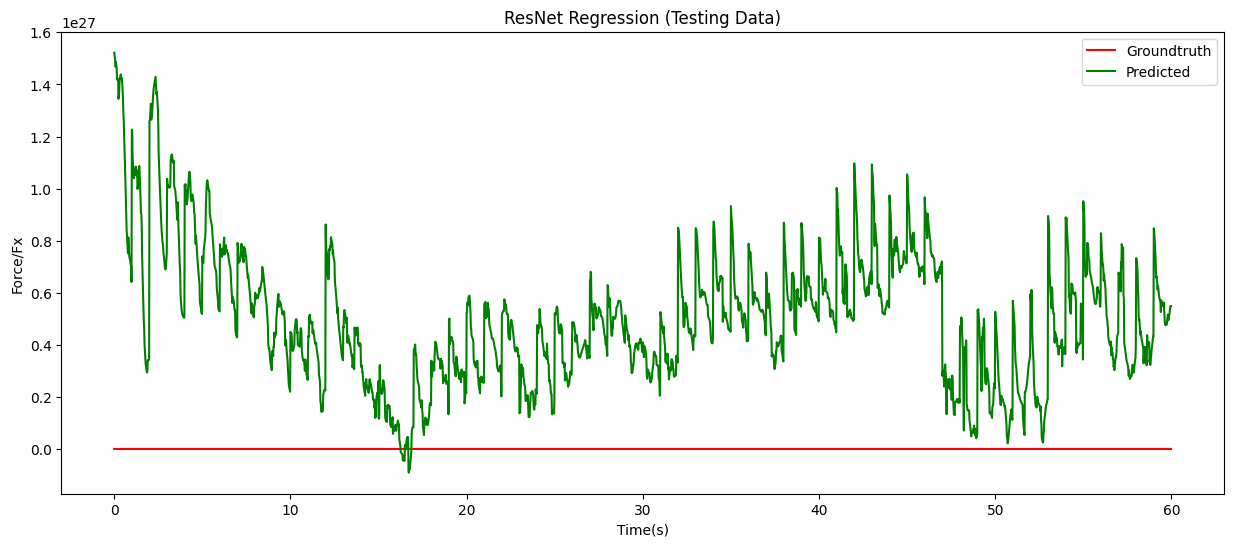

In [1]:
import numpy as np
import pandas as pd
from numpy import interp
from itertools import cycle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report, auc
from sklearn.metrics import precision_recall_curve, average_precision_score
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import Input, Conv1D, MaxPooling1D, UpSampling1D, concatenate, BatchNormalization, Activation, add
from keras.layers import Conv2D, MaxPooling2D, Reshape, Flatten, Dense
from keras.models import Model, model_from_json
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler
import pywt
np.set_printoptions(suppress=True)
from ResNet_1DCNN import ResNet
import tensorflow as tf
import math

# Set random seed for reproducibility
np.random.seed(0)
tf.random.set_seed(0)

# Load and preprocess the data
columns = ['Fx']
wavelet = 'db4'
max_iter = 50
iter = 0

# Load the Insole and FPData
Insole = pd.read_csv('0310AyuStand5Min1.txt', header=None, low_memory=False)
SIData = np.asarray(Insole)

df = pd.read_csv('0310AyuStand5Min1.csv', low_memory=False)
selected_df = df[columns]
FPDatas = selected_df[:]

SmartInsole = np.array(SIData[:]).astype('float32')
FPData = np.array(FPDatas).astype('float32')

SmartInsole = SmartInsole[:13000]
FPData = FPData[:13000]

SIids = [10, 11, 12, 22, 41, 42, 48, 49, 50, 59, 63, 74, 75, 76, 77, 78]

SIselection = []

for i in range(len(SmartInsole)):
    SIselection.append(SmartInsole[i][SIids])

SIselection = np.array(SIselection)

# Data Augmentation Techniques
augmented_smart_insole_data = []
augmented_force_plate_data = []

# Technique 1: Flipping
flipped_smart_insole_data = np.flip(SIselection, axis=1)
flipped_force_plate_data = np.flip(FPData, axis=0)
augmented_smart_insole_data.append(flipped_smart_insole_data)
augmented_force_plate_data.append(flipped_force_plate_data)

# Technique 2: Jitter
jitter_std = 0.05
jittered_smart_insole_data = SIselection + np.random.normal(loc=0.0, scale=jitter_std, size=SIselection.shape)
jittered_force_plate_data = FPData + np.random.normal(loc=0.0, scale=jitter_std, size=FPData.shape)
augmented_smart_insole_data.append(jittered_smart_insole_data)
augmented_force_plate_data.append(jittered_force_plate_data)

# Technique 3: Permutation
num_segments = np.random.randint(2, 5)
segment_size = SmartInsole.shape[0] // num_segments

permutated_smart_insole_data = np.empty_like(SIselection)
permutated_force_plate_data = np.empty_like(FPData)

for i in range(num_segments):
    start_index = i * segment_size
    end_index = (i + 1) * segment_size
    segment_indices = np.random.permutation(segment_size) + start_index
    permutated_smart_insole_data[start_index:end_index] = SIselection[segment_indices]
    permutated_force_plate_data[start_index:end_index] = FPData[segment_indices]

augmented_smart_insole_data.append(permutated_smart_insole_data)
augmented_force_plate_data.append(permutated_force_plate_data)

# Combine original and augmented data
augmented_smart_insole_data = np.concatenate((SIselection, *augmented_smart_insole_data), axis=0)
augmented_force_plate_data = np.concatenate((FPData, *augmented_force_plate_data), axis=0)

# Load the labels
label = pd.read_csv('label.txt', header=None, low_memory=False)
labelData = np.array(label)
Label = np.array(labelData[:13000]).astype('float32')

label_data = np.tile(Label, (augmented_smart_insole_data.shape[0] // Label.shape[0], 1))

SIlabeled = np.concatenate((label_data, augmented_smart_insole_data), axis=1)
SIlabeled = np.array(SIlabeled).astype('float32')

# Scale the smart insole data
minInsole = SIlabeled.min()
maxInsole = SIlabeled.max()
smart_insole_data_scaled = (SIlabeled - minInsole) / (maxInsole - minInsole)

# Scale the force plate data
minForcePlate = augmented_force_plate_data.min()
maxForcePlate = augmented_force_plate_data.max()
force_plate_data_scaled = (augmented_force_plate_data - minForcePlate) / (maxForcePlate - minForcePlate)

#Splitting Data
sample_size = smart_insole_data_scaled.shape[0] # number of samples in train set
time_steps  = smart_insole_data_scaled.shape[1] # number of features in train set
input_dimension = 1               # each feature is represented by 1 number

train_data_reshaped = smart_insole_data_scaled.reshape(sample_size, time_steps, input_dimension)
train_labels_reshaped = force_plate_data_scaled.reshape(sample_size, 1)

X_train, X_test, y_train, y_test = train_test_split(train_data_reshaped, train_labels_reshaped, 
                                                    test_size=0.20, random_state=2)

# Define the ResNet model
length = X_train.shape[1]
model_width = 64
num_channel = 1
problem_type = 'Regression'
output_number = 1

def create_model(model_width):
    model = ResNet(length, num_channel, model_width, problem_type=problem_type, output_nums=output_number).ResNet18()
    model.compile(loss='mse', optimizer=Adam(learning_rate=0.0001), metrics=['mse'])
    return model

# Wrap the Keras model in the KerasRegressor
regressor = KerasRegressor(build_fn=create_model, verbose=1)

# Define the hyperparameters to tune
param_grid = {
    'model_width': [32, 64, 128],
    'batch_size': [32, 64, 128],
    'epochs': [100, 300, 500]
}

# Perform GridSearchCV to tune hyperparameters
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_result = grid_search.fit(X_train, y_train, verbose=2)

# Print the best hyperparameters and the corresponding MSE
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Evaluate the model with the best hyperparameters on the testing data
best_model = grid_result.best_estimator_.model
mse = best_model.evaluate(train_data_reshaped, train_labels_reshaped)[0]
rmse = math.sqrt(mse)
ypred = best_model.predict(train_data_reshaped)

print('MSE: ', mse)
print('RMSE: ', rmse)
print('Coefficient of determination (r2 Score): ', r2_score(train_labels_reshaped, ypred))

# Inverse transform the predictions and actual values
y_pred = (ypred * (maxForcePlate - minForcePlate)) + minForcePlate
y_real = (train_labels_reshaped * (maxForcePlate - minForcePlate)) + minForcePlate

# Plot the predicted and actual values for the first output
x = np.arange(0, 3000) * 60 / 3000 
for i in range(0, 1):
    plt.figure(figsize=(15, 6))
    plt.plot(x, y_real[0:3000, i], color='red')
    plt.plot(x, y_pred[0:3000, i], markerfacecolor='none', color='green')
    plt.title('ResNet Regression (Testing Data)')
    if i < 3:
        plt.ylabel('Force/' + columns[i])
    else:
        plt.ylabel('Moment/' + columns[i])
    plt.xlabel('Time(s)')
    plt.legend(['Groundtruth', 'Predicted'], loc='best')
    plt.show()

# Save the best model
best_model.save('best_model.h5')


(10400, 89, 1) (2600, 89, 1)
(10400, 1) (2600, 1)
Model: "model_84"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_85 (InputLayer)          [(None, 89, 1)]      0           []                               
                                                                                                  
 conv1d_1428 (Conv1D)           (None, 45, 64)       512         ['input_85[0][0]']               
                                                                                                  
 activation_1848 (Activation)   (None, 45, 64)       0           ['conv1d_1428[0][0]']            
                                                                                                  
 max_pooling1d_84 (MaxPooling1D  (None, 22, 64)      0           ['activation_1848[0][0]']        
 )                                       

                                                                                                  
 conv1d_1442 (Conv1D)           (None, 3, 512)       786944      ['activation_1865[0][0]']        
                                                                                                  
 activation_1866 (Activation)   (None, 3, 512)       0           ['conv1d_1442[0][0]']            
                                                                                                  
 conv1d_1443 (Conv1D)           (None, 3, 512)       786944      ['activation_1866[0][0]']        
                                                                                                  
 activation_1867 (Activation)   (None, 3, 512)       0           ['conv1d_1443[0][0]']            
                                                                                                  
 conv1d_1444 (Conv1D)           (None, 3, 512)       786944      ['activation_1867[0][0]']        
          

126/130 [============================>.] - ETA: 0s - loss: 0.0121 - mse: 0.0121
Epoch 20: val_loss did not improve from 0.00938
130/130 [==============================] - 2s 12ms/step - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0134 - val_mse: 0.0134
Epoch 21/500
126/130 [============================>.] - ETA: 0s - loss: 0.0106 - mse: 0.0106
Epoch 21: val_loss did not improve from 0.00938
130/130 [==============================] - 2s 12ms/step - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 22/500
126/130 [============================>.] - ETA: 0s - loss: 0.0101 - mse: 0.0101
Epoch 22: val_loss improved from 0.00938 to 0.00937, saving model to Saved_Model.h5
130/130 [==============================] - 2s 13ms/step - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0094 - val_mse: 0.0094
Epoch 23/500
126/130 [============================>.] - ETA: 0s - loss: 0.0097 - mse: 0.0097
Epoch 23: val_loss did not improve from 0.00937
130/130 [==============================] - 2s 1

Epoch 51/500
126/130 [============================>.] - ETA: 0s - loss: 0.0097 - mse: 0.0097
Epoch 51: val_loss did not improve from 0.00905
130/130 [==============================] - 2s 12ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0096 - val_mse: 0.0096
Epoch 52/500
126/130 [============================>.] - ETA: 0s - loss: 0.0096 - mse: 0.0096
Epoch 52: val_loss did not improve from 0.00905
130/130 [==============================] - 2s 12ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 53/500
126/130 [============================>.] - ETA: 0s - loss: 0.0100 - mse: 0.0100
Epoch 53: val_loss did not improve from 0.00905
130/130 [==============================] - 2s 12ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 54/500
126/130 [============================>.] - ETA: 0s - loss: 0.0095 - mse: 0.0095
Epoch 54: val_loss did not improve from 0.00905
130/130 [==============================] - 2s 12ms/step - loss: 0.0095

130/130 [==============================] - 2s 12ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0069 - val_mse: 0.0069


130/130 [==============================] - 2s 12ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0066 - val_mse: 0.0066


130/130 [==============================] - 2s 12ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0058 - val_mse: 0.0058


130/130 [==============================] - 2s 12ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0056 - val_mse: 0.0056


130/130 [==============================] - 2s 12ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0060 - val_mse: 0.0060


130/130 [==============================] - 2s 12ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0062 - val_mse: 0.0062


130/130 [==============================] - 2s 12ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0057 - val_mse: 0.0057


130/130 [==============================] - 2s 12ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 1/500
64997/65000 [============================>.] - ETA: 0s - loss: 3.9108e-04 - mse: 3.9108e-04
Epoch 1: val_loss improved from inf to 0.00011, saving model to Saved_Model.h5
65000/65000 [==============================] - 780s 12ms/step - loss: 3.9107e-04 - mse: 3.9107e-04 - val_loss: 1.1186e-04 - val_mse: 1.1186e-04
Epoch 2/500
64996/65000 [============================>.] - ETA: 0s - loss: 1.4903e-04 - mse: 1.4903e-04
Epoch 2: val_loss improved from 0.00011 to 0.00001, saving model to Saved_Model.h5
65000/65000 [==============================] - 778s 12ms/step - loss: 1.4902e-04 - mse: 1.4902e-04 - val_loss: 7.3121e-06 - val_mse: 7.3121e-06
Epoch 3/500
64996/65000 [============================>.] - ETA: 0s - loss: 1.0770e-04 - mse: 1.0770e-04
Epoch 3: val_loss did not improve from 0.00001
65000/65000 [==============================] - 779s 12ms/step - loss:

Epoch 26/500
65000/65000 [==============================] - ETA: 0s - loss: 1.1908e-05 - mse: 1.1908e-05
Epoch 26: val_loss did not improve from 0.00000
65000/65000 [==============================] - 775s 12ms/step - loss: 1.1908e-05 - mse: 1.1908e-05 - val_loss: 1.9501e-05 - val_mse: 1.9501e-05
Epoch 27/500
64997/65000 [============================>.] - ETA: 0s - loss: 1.1862e-05 - mse: 1.1862e-05
Epoch 27: val_loss did not improve from 0.00000
65000/65000 [==============================] - 775s 12ms/step - loss: 1.1862e-05 - mse: 1.1862e-05 - val_loss: 2.6258e-06 - val_mse: 2.6258e-06
Epoch 28/500
65000/65000 [==============================] - ETA: 0s - loss: 9.1783e-06 - mse: 9.1783e-06
Epoch 28: val_loss did not improve from 0.00000
65000/65000 [==============================] - 775s 12ms/step - loss: 9.1783e-06 - mse: 9.1783e-06 - val_loss: 4.4883e-07 - val_mse: 4.4883e-07
Epoch 29/500
64998/65000 [============================>.] - ETA: 0s - loss: 9.6785e-06 - mse: 9.6785e-06
Epoc

64999/65000 [============================>.] - ETA: 0s - loss: 3.8600e-06 - mse: 3.8600e-06
Epoch 53: val_loss did not improve from 0.00000
65000/65000 [==============================] - 764s 12ms/step - loss: 3.8600e-06 - mse: 3.8600e-06 - val_loss: 5.8200e-07 - val_mse: 5.8200e-07
Epoch 54/500
65000/65000 [==============================] - ETA: 0s - loss: 4.0257e-06 - mse: 4.0257e-06
Epoch 54: val_loss did not improve from 0.00000
65000/65000 [==============================] - 764s 12ms/step - loss: 4.0257e-06 - mse: 4.0257e-06 - val_loss: 4.6018e-07 - val_mse: 4.6018e-07
Epoch 55/500
64999/65000 [============================>.] - ETA: 0s - loss: 1.9048e-06 - mse: 1.9048e-06
Epoch 55: val_loss did not improve from 0.00000
65000/65000 [==============================] - 764s 12ms/step - loss: 1.9048e-06 - mse: 1.9048e-06 - val_loss: 2.2893e-07 - val_mse: 2.2893e-07
Epoch 56/500
64999/65000 [============================>.] - ETA: 0s - loss: 4.4716e-06 - mse: 4.4716e-06
Epoch 56: val_los

65000/65000 [==============================] - 788s 12ms/step - loss: 4.7030e-06 - mse: 4.7030e-06 - val_loss: 1.8920e-07 - val_mse: 1.8920e-07
Epoch 81/500
64999/65000 [============================>.] - ETA: 0s - loss: 3.8922e-06 - mse: 3.8922e-06
Epoch 81: val_loss did not improve from 0.00000
65000/65000 [==============================] - 783s 12ms/step - loss: 3.8921e-06 - mse: 3.8921e-06 - val_loss: 1.3350e-07 - val_mse: 1.3350e-07
Epoch 82/500
64998/65000 [============================>.] - ETA: 0s - loss: 3.1386e-06 - mse: 3.1386e-06
Epoch 82: val_loss did not improve from 0.00000
65000/65000 [==============================] - 773s 12ms/step - loss: 3.1385e-06 - mse: 3.1385e-06 - val_loss: 1.6706e-08 - val_mse: 1.6706e-08
Epoch 83/500
64997/65000 [============================>.] - ETA: 0s - loss: 2.6391e-06 - mse: 2.6391e-06
Epoch 83: val_loss improved from 0.00000 to 0.00000, saving model to Saved_Model.h5
65000/65000 [==============================] - 773s 12ms/step - loss: 2.6

Epoch 108/500
65000/65000 [==============================] - ETA: 0s - loss: 6.5653e-08 - mse: 6.5653e-08
Epoch 108: val_loss did not improve from 0.00000
65000/65000 [==============================] - 764s 12ms/step - loss: 6.5653e-08 - mse: 6.5653e-08 - val_loss: 6.9281e-08 - val_mse: 6.9281e-08
Epoch 109/500
64997/65000 [============================>.] - ETA: 0s - loss: 3.2060e-06 - mse: 3.2060e-06
Epoch 109: val_loss did not improve from 0.00000
65000/65000 [==============================] - 764s 12ms/step - loss: 3.2058e-06 - mse: 3.2058e-06 - val_loss: 8.3074e-08 - val_mse: 8.3074e-08
Epoch 110/500
64999/65000 [============================>.] - ETA: 0s - loss: 2.6388e-06 - mse: 2.6388e-06
Epoch 110: val_loss did not improve from 0.00000
65000/65000 [==============================] - 764s 12ms/step - loss: 2.6387e-06 - mse: 2.6387e-06 - val_loss: 7.6315e-08 - val_mse: 7.6315e-08
Epoch 111/500
64998/65000 [============================>.] - ETA: 0s - loss: 2.7748e-06 - mse: 2.7748e-

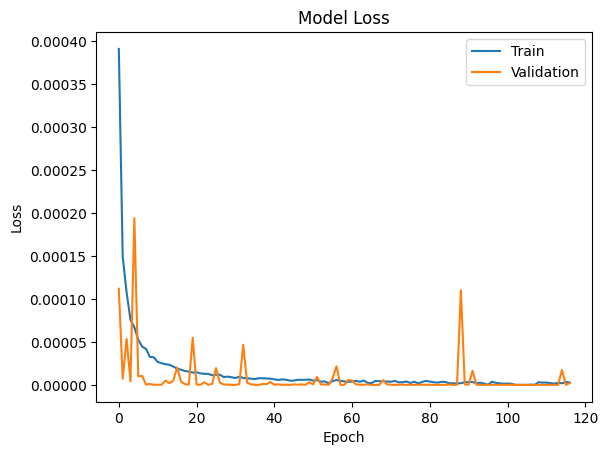

In [6]:
import numpy as np
import pandas as pd
# import seaborn as sns
from numpy import interp
from itertools import cycle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from keras.layers import Input, Conv1D, MaxPooling1D, UpSampling1D, concatenate, BatchNormalization, Activation, add
from keras.layers import Conv2D, MaxPooling2D, Reshape, Flatten, Dense
from keras.models import Model, model_from_json
from keras.optimizers import Adam, RMSprop
# from tensorflow.keras.optimizers import AdamW
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import Normalizer,MinMaxScaler,StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer
# sns.set_theme(style="whitegrid")
import pywt
np.set_printoptions(suppress=True)
# Import ResNet1D Module
from ResNet_1DCNN import ResNet
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error, r2_score

columns = ['Fx']
wavelet = 'db4'
max_iter = 50
iter = 0

# Training Process
Insole = pd.read_csv('0310AyuStand5Min1.txt', header=None, low_memory=False)
SIData =  np.asarray(Insole)

df = pd.read_csv('0310AyuStand5Min1.csv', low_memory=False)
selected_df = df[columns]
FPDatas = selected_df[:]

SmartInsole = np.array(SIData[:]).astype('float32')
FPData = np.array(FPDatas).astype('float32')

for i in range(len(SmartInsole)):
    SmartInsole[i][0] = SmartInsole[i][0] + (iter % max_iter) + 1
    iter += 1

# Scale the smart insole data
minInsole = SmartInsole.min()
maxInsole = SmartInsole.max()
smart_insole_data_scaled = (SmartInsole - minInsole) / ( maxInsole - minInsole )

# Scale the force plate data
minForcePlate = FPData.min()
maxForcePlate = FPData.max()
force_plate_data_scaled = (FPData - minForcePlate) / ( maxForcePlate - minForcePlate )

#Spliting Data
sample_size = smart_insole_data_scaled.shape[0] # number of samples in train set
time_steps  = smart_insole_data_scaled.shape[1] # number of features in train set
input_dimension = 1               # each feature is represented by 1 number

train_data_reshaped = smart_insole_data_scaled.reshape(sample_size,time_steps,input_dimension)

X_train, X_test, y_train, y_test = train_test_split(train_data_reshaped[:13000], 
                                                    force_plate_data_scaled[:13000], 
                                                    test_size=0.20, random_state=2)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

"Configurations for ResNet in Regression Mode"
length = X_train.shape[1]   # Number of Features (or length of the signal)
model_width = 64           # Number of Filter or Kernel in the Input Layer
num_channel = 1             # Number of Input Channels
problem_type = 'Regression' # Regression or Classification
output_number = 1           # Number of Outputs in the Regression Mode

Regression_Model = ResNet(length, num_channel, model_width, problem_type=problem_type, 
                          output_nums=output_number).ResNet18()
Regression_Model.compile(loss='mse', optimizer=Adam(learning_rate=0.0001), metrics= ['mse']) # Compile Model

Regression_Model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=30, mode='min'), ModelCheckpoint('Saved_Model.h5', verbose=1, monitor='val_loss', save_best_only=True, mode='min')]
history = Regression_Model.fit(X_train, y_train, epochs=500, 
                               batch_size=64, verbose=1, validation_split=0.2, 
                               shuffle=True, callbacks=callbacks )

# Define the list to store clean data and labels
X_train_clean = []
y_train_clean = []

# Set the threshold for the loss value to determine noisy data
loss_threshold = 0.1

# Iterate over each epoch during training
for epoch in range(500):
    # Fit the model for the current epoch
    history = Regression_Model.fit(X_train, y_train, epochs=1, 
                                   batch_size=64, verbose=1, validation_split=0.2, shuffle=True)
    
    # Get the loss values for training and validation sets
    train_loss = history.history['loss'][0]
    val_loss = history.history['val_loss'][0]
    
    # Check if the loss exceeds the threshold for noisy data
    if train_loss < loss_threshold and val_loss < loss_threshold:
        # Append the clean data and labels
        X_train_clean.append(X_train)
        y_train_clean.append(y_train)

# Reconstruct X_train_clean and y_train_clean
X_train_clean = np.concatenate(X_train_clean, axis=0)
y_train_clean = np.concatenate(y_train_clean, axis=0)

# Train the model on the clean data
history = Regression_Model.fit(X_train_clean, y_train_clean, epochs=500, 
                               batch_size=64, verbose=1, validation_split=0.2, shuffle=True,
                               callbacks=[EarlyStopping(monitor='val_loss', patience=30, mode='min'),
                                          ModelCheckpoint('Saved_Model.h5', verbose=1, monitor='val_loss', save_best_only=True, mode='min')])

# Plot the training loss
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.savefig('Loss_Result.png')

# Evaluate the model on the entire dataset
Regression_Model.evaluate(X_train, y_train)
ypred = Regression_Model.predict(X_train)

print('MSE: ', mean_squared_error(y_train, ypred))
print('RMSE: ', np.sqrt(mean_squared_error(y_train, ypred)))
print('Coefficient of determination (r2 Score): ', r2_score(y_train, ypred))

# Save the trained model
Regression_Model.save('Trained_Model.h5')


(31200, 89, 1) (7800, 89, 1)
(31200, 1) (7800, 1)
Model: "model_90"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_91 (InputLayer)          [(None, 89, 1)]      0           []                               
                                                                                                  
 conv1d_1562 (Conv1D)           (None, 45, 16)       128         ['input_91[0][0]']               
                                                                                                  
 activation_2028 (Activation)   (None, 45, 16)       0           ['conv1d_1562[0][0]']            
                                                                                                  
 max_pooling1d_90 (MaxPooling1D  (None, 22, 16)      0           ['activation_2028[0][0]']        
 )                                       

                                                                                                  
 conv1d_1576 (Conv1D)           (None, 3, 128)       49280       ['activation_2045[0][0]']        
                                                                                                  
 activation_2046 (Activation)   (None, 3, 128)       0           ['conv1d_1576[0][0]']            
                                                                                                  
 conv1d_1577 (Conv1D)           (None, 3, 128)       49280       ['activation_2046[0][0]']        
                                                                                                  
 activation_2047 (Activation)   (None, 3, 128)       0           ['conv1d_1577[0][0]']            
                                                                                                  
 conv1d_1578 (Conv1D)           (None, 3, 128)       49280       ['activation_2047[0][0]']        
          

488/488 [==============================] - 5s 10ms/step - loss: 5.1991e-05 - mse: 5.1991e-05 - val_loss: 2.5906e-05 - val_mse: 2.5906e-05
Epoch 37/500
488/488 [==============================] - 5s 10ms/step - loss: 4.6656e-05 - mse: 4.6656e-05 - val_loss: 3.1945e-05 - val_mse: 3.1945e-05
Epoch 38/500
488/488 [==============================] - 5s 10ms/step - loss: 5.4839e-05 - mse: 5.4839e-05 - val_loss: 4.0902e-05 - val_mse: 4.0902e-05
Epoch 39/500
488/488 [==============================] - 5s 10ms/step - loss: 5.9070e-05 - mse: 5.9070e-05 - val_loss: 1.8059e-05 - val_mse: 1.8059e-05
Epoch 40/500
488/488 [==============================] - 5s 10ms/step - loss: 3.6785e-05 - mse: 3.6785e-05 - val_loss: 2.4744e-04 - val_mse: 2.4744e-04
Epoch 41/500
488/488 [==============================] - 5s 10ms/step - loss: 4.9878e-05 - mse: 4.9878e-05 - val_loss: 8.2453e-05 - val_mse: 8.2453e-05
Epoch 42/500
488/488 [==============================] - 5s 10ms/step - loss: 3.9642e-05 - mse: 3.9642e-05 -

488/488 [==============================] - 5s 10ms/step - loss: 1.3389e-05 - mse: 1.3389e-05 - val_loss: 1.2295e-05 - val_mse: 1.2295e-05
Epoch 91/500
488/488 [==============================] - 5s 10ms/step - loss: 1.5691e-05 - mse: 1.5691e-05 - val_loss: 6.3005e-06 - val_mse: 6.3005e-06
Epoch 92/500
488/488 [==============================] - 5s 10ms/step - loss: 9.6472e-06 - mse: 9.6472e-06 - val_loss: 9.7626e-06 - val_mse: 9.7626e-06
Epoch 93/500
488/488 [==============================] - 5s 10ms/step - loss: 1.3677e-05 - mse: 1.3677e-05 - val_loss: 6.1953e-06 - val_mse: 6.1953e-06
Epoch 94/500
488/488 [==============================] - 5s 10ms/step - loss: 1.4570e-05 - mse: 1.4570e-05 - val_loss: 1.5457e-05 - val_mse: 1.5457e-05
Epoch 95/500
488/488 [==============================] - 5s 10ms/step - loss: 9.4506e-06 - mse: 9.4506e-06 - val_loss: 4.6844e-05 - val_mse: 4.6844e-05
Epoch 96/500
488/488 [==============================] - 5s 10ms/step - loss: 1.3258e-05 - mse: 1.3258e-05 -

488/488 [==============================] - 5s 10ms/step - loss: 7.2186e-06 - mse: 7.2186e-06 - val_loss: 1.0020e-05 - val_mse: 1.0020e-05
Epoch 145/500
488/488 [==============================] - 5s 10ms/step - loss: 8.8960e-06 - mse: 8.8960e-06 - val_loss: 1.9363e-05 - val_mse: 1.9363e-05
Epoch 146/500
488/488 [==============================] - 5s 10ms/step - loss: 7.6824e-06 - mse: 7.6824e-06 - val_loss: 4.5353e-06 - val_mse: 4.5353e-06
Epoch 147/500
488/488 [==============================] - 5s 10ms/step - loss: 8.4004e-06 - mse: 8.4004e-06 - val_loss: 4.4605e-06 - val_mse: 4.4605e-06
Epoch 148/500
488/488 [==============================] - 5s 10ms/step - loss: 7.8880e-06 - mse: 7.8880e-06 - val_loss: 9.4359e-06 - val_mse: 9.4359e-06
Epoch 149/500
488/488 [==============================] - 5s 10ms/step - loss: 9.7835e-06 - mse: 9.7835e-06 - val_loss: 7.9181e-06 - val_mse: 7.9181e-06
Epoch 150/500
488/488 [==============================] - 5s 10ms/step - loss: 1.0002e-05 - mse: 1.0002

Epoch 198/500
488/488 [==============================] - 5s 10ms/step - loss: 5.7298e-06 - mse: 5.7298e-06 - val_loss: 4.3415e-05 - val_mse: 4.3415e-05
Epoch 199/500
488/488 [==============================] - 5s 10ms/step - loss: 6.8924e-06 - mse: 6.8924e-06 - val_loss: 3.4104e-06 - val_mse: 3.4104e-06
Epoch 200/500
488/488 [==============================] - 5s 10ms/step - loss: 5.9974e-06 - mse: 5.9974e-06 - val_loss: 6.5375e-06 - val_mse: 6.5375e-06
Epoch 201/500
488/488 [==============================] - 5s 10ms/step - loss: 6.7989e-06 - mse: 6.7989e-06 - val_loss: 1.1644e-05 - val_mse: 1.1644e-05
Epoch 202/500
488/488 [==============================] - 5s 10ms/step - loss: 5.5547e-06 - mse: 5.5547e-06 - val_loss: 9.0905e-06 - val_mse: 9.0905e-06
Epoch 203/500
488/488 [==============================] - 5s 10ms/step - loss: 8.3773e-06 - mse: 8.3773e-06 - val_loss: 9.6441e-06 - val_mse: 9.6441e-06
Epoch 204/500
488/488 [==============================] - 5s 10ms/step - loss: 6.5137e-06

Epoch 252/500
488/488 [==============================] - 5s 10ms/step - loss: 5.3551e-06 - mse: 5.3551e-06 - val_loss: 4.7656e-06 - val_mse: 4.7656e-06
Epoch 253/500
488/488 [==============================] - 5s 10ms/step - loss: 4.9776e-06 - mse: 4.9776e-06 - val_loss: 6.6652e-06 - val_mse: 6.6652e-06
Epoch 254/500
488/488 [==============================] - 5s 10ms/step - loss: 5.5177e-06 - mse: 5.5177e-06 - val_loss: 5.3322e-06 - val_mse: 5.3322e-06
Epoch 255/500
488/488 [==============================] - 5s 10ms/step - loss: 5.4448e-06 - mse: 5.4448e-06 - val_loss: 4.3362e-06 - val_mse: 4.3362e-06
Epoch 256/500
488/488 [==============================] - 5s 10ms/step - loss: 5.1855e-06 - mse: 5.1855e-06 - val_loss: 3.3335e-06 - val_mse: 3.3335e-06
Epoch 257/500
488/488 [==============================] - 5s 10ms/step - loss: 5.3410e-06 - mse: 5.3410e-06 - val_loss: 3.3121e-06 - val_mse: 3.3121e-06
Epoch 258/500
488/488 [==============================] - 5s 10ms/step - loss: 4.7964e-06

Epoch 306/500
488/488 [==============================] - 5s 10ms/step - loss: 4.0427e-06 - mse: 4.0427e-06 - val_loss: 4.4208e-06 - val_mse: 4.4208e-06
Epoch 307/500
488/488 [==============================] - 5s 10ms/step - loss: 4.5450e-06 - mse: 4.5450e-06 - val_loss: 3.0985e-06 - val_mse: 3.0985e-06
Epoch 308/500
488/488 [==============================] - 5s 10ms/step - loss: 4.8289e-06 - mse: 4.8289e-06 - val_loss: 3.6385e-06 - val_mse: 3.6385e-06
Epoch 309/500
488/488 [==============================] - 5s 10ms/step - loss: 5.2511e-06 - mse: 5.2511e-06 - val_loss: 4.2119e-06 - val_mse: 4.2119e-06
Epoch 310/500
488/488 [==============================] - 5s 10ms/step - loss: 4.4725e-06 - mse: 4.4725e-06 - val_loss: 3.5823e-06 - val_mse: 3.5823e-06
Epoch 311/500
488/488 [==============================] - 5s 10ms/step - loss: 4.6108e-06 - mse: 4.6108e-06 - val_loss: 3.1047e-06 - val_mse: 3.1047e-06
Epoch 312/500
488/488 [==============================] - 5s 10ms/step - loss: 4.9795e-06

Epoch 360/500
488/488 [==============================] - 5s 10ms/step - loss: 5.0267e-06 - mse: 5.0267e-06 - val_loss: 4.9787e-06 - val_mse: 4.9787e-06
Epoch 361/500
488/488 [==============================] - 5s 10ms/step - loss: 3.8803e-06 - mse: 3.8803e-06 - val_loss: 3.1557e-05 - val_mse: 3.1557e-05
Epoch 362/500
488/488 [==============================] - 5s 10ms/step - loss: 5.1937e-06 - mse: 5.1937e-06 - val_loss: 5.0284e-06 - val_mse: 5.0284e-06
Epoch 363/500
488/488 [==============================] - 5s 10ms/step - loss: 3.8182e-06 - mse: 3.8182e-06 - val_loss: 1.4868e-05 - val_mse: 1.4868e-05
Epoch 364/500
488/488 [==============================] - 5s 10ms/step - loss: 4.8239e-06 - mse: 4.8239e-06 - val_loss: 5.2188e-06 - val_mse: 5.2188e-06
Epoch 365/500
488/488 [==============================] - 5s 10ms/step - loss: 4.6405e-06 - mse: 4.6405e-06 - val_loss: 8.5174e-06 - val_mse: 8.5174e-06
Epoch 366/500
488/488 [==============================] - 5s 10ms/step - loss: 4.2676e-06

Epoch 414/500
488/488 [==============================] - 5s 10ms/step - loss: 4.7970e-06 - mse: 4.7970e-06 - val_loss: 5.3624e-06 - val_mse: 5.3624e-06
Epoch 415/500
488/488 [==============================] - 5s 10ms/step - loss: 4.0278e-06 - mse: 4.0278e-06 - val_loss: 4.3263e-06 - val_mse: 4.3263e-06
Epoch 416/500
488/488 [==============================] - 5s 10ms/step - loss: 3.9735e-06 - mse: 3.9735e-06 - val_loss: 5.6669e-06 - val_mse: 5.6669e-06
Epoch 417/500
488/488 [==============================] - 5s 10ms/step - loss: 4.0778e-06 - mse: 4.0778e-06 - val_loss: 4.8098e-06 - val_mse: 4.8098e-06
Epoch 418/500
488/488 [==============================] - 5s 10ms/step - loss: 4.1841e-06 - mse: 4.1841e-06 - val_loss: 2.8249e-06 - val_mse: 2.8249e-06
Epoch 419/500
488/488 [==============================] - 5s 10ms/step - loss: 4.1925e-06 - mse: 4.1925e-06 - val_loss: 2.6758e-06 - val_mse: 2.6758e-06
Epoch 420/500
488/488 [==============================] - 5s 10ms/step - loss: 4.7911e-06

Epoch 468/500
488/488 [==============================] - 5s 10ms/step - loss: 3.5610e-06 - mse: 3.5610e-06 - val_loss: 2.5752e-06 - val_mse: 2.5752e-06
Epoch 469/500
488/488 [==============================] - 5s 10ms/step - loss: 3.7695e-06 - mse: 3.7695e-06 - val_loss: 2.8648e-06 - val_mse: 2.8648e-06
Epoch 470/500
488/488 [==============================] - 5s 10ms/step - loss: 3.7585e-06 - mse: 3.7585e-06 - val_loss: 3.3691e-06 - val_mse: 3.3691e-06
Epoch 471/500
488/488 [==============================] - 5s 10ms/step - loss: 4.5403e-06 - mse: 4.5403e-06 - val_loss: 2.8295e-06 - val_mse: 2.8295e-06
Epoch 472/500
488/488 [==============================] - 5s 10ms/step - loss: 3.3283e-06 - mse: 3.3283e-06 - val_loss: 3.6472e-06 - val_mse: 3.6472e-06
Epoch 473/500
488/488 [==============================] - 5s 10ms/step - loss: 4.4311e-06 - mse: 4.4311e-06 - val_loss: 3.0033e-06 - val_mse: 3.0033e-06
Epoch 474/500
488/488 [==============================] - 5s 10ms/step - loss: 4.2966e-06

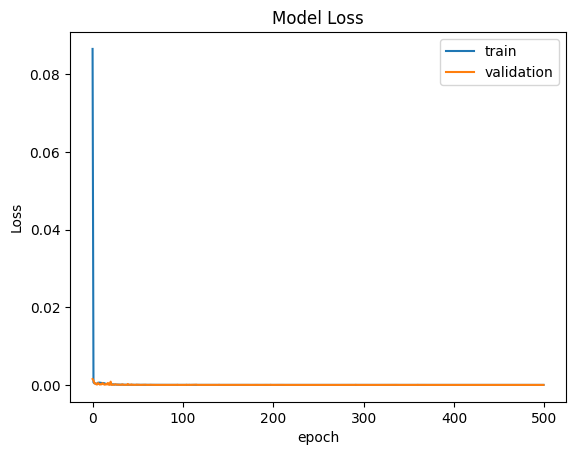

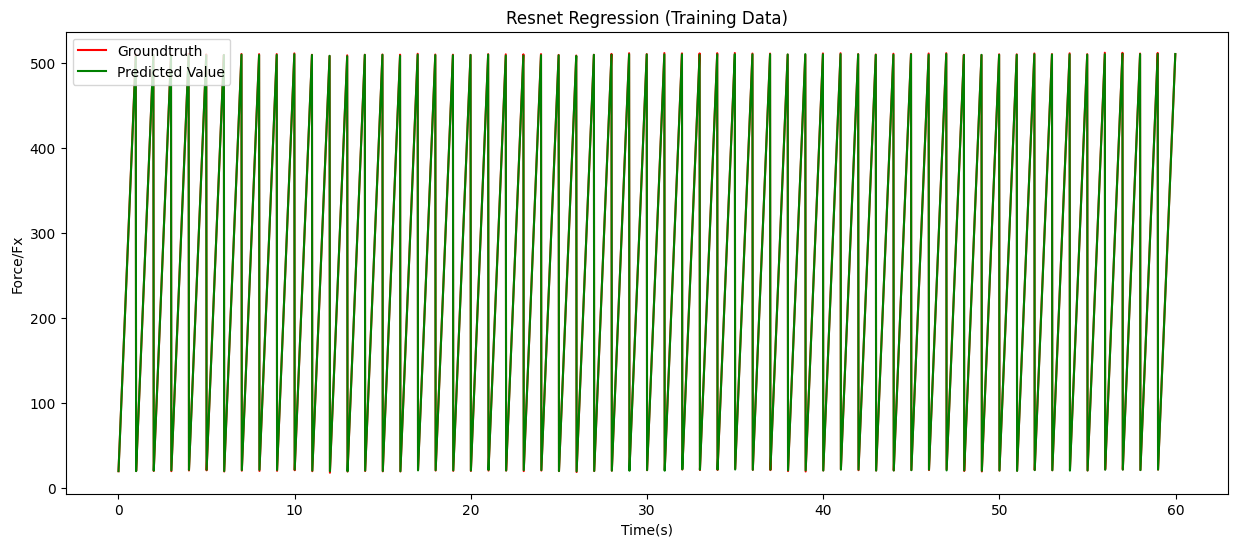

MSE:  0.8228811323856123
RMSE:  0.9071279581104379
Coefficient of determination (r2 Score):  0.437757252868866


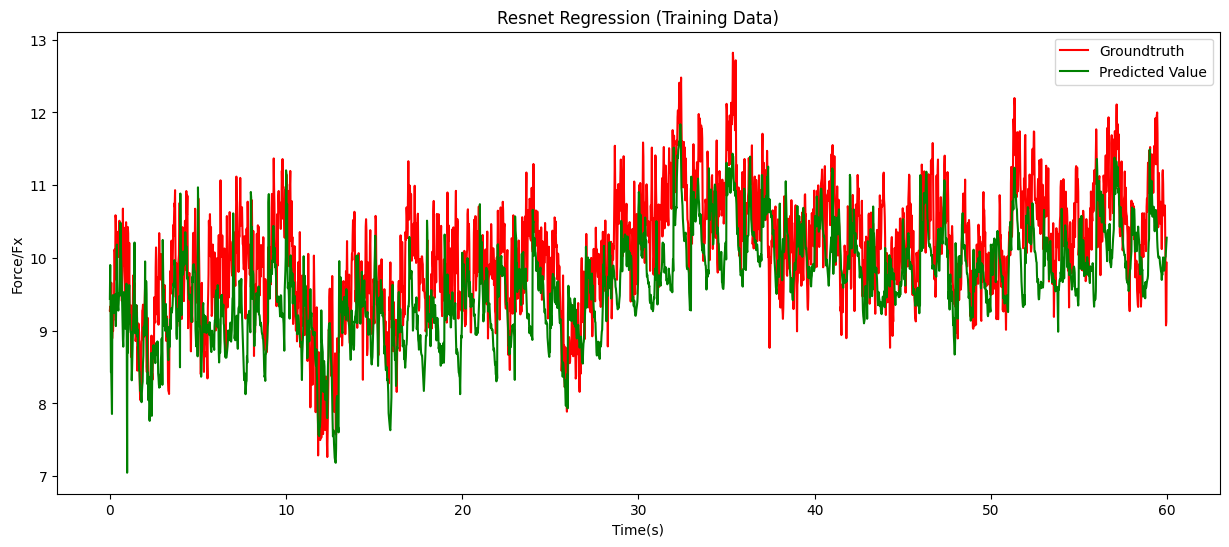

63/63 [==============================] - 0s 5ms/step
[[ 20.539639]
 [ 30.57351 ]
 [ 40.716766]
 [ 50.671333]
 [ 61.351154]
 [ 71.38089 ]
 [ 81.25009 ]
 [ 91.553856]
 [101.7213  ]
 [111.551956]]
[[ 22.4427]
 [ 32.32  ]
 [ 41.7528]
 [ 51.3935]
 [ 61.6498]
 [ 71.8989]
 [ 81.958 ]
 [ 91.8899]
 [102.0354]
 [112.1661]]


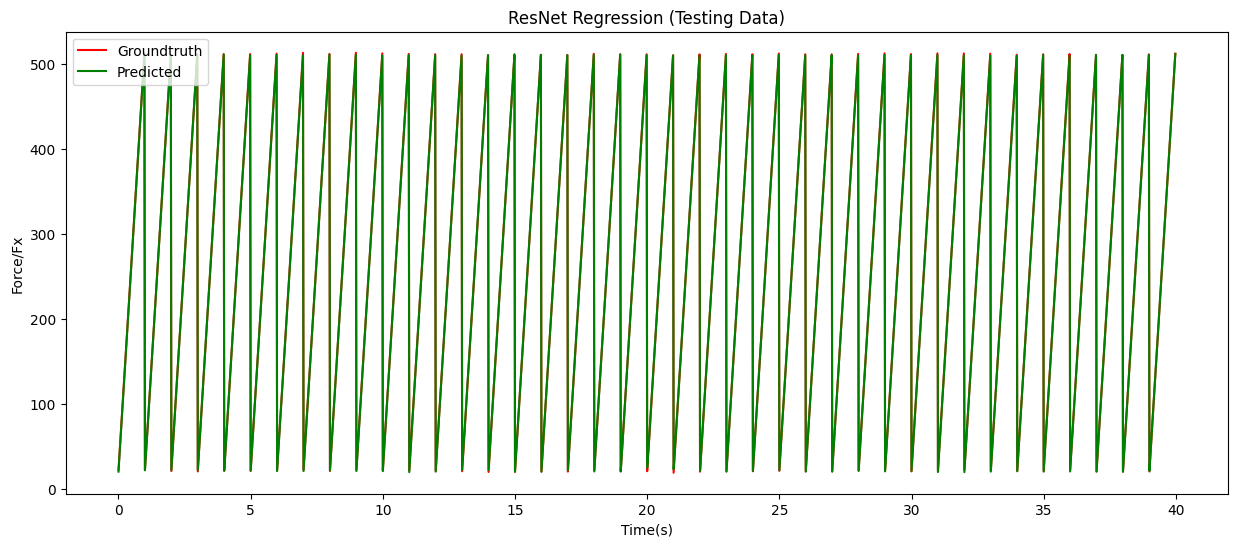

[[12.442699]
 [12.32    ]
 [11.7528  ]
 [11.393501]
 [11.649799]
 [11.898903]
 [11.958   ]
 [11.8899  ]
 [12.0354  ]
 [12.1661  ]]
[[10.5396385]
 [10.573509 ]
 [10.716766 ]
 [10.671333 ]
 [11.351154 ]
 [11.38089  ]
 [11.250092 ]
 [11.553856 ]
 [11.721298 ]
 [11.551956 ]]


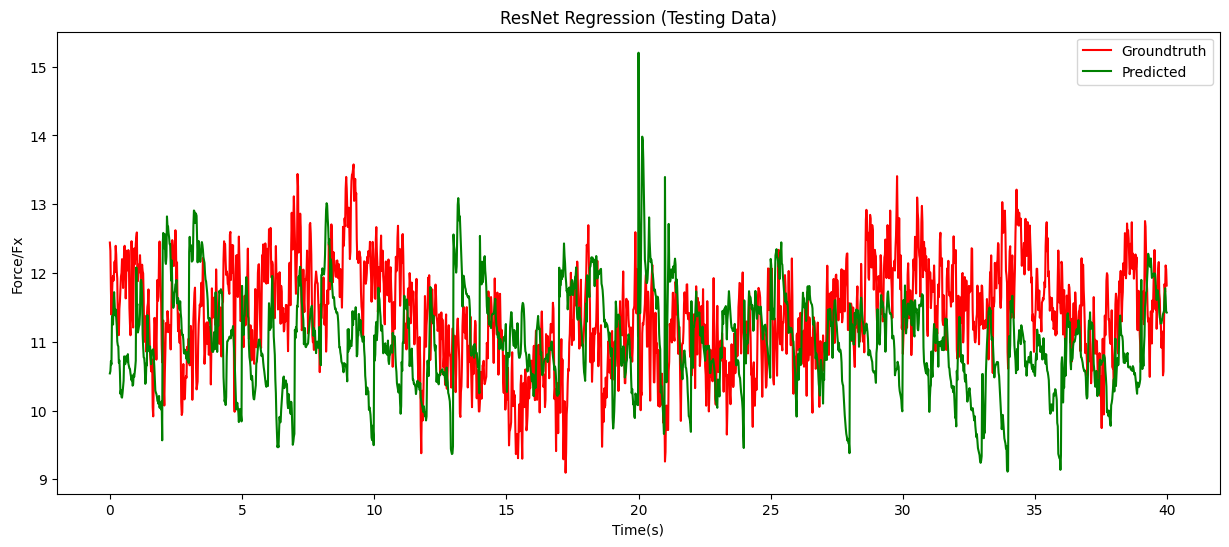

In [20]:
import numpy as np
import pandas as pd
# import seaborn as sns
from numpy import interp
from itertools import cycle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from keras.layers import Input, Conv1D, MaxPooling1D, UpSampling1D, concatenate, BatchNormalization, Activation, add
from keras.layers import Conv2D, MaxPooling2D, Reshape, Flatten, Dense
from keras.models import Model, model_from_json
from keras.optimizers import Adam, RMSprop
# from tensorflow.keras.optimizers import AdamW
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import Normalizer,MinMaxScaler,StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer
# sns.set_theme(style="whitegrid")
import pywt
np.set_printoptions(suppress=True)
# Import ResNet1D Module
from ResNet_1DCNN import ResNet
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error, r2_score

# Define DA_Permutation function
def DA_Permutation(X, nPerm=2, minSegLength=6):
    X_new = np.zeros(X.shape)
    idx = np.random.permutation(nPerm)
    bWhile = True
    while bWhile == True:
        segs = np.zeros(nPerm+1, dtype=int)
        segs[1:-1] = np.sort(np.random.randint(minSegLength, X.shape[0]-minSegLength, nPerm-1))
        segs[-1] = X.shape[0]
        if np.min(segs[1:]-segs[0:-1]) > minSegLength:
            bWhile = False
    pp = 0
    for ii in range(nPerm):
        x_temp = X[segs[idx[ii]]:segs[idx[ii]+1],:]
        X_new[pp:pp+len(x_temp),:] = x_temp
        pp += len(x_temp)
    return(X_new)

def DA_Jitter(X, sigma=0.05):
    myNoise = np.random.normal(loc=0, scale=sigma, size=X.shape)
    return X+myNoise

columns = ['Fx']
wavelet = 'db4'
max_iter = 50
iter = 0

# Training Process
Insole = pd.read_csv('0310AyuStand5Min1.txt', header=None, low_memory=False)
SIData =  np.asarray(Insole)

df = pd.read_csv('0310AyuStand5Min1.csv', low_memory=False)
selected_df = df[columns]
FPDatas = selected_df[:]

SmartInsole = np.array(SIData[:13000]).astype('float32')
FPData = np.array(FPDatas[:13000]).astype('float32')

# Adjusting the values of FPDataPre
FPDataPreAdjusted = FPData.copy()
for i in range(len(FPDataPreAdjusted)):
    # FPDataPreAdjusted[i][0] = FPDataPreAdjusted[i][0] + (iter % max_iter) + 1
    FPDataPreAdjusted[i][0] = FPDataPreAdjusted[i][0] + ((iter % max_iter) + 1) * 10
    iter += 1

# Apply DA_Permutation to SmartInsole and FPData
SmartInsole_permuted = DA_Permutation(SmartInsole)
FPData_permuted = DA_Permutation(FPDataPreAdjusted)

SmartInsole_Jitter = DA_Jitter(SmartInsole)
FPData_Jitter = DA_Jitter(FPDataPreAdjusted)

# Combine original and permuted data
combined_SmartInsole = np.concatenate((SmartInsole,SmartInsole_Jitter, SmartInsole_permuted), axis=0)
combined_FPData = np.concatenate((FPDataPreAdjusted, FPData_Jitter, FPData_permuted), axis=0)

for i in range(len(combined_SmartInsole)):
    combined_SmartInsole[i][0] = combined_SmartInsole[i][0] + (iter % max_iter) + 1
    iter += 1

# Scale the combined smart insole data
minInsole = combined_SmartInsole.min()
maxInsole = combined_SmartInsole.max()
smart_insole_data_scaled = (combined_SmartInsole - minInsole) / (maxInsole - minInsole)

# Scale the combined force plate data
minForcePlate = combined_FPData.min()
maxForcePlate = combined_FPData.max()
force_plate_data_scaled = (combined_FPData - minForcePlate) / (maxForcePlate - minForcePlate)

#Spliting Data
sample_size = smart_insole_data_scaled.shape[0] # number of samples in train set
time_steps  = smart_insole_data_scaled.shape[1] # number of features in train set
input_dimension = 1               # each feature is represented by 1 number

train_data_reshaped = smart_insole_data_scaled.reshape(sample_size,time_steps,input_dimension)

X_train, X_test, y_train, y_test = train_test_split(train_data_reshaped, 
                                                    force_plate_data_scaled, 
                                                    test_size=0.20, random_state=2)

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

"Configurations for ResNet in Regression Mode"
length = X_train.shape[1]   # Number of Features (or length of the signal)
model_width = 16           # Number of Filter or Kernel in the Input Layer
num_channel = 1             # Number of Input Channels
problem_type = 'Regression' # Regression or Classification
output_number = 1           # Number of Outputs in the Regression Mode

Regression_Model = ResNet(length, num_channel, model_width, problem_type=problem_type, 
                          output_nums=output_number).ResNet18()
Regression_Model.compile(loss='mse', optimizer=Adam(learning_rate=0.0001), metrics= ['mse']) # Compile Model

Regression_Model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=30, mode='min'), ModelCheckpoint('Saved_Model.h5', verbose=1, monitor='val_loss', save_best_only=True, mode='min')]
history = Regression_Model.fit(X_train, y_train, epochs=500, 
                               batch_size=64, verbose=1, validation_data=(X_test, y_test), 
                               shuffle=True)

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
# plt.show()
plt.savefig('Loss Result.png')

#Evaluate Model
Regression_Model.evaluate(train_data_reshaped, force_plate_data_scaled)
ypred = Regression_Model.predict(train_data_reshaped)

print('MSE: ',mean_squared_error(force_plate_data_scaled, ypred))
print('RMSE: ',math.sqrt(mean_squared_error(force_plate_data_scaled, ypred)))
print('Coefficient of determination (r2 Score): ', r2_score(force_plate_data_scaled, ypred))

# Inverse transform the predictions and actual values
y_pred = (ypred * (maxForcePlate - minForcePlate)) + minForcePlate
y_real = (force_plate_data_scaled * (maxForcePlate - minForcePlate)) + minForcePlate

x=[]
colors=['red','green','brown','teal','gray','black','maroon','orange','purple']
colors2=['green','red','orange','black','maroon','teal','blue','gray','brown']
x = np.arange(0,3000)*60/3000 
for i in range(0,1):
    plt.figure(figsize=(15,6))
    # plt.figure()
    plt.plot(x,y_real[0:3000,i],color='red')
    plt.plot(x,y_pred[0:3000,i], markerfacecolor='none',color='green')
    plt.title('Resnet Regression (Training Data)')
    if i < 3:
      plt.ylabel('Force/'+columns[i])
    else:
      plt.ylabel('Moment/'+columns[i])
    plt.xlabel('Time(s)')
    plt.legend(['Groundtruth', 'Predicted Value'], loc='best')
    plt.show()


# Adjusting the values of FPDataBack
FPDataRealBack = y_real.copy()
for i in range(len(FPDataRealBack)):
    # FPDataRealBack[i][0] = FPDataRealBack[i][0] - (iter % max_iter) - 1
    FPDataRealBack[i][0] = FPDataRealBack[i][0] - ((iter % max_iter) + 1) * 10
    iter += 1

FPDataPredBack = y_pred.copy()
for i in range(len(FPDataPredBack)):
    # FPDataPredBack[i][0] = FPDataPredBack[i][0] - (iter % max_iter) - 1
    FPDataPredBack[i][0] = FPDataPredBack[i][0] - ((iter % max_iter) + 1) * 10
    iter += 1

# FPDataPredBack = np.round(FPDataPredBack,1)
# FPDataRealBack = np.round(FPDataRealBack,1)

print('MSE: ',mean_squared_error(FPDataRealBack, FPDataPredBack))
print('RMSE: ',math.sqrt(mean_squared_error(FPDataRealBack, FPDataPredBack)))
print('Coefficient of determination (r2 Score): ', r2_score(FPDataRealBack, FPDataPredBack))

x=[]
colors=['red','green','brown','teal','gray','black','maroon','orange','purple']
colors2=['green','red','orange','black','maroon','teal','blue','gray','brown']
x = np.arange(0,3000)*60/3000 
for i in range(0,1):
    plt.figure(figsize=(15,6))
    # plt.figure()
    plt.plot(x,FPDataRealBack[0:3000,i],color='red')
    plt.plot(x,FPDataPredBack[0:3000,i], markerfacecolor='none',color='green')
    plt.title('Resnet Regression (Training Data)')
    if i < 3:
      plt.ylabel('Force/'+columns[i])
    else:
      plt.ylabel('Moment/'+columns[i])
    plt.xlabel('Time(s)')
    plt.legend(['Groundtruth', 'Predicted Value'], loc='best')
    plt.show()

tf.keras.models.save_model(Regression_Model, '1ouput.h5')
#End Training Process

# Load Model to Predict Real Data
modelCoy = tf.keras.models.load_model('1ouput.h5')

Test_Insole = pd.read_csv('0310AyuStand5Min1.txt', header=None, low_memory=False)
TestSIData =  np.asarray(Test_Insole)

Test_df = pd.read_csv('0310AyuStand5Min1.csv', low_memory=False)
Test_selected_df = Test_df[columns]
Test_FPDatas = Test_selected_df[13000:]

Test_SmartInsole = np.array(TestSIData[13000:]).astype('float32')
Test_FPData = np.array(Test_FPDatas).astype('float32')

# SIDWTcoeffs = []
# for i in range(89):
#     coeffs = pywt.wavedec(Test_SmartInsole[:, i], wavelet)
#     coeffs[-1] = np.zeros_like(coeffs[-1])
#     coeffs[-2] = np.zeros_like(coeffs[-2])
# #     coeffs[-3] = np.zeros_like(coeffs[-3])
# #     coeffs[-4] = np.zeros_like(coeffs[-4])
# #     coeffs[-5] = np.zeros_like(coeffs[-5])
# #     coeffs[-6] = np.zeros_like(coeffs[-6])
#     SIDWTcoeffs.append(coeffs)

# Test_SIData_filtered = np.zeros(Test_SmartInsole.shape)
# for i in range(89):
#     Test_SIData_filtered[:, i] = pywt.waverec(SIDWTcoeffs[i], wavelet, mode='symmetric', axis=0)

for i in range(len(Test_SmartInsole)):
    Test_SmartInsole[i][0] = Test_SmartInsole[i][0] + (iter % max_iter) + 1
    iter += 1

Test_FPDataPreAdjusted = Test_FPData.copy()
for i in range(len(Test_FPDataPreAdjusted)):
    # Test_FPDataPreAdjusted[i][0] = Test_FPDataPreAdjusted[i][0] + (iter % max_iter) + 1
    Test_FPDataPreAdjusted[i][0] = Test_FPDataPreAdjusted[i][0] + ((iter % max_iter) + 1) * 10
    iter += 1

# Test_FPDataPreAdjusted = np.round(Test_FPDataPreAdjusted,2)

Test_smart_insole_data_scaled = (Test_SmartInsole - minInsole) / ( maxInsole - minInsole )
Test_force_plate_data_scaled = (Test_FPDataPreAdjusted - minForcePlate) / ( maxForcePlate - minForcePlate )

Test_sample_size = Test_smart_insole_data_scaled.shape[0]
Test_time_steps  = Test_smart_insole_data_scaled.shape[1]
Test_input_dimension = 1

Test_train_data_reshaped = Test_smart_insole_data_scaled.reshape(Test_sample_size,Test_time_steps,Test_input_dimension)

modelCoy.evaluate(Test_train_data_reshaped, Test_force_plate_data_scaled)
Test_Pred = modelCoy.predict(Test_train_data_reshaped)

predictions = (Test_Pred * (maxForcePlate - minForcePlate)) + minForcePlate
Real = (Test_force_plate_data_scaled * (maxForcePlate - minForcePlate)) + minForcePlate

print(predictions[:10])
print(Real[:10])

x=[]
x = np.arange(0,2000)*40/2000 
for i in range(0,1):
    plt.figure(figsize=(15,6))
    # plt.figure()
    plt.plot(x,Real[0:2000,i],color='red')
    plt.plot(x,predictions[0:2000,i], markerfacecolor='none',color='green')
    plt.title('ResNet Regression (Testing Data)')
    if i < 3:
      plt.ylabel('Force/'+columns[i])
    else:
      plt.ylabel('Moment/'+columns[i])
    plt.xlabel('Time(s)')
    plt.legend(['Groundtruth', 'Predicted'], loc='best')
    plt.show()

Test_FPDataRealBack = Real.copy()
for i in range(len(Test_FPDataRealBack)):
    # Test_FPDataRealBack[i][0] = Test_FPDataRealBack[i][0] - (iter % max_iter) - 1
    Test_FPDataRealBack[i][0] = Test_FPDataRealBack[i][0] - ((iter % max_iter) + 1) * 10
    iter += 1

Test_FPDataPredBack = predictions.copy()
for i in range(len(Test_FPDataPredBack)):
    # Test_FPDataPredBack[i][0] = Test_FPDataPredBack[i][0] - (iter % max_iter) - 1
    Test_FPDataPredBack[i][0] = Test_FPDataPredBack[i][0] - ((iter % max_iter) + 1) * 10
    iter += 1

print(Test_FPDataRealBack[:10])
print(Test_FPDataPredBack[:10])

# Test_FPDataPredBack = np.round(Test_FPDataPredBack,2)
# Test_FPDataRealBack = np.round(Test_FPDataRealBack,2)

x=[]
x = np.arange(0,2000)*40/2000 
for i in range(0,1):
    plt.figure(figsize=(15,6))
    # plt.figure()
    plt.plot(x,Test_FPDataRealBack[0:2000,i],color='red')
    plt.plot(x,Test_FPDataPredBack[0:2000,i], markerfacecolor='none',color='green')
    plt.title('ResNet Regression (Testing Data)')
    if i < 3:
      plt.ylabel('Force/'+columns[i])
    else:
      plt.ylabel('Moment/'+columns[i])
    plt.xlabel('Time(s)')
    plt.legend(['Groundtruth', 'Predicted'], loc='best')
    plt.show()
    
# please help me make normalization process manualy dont use the sickit-learn on this process

63/63 [==============================] - 0s 5ms/step


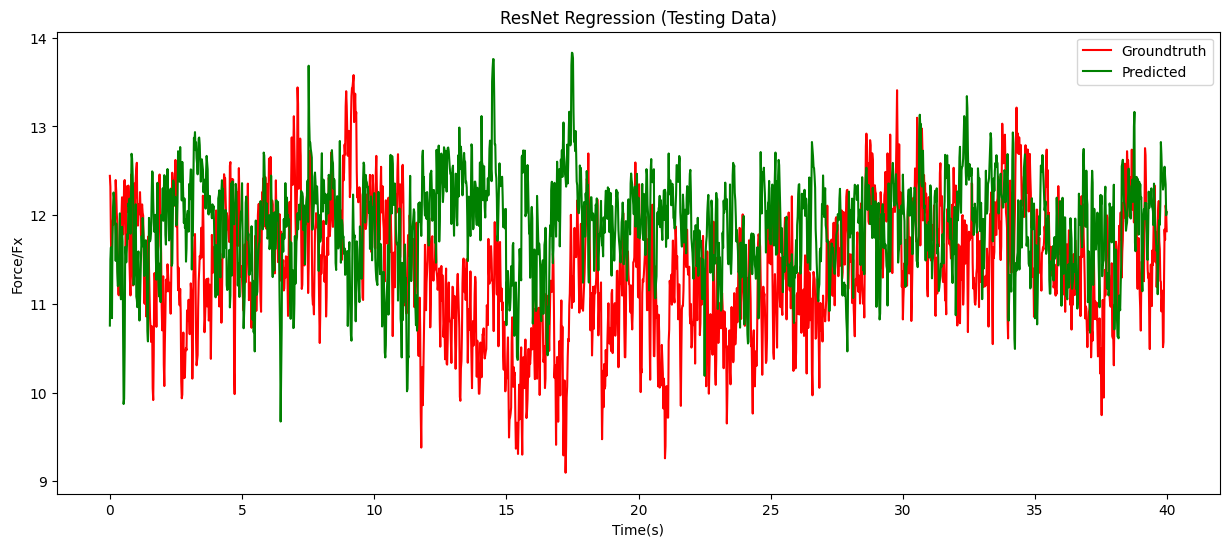

In [14]:
# Load Model to Predict Real Data
modelCoy = tf.keras.models.load_model('best_model.h5')

Test_Insole = pd.read_csv('0310AyuStand5Min1.txt', header=None, low_memory=False)
TestSIData =  np.asarray(Test_Insole)

Test_df = pd.read_csv('0310AyuStand5Min1.csv', low_memory=False)
Test_selected_df = Test_df[columns]
Test_FPDatas = Test_selected_df[13000:]

Test_SmartInsole = np.array(TestSIData[13000:]).astype('float32')
Test_FPData = np.array(Test_FPDatas).astype('float32')

# Test_SIselection=[]

# for i in range(len(Test_SmartInsole)):
#   Test_SIselection.append(Test_SmartInsole[i][SIids])

# Test_SIselection = np.array(Test_SIselection)

# Test_Label = np.array(labelData[:2000]).astype('float32')
# Test_SIlabeled = np.concatenate((Test_Label, Test_SIselection), axis=1)
# Test_SIlabeled = np.array(Test_SIlabeled).astype('float32')

for i in range(len(Test_SmartInsole)):
    Test_SmartInsole[i][0] = Test_SmartInsole[i][0] + (iter % max_iter) + 1
    iter += 1

Test_smart_insole_data_scaled = (Test_SmartInsole - minInsole) / ( maxInsole - minInsole )
Test_force_plate_data_scaled = (Test_FPData - minForcePlate) / ( maxForcePlate - minForcePlate )

Test_sample_size = Test_smart_insole_data_scaled.shape[0]
Test_time_steps  = Test_smart_insole_data_scaled.shape[1]
Test_input_dimension = 1

Test_train_data_reshaped = Test_smart_insole_data_scaled.reshape(Test_sample_size,Test_time_steps,Test_input_dimension)

Regression_Model.evaluate(Test_train_data_reshaped, Test_force_plate_data_scaled)
Test_Pred = Regression_Model.predict(Test_train_data_reshaped)

predictions = (Test_Pred * (maxForcePlate - minForcePlate)) + minForcePlate
Real = (Test_force_plate_data_scaled * (maxForcePlate - minForcePlate)) + minForcePlate

x=[]
x = np.arange(0,2000)*40/2000 
for i in range(0,1):
    plt.figure(figsize=(15,6))
    # plt.figure()
    plt.plot(x,Real[0:2000,i],color='red')
    plt.plot(x,predictions[0:2000,i], markerfacecolor='none',color='green')
    plt.title('ResNet Regression (Testing Data)')
    if i < 3:
      plt.ylabel('Force/'+columns[i])
    else:
      plt.ylabel('Moment/'+columns[i])
    plt.xlabel('Time(s)')
    plt.legend(['Groundtruth', 'Predicted'], loc='best')
    plt.show()
    
# please help me make normalization process manualy dont use the sickit-learn on this process

In [ ]:
import numpy as np
import pandas as pd
from numpy import interp
from itertools import cycle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from keras.layers import Input, Conv1D, MaxPooling1D, UpSampling1D, concatenate, BatchNormalization, Activation, add
from keras.layers import Conv2D, MaxPooling2D, Reshape, Flatten, Dense
from keras.models import Model, model_from_json
from keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import Normalizer, MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer
import pywt
np.set_printoptions(suppress=True)
from ResNet_1DCNN import ResNet
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error, r2_score

def filter_data(X, y, threshold):
    predictions = Regression_Model.predict(X)
    mse = mean_squared_error(y, predictions)
    mask = mse <= threshold
    return X[mask], y[mask]

columns = ['Fx']
wavelet = 'db4'
max_iter = 50
iter = 0

# Training Process
Insole = pd.read_csv('0310AyuStand5Min1.txt', header=None, low_memory=False)
SIData =  np.asarray(Insole)

df = pd.read_csv('0310AyuStand5Min1.csv', low_memory=False)
selected_df = df[columns]
FPDatas = selected_df[:]

SmartInsole = np.array(SIData[:]).astype('float32')
FPData = np.array(FPDatas).astype('float32')

for i in range(len(SmartInsole)):
    SmartInsole[i][0] = SmartInsole[i][0] + (iter % max_iter) + 1
    iter += 1

# Scale the smart insole data
minInsole = SmartInsole.min()
maxInsole = SmartInsole.max()
smart_insole_data_scaled = (SmartInsole - minInsole) / ( maxInsole - minInsole )

# Scale the force plate data
minForcePlate = FPData.min()
maxForcePlate = FPData.max()
force_plate_data_scaled = (FPData - minForcePlate) / ( maxForcePlate - minForcePlate )

# Split Data
sample_size = smart_insole_data_scaled.shape[0] # number of samples in train set
time_steps  = smart_insole_data_scaled.shape[1] # number of features in train set
input_dimension = 1               # each feature is represented by 1 number

train_data_reshaped = smart_insole_data_scaled.reshape(sample_size, time_steps, input_dimension)

X_train, X_test, y_train, y_test = train_test_split(train_data_reshaped[:13000], 
                                                    force_plate_data_scaled[:13000], 
                                                    test_size=0.20, random_state=2)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

# Configurations for ResNet in Regression Mode
length = X_train.shape[1]   # Number of Features (or length of the signal)
model_width = 64           # Number of Filter or Kernel in the Input Layer
num_channel = 1             # Number of Input Channels
problem_type = 'Regression' # Regression or Classification
output_number = 1           # Number of Outputs in the Regression Mode

Regression_Model = ResNet(length, num_channel, model_width, problem_type=problem_type, 
                          output_nums=output_number).ResNet18()
Regression_Model.compile(loss='mse', optimizer=Adam(learning_rate=0.0001), metrics= ['mse'])

callbacks = [EarlyStopping(monitor='val_loss', patience=30, mode='min'),
             ModelCheckpoint('Saved_Model.h5', verbose=1, monitor='val_loss', save_best_only=True, mode='min')]

history = Regression_Model.fit(X_train, y_train, epochs=500, 
                               batch_size=32, verbose=1, validation_split=0.2, shuffle=True, callbacks=callbacks)

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.savefig('Loss Result.png')

# Evaluate Model
Regression_Model.evaluate(train_data_reshaped[:13000], force_plate_data_scaled[:13000])
ypred = Regression_Model.predict(train_data_reshaped[:13000])

print('MSE: ', mean_squared_error(force_plate_data_scaled[:13000], ypred))
print('RMSE: ', math.sqrt(mean_squared_error(force_plate_data_scaled[:13000], ypred)))
print('Coefficient of determination (r2 Score): ', r2_score(force_plate_data_scaled[:13000], ypred))

# Inverse transform the predictions and actual values
y_pred = (ypred * (maxForcePlate - minForcePlate)) + minForcePlate
y_real = (force_plate_data_scaled[:13000] * (maxForcePlate - minForcePlate)) + minForcePlate

x = np.arange(0, 3000) * 60 / 3000 
for i in range(0, 1):
    plt.figure(figsize=(15, 6))
    plt.plot(x, y_real[0:3000, i], color='red')
    plt.plot(x, y_pred[0:3000, i], markerfacecolor='none', color='green')
    plt.title('Resnet Regression (Training Data)')
    if i < 3:
        plt.ylabel('Force/' + columns[i])
    else:
        plt.ylabel('Moment/' + columns[i])
    plt.xlabel('Time(s)')
    plt.legend(['Groundtruth', 'Predicted Value'], loc='best')
    plt.show()

tf.keras.models.save_model(Regression_Model, '1ouput.h5')

# Train with Clean Data if Enough Samples Remain
# Filter Clean Data and Noisy Data
threshold = 0.1  # Adjust the threshold value based on your requirements

X_train_clean, y_train_clean = filter_data(X_train, y_train, threshold)
print(X_train_clean.shape)

# Check if any clean samples remain
if X_train_clean.shape[0] > 0:
    X_train_clean = X_train_clean.reshape(X_train_clean.shape[1], 89, 1)
    y_train_clean = y_train_clean.reshape(y_train_clean.shape[1], 1, 1)

    print("Clean Data Shape:", X_train_clean.shape, y_train_clean.shape)

    # Train with Clean Data
    Regression_Model_clean = ResNet(length, num_channel, model_width, problem_type=problem_type,
                                    output_nums=output_number).ResNet18()
    Regression_Model_clean.compile(loss='mse', optimizer=Adam(learning_rate=0.0001), metrics=['mse'])

    callbacks_clean = [EarlyStopping(monitor='val_loss', patience=30, mode='min'),
                       ModelCheckpoint('Saved_Model_Clean.h5', verbose=1, monitor='val_loss', save_best_only=True,
                                       mode='min')]

    history_clean = Regression_Model_clean.fit(X_train_clean, y_train_clean, epochs=500,
                                               batch_size=32, verbose=1, validation_split=0.2, shuffle=True,
                                               callbacks=callbacks_clean)

    plt.figure()
    plt.plot(history_clean.history['loss'])
    plt.plot(history_clean.history['val_loss'])
    plt.title('Model Loss (Clean Data)')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.savefig('Loss Result (Clean Data).png')

    # Evaluate Model with Clean Data
    Regression_Model_clean.evaluate(train_data_reshaped[:13000], force_plate_data_scaled[:13000])
    ypred_clean = Regression_Model_clean.predict(train_data_reshaped[:13000])

    print('MSE (Clean Data):', mean_squared_error(force_plate_data_scaled[:13000], ypred_clean))
    print('RMSE (Clean Data):', math.sqrt(mean_squared_error(force_plate_data_scaled[:13000], ypred_clean)))
    print('Coefficient of determination (r2 Score) (Clean Data):',
          r2_score(force_plate_data_scaled[:13000], ypred_clean))

    # Inverse transform the predictions and actual values
    y_pred_clean = (ypred_clean * (maxForcePlate - minForcePlate)) + minForcePlate
    y_real_clean = (force_plate_data_scaled[:13000] * (maxForcePlate - minForcePlate)) + minForcePlate

    x = np.arange(0, 3000) * 60 / 3000
    for i in range(0, 1):
        plt.figure(figsize=(15, 6))
        plt.plot(x, y_real_clean[0:3000, i], color='red')
        plt.plot(x, y_pred_clean[0:3000, i], markerfacecolor='none', color='green')
        plt.title('Resnet Regression (Training Data - Clean)')
        if i < 3:
            plt.ylabel('Force/' + columns[i])
        else:
            plt.ylabel('Moment/' + columns[i])
        plt.xlabel('Time(s)')
        plt.legend(['Groundtruth', 'Predicted Value'], loc='best')
        plt.show()

    tf.keras.models.save_model(Regression_Model_clean, '1ouput_clean.h5')
else:
    print("No clean data samples remaining. Training with original data.")
    Regression_Model_clean = Regression_Model
